In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_100_7200_100_2_5.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_100_7200_100_2_5.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_100_7200_100_2_5.npy")
TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_100_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_100_7200_100_2_5.csv")

In [5]:
TtotalOrdersNPC

Unnamed: 0  time portfolio  stock  order
0                2   993     tlzga     99    1.0
1                0   993     beytl     94    1.0
2                1   993     beytl     24   22.0
3                2   993     beytl     68   -8.0
4                0   993     ruflh     10    2.0
...            ...   ...       ...    ...    ...
299765           1  8192     empuy     82   -1.0
299766           2  8192     empuy     47    1.0
299767           3  8192     empuy      6    1.0
299768           0  8192     mtkfs     27   -3.0
299769           2  8192     mtkfs     55    1.0

[299770 rows x 5 columns]

In [12]:
type(TtotalOrdersNPC)

cudf.core.dataframe.DataFrame

# minSep = 1

In [25]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192,1)

TypeError: where() missing 1 required positional argument: 'cond'

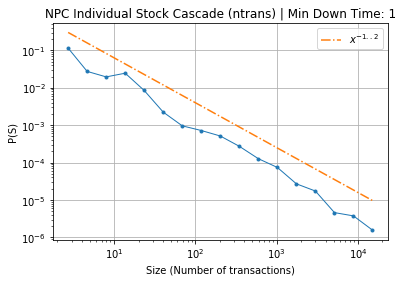

In [12]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_2_5_minSep1_.png", dpi=250)
plt.show()
plt.close()

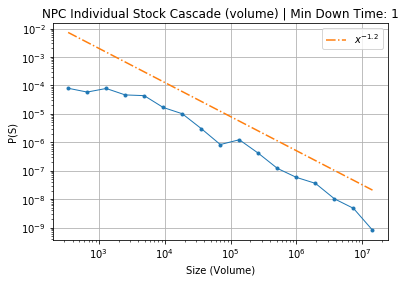

In [13]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_2_5_minSep1_.png", dpi=250)
plt.show()
plt.close()

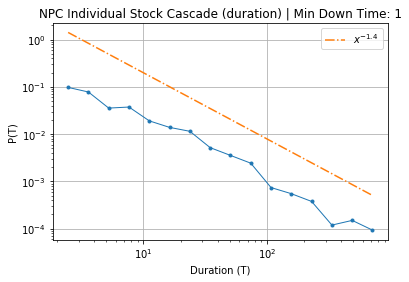

In [14]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_2_5_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [15]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 2)

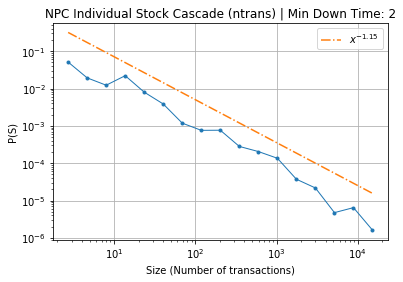

In [16]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_2_5_minSep2_.png", dpi=250)
plt.show()
plt.close()

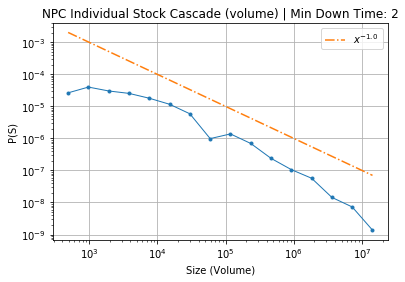

In [17]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_2_5_minSep2_.png", dpi=250)
plt.show()
plt.close()

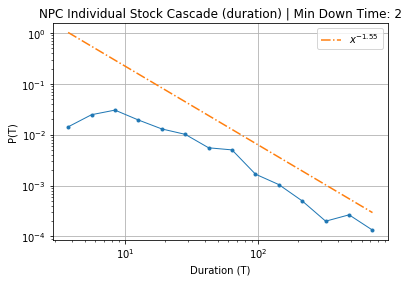

In [18]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_2_5_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [19]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 5)

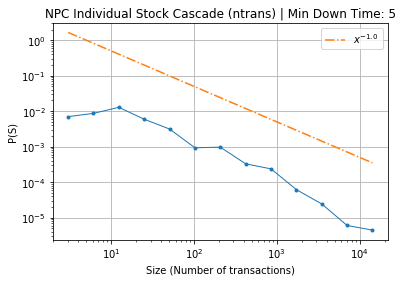

In [20]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_2_5_minSep5_.png", dpi=250)
plt.show()
plt.close()

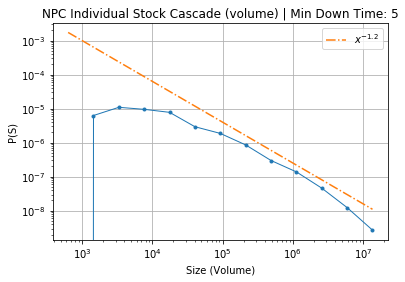

In [21]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_2_5_minSep5_.png", dpi=250)
plt.show()
plt.close()

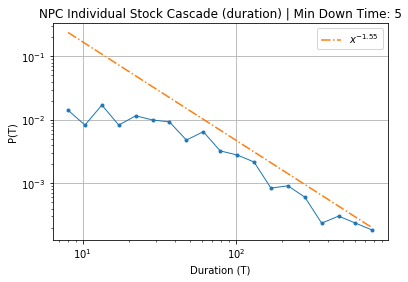

In [22]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_2_5_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [23]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 10)

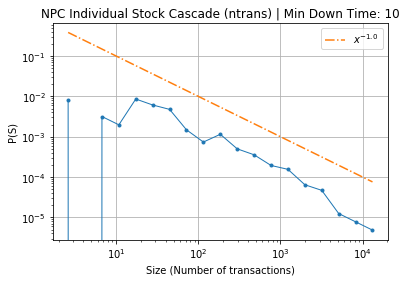

In [24]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_2_5_minSep10_.png", dpi=250)
plt.show()
plt.close()

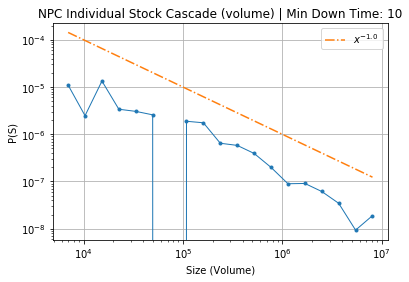

In [25]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_2_5_minSep10_.png", dpi=250)
plt.show()
plt.close()

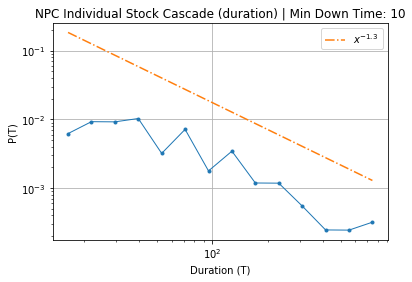

In [26]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_2_5_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [26]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    TtotalOrders = TtotalOrdersNPC
    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [8]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades22_npc_100_7200_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  299770
Cascade length:  329
New Orders left:  299441
making new cascade


OG Orders left:  299441
Cascade length:  267
New Orders left:  299174
making new cascade


OG Orders left:  299174
Cascade length:  49
New Orders left:  299125
making new cascade


OG Orders left:  299125
Cascade length:  70
New Orders left:  299055
making new cascade


OG Orders left:  299055
Cascade length:  92
New Orders left:  298963
making new cascade


OG Orders left:  298963
Cascade length:  70
New Orders left:  298893
making new cascade


OG Orders left:  298893
Cascade length:  67
New Orders left:  298826
making new cascade


OG Orders left:  298826
Cascade length:  62
New Orders left:  298764
making new cascade


OG Orders left:  298764
Cascade length:  1
New Orders left:  298763
making new cascade


OG Orders left:  298763
Cascade length:  89
New Orders left:  298674
making new cascade


OG Orders left:  298674
Cascade length:  238
New Orders left:  298436
making new cascade


OG Order

Cascade length:  45
New Orders left:  293987
making new cascade


OG Orders left:  293987
Cascade length:  137
New Orders left:  293850
making new cascade


OG Orders left:  293850
Cascade length:  28
New Orders left:  293822
making new cascade


OG Orders left:  293822
Cascade length:  10
New Orders left:  293812
making new cascade


OG Orders left:  293812
Cascade length:  38
New Orders left:  293774
making new cascade


OG Orders left:  293774
Cascade length:  6
New Orders left:  293768
making new cascade


OG Orders left:  293768
Cascade length:  138
New Orders left:  293630
making new cascade


OG Orders left:  293630
Cascade length:  14
New Orders left:  293616
making new cascade


OG Orders left:  293616
Cascade length:  7
New Orders left:  293609
making new cascade


OG Orders left:  293609
Cascade length:  59
New Orders left:  293550
making new cascade


OG Orders left:  293550
Cascade length:  4
New Orders left:  293546
making new cascade


OG Orders left:  293546
Cascade len

Cascade length:  4
New Orders left:  288624
making new cascade


OG Orders left:  288624
Cascade length:  33
New Orders left:  288591
making new cascade


OG Orders left:  288591
Cascade length:  90
New Orders left:  288501
making new cascade


OG Orders left:  288501
Cascade length:  6
New Orders left:  288495
making new cascade


OG Orders left:  288495
Cascade length:  7
New Orders left:  288488
making new cascade


OG Orders left:  288488
Cascade length:  106
New Orders left:  288382
making new cascade


OG Orders left:  288382
Cascade length:  47
New Orders left:  288335
making new cascade


OG Orders left:  288335
Cascade length:  98
New Orders left:  288237
making new cascade


OG Orders left:  288237
Cascade length:  154
New Orders left:  288083
making new cascade


OG Orders left:  288083
Cascade length:  37
New Orders left:  288046
making new cascade


OG Orders left:  288046
Cascade length:  20
New Orders left:  288026
making new cascade


OG Orders left:  288026
Cascade len

Cascade length:  20
New Orders left:  284470
making new cascade


OG Orders left:  284470
Cascade length:  6
New Orders left:  284464
making new cascade


OG Orders left:  284464
Cascade length:  54
New Orders left:  284410
making new cascade


OG Orders left:  284410
Cascade length:  81
New Orders left:  284329
making new cascade


OG Orders left:  284329
Cascade length:  27
New Orders left:  284302
making new cascade


OG Orders left:  284302
Cascade length:  60
New Orders left:  284242
making new cascade


OG Orders left:  284242
Cascade length:  4
New Orders left:  284238
making new cascade


OG Orders left:  284238
Cascade length:  11
New Orders left:  284227
making new cascade


OG Orders left:  284227
Cascade length:  49
New Orders left:  284178
making new cascade


OG Orders left:  284178
Cascade length:  72
New Orders left:  284106
making new cascade


OG Orders left:  284106
Cascade length:  141
New Orders left:  283965
making new cascade


OG Orders left:  283965
Cascade len

Cascade length:  121
New Orders left:  280360
making new cascade


OG Orders left:  280360
Cascade length:  136
New Orders left:  280224
making new cascade


OG Orders left:  280224
Cascade length:  25
New Orders left:  280199
making new cascade


OG Orders left:  280199
Cascade length:  10
New Orders left:  280189
making new cascade


OG Orders left:  280189
Cascade length:  5
New Orders left:  280184
making new cascade


OG Orders left:  280184
Cascade length:  58
New Orders left:  280126
making new cascade


OG Orders left:  280126
Cascade length:  6
New Orders left:  280120
making new cascade


OG Orders left:  280120
Cascade length:  25
New Orders left:  280095
making new cascade


OG Orders left:  280095
Cascade length:  81
New Orders left:  280014
making new cascade


OG Orders left:  280014
Cascade length:  20
New Orders left:  279994
making new cascade


OG Orders left:  279994
Cascade length:  36
New Orders left:  279958
making new cascade


OG Orders left:  279958
Cascade le

Cascade length:  2
New Orders left:  277383
making new cascade


OG Orders left:  277383
Cascade length:  8
New Orders left:  277375
making new cascade


OG Orders left:  277375
Cascade length:  19
New Orders left:  277356
making new cascade


OG Orders left:  277356
Cascade length:  25
New Orders left:  277331
making new cascade


OG Orders left:  277331
Cascade length:  65
New Orders left:  277266
making new cascade


OG Orders left:  277266
Cascade length:  70
New Orders left:  277196
making new cascade


OG Orders left:  277196
Cascade length:  10
New Orders left:  277186
making new cascade


OG Orders left:  277186
Cascade length:  31
New Orders left:  277155
making new cascade


OG Orders left:  277155
Cascade length:  72
New Orders left:  277083
making new cascade


OG Orders left:  277083
Cascade length:  122
New Orders left:  276961
making new cascade


OG Orders left:  276961
Cascade length:  17
New Orders left:  276944
making new cascade


OG Orders left:  276944
Cascade len

Cascade length:  2
New Orders left:  274490
making new cascade


OG Orders left:  274490
Cascade length:  23
New Orders left:  274467
making new cascade


OG Orders left:  274467
Cascade length:  103
New Orders left:  274364
making new cascade


OG Orders left:  274364
Cascade length:  2
New Orders left:  274362
making new cascade


OG Orders left:  274362
Cascade length:  4
New Orders left:  274358
making new cascade


OG Orders left:  274358
Cascade length:  22
New Orders left:  274336
making new cascade


OG Orders left:  274336
Cascade length:  21
New Orders left:  274315
making new cascade


OG Orders left:  274315
Cascade length:  93
New Orders left:  274222
making new cascade


OG Orders left:  274222
Cascade length:  6
New Orders left:  274216
making new cascade


OG Orders left:  274216
Cascade length:  8
New Orders left:  274208
making new cascade


OG Orders left:  274208
Cascade length:  44
New Orders left:  274164
making new cascade


OG Orders left:  274164
Cascade length

Cascade length:  32
New Orders left:  272301
making new cascade


OG Orders left:  272301
Cascade length:  23
New Orders left:  272278
making new cascade


OG Orders left:  272278
Cascade length:  3
New Orders left:  272275
making new cascade


OG Orders left:  272275
Cascade length:  26
New Orders left:  272249
making new cascade


OG Orders left:  272249
Cascade length:  2
New Orders left:  272247
making new cascade


OG Orders left:  272247
Cascade length:  7
New Orders left:  272240
making new cascade


OG Orders left:  272240
Cascade length:  8
New Orders left:  272232
making new cascade


OG Orders left:  272232
Cascade length:  1
New Orders left:  272231
making new cascade


OG Orders left:  272231
Cascade length:  1
New Orders left:  272230
making new cascade


OG Orders left:  272230
Cascade length:  48
New Orders left:  272182
making new cascade


OG Orders left:  272182
Cascade length:  2
New Orders left:  272180
making new cascade


OG Orders left:  272180
Cascade length:  

Cascade length:  2
New Orders left:  270506
making new cascade


OG Orders left:  270506
Cascade length:  189
New Orders left:  270317
making new cascade


OG Orders left:  270317
Cascade length:  21
New Orders left:  270296
making new cascade


OG Orders left:  270296
Cascade length:  39
New Orders left:  270257
making new cascade


OG Orders left:  270257
Cascade length:  2
New Orders left:  270255
making new cascade


OG Orders left:  270255
Cascade length:  8
New Orders left:  270247
making new cascade


OG Orders left:  270247
Cascade length:  12
New Orders left:  270235
making new cascade


OG Orders left:  270235
Cascade length:  95
New Orders left:  270140
making new cascade


OG Orders left:  270140
Cascade length:  31
New Orders left:  270109
making new cascade


OG Orders left:  270109
Cascade length:  16
New Orders left:  270093
making new cascade


OG Orders left:  270093
Cascade length:  2
New Orders left:  270091
making new cascade


OG Orders left:  270091
Cascade lengt

Cascade length:  13
New Orders left:  268106
making new cascade


OG Orders left:  268106
Cascade length:  14
New Orders left:  268092
making new cascade


OG Orders left:  268092
Cascade length:  1
New Orders left:  268091
making new cascade


OG Orders left:  268091
Cascade length:  11
New Orders left:  268080
making new cascade


OG Orders left:  268080
Cascade length:  6
New Orders left:  268074
making new cascade


OG Orders left:  268074
Cascade length:  13
New Orders left:  268061
making new cascade


OG Orders left:  268061
Cascade length:  113
New Orders left:  267948
making new cascade


OG Orders left:  267948
Cascade length:  2
New Orders left:  267946
making new cascade


OG Orders left:  267946
Cascade length:  1
New Orders left:  267945
making new cascade


OG Orders left:  267945
Cascade length:  14
New Orders left:  267931
making new cascade


OG Orders left:  267931
Cascade length:  14
New Orders left:  267917
making new cascade


OG Orders left:  267917
Cascade lengt

Cascade length:  9
New Orders left:  265696
making new cascade


OG Orders left:  265696
Cascade length:  6
New Orders left:  265690
making new cascade


OG Orders left:  265690
Cascade length:  2
New Orders left:  265688
making new cascade


OG Orders left:  265688
Cascade length:  9
New Orders left:  265679
making new cascade


OG Orders left:  265679
Cascade length:  12
New Orders left:  265667
making new cascade


OG Orders left:  265667
Cascade length:  1
New Orders left:  265666
making new cascade


OG Orders left:  265666
Cascade length:  4
New Orders left:  265662
making new cascade


OG Orders left:  265662
Cascade length:  2
New Orders left:  265660
making new cascade


OG Orders left:  265660
Cascade length:  59
New Orders left:  265601
making new cascade


OG Orders left:  265601
Cascade length:  20
New Orders left:  265581
making new cascade


OG Orders left:  265581
Cascade length:  34
New Orders left:  265547
making new cascade


OG Orders left:  265547
Cascade length:  

Cascade length:  89
New Orders left:  262514
making new cascade


OG Orders left:  262514
Cascade length:  191
New Orders left:  262323
making new cascade


OG Orders left:  262323
Cascade length:  240
New Orders left:  262083
making new cascade


OG Orders left:  262083
Cascade length:  1
New Orders left:  262082
making new cascade


OG Orders left:  262082
Cascade length:  46
New Orders left:  262036
making new cascade


OG Orders left:  262036
Cascade length:  6
New Orders left:  262030
making new cascade


OG Orders left:  262030
Cascade length:  15
New Orders left:  262015
making new cascade


OG Orders left:  262015
Cascade length:  27
New Orders left:  261988
making new cascade


OG Orders left:  261988
Cascade length:  2
New Orders left:  261986
making new cascade


OG Orders left:  261986
Cascade length:  55
New Orders left:  261931
making new cascade


OG Orders left:  261931
Cascade length:  102
New Orders left:  261829
making new cascade


OG Orders left:  261829
Cascade le

Cascade length:  37
New Orders left:  258567
making new cascade


OG Orders left:  258567
Cascade length:  48
New Orders left:  258519
making new cascade


OG Orders left:  258519
Cascade length:  2
New Orders left:  258517
making new cascade


OG Orders left:  258517
Cascade length:  30
New Orders left:  258487
making new cascade


OG Orders left:  258487
Cascade length:  4
New Orders left:  258483
making new cascade


OG Orders left:  258483
Cascade length:  47
New Orders left:  258436
making new cascade


OG Orders left:  258436
Cascade length:  6
New Orders left:  258430
making new cascade


OG Orders left:  258430
Cascade length:  32
New Orders left:  258398
making new cascade


OG Orders left:  258398
Cascade length:  38
New Orders left:  258360
making new cascade


OG Orders left:  258360
Cascade length:  35
New Orders left:  258325
making new cascade


OG Orders left:  258325
Cascade length:  46
New Orders left:  258279
making new cascade


OG Orders left:  258279
Cascade lengt

Cascade length:  20
New Orders left:  255217
making new cascade


OG Orders left:  255217
Cascade length:  65
New Orders left:  255152
making new cascade


OG Orders left:  255152
Cascade length:  1
New Orders left:  255151
making new cascade


OG Orders left:  255151
Cascade length:  101
New Orders left:  255050
making new cascade


OG Orders left:  255050
Cascade length:  153
New Orders left:  254897
making new cascade


OG Orders left:  254897
Cascade length:  1
New Orders left:  254896
making new cascade


OG Orders left:  254896
Cascade length:  37
New Orders left:  254859
making new cascade


OG Orders left:  254859
Cascade length:  62
New Orders left:  254797
making new cascade


OG Orders left:  254797
Cascade length:  23
New Orders left:  254774
making new cascade


OG Orders left:  254774
Cascade length:  2
New Orders left:  254772
making new cascade


OG Orders left:  254772
Cascade length:  84
New Orders left:  254688
making new cascade


OG Orders left:  254688
Cascade len

Cascade length:  14
New Orders left:  250883
making new cascade


OG Orders left:  250883
Cascade length:  33
New Orders left:  250850
making new cascade


OG Orders left:  250850
Cascade length:  85
New Orders left:  250765
making new cascade


OG Orders left:  250765
Cascade length:  25
New Orders left:  250740
making new cascade


OG Orders left:  250740
Cascade length:  37
New Orders left:  250703
making new cascade


OG Orders left:  250703
Cascade length:  11
New Orders left:  250692
making new cascade


OG Orders left:  250692
Cascade length:  1
New Orders left:  250691
making new cascade


OG Orders left:  250691
Cascade length:  96
New Orders left:  250595
making new cascade


OG Orders left:  250595
Cascade length:  50
New Orders left:  250545
making new cascade


OG Orders left:  250545
Cascade length:  18
New Orders left:  250527
making new cascade


OG Orders left:  250527
Cascade length:  5
New Orders left:  250522
making new cascade


OG Orders left:  250522
Cascade leng

Cascade length:  19
New Orders left:  248262
making new cascade


OG Orders left:  248262
Cascade length:  131
New Orders left:  248131
making new cascade


OG Orders left:  248131
Cascade length:  15
New Orders left:  248116
making new cascade


OG Orders left:  248116
Cascade length:  13
New Orders left:  248103
making new cascade


OG Orders left:  248103
Cascade length:  69
New Orders left:  248034
making new cascade


OG Orders left:  248034
Cascade length:  1
New Orders left:  248033
making new cascade


OG Orders left:  248033
Cascade length:  24
New Orders left:  248009
making new cascade


OG Orders left:  248009
Cascade length:  26
New Orders left:  247983
making new cascade


OG Orders left:  247983
Cascade length:  9
New Orders left:  247974
making new cascade


OG Orders left:  247974
Cascade length:  12
New Orders left:  247962
making new cascade


OG Orders left:  247962
Cascade length:  40
New Orders left:  247922
making new cascade


OG Orders left:  247922
Cascade len

Cascade length:  5
New Orders left:  245272
making new cascade


OG Orders left:  245272
Cascade length:  11
New Orders left:  245261
making new cascade


OG Orders left:  245261
Cascade length:  2
New Orders left:  245259
making new cascade


OG Orders left:  245259
Cascade length:  7
New Orders left:  245252
making new cascade


OG Orders left:  245252
Cascade length:  53
New Orders left:  245199
making new cascade


OG Orders left:  245199
Cascade length:  34
New Orders left:  245165
making new cascade


OG Orders left:  245165
Cascade length:  8
New Orders left:  245157
making new cascade


OG Orders left:  245157
Cascade length:  29
New Orders left:  245128
making new cascade


OG Orders left:  245128
Cascade length:  4
New Orders left:  245124
making new cascade


OG Orders left:  245124
Cascade length:  1
New Orders left:  245123
making new cascade


OG Orders left:  245123
Cascade length:  1
New Orders left:  245122
making new cascade


OG Orders left:  245122
Cascade length:  

Cascade length:  30
New Orders left:  242652
making new cascade


OG Orders left:  242652
Cascade length:  23
New Orders left:  242629
making new cascade


OG Orders left:  242629
Cascade length:  8
New Orders left:  242621
making new cascade


OG Orders left:  242621
Cascade length:  109
New Orders left:  242512
making new cascade


OG Orders left:  242512
Cascade length:  145
New Orders left:  242367
making new cascade


OG Orders left:  242367
Cascade length:  55
New Orders left:  242312
making new cascade


OG Orders left:  242312
Cascade length:  26
New Orders left:  242286
making new cascade


OG Orders left:  242286
Cascade length:  7
New Orders left:  242279
making new cascade


OG Orders left:  242279
Cascade length:  8
New Orders left:  242271
making new cascade


OG Orders left:  242271
Cascade length:  103
New Orders left:  242168
making new cascade


OG Orders left:  242168
Cascade length:  102
New Orders left:  242066
making new cascade


OG Orders left:  242066
Cascade l

Cascade length:  32
New Orders left:  238949
making new cascade


OG Orders left:  238949
Cascade length:  111
New Orders left:  238838
making new cascade


OG Orders left:  238838
Cascade length:  25
New Orders left:  238813
making new cascade


OG Orders left:  238813
Cascade length:  38
New Orders left:  238775
making new cascade


OG Orders left:  238775
Cascade length:  15
New Orders left:  238760
making new cascade


OG Orders left:  238760
Cascade length:  48
New Orders left:  238712
making new cascade


OG Orders left:  238712
Cascade length:  38
New Orders left:  238674
making new cascade


OG Orders left:  238674
Cascade length:  135
New Orders left:  238539
making new cascade


OG Orders left:  238539
Cascade length:  11
New Orders left:  238528
making new cascade


OG Orders left:  238528
Cascade length:  6
New Orders left:  238522
making new cascade


OG Orders left:  238522
Cascade length:  4
New Orders left:  238518
making new cascade


OG Orders left:  238518
Cascade le

Cascade length:  121
New Orders left:  235172
making new cascade


OG Orders left:  235172
Cascade length:  48
New Orders left:  235124
making new cascade


OG Orders left:  235124
Cascade length:  20
New Orders left:  235104
making new cascade


OG Orders left:  235104
Cascade length:  98
New Orders left:  235006
making new cascade


OG Orders left:  235006
Cascade length:  163
New Orders left:  234843
making new cascade


OG Orders left:  234843
Cascade length:  39
New Orders left:  234804
making new cascade


OG Orders left:  234804
Cascade length:  15
New Orders left:  234789
making new cascade


OG Orders left:  234789
Cascade length:  84
New Orders left:  234705
making new cascade


OG Orders left:  234705
Cascade length:  15
New Orders left:  234690
making new cascade


OG Orders left:  234690
Cascade length:  6
New Orders left:  234684
making new cascade


OG Orders left:  234684
Cascade length:  68
New Orders left:  234616
making new cascade


OG Orders left:  234616
Cascade l

Cascade length:  56
New Orders left:  231383
making new cascade


OG Orders left:  231383
Cascade length:  55
New Orders left:  231328
making new cascade


OG Orders left:  231328
Cascade length:  18
New Orders left:  231310
making new cascade


OG Orders left:  231310
Cascade length:  78
New Orders left:  231232
making new cascade


OG Orders left:  231232
Cascade length:  10
New Orders left:  231222
making new cascade


OG Orders left:  231222
Cascade length:  21
New Orders left:  231201
making new cascade


OG Orders left:  231201
Cascade length:  10
New Orders left:  231191
making new cascade


OG Orders left:  231191
Cascade length:  28
New Orders left:  231163
making new cascade


OG Orders left:  231163
Cascade length:  76
New Orders left:  231087
making new cascade


OG Orders left:  231087
Cascade length:  17
New Orders left:  231070
making new cascade


OG Orders left:  231070
Cascade length:  6
New Orders left:  231064
making new cascade


OG Orders left:  231064
Cascade len

Cascade length:  26
New Orders left:  228742
making new cascade


OG Orders left:  228742
Cascade length:  14
New Orders left:  228728
making new cascade


OG Orders left:  228728
Cascade length:  10
New Orders left:  228718
making new cascade


OG Orders left:  228718
Cascade length:  33
New Orders left:  228685
making new cascade


OG Orders left:  228685
Cascade length:  26
New Orders left:  228659
making new cascade


OG Orders left:  228659
Cascade length:  113
New Orders left:  228546
making new cascade


OG Orders left:  228546
Cascade length:  8
New Orders left:  228538
making new cascade


OG Orders left:  228538
Cascade length:  31
New Orders left:  228507
making new cascade


OG Orders left:  228507
Cascade length:  10
New Orders left:  228497
making new cascade


OG Orders left:  228497
Cascade length:  66
New Orders left:  228431
making new cascade


OG Orders left:  228431
Cascade length:  1
New Orders left:  228430
making new cascade


OG Orders left:  228430
Cascade len

Cascade length:  28
New Orders left:  225628
making new cascade


OG Orders left:  225628
Cascade length:  39
New Orders left:  225589
making new cascade


OG Orders left:  225589
Cascade length:  8
New Orders left:  225581
making new cascade


OG Orders left:  225581
Cascade length:  62
New Orders left:  225519
making new cascade


OG Orders left:  225519
Cascade length:  15
New Orders left:  225504
making new cascade


OG Orders left:  225504
Cascade length:  31
New Orders left:  225473
making new cascade


OG Orders left:  225473
Cascade length:  10
New Orders left:  225463
making new cascade


OG Orders left:  225463
Cascade length:  38
New Orders left:  225425
making new cascade


OG Orders left:  225425
Cascade length:  8
New Orders left:  225417
making new cascade


OG Orders left:  225417
Cascade length:  36
New Orders left:  225381
making new cascade


OG Orders left:  225381
Cascade length:  25
New Orders left:  225356
making new cascade


OG Orders left:  225356
Cascade leng

Cascade length:  15
New Orders left:  222830
making new cascade


OG Orders left:  222830
Cascade length:  18
New Orders left:  222812
making new cascade


OG Orders left:  222812
Cascade length:  26
New Orders left:  222786
making new cascade


OG Orders left:  222786
Cascade length:  24
New Orders left:  222762
making new cascade


OG Orders left:  222762
Cascade length:  45
New Orders left:  222717
making new cascade


OG Orders left:  222717
Cascade length:  1
New Orders left:  222716
making new cascade


OG Orders left:  222716
Cascade length:  37
New Orders left:  222679
making new cascade


OG Orders left:  222679
Cascade length:  56
New Orders left:  222623
making new cascade


OG Orders left:  222623
Cascade length:  51
New Orders left:  222572
making new cascade


OG Orders left:  222572
Cascade length:  16
New Orders left:  222556
making new cascade


OG Orders left:  222556
Cascade length:  2
New Orders left:  222554
making new cascade


OG Orders left:  222554
Cascade leng

Cascade length:  49
New Orders left:  219902
making new cascade


OG Orders left:  219902
Cascade length:  68
New Orders left:  219834
making new cascade


OG Orders left:  219834
Cascade length:  12
New Orders left:  219822
making new cascade


OG Orders left:  219822
Cascade length:  2
New Orders left:  219820
making new cascade


OG Orders left:  219820
Cascade length:  54
New Orders left:  219766
making new cascade


OG Orders left:  219766
Cascade length:  28
New Orders left:  219738
making new cascade


OG Orders left:  219738
Cascade length:  87
New Orders left:  219651
making new cascade


OG Orders left:  219651
Cascade length:  48
New Orders left:  219603
making new cascade


OG Orders left:  219603
Cascade length:  1
New Orders left:  219602
making new cascade


OG Orders left:  219602
Cascade length:  52
New Orders left:  219550
making new cascade


OG Orders left:  219550
Cascade length:  22
New Orders left:  219528
making new cascade


OG Orders left:  219528
Cascade leng

Cascade length:  44
New Orders left:  216577
making new cascade


OG Orders left:  216577
Cascade length:  37
New Orders left:  216540
making new cascade


OG Orders left:  216540
Cascade length:  61
New Orders left:  216479
making new cascade


OG Orders left:  216479
Cascade length:  33
New Orders left:  216446
making new cascade


OG Orders left:  216446
Cascade length:  59
New Orders left:  216387
making new cascade


OG Orders left:  216387
Cascade length:  12
New Orders left:  216375
making new cascade


OG Orders left:  216375
Cascade length:  25
New Orders left:  216350
making new cascade


OG Orders left:  216350
Cascade length:  185
New Orders left:  216165
making new cascade


OG Orders left:  216165
Cascade length:  9
New Orders left:  216156
making new cascade


OG Orders left:  216156
Cascade length:  42
New Orders left:  216114
making new cascade


OG Orders left:  216114
Cascade length:  38
New Orders left:  216076
making new cascade


OG Orders left:  216076
Cascade le

Cascade length:  80
New Orders left:  213206
making new cascade


OG Orders left:  213206
Cascade length:  72
New Orders left:  213134
making new cascade


OG Orders left:  213134
Cascade length:  41
New Orders left:  213093
making new cascade


OG Orders left:  213093
Cascade length:  43
New Orders left:  213050
making new cascade


OG Orders left:  213050
Cascade length:  62
New Orders left:  212988
making new cascade


OG Orders left:  212988
Cascade length:  20
New Orders left:  212968
making new cascade


OG Orders left:  212968
Cascade length:  23
New Orders left:  212945
making new cascade


OG Orders left:  212945
Cascade length:  11
New Orders left:  212934
making new cascade


OG Orders left:  212934
Cascade length:  9
New Orders left:  212925
making new cascade


OG Orders left:  212925
Cascade length:  1
New Orders left:  212924
making new cascade


OG Orders left:  212924
Cascade length:  92
New Orders left:  212832
making new cascade


OG Orders left:  212832
Cascade leng

Cascade length:  4
New Orders left:  209346
making new cascade


OG Orders left:  209346
Cascade length:  72
New Orders left:  209274
making new cascade


OG Orders left:  209274
Cascade length:  5
New Orders left:  209269
making new cascade


OG Orders left:  209269
Cascade length:  45
New Orders left:  209224
making new cascade


OG Orders left:  209224
Cascade length:  5
New Orders left:  209219
making new cascade


OG Orders left:  209219
Cascade length:  75
New Orders left:  209144
making new cascade


OG Orders left:  209144
Cascade length:  33
New Orders left:  209111
making new cascade


OG Orders left:  209111
Cascade length:  6
New Orders left:  209105
making new cascade


OG Orders left:  209105
Cascade length:  23
New Orders left:  209082
making new cascade


OG Orders left:  209082
Cascade length:  1
New Orders left:  209081
making new cascade


OG Orders left:  209081
Cascade length:  18
New Orders left:  209063
making new cascade


OG Orders left:  209063
Cascade length:

Cascade length:  15
New Orders left:  205849
making new cascade


OG Orders left:  205849
Cascade length:  8
New Orders left:  205841
making new cascade


OG Orders left:  205841
Cascade length:  46
New Orders left:  205795
making new cascade


OG Orders left:  205795
Cascade length:  4
New Orders left:  205791
making new cascade


OG Orders left:  205791
Cascade length:  50
New Orders left:  205741
making new cascade


OG Orders left:  205741
Cascade length:  1
New Orders left:  205740
making new cascade


OG Orders left:  205740
Cascade length:  11
New Orders left:  205729
making new cascade


OG Orders left:  205729
Cascade length:  106
New Orders left:  205623
making new cascade


OG Orders left:  205623
Cascade length:  37
New Orders left:  205586
making new cascade


OG Orders left:  205586
Cascade length:  2
New Orders left:  205584
making new cascade


OG Orders left:  205584
Cascade length:  24
New Orders left:  205560
making new cascade


OG Orders left:  205560
Cascade lengt

Cascade length:  74
New Orders left:  203060
making new cascade


OG Orders left:  203060
Cascade length:  16
New Orders left:  203044
making new cascade


OG Orders left:  203044
Cascade length:  53
New Orders left:  202991
making new cascade


OG Orders left:  202991
Cascade length:  18
New Orders left:  202973
making new cascade


OG Orders left:  202973
Cascade length:  46
New Orders left:  202927
making new cascade


OG Orders left:  202927
Cascade length:  39
New Orders left:  202888
making new cascade


OG Orders left:  202888
Cascade length:  1
New Orders left:  202887
making new cascade


OG Orders left:  202887
Cascade length:  45
New Orders left:  202842
making new cascade


OG Orders left:  202842
Cascade length:  119
New Orders left:  202723
making new cascade


OG Orders left:  202723
Cascade length:  44
New Orders left:  202679
making new cascade


OG Orders left:  202679
Cascade length:  21
New Orders left:  202658
making new cascade


OG Orders left:  202658
Cascade le

Cascade length:  41
New Orders left:  199999
making new cascade


OG Orders left:  199999
Cascade length:  257
New Orders left:  199742
making new cascade


OG Orders left:  199742
Cascade length:  37
New Orders left:  199705
making new cascade


OG Orders left:  199705
Cascade length:  4
New Orders left:  199701
making new cascade


OG Orders left:  199701
Cascade length:  61
New Orders left:  199640
making new cascade


OG Orders left:  199640
Cascade length:  9
New Orders left:  199631
making new cascade


OG Orders left:  199631
Cascade length:  24
New Orders left:  199607
making new cascade


OG Orders left:  199607
Cascade length:  1
New Orders left:  199606
making new cascade


OG Orders left:  199606
Cascade length:  14
New Orders left:  199592
making new cascade


OG Orders left:  199592
Cascade length:  2
New Orders left:  199590
making new cascade


OG Orders left:  199590
Cascade length:  27
New Orders left:  199563
making new cascade


OG Orders left:  199563
Cascade lengt

Cascade length:  16
New Orders left:  195589
making new cascade


OG Orders left:  195589
Cascade length:  38
New Orders left:  195551
making new cascade


OG Orders left:  195551
Cascade length:  23
New Orders left:  195528
making new cascade


OG Orders left:  195528
Cascade length:  3
New Orders left:  195525
making new cascade


OG Orders left:  195525
Cascade length:  44
New Orders left:  195481
making new cascade


OG Orders left:  195481
Cascade length:  37
New Orders left:  195444
making new cascade


OG Orders left:  195444
Cascade length:  51
New Orders left:  195393
making new cascade


OG Orders left:  195393
Cascade length:  25
New Orders left:  195368
making new cascade


OG Orders left:  195368
Cascade length:  132
New Orders left:  195236
making new cascade


OG Orders left:  195236
Cascade length:  1
New Orders left:  195235
making new cascade


OG Orders left:  195235
Cascade length:  94
New Orders left:  195141
making new cascade


OG Orders left:  195141
Cascade len

Cascade length:  6
New Orders left:  190708
making new cascade


OG Orders left:  190708
Cascade length:  15
New Orders left:  190693
making new cascade


OG Orders left:  190693
Cascade length:  11
New Orders left:  190682
making new cascade


OG Orders left:  190682
Cascade length:  55
New Orders left:  190627
making new cascade


OG Orders left:  190627
Cascade length:  1
New Orders left:  190626
making new cascade


OG Orders left:  190626
Cascade length:  4
New Orders left:  190622
making new cascade


OG Orders left:  190622
Cascade length:  4
New Orders left:  190618
making new cascade


OG Orders left:  190618
Cascade length:  45
New Orders left:  190573
making new cascade


OG Orders left:  190573
Cascade length:  104
New Orders left:  190469
making new cascade


OG Orders left:  190469
Cascade length:  31
New Orders left:  190438
making new cascade


OG Orders left:  190438
Cascade length:  6
New Orders left:  190432
making new cascade


OG Orders left:  190432
Cascade length

Cascade length:  59
New Orders left:  187294
making new cascade


OG Orders left:  187294
Cascade length:  40
New Orders left:  187254
making new cascade


OG Orders left:  187254
Cascade length:  20
New Orders left:  187234
making new cascade


OG Orders left:  187234
Cascade length:  57
New Orders left:  187177
making new cascade


OG Orders left:  187177
Cascade length:  52
New Orders left:  187125
making new cascade


OG Orders left:  187125
Cascade length:  6
New Orders left:  187119
making new cascade


OG Orders left:  187119
Cascade length:  38
New Orders left:  187081
making new cascade


OG Orders left:  187081
Cascade length:  4
New Orders left:  187077
making new cascade


OG Orders left:  187077
Cascade length:  6
New Orders left:  187071
making new cascade


OG Orders left:  187071
Cascade length:  55
New Orders left:  187016
making new cascade


OG Orders left:  187016
Cascade length:  6
New Orders left:  187010
making new cascade


OG Orders left:  187010
Cascade length

Cascade length:  8
New Orders left:  184071
making new cascade


OG Orders left:  184071
Cascade length:  75
New Orders left:  183996
making new cascade


OG Orders left:  183996
Cascade length:  132
New Orders left:  183864
making new cascade


OG Orders left:  183864
Cascade length:  3
New Orders left:  183861
making new cascade


OG Orders left:  183861
Cascade length:  16
New Orders left:  183845
making new cascade


OG Orders left:  183845
Cascade length:  114
New Orders left:  183731
making new cascade


OG Orders left:  183731
Cascade length:  26
New Orders left:  183705
making new cascade


OG Orders left:  183705
Cascade length:  7
New Orders left:  183698
making new cascade


OG Orders left:  183698
Cascade length:  14
New Orders left:  183684
making new cascade


OG Orders left:  183684
Cascade length:  8
New Orders left:  183676
making new cascade


OG Orders left:  183676
Cascade length:  2
New Orders left:  183674
making new cascade


OG Orders left:  183674
Cascade lengt

Cascade length:  93
New Orders left:  180522
making new cascade


OG Orders left:  180522
Cascade length:  8
New Orders left:  180514
making new cascade


OG Orders left:  180514
Cascade length:  2
New Orders left:  180512
making new cascade


OG Orders left:  180512
Cascade length:  61
New Orders left:  180451
making new cascade


OG Orders left:  180451
Cascade length:  26
New Orders left:  180425
making new cascade


OG Orders left:  180425
Cascade length:  44
New Orders left:  180381
making new cascade


OG Orders left:  180381
Cascade length:  4
New Orders left:  180377
making new cascade


OG Orders left:  180377
Cascade length:  1
New Orders left:  180376
making new cascade


OG Orders left:  180376
Cascade length:  61
New Orders left:  180315
making new cascade


OG Orders left:  180315
Cascade length:  12
New Orders left:  180303
making new cascade


OG Orders left:  180303
Cascade length:  4
New Orders left:  180299
making new cascade


OG Orders left:  180299
Cascade length:

Cascade length:  46
New Orders left:  177071
making new cascade


OG Orders left:  177071
Cascade length:  43
New Orders left:  177028
making new cascade


OG Orders left:  177028
Cascade length:  16
New Orders left:  177012
making new cascade


OG Orders left:  177012
Cascade length:  59
New Orders left:  176953
making new cascade


OG Orders left:  176953
Cascade length:  75
New Orders left:  176878
making new cascade


OG Orders left:  176878
Cascade length:  53
New Orders left:  176825
making new cascade


OG Orders left:  176825
Cascade length:  29
New Orders left:  176796
making new cascade


OG Orders left:  176796
Cascade length:  2
New Orders left:  176794
making new cascade


OG Orders left:  176794
Cascade length:  46
New Orders left:  176748
making new cascade


OG Orders left:  176748
Cascade length:  7
New Orders left:  176741
making new cascade


OG Orders left:  176741
Cascade length:  40
New Orders left:  176701
making new cascade


OG Orders left:  176701
Cascade leng

Cascade length:  34
New Orders left:  173820
making new cascade


OG Orders left:  173820
Cascade length:  12
New Orders left:  173808
making new cascade


OG Orders left:  173808
Cascade length:  4
New Orders left:  173804
making new cascade


OG Orders left:  173804
Cascade length:  87
New Orders left:  173717
making new cascade


OG Orders left:  173717
Cascade length:  41
New Orders left:  173676
making new cascade


OG Orders left:  173676
Cascade length:  55
New Orders left:  173621
making new cascade


OG Orders left:  173621
Cascade length:  36
New Orders left:  173585
making new cascade


OG Orders left:  173585
Cascade length:  9
New Orders left:  173576
making new cascade


OG Orders left:  173576
Cascade length:  39
New Orders left:  173537
making new cascade


OG Orders left:  173537
Cascade length:  11
New Orders left:  173526
making new cascade


OG Orders left:  173526
Cascade length:  41
New Orders left:  173485
making new cascade


OG Orders left:  173485
Cascade leng

Cascade length:  95
New Orders left:  170793
making new cascade


OG Orders left:  170793
Cascade length:  60
New Orders left:  170733
making new cascade


OG Orders left:  170733
Cascade length:  3
New Orders left:  170730
making new cascade


OG Orders left:  170730
Cascade length:  86
New Orders left:  170644
making new cascade


OG Orders left:  170644
Cascade length:  17
New Orders left:  170627
making new cascade


OG Orders left:  170627
Cascade length:  44
New Orders left:  170583
making new cascade


OG Orders left:  170583
Cascade length:  40
New Orders left:  170543
making new cascade


OG Orders left:  170543
Cascade length:  55
New Orders left:  170488
making new cascade


OG Orders left:  170488
Cascade length:  5
New Orders left:  170483
making new cascade


OG Orders left:  170483
Cascade length:  15
New Orders left:  170468
making new cascade


OG Orders left:  170468
Cascade length:  23
New Orders left:  170445
making new cascade


OG Orders left:  170445
Cascade leng

Cascade length:  108
New Orders left:  168309
making new cascade


OG Orders left:  168309
Cascade length:  83
New Orders left:  168226
making new cascade


OG Orders left:  168226
Cascade length:  24
New Orders left:  168202
making new cascade


OG Orders left:  168202
Cascade length:  8
New Orders left:  168194
making new cascade


OG Orders left:  168194
Cascade length:  1
New Orders left:  168193
making new cascade


OG Orders left:  168193
Cascade length:  10
New Orders left:  168183
making new cascade


OG Orders left:  168183
Cascade length:  24
New Orders left:  168159
making new cascade


OG Orders left:  168159
Cascade length:  48
New Orders left:  168111
making new cascade


OG Orders left:  168111
Cascade length:  43
New Orders left:  168068
making new cascade


OG Orders left:  168068
Cascade length:  21
New Orders left:  168047
making new cascade


OG Orders left:  168047
Cascade length:  2
New Orders left:  168045
making new cascade


OG Orders left:  168045
Cascade leng

Cascade length:  37
New Orders left:  165407
making new cascade


OG Orders left:  165407
Cascade length:  55
New Orders left:  165352
making new cascade


OG Orders left:  165352
Cascade length:  12
New Orders left:  165340
making new cascade


OG Orders left:  165340
Cascade length:  2
New Orders left:  165338
making new cascade


OG Orders left:  165338
Cascade length:  42
New Orders left:  165296
making new cascade


OG Orders left:  165296
Cascade length:  44
New Orders left:  165252
making new cascade


OG Orders left:  165252
Cascade length:  14
New Orders left:  165238
making new cascade


OG Orders left:  165238
Cascade length:  17
New Orders left:  165221
making new cascade


OG Orders left:  165221
Cascade length:  38
New Orders left:  165183
making new cascade


OG Orders left:  165183
Cascade length:  27
New Orders left:  165156
making new cascade


OG Orders left:  165156
Cascade length:  30
New Orders left:  165126
making new cascade


OG Orders left:  165126
Cascade len

Cascade length:  15
New Orders left:  162808
making new cascade


OG Orders left:  162808
Cascade length:  26
New Orders left:  162782
making new cascade


OG Orders left:  162782
Cascade length:  53
New Orders left:  162729
making new cascade


OG Orders left:  162729
Cascade length:  15
New Orders left:  162714
making new cascade


OG Orders left:  162714
Cascade length:  37
New Orders left:  162677
making new cascade


OG Orders left:  162677
Cascade length:  39
New Orders left:  162638
making new cascade


OG Orders left:  162638
Cascade length:  2
New Orders left:  162636
making new cascade


OG Orders left:  162636
Cascade length:  20
New Orders left:  162616
making new cascade


OG Orders left:  162616
Cascade length:  92
New Orders left:  162524
making new cascade


OG Orders left:  162524
Cascade length:  1
New Orders left:  162523
making new cascade


OG Orders left:  162523
Cascade length:  47
New Orders left:  162476
making new cascade


OG Orders left:  162476
Cascade leng

Cascade length:  101
New Orders left:  159643
making new cascade


OG Orders left:  159643
Cascade length:  21
New Orders left:  159622
making new cascade


OG Orders left:  159622
Cascade length:  39
New Orders left:  159583
making new cascade


OG Orders left:  159583
Cascade length:  22
New Orders left:  159561
making new cascade


OG Orders left:  159561
Cascade length:  12
New Orders left:  159549
making new cascade


OG Orders left:  159549
Cascade length:  85
New Orders left:  159464
making new cascade


OG Orders left:  159464
Cascade length:  36
New Orders left:  159428
making new cascade


OG Orders left:  159428
Cascade length:  8
New Orders left:  159420
making new cascade


OG Orders left:  159420
Cascade length:  78
New Orders left:  159342
making new cascade


OG Orders left:  159342
Cascade length:  1
New Orders left:  159341
making new cascade


OG Orders left:  159341
Cascade length:  33
New Orders left:  159308
making new cascade


OG Orders left:  159308
Cascade len

Cascade length:  33
New Orders left:  156459
making new cascade


OG Orders left:  156459
Cascade length:  19
New Orders left:  156440
making new cascade


OG Orders left:  156440
Cascade length:  90
New Orders left:  156350
making new cascade


OG Orders left:  156350
Cascade length:  39
New Orders left:  156311
making new cascade


OG Orders left:  156311
Cascade length:  37
New Orders left:  156274
making new cascade


OG Orders left:  156274
Cascade length:  32
New Orders left:  156242
making new cascade


OG Orders left:  156242
Cascade length:  1
New Orders left:  156241
making new cascade


OG Orders left:  156241
Cascade length:  8
New Orders left:  156233
making new cascade


OG Orders left:  156233
Cascade length:  40
New Orders left:  156193
making new cascade


OG Orders left:  156193
Cascade length:  46
New Orders left:  156147
making new cascade


OG Orders left:  156147
Cascade length:  3
New Orders left:  156144
making new cascade


OG Orders left:  156144
Cascade lengt

Cascade length:  23
New Orders left:  153368
making new cascade


OG Orders left:  153368
Cascade length:  17
New Orders left:  153351
making new cascade


OG Orders left:  153351
Cascade length:  17
New Orders left:  153334
making new cascade


OG Orders left:  153334
Cascade length:  113
New Orders left:  153221
making new cascade


OG Orders left:  153221
Cascade length:  33
New Orders left:  153188
making new cascade


OG Orders left:  153188
Cascade length:  87
New Orders left:  153101
making new cascade


OG Orders left:  153101
Cascade length:  37
New Orders left:  153064
making new cascade


OG Orders left:  153064
Cascade length:  52
New Orders left:  153012
making new cascade


OG Orders left:  153012
Cascade length:  133
New Orders left:  152879
making new cascade


OG Orders left:  152879
Cascade length:  47
New Orders left:  152832
making new cascade


OG Orders left:  152832
Cascade length:  19
New Orders left:  152813
making new cascade


OG Orders left:  152813
Cascade 

Cascade length:  2
New Orders left:  150056
making new cascade


OG Orders left:  150056
Cascade length:  5
New Orders left:  150051
making new cascade


OG Orders left:  150051
Cascade length:  43
New Orders left:  150008
making new cascade


OG Orders left:  150008
Cascade length:  24
New Orders left:  149984
making new cascade


OG Orders left:  149984
Cascade length:  8
New Orders left:  149976
making new cascade


OG Orders left:  149976
Cascade length:  101
New Orders left:  149875
making new cascade


OG Orders left:  149875
Cascade length:  86
New Orders left:  149789
making new cascade


OG Orders left:  149789
Cascade length:  66
New Orders left:  149723
making new cascade


OG Orders left:  149723
Cascade length:  4
New Orders left:  149719
making new cascade


OG Orders left:  149719
Cascade length:  1
New Orders left:  149718
making new cascade


OG Orders left:  149718
Cascade length:  87
New Orders left:  149631
making new cascade


OG Orders left:  149631
Cascade length

Cascade length:  22
New Orders left:  146371
making new cascade


OG Orders left:  146371
Cascade length:  23
New Orders left:  146348
making new cascade


OG Orders left:  146348
Cascade length:  4
New Orders left:  146344
making new cascade


OG Orders left:  146344
Cascade length:  7
New Orders left:  146337
making new cascade


OG Orders left:  146337
Cascade length:  45
New Orders left:  146292
making new cascade


OG Orders left:  146292
Cascade length:  9
New Orders left:  146283
making new cascade


OG Orders left:  146283
Cascade length:  45
New Orders left:  146238
making new cascade


OG Orders left:  146238
Cascade length:  40
New Orders left:  146198
making new cascade


OG Orders left:  146198
Cascade length:  29
New Orders left:  146169
making new cascade


OG Orders left:  146169
Cascade length:  25
New Orders left:  146144
making new cascade


OG Orders left:  146144
Cascade length:  1
New Orders left:  146143
making new cascade


OG Orders left:  146143
Cascade length

Cascade length:  15
New Orders left:  143199
making new cascade


OG Orders left:  143199
Cascade length:  23
New Orders left:  143176
making new cascade


OG Orders left:  143176
Cascade length:  15
New Orders left:  143161
making new cascade


OG Orders left:  143161
Cascade length:  13
New Orders left:  143148
making new cascade


OG Orders left:  143148
Cascade length:  28
New Orders left:  143120
making new cascade


OG Orders left:  143120
Cascade length:  40
New Orders left:  143080
making new cascade


OG Orders left:  143080
Cascade length:  50
New Orders left:  143030
making new cascade


OG Orders left:  143030
Cascade length:  63
New Orders left:  142967
making new cascade


OG Orders left:  142967
Cascade length:  46
New Orders left:  142921
making new cascade


OG Orders left:  142921
Cascade length:  8
New Orders left:  142913
making new cascade


OG Orders left:  142913
Cascade length:  4
New Orders left:  142909
making new cascade


OG Orders left:  142909
Cascade leng

Cascade length:  18
New Orders left:  140193
making new cascade


OG Orders left:  140193
Cascade length:  23
New Orders left:  140170
making new cascade


OG Orders left:  140170
Cascade length:  10
New Orders left:  140160
making new cascade


OG Orders left:  140160
Cascade length:  57
New Orders left:  140103
making new cascade


OG Orders left:  140103
Cascade length:  121
New Orders left:  139982
making new cascade


OG Orders left:  139982
Cascade length:  4
New Orders left:  139978
making new cascade


OG Orders left:  139978
Cascade length:  79
New Orders left:  139899
making new cascade


OG Orders left:  139899
Cascade length:  95
New Orders left:  139804
making new cascade


OG Orders left:  139804
Cascade length:  47
New Orders left:  139757
making new cascade


OG Orders left:  139757
Cascade length:  3
New Orders left:  139754
making new cascade


OG Orders left:  139754
Cascade length:  30
New Orders left:  139724
making new cascade


OG Orders left:  139724
Cascade len

Cascade length:  31
New Orders left:  135532
making new cascade


OG Orders left:  135532
Cascade length:  16
New Orders left:  135516
making new cascade


OG Orders left:  135516
Cascade length:  25
New Orders left:  135491
making new cascade


OG Orders left:  135491
Cascade length:  89
New Orders left:  135402
making new cascade


OG Orders left:  135402
Cascade length:  10
New Orders left:  135392
making new cascade


OG Orders left:  135392
Cascade length:  100
New Orders left:  135292
making new cascade


OG Orders left:  135292
Cascade length:  51
New Orders left:  135241
making new cascade


OG Orders left:  135241
Cascade length:  58
New Orders left:  135183
making new cascade


OG Orders left:  135183
Cascade length:  52
New Orders left:  135131
making new cascade


OG Orders left:  135131
Cascade length:  16
New Orders left:  135115
making new cascade


OG Orders left:  135115
Cascade length:  73
New Orders left:  135042
making new cascade


OG Orders left:  135042
Cascade l

Cascade length:  12
New Orders left:  131991
making new cascade


OG Orders left:  131991
Cascade length:  20
New Orders left:  131971
making new cascade


OG Orders left:  131971
Cascade length:  1
New Orders left:  131970
making new cascade


OG Orders left:  131970
Cascade length:  55
New Orders left:  131915
making new cascade


OG Orders left:  131915
Cascade length:  2
New Orders left:  131913
making new cascade


OG Orders left:  131913
Cascade length:  32
New Orders left:  131881
making new cascade


OG Orders left:  131881
Cascade length:  45
New Orders left:  131836
making new cascade


OG Orders left:  131836
Cascade length:  51
New Orders left:  131785
making new cascade


OG Orders left:  131785
Cascade length:  11
New Orders left:  131774
making new cascade


OG Orders left:  131774
Cascade length:  50
New Orders left:  131724
making new cascade


OG Orders left:  131724
Cascade length:  23
New Orders left:  131701
making new cascade


OG Orders left:  131701
Cascade leng

Cascade length:  34
New Orders left:  128209
making new cascade


OG Orders left:  128209
Cascade length:  58
New Orders left:  128151
making new cascade


OG Orders left:  128151
Cascade length:  250
New Orders left:  127901
making new cascade


OG Orders left:  127901
Cascade length:  19
New Orders left:  127882
making new cascade


OG Orders left:  127882
Cascade length:  24
New Orders left:  127858
making new cascade


OG Orders left:  127858
Cascade length:  34
New Orders left:  127824
making new cascade


OG Orders left:  127824
Cascade length:  4
New Orders left:  127820
making new cascade


OG Orders left:  127820
Cascade length:  4
New Orders left:  127816
making new cascade


OG Orders left:  127816
Cascade length:  15
New Orders left:  127801
making new cascade


OG Orders left:  127801
Cascade length:  70
New Orders left:  127731
making new cascade


OG Orders left:  127731
Cascade length:  1
New Orders left:  127730
making new cascade


OG Orders left:  127730
Cascade leng

Cascade length:  13
New Orders left:  124322
making new cascade


OG Orders left:  124322
Cascade length:  24
New Orders left:  124298
making new cascade


OG Orders left:  124298
Cascade length:  28
New Orders left:  124270
making new cascade


OG Orders left:  124270
Cascade length:  3
New Orders left:  124267
making new cascade


OG Orders left:  124267
Cascade length:  245
New Orders left:  124022
making new cascade


OG Orders left:  124022
Cascade length:  121
New Orders left:  123901
making new cascade


OG Orders left:  123901
Cascade length:  23
New Orders left:  123878
making new cascade


OG Orders left:  123878
Cascade length:  17
New Orders left:  123861
making new cascade


OG Orders left:  123861
Cascade length:  6
New Orders left:  123855
making new cascade


OG Orders left:  123855
Cascade length:  29
New Orders left:  123826
making new cascade


OG Orders left:  123826
Cascade length:  8
New Orders left:  123818
making new cascade


OG Orders left:  123818
Cascade len

Cascade length:  19
New Orders left:  120009
making new cascade


OG Orders left:  120009
Cascade length:  20
New Orders left:  119989
making new cascade


OG Orders left:  119989
Cascade length:  36
New Orders left:  119953
making new cascade


OG Orders left:  119953
Cascade length:  19
New Orders left:  119934
making new cascade


OG Orders left:  119934
Cascade length:  5
New Orders left:  119929
making new cascade


OG Orders left:  119929
Cascade length:  52
New Orders left:  119877
making new cascade


OG Orders left:  119877
Cascade length:  20
New Orders left:  119857
making new cascade


OG Orders left:  119857
Cascade length:  16
New Orders left:  119841
making new cascade


OG Orders left:  119841
Cascade length:  27
New Orders left:  119814
making new cascade


OG Orders left:  119814
Cascade length:  44
New Orders left:  119770
making new cascade


OG Orders left:  119770
Cascade length:  30
New Orders left:  119740
making new cascade


OG Orders left:  119740
Cascade len

Cascade length:  23
New Orders left:  117129
making new cascade


OG Orders left:  117129
Cascade length:  5
New Orders left:  117124
making new cascade


OG Orders left:  117124
Cascade length:  23
New Orders left:  117101
making new cascade


OG Orders left:  117101
Cascade length:  47
New Orders left:  117054
making new cascade


OG Orders left:  117054
Cascade length:  2
New Orders left:  117052
making new cascade


OG Orders left:  117052
Cascade length:  1
New Orders left:  117051
making new cascade


OG Orders left:  117051
Cascade length:  30
New Orders left:  117021
making new cascade


OG Orders left:  117021
Cascade length:  2
New Orders left:  117019
making new cascade


OG Orders left:  117019
Cascade length:  2
New Orders left:  117017
making new cascade


OG Orders left:  117017
Cascade length:  3
New Orders left:  117014
making new cascade


OG Orders left:  117014
Cascade length:  8
New Orders left:  117006
making new cascade


OG Orders left:  117006
Cascade length:  

Cascade length:  7
New Orders left:  114168
making new cascade


OG Orders left:  114168
Cascade length:  18
New Orders left:  114150
making new cascade


OG Orders left:  114150
Cascade length:  2
New Orders left:  114148
making new cascade


OG Orders left:  114148
Cascade length:  11
New Orders left:  114137
making new cascade


OG Orders left:  114137
Cascade length:  79
New Orders left:  114058
making new cascade


OG Orders left:  114058
Cascade length:  14
New Orders left:  114044
making new cascade


OG Orders left:  114044
Cascade length:  1
New Orders left:  114043
making new cascade


OG Orders left:  114043
Cascade length:  60
New Orders left:  113983
making new cascade


OG Orders left:  113983
Cascade length:  30
New Orders left:  113953
making new cascade


OG Orders left:  113953
Cascade length:  2
New Orders left:  113951
making new cascade


OG Orders left:  113951
Cascade length:  38
New Orders left:  113913
making new cascade


OG Orders left:  113913
Cascade length

Cascade length:  36
New Orders left:  111418
making new cascade


OG Orders left:  111418
Cascade length:  31
New Orders left:  111387
making new cascade


OG Orders left:  111387
Cascade length:  57
New Orders left:  111330
making new cascade


OG Orders left:  111330
Cascade length:  22
New Orders left:  111308
making new cascade


OG Orders left:  111308
Cascade length:  5
New Orders left:  111303
making new cascade


OG Orders left:  111303
Cascade length:  105
New Orders left:  111198
making new cascade


OG Orders left:  111198
Cascade length:  7
New Orders left:  111191
making new cascade


OG Orders left:  111191
Cascade length:  37
New Orders left:  111154
making new cascade


OG Orders left:  111154
Cascade length:  48
New Orders left:  111106
making new cascade


OG Orders left:  111106
Cascade length:  27
New Orders left:  111079
making new cascade


OG Orders left:  111079
Cascade length:  53
New Orders left:  111026
making new cascade


OG Orders left:  111026
Cascade len

Cascade length:  68
New Orders left:  108884
making new cascade


OG Orders left:  108884
Cascade length:  2
New Orders left:  108882
making new cascade


OG Orders left:  108882
Cascade length:  45
New Orders left:  108837
making new cascade


OG Orders left:  108837
Cascade length:  2
New Orders left:  108835
making new cascade


OG Orders left:  108835
Cascade length:  5
New Orders left:  108830
making new cascade


OG Orders left:  108830
Cascade length:  37
New Orders left:  108793
making new cascade


OG Orders left:  108793
Cascade length:  12
New Orders left:  108781
making new cascade


OG Orders left:  108781
Cascade length:  123
New Orders left:  108658
making new cascade


OG Orders left:  108658
Cascade length:  54
New Orders left:  108604
making new cascade


OG Orders left:  108604
Cascade length:  2
New Orders left:  108602
making new cascade


OG Orders left:  108602
Cascade length:  20
New Orders left:  108582
making new cascade


OG Orders left:  108582
Cascade lengt

Cascade length:  49
New Orders left:  105197
making new cascade


OG Orders left:  105197
Cascade length:  14
New Orders left:  105183
making new cascade


OG Orders left:  105183
Cascade length:  21
New Orders left:  105162
making new cascade


OG Orders left:  105162
Cascade length:  37
New Orders left:  105125
making new cascade


OG Orders left:  105125
Cascade length:  62
New Orders left:  105063
making new cascade


OG Orders left:  105063
Cascade length:  1
New Orders left:  105062
making new cascade


OG Orders left:  105062
Cascade length:  63
New Orders left:  104999
making new cascade


OG Orders left:  104999
Cascade length:  20
New Orders left:  104979
making new cascade


OG Orders left:  104979
Cascade length:  17
New Orders left:  104962
making new cascade


OG Orders left:  104962
Cascade length:  90
New Orders left:  104872
making new cascade


OG Orders left:  104872
Cascade length:  12
New Orders left:  104860
making new cascade


OG Orders left:  104860
Cascade len

Cascade length:  93
New Orders left:  101857
making new cascade


OG Orders left:  101857
Cascade length:  142
New Orders left:  101715
making new cascade


OG Orders left:  101715
Cascade length:  11
New Orders left:  101704
making new cascade


OG Orders left:  101704
Cascade length:  2
New Orders left:  101702
making new cascade


OG Orders left:  101702
Cascade length:  35
New Orders left:  101667
making new cascade


OG Orders left:  101667
Cascade length:  39
New Orders left:  101628
making new cascade


OG Orders left:  101628
Cascade length:  100
New Orders left:  101528
making new cascade


OG Orders left:  101528
Cascade length:  8
New Orders left:  101520
making new cascade


OG Orders left:  101520
Cascade length:  105
New Orders left:  101415
making new cascade


OG Orders left:  101415
Cascade length:  82
New Orders left:  101333
making new cascade


OG Orders left:  101333
Cascade length:  32
New Orders left:  101301
making new cascade


OG Orders left:  101301
Cascade l

Cascade length:  59
New Orders left:  97460
making new cascade


OG Orders left:  97460
Cascade length:  2
New Orders left:  97458
making new cascade


OG Orders left:  97458
Cascade length:  82
New Orders left:  97376
making new cascade


OG Orders left:  97376
Cascade length:  63
New Orders left:  97313
making new cascade


OG Orders left:  97313
Cascade length:  6
New Orders left:  97307
making new cascade


OG Orders left:  97307
Cascade length:  14
New Orders left:  97293
making new cascade


OG Orders left:  97293
Cascade length:  73
New Orders left:  97220
making new cascade


OG Orders left:  97220
Cascade length:  177
New Orders left:  97043
making new cascade


OG Orders left:  97043
Cascade length:  15
New Orders left:  97028
making new cascade


OG Orders left:  97028
Cascade length:  24
New Orders left:  97004
making new cascade


OG Orders left:  97004
Cascade length:  52
New Orders left:  96952
making new cascade


OG Orders left:  96952
Cascade length:  30
New Orders le

Cascade length:  3
New Orders left:  91870
making new cascade


OG Orders left:  91870
Cascade length:  54
New Orders left:  91816
making new cascade


OG Orders left:  91816
Cascade length:  10
New Orders left:  91806
making new cascade


OG Orders left:  91806
Cascade length:  4
New Orders left:  91802
making new cascade


OG Orders left:  91802
Cascade length:  100
New Orders left:  91702
making new cascade


OG Orders left:  91702
Cascade length:  1
New Orders left:  91701
making new cascade


OG Orders left:  91701
Cascade length:  24
New Orders left:  91677
making new cascade


OG Orders left:  91677
Cascade length:  94
New Orders left:  91583
making new cascade


OG Orders left:  91583
Cascade length:  4
New Orders left:  91579
making new cascade


OG Orders left:  91579
Cascade length:  69
New Orders left:  91510
making new cascade


OG Orders left:  91510
Cascade length:  9
New Orders left:  91501
making new cascade


OG Orders left:  91501
Cascade length:  12
New Orders left:

Cascade length:  15
New Orders left:  88165
making new cascade


OG Orders left:  88165
Cascade length:  17
New Orders left:  88148
making new cascade


OG Orders left:  88148
Cascade length:  51
New Orders left:  88097
making new cascade


OG Orders left:  88097
Cascade length:  25
New Orders left:  88072
making new cascade


OG Orders left:  88072
Cascade length:  67
New Orders left:  88005
making new cascade


OG Orders left:  88005
Cascade length:  42
New Orders left:  87963
making new cascade


OG Orders left:  87963
Cascade length:  69
New Orders left:  87894
making new cascade


OG Orders left:  87894
Cascade length:  10
New Orders left:  87884
making new cascade


OG Orders left:  87884
Cascade length:  89
New Orders left:  87795
making new cascade


OG Orders left:  87795
Cascade length:  4
New Orders left:  87791
making new cascade


OG Orders left:  87791
Cascade length:  6
New Orders left:  87785
making new cascade


OG Orders left:  87785
Cascade length:  62
New Orders lef

Cascade length:  40
New Orders left:  84932
making new cascade


OG Orders left:  84932
Cascade length:  1
New Orders left:  84931
making new cascade


OG Orders left:  84931
Cascade length:  40
New Orders left:  84891
making new cascade


OG Orders left:  84891
Cascade length:  16
New Orders left:  84875
making new cascade


OG Orders left:  84875
Cascade length:  18
New Orders left:  84857
making new cascade


OG Orders left:  84857
Cascade length:  25
New Orders left:  84832
making new cascade


OG Orders left:  84832
Cascade length:  15
New Orders left:  84817
making new cascade


OG Orders left:  84817
Cascade length:  30
New Orders left:  84787
making new cascade


OG Orders left:  84787
Cascade length:  16
New Orders left:  84771
making new cascade


OG Orders left:  84771
Cascade length:  23
New Orders left:  84748
making new cascade


OG Orders left:  84748
Cascade length:  25
New Orders left:  84723
making new cascade


OG Orders left:  84723
Cascade length:  6
New Orders lef

Cascade length:  1
New Orders left:  81760
making new cascade


OG Orders left:  81760
Cascade length:  48
New Orders left:  81712
making new cascade


OG Orders left:  81712
Cascade length:  6
New Orders left:  81706
making new cascade


OG Orders left:  81706
Cascade length:  6
New Orders left:  81700
making new cascade


OG Orders left:  81700
Cascade length:  60
New Orders left:  81640
making new cascade


OG Orders left:  81640
Cascade length:  25
New Orders left:  81615
making new cascade


OG Orders left:  81615
Cascade length:  31
New Orders left:  81584
making new cascade


OG Orders left:  81584
Cascade length:  23
New Orders left:  81561
making new cascade


OG Orders left:  81561
Cascade length:  32
New Orders left:  81529
making new cascade


OG Orders left:  81529
Cascade length:  235
New Orders left:  81294
making new cascade


OG Orders left:  81294
Cascade length:  59
New Orders left:  81235
making new cascade


OG Orders left:  81235
Cascade length:  33
New Orders lef

Cascade length:  39
New Orders left:  78784
making new cascade


OG Orders left:  78784
Cascade length:  64
New Orders left:  78720
making new cascade


OG Orders left:  78720
Cascade length:  20
New Orders left:  78700
making new cascade


OG Orders left:  78700
Cascade length:  55
New Orders left:  78645
making new cascade


OG Orders left:  78645
Cascade length:  59
New Orders left:  78586
making new cascade


OG Orders left:  78586
Cascade length:  6
New Orders left:  78580
making new cascade


OG Orders left:  78580
Cascade length:  59
New Orders left:  78521
making new cascade


OG Orders left:  78521
Cascade length:  5
New Orders left:  78516
making new cascade


OG Orders left:  78516
Cascade length:  180
New Orders left:  78336
making new cascade


OG Orders left:  78336
Cascade length:  77
New Orders left:  78259
making new cascade


OG Orders left:  78259
Cascade length:  1
New Orders left:  78258
making new cascade


OG Orders left:  78258
Cascade length:  2
New Orders left

Cascade length:  78
New Orders left:  75066
making new cascade


OG Orders left:  75066
Cascade length:  1
New Orders left:  75065
making new cascade


OG Orders left:  75065
Cascade length:  66
New Orders left:  74999
making new cascade


OG Orders left:  74999
Cascade length:  163
New Orders left:  74836
making new cascade


OG Orders left:  74836
Cascade length:  156
New Orders left:  74680
making new cascade


OG Orders left:  74680
Cascade length:  155
New Orders left:  74525
making new cascade


OG Orders left:  74525
Cascade length:  115
New Orders left:  74410
making new cascade


OG Orders left:  74410
Cascade length:  23
New Orders left:  74387
making new cascade


OG Orders left:  74387
Cascade length:  282
New Orders left:  74105
making new cascade


OG Orders left:  74105
Cascade length:  45
New Orders left:  74060
making new cascade


OG Orders left:  74060
Cascade length:  1
New Orders left:  74059
making new cascade


OG Orders left:  74059
Cascade length:  58
New Order

Cascade length:  241
New Orders left:  69493
making new cascade


OG Orders left:  69493
Cascade length:  9
New Orders left:  69484
making new cascade


OG Orders left:  69484
Cascade length:  11
New Orders left:  69473
making new cascade


OG Orders left:  69473
Cascade length:  6
New Orders left:  69467
making new cascade


OG Orders left:  69467
Cascade length:  62
New Orders left:  69405
making new cascade


OG Orders left:  69405
Cascade length:  31
New Orders left:  69374
making new cascade


OG Orders left:  69374
Cascade length:  80
New Orders left:  69294
making new cascade


OG Orders left:  69294
Cascade length:  61
New Orders left:  69233
making new cascade


OG Orders left:  69233
Cascade length:  5
New Orders left:  69228
making new cascade


OG Orders left:  69228
Cascade length:  48
New Orders left:  69180
making new cascade


OG Orders left:  69180
Cascade length:  35
New Orders left:  69145
making new cascade


OG Orders left:  69145
Cascade length:  22
New Orders lef

Cascade length:  69
New Orders left:  65257
making new cascade


OG Orders left:  65257
Cascade length:  15
New Orders left:  65242
making new cascade


OG Orders left:  65242
Cascade length:  79
New Orders left:  65163
making new cascade


OG Orders left:  65163
Cascade length:  2
New Orders left:  65161
making new cascade


OG Orders left:  65161
Cascade length:  69
New Orders left:  65092
making new cascade


OG Orders left:  65092
Cascade length:  6
New Orders left:  65086
making new cascade


OG Orders left:  65086
Cascade length:  6
New Orders left:  65080
making new cascade


OG Orders left:  65080
Cascade length:  20
New Orders left:  65060
making new cascade


OG Orders left:  65060
Cascade length:  56
New Orders left:  65004
making new cascade


OG Orders left:  65004
Cascade length:  35
New Orders left:  64969
making new cascade


OG Orders left:  64969
Cascade length:  102
New Orders left:  64867
making new cascade


OG Orders left:  64867
Cascade length:  2
New Orders left

Cascade length:  54
New Orders left:  60528
making new cascade


OG Orders left:  60528
Cascade length:  79
New Orders left:  60449
making new cascade


OG Orders left:  60449
Cascade length:  3
New Orders left:  60446
making new cascade


OG Orders left:  60446
Cascade length:  136
New Orders left:  60310
making new cascade


OG Orders left:  60310
Cascade length:  46
New Orders left:  60264
making new cascade


OG Orders left:  60264
Cascade length:  12
New Orders left:  60252
making new cascade


OG Orders left:  60252
Cascade length:  41
New Orders left:  60211
making new cascade


OG Orders left:  60211
Cascade length:  59
New Orders left:  60152
making new cascade


OG Orders left:  60152
Cascade length:  36
New Orders left:  60116
making new cascade


OG Orders left:  60116
Cascade length:  24
New Orders left:  60092
making new cascade


OG Orders left:  60092
Cascade length:  20
New Orders left:  60072
making new cascade


OG Orders left:  60072
Cascade length:  66
New Orders l

Cascade length:  1
New Orders left:  56240
making new cascade


OG Orders left:  56240
Cascade length:  1
New Orders left:  56239
making new cascade


OG Orders left:  56239
Cascade length:  20
New Orders left:  56219
making new cascade


OG Orders left:  56219
Cascade length:  136
New Orders left:  56083
making new cascade


OG Orders left:  56083
Cascade length:  13
New Orders left:  56070
making new cascade


OG Orders left:  56070
Cascade length:  21
New Orders left:  56049
making new cascade


OG Orders left:  56049
Cascade length:  43
New Orders left:  56006
making new cascade


OG Orders left:  56006
Cascade length:  149
New Orders left:  55857
making new cascade


OG Orders left:  55857
Cascade length:  1
New Orders left:  55856
making new cascade


OG Orders left:  55856
Cascade length:  33
New Orders left:  55823
making new cascade


OG Orders left:  55823
Cascade length:  24
New Orders left:  55799
making new cascade


OG Orders left:  55799
Cascade length:  7
New Orders lef

Cascade length:  14
New Orders left:  52490
making new cascade


OG Orders left:  52490
Cascade length:  8
New Orders left:  52482
making new cascade


OG Orders left:  52482
Cascade length:  187
New Orders left:  52295
making new cascade


OG Orders left:  52295
Cascade length:  10
New Orders left:  52285
making new cascade


OG Orders left:  52285
Cascade length:  7
New Orders left:  52278
making new cascade


OG Orders left:  52278
Cascade length:  88
New Orders left:  52190
making new cascade


OG Orders left:  52190
Cascade length:  96
New Orders left:  52094
making new cascade


OG Orders left:  52094
Cascade length:  2
New Orders left:  52092
making new cascade


OG Orders left:  52092
Cascade length:  8
New Orders left:  52084
making new cascade


OG Orders left:  52084
Cascade length:  2
New Orders left:  52082
making new cascade


OG Orders left:  52082
Cascade length:  17
New Orders left:  52065
making new cascade


OG Orders left:  52065
Cascade length:  45
New Orders left:

Cascade length:  16
New Orders left:  47400
making new cascade


OG Orders left:  47400
Cascade length:  5
New Orders left:  47395
making new cascade


OG Orders left:  47395
Cascade length:  33
New Orders left:  47362
making new cascade


OG Orders left:  47362
Cascade length:  2
New Orders left:  47360
making new cascade


OG Orders left:  47360
Cascade length:  37
New Orders left:  47323
making new cascade


OG Orders left:  47323
Cascade length:  72
New Orders left:  47251
making new cascade


OG Orders left:  47251
Cascade length:  12
New Orders left:  47239
making new cascade


OG Orders left:  47239
Cascade length:  144
New Orders left:  47095
making new cascade


OG Orders left:  47095
Cascade length:  12
New Orders left:  47083
making new cascade


OG Orders left:  47083
Cascade length:  119
New Orders left:  46964
making new cascade


OG Orders left:  46964
Cascade length:  27
New Orders left:  46937
making new cascade


OG Orders left:  46937
Cascade length:  45
New Orders l

Cascade length:  78
New Orders left:  43137
making new cascade


OG Orders left:  43137
Cascade length:  82
New Orders left:  43055
making new cascade


OG Orders left:  43055
Cascade length:  64
New Orders left:  42991
making new cascade


OG Orders left:  42991
Cascade length:  12
New Orders left:  42979
making new cascade


OG Orders left:  42979
Cascade length:  88
New Orders left:  42891
making new cascade


OG Orders left:  42891
Cascade length:  22
New Orders left:  42869
making new cascade


OG Orders left:  42869
Cascade length:  64
New Orders left:  42805
making new cascade


OG Orders left:  42805
Cascade length:  103
New Orders left:  42702
making new cascade


OG Orders left:  42702
Cascade length:  12
New Orders left:  42690
making new cascade


OG Orders left:  42690
Cascade length:  95
New Orders left:  42595
making new cascade


OG Orders left:  42595
Cascade length:  114
New Orders left:  42481
making new cascade


OG Orders left:  42481
Cascade length:  10
New Orders

Cascade length:  6
New Orders left:  39896
making new cascade


OG Orders left:  39896
Cascade length:  4
New Orders left:  39892
making new cascade


OG Orders left:  39892
Cascade length:  8
New Orders left:  39884
making new cascade


OG Orders left:  39884
Cascade length:  19
New Orders left:  39865
making new cascade


OG Orders left:  39865
Cascade length:  30
New Orders left:  39835
making new cascade


OG Orders left:  39835
Cascade length:  1
New Orders left:  39834
making new cascade


OG Orders left:  39834
Cascade length:  42
New Orders left:  39792
making new cascade


OG Orders left:  39792
Cascade length:  79
New Orders left:  39713
making new cascade


OG Orders left:  39713
Cascade length:  2
New Orders left:  39711
making new cascade


OG Orders left:  39711
Cascade length:  37
New Orders left:  39674
making new cascade


OG Orders left:  39674
Cascade length:  8
New Orders left:  39666
making new cascade


OG Orders left:  39666
Cascade length:  109
New Orders left: 

Cascade length:  5
New Orders left:  36528
making new cascade


OG Orders left:  36528
Cascade length:  47
New Orders left:  36481
making new cascade


OG Orders left:  36481
Cascade length:  18
New Orders left:  36463
making new cascade


OG Orders left:  36463
Cascade length:  22
New Orders left:  36441
making new cascade


OG Orders left:  36441
Cascade length:  22
New Orders left:  36419
making new cascade


OG Orders left:  36419
Cascade length:  33
New Orders left:  36386
making new cascade


OG Orders left:  36386
Cascade length:  71
New Orders left:  36315
making new cascade


OG Orders left:  36315
Cascade length:  70
New Orders left:  36245
making new cascade


OG Orders left:  36245
Cascade length:  28
New Orders left:  36217
making new cascade


OG Orders left:  36217
Cascade length:  43
New Orders left:  36174
making new cascade


OG Orders left:  36174
Cascade length:  61
New Orders left:  36113
making new cascade


OG Orders left:  36113
Cascade length:  7
New Orders lef

Cascade length:  61
New Orders left:  32992
making new cascade


OG Orders left:  32992
Cascade length:  39
New Orders left:  32953
making new cascade


OG Orders left:  32953
Cascade length:  2
New Orders left:  32951
making new cascade


OG Orders left:  32951
Cascade length:  10
New Orders left:  32941
making new cascade


OG Orders left:  32941
Cascade length:  60
New Orders left:  32881
making new cascade


OG Orders left:  32881
Cascade length:  23
New Orders left:  32858
making new cascade


OG Orders left:  32858
Cascade length:  13
New Orders left:  32845
making new cascade


OG Orders left:  32845
Cascade length:  12
New Orders left:  32833
making new cascade


OG Orders left:  32833
Cascade length:  1
New Orders left:  32832
making new cascade


OG Orders left:  32832
Cascade length:  34
New Orders left:  32798
making new cascade


OG Orders left:  32798
Cascade length:  22
New Orders left:  32776
making new cascade


OG Orders left:  32776
Cascade length:  34
New Orders lef

Cascade length:  8
New Orders left:  29708
making new cascade


OG Orders left:  29708
Cascade length:  153
New Orders left:  29555
making new cascade


OG Orders left:  29555
Cascade length:  16
New Orders left:  29539
making new cascade


OG Orders left:  29539
Cascade length:  2
New Orders left:  29537
making new cascade


OG Orders left:  29537
Cascade length:  1
New Orders left:  29536
making new cascade


OG Orders left:  29536
Cascade length:  1
New Orders left:  29535
making new cascade


OG Orders left:  29535
Cascade length:  43
New Orders left:  29492
making new cascade


OG Orders left:  29492
Cascade length:  167
New Orders left:  29325
making new cascade


OG Orders left:  29325
Cascade length:  16
New Orders left:  29309
making new cascade


OG Orders left:  29309
Cascade length:  2
New Orders left:  29307
making new cascade


OG Orders left:  29307
Cascade length:  14
New Orders left:  29293
making new cascade


OG Orders left:  29293
Cascade length:  35
New Orders left

Cascade length:  19
New Orders left:  26653
making new cascade


OG Orders left:  26653
Cascade length:  11
New Orders left:  26642
making new cascade


OG Orders left:  26642
Cascade length:  34
New Orders left:  26608
making new cascade


OG Orders left:  26608
Cascade length:  27
New Orders left:  26581
making new cascade


OG Orders left:  26581
Cascade length:  14
New Orders left:  26567
making new cascade


OG Orders left:  26567
Cascade length:  29
New Orders left:  26538
making new cascade


OG Orders left:  26538
Cascade length:  125
New Orders left:  26413
making new cascade


OG Orders left:  26413
Cascade length:  62
New Orders left:  26351
making new cascade


OG Orders left:  26351
Cascade length:  5
New Orders left:  26346
making new cascade


OG Orders left:  26346
Cascade length:  19
New Orders left:  26327
making new cascade


OG Orders left:  26327
Cascade length:  21
New Orders left:  26306
making new cascade


OG Orders left:  26306
Cascade length:  4
New Orders le

Cascade length:  68
New Orders left:  23028
making new cascade


OG Orders left:  23028
Cascade length:  3
New Orders left:  23025
making new cascade


OG Orders left:  23025
Cascade length:  24
New Orders left:  23001
making new cascade


OG Orders left:  23001
Cascade length:  11
New Orders left:  22990
making new cascade


OG Orders left:  22990
Cascade length:  6
New Orders left:  22984
making new cascade


OG Orders left:  22984
Cascade length:  83
New Orders left:  22901
making new cascade


OG Orders left:  22901
Cascade length:  1
New Orders left:  22900
making new cascade


OG Orders left:  22900
Cascade length:  1
New Orders left:  22899
making new cascade


OG Orders left:  22899
Cascade length:  1
New Orders left:  22898
making new cascade


OG Orders left:  22898
Cascade length:  19
New Orders left:  22879
making new cascade


OG Orders left:  22879
Cascade length:  30
New Orders left:  22849
making new cascade


OG Orders left:  22849
Cascade length:  55
New Orders left: 

Cascade length:  19
New Orders left:  20070
making new cascade


OG Orders left:  20070
Cascade length:  2
New Orders left:  20068
making new cascade


OG Orders left:  20068
Cascade length:  2
New Orders left:  20066
making new cascade


OG Orders left:  20066
Cascade length:  22
New Orders left:  20044
making new cascade


OG Orders left:  20044
Cascade length:  17
New Orders left:  20027
making new cascade


OG Orders left:  20027
Cascade length:  54
New Orders left:  19973
making new cascade


OG Orders left:  19973
Cascade length:  24
New Orders left:  19949
making new cascade


OG Orders left:  19949
Cascade length:  32
New Orders left:  19917
making new cascade


OG Orders left:  19917
Cascade length:  122
New Orders left:  19795
making new cascade


OG Orders left:  19795
Cascade length:  43
New Orders left:  19752
making new cascade


OG Orders left:  19752
Cascade length:  36
New Orders left:  19716
making new cascade


OG Orders left:  19716
Cascade length:  15
New Orders le

Cascade length:  33
New Orders left:  16883
making new cascade


OG Orders left:  16883
Cascade length:  11
New Orders left:  16872
making new cascade


OG Orders left:  16872
Cascade length:  33
New Orders left:  16839
making new cascade


OG Orders left:  16839
Cascade length:  11
New Orders left:  16828
making new cascade


OG Orders left:  16828
Cascade length:  37
New Orders left:  16791
making new cascade


OG Orders left:  16791
Cascade length:  39
New Orders left:  16752
making new cascade


OG Orders left:  16752
Cascade length:  27
New Orders left:  16725
making new cascade


OG Orders left:  16725
Cascade length:  12
New Orders left:  16713
making new cascade


OG Orders left:  16713
Cascade length:  21
New Orders left:  16692
making new cascade


OG Orders left:  16692
Cascade length:  10
New Orders left:  16682
making new cascade


OG Orders left:  16682
Cascade length:  71
New Orders left:  16611
making new cascade


OG Orders left:  16611
Cascade length:  16
New Orders l

Cascade length:  21
New Orders left:  13825
making new cascade


OG Orders left:  13825
Cascade length:  83
New Orders left:  13742
making new cascade


OG Orders left:  13742
Cascade length:  52
New Orders left:  13690
making new cascade


OG Orders left:  13690
Cascade length:  52
New Orders left:  13638
making new cascade


OG Orders left:  13638
Cascade length:  51
New Orders left:  13587
making new cascade


OG Orders left:  13587
Cascade length:  18
New Orders left:  13569
making new cascade


OG Orders left:  13569
Cascade length:  16
New Orders left:  13553
making new cascade


OG Orders left:  13553
Cascade length:  36
New Orders left:  13517
making new cascade


OG Orders left:  13517
Cascade length:  1
New Orders left:  13516
making new cascade


OG Orders left:  13516
Cascade length:  30
New Orders left:  13486
making new cascade


OG Orders left:  13486
Cascade length:  44
New Orders left:  13442
making new cascade


OG Orders left:  13442
Cascade length:  35
New Orders le

Cascade length:  31
New Orders left:  10852
making new cascade


OG Orders left:  10852
Cascade length:  15
New Orders left:  10837
making new cascade


OG Orders left:  10837
Cascade length:  25
New Orders left:  10812
making new cascade


OG Orders left:  10812
Cascade length:  37
New Orders left:  10775
making new cascade


OG Orders left:  10775
Cascade length:  17
New Orders left:  10758
making new cascade


OG Orders left:  10758
Cascade length:  25
New Orders left:  10733
making new cascade


OG Orders left:  10733
Cascade length:  13
New Orders left:  10720
making new cascade


OG Orders left:  10720
Cascade length:  2
New Orders left:  10718
making new cascade


OG Orders left:  10718
Cascade length:  45
New Orders left:  10673
making new cascade


OG Orders left:  10673
Cascade length:  28
New Orders left:  10645
making new cascade


OG Orders left:  10645
Cascade length:  39
New Orders left:  10606
making new cascade


OG Orders left:  10606
Cascade length:  21
New Orders le

Cascade length:  111
New Orders left:  7768
making new cascade


OG Orders left:  7768
Cascade length:  172
New Orders left:  7596
making new cascade


OG Orders left:  7596
Cascade length:  56
New Orders left:  7540
making new cascade


OG Orders left:  7540
Cascade length:  12
New Orders left:  7528
making new cascade


OG Orders left:  7528
Cascade length:  1
New Orders left:  7527
making new cascade


OG Orders left:  7527
Cascade length:  40
New Orders left:  7487
making new cascade


OG Orders left:  7487
Cascade length:  51
New Orders left:  7436
making new cascade


OG Orders left:  7436
Cascade length:  33
New Orders left:  7403
making new cascade


OG Orders left:  7403
Cascade length:  24
New Orders left:  7379
making new cascade


OG Orders left:  7379
Cascade length:  74
New Orders left:  7305
making new cascade


OG Orders left:  7305
Cascade length:  16
New Orders left:  7289
making new cascade


OG Orders left:  7289
Cascade length:  23
New Orders left:  7266
making new

Cascade length:  16
New Orders left:  3947
making new cascade


OG Orders left:  3947
Cascade length:  45
New Orders left:  3902
making new cascade


OG Orders left:  3902
Cascade length:  23
New Orders left:  3879
making new cascade


OG Orders left:  3879
Cascade length:  176
New Orders left:  3703
making new cascade


OG Orders left:  3703
Cascade length:  2
New Orders left:  3701
making new cascade


OG Orders left:  3701
Cascade length:  8
New Orders left:  3693
making new cascade


OG Orders left:  3693
Cascade length:  16
New Orders left:  3677
making new cascade


OG Orders left:  3677
Cascade length:  2
New Orders left:  3675
making new cascade


OG Orders left:  3675
Cascade length:  380
New Orders left:  3295
making new cascade


OG Orders left:  3295
Cascade length:  18
New Orders left:  3277
making new cascade


OG Orders left:  3277
Cascade length:  84
New Orders left:  3193
making new cascade


OG Orders left:  3193
Cascade length:  15
New Orders left:  3178
making new c

Cascade length:  16
New Orders left:  609
making new cascade


OG Orders left:  609
Cascade length:  12
New Orders left:  597
making new cascade


OG Orders left:  597
Cascade length:  4
New Orders left:  593
making new cascade


OG Orders left:  593
Cascade length:  26
New Orders left:  567
making new cascade


OG Orders left:  567
Cascade length:  39
New Orders left:  528
making new cascade


OG Orders left:  528
Cascade length:  4
New Orders left:  524
making new cascade


OG Orders left:  524
Cascade length:  9
New Orders left:  515
making new cascade


OG Orders left:  515
Cascade length:  12
New Orders left:  503
making new cascade


OG Orders left:  503
Cascade length:  20
New Orders left:  483
making new cascade


OG Orders left:  483
Cascade length:  9
New Orders left:  474
making new cascade


OG Orders left:  474
Cascade length:  12
New Orders left:  462
making new cascade


OG Orders left:  462
Cascade length:  23
New Orders left:  439
making new cascade


OG Orders left:  

In [9]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades21_npc_100_7200_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  299770
Cascade length:  101
New Orders left:  299669
making new cascade


OG Orders left:  299669
Cascade length:  120
New Orders left:  299549
making new cascade


OG Orders left:  299549
Cascade length:  64
New Orders left:  299485
making new cascade


OG Orders left:  299485
Cascade length:  22
New Orders left:  299463
making new cascade


OG Orders left:  299463
Cascade length:  19
New Orders left:  299444
making new cascade


OG Orders left:  299444
Cascade length:  28
New Orders left:  299416
making new cascade


OG Orders left:  299416
Cascade length:  63
New Orders left:  299353
making new cascade


OG Orders left:  299353
Cascade length:  32
New Orders left:  299321
making new cascade


OG Orders left:  299321
Cascade length:  53
New Orders left:  299268
making new cascade


OG Orders left:  299268
Cascade length:  1
New Orders left:  299267
making new cascade


OG Orders left:  299267
Cascade length:  121
New Orders left:  299146
making new cascade


OG Order

Cascade length:  30
New Orders left:  296744
making new cascade


OG Orders left:  296744
Cascade length:  28
New Orders left:  296716
making new cascade


OG Orders left:  296716
Cascade length:  11
New Orders left:  296705
making new cascade


OG Orders left:  296705
Cascade length:  7
New Orders left:  296698
making new cascade


OG Orders left:  296698
Cascade length:  2
New Orders left:  296696
making new cascade


OG Orders left:  296696
Cascade length:  12
New Orders left:  296684
making new cascade


OG Orders left:  296684
Cascade length:  23
New Orders left:  296661
making new cascade


OG Orders left:  296661
Cascade length:  36
New Orders left:  296625
making new cascade


OG Orders left:  296625
Cascade length:  65
New Orders left:  296560
making new cascade


OG Orders left:  296560
Cascade length:  8
New Orders left:  296552
making new cascade


OG Orders left:  296552
Cascade length:  4
New Orders left:  296548
making new cascade


OG Orders left:  296548
Cascade length

Cascade length:  41
New Orders left:  293927
making new cascade


OG Orders left:  293927
Cascade length:  48
New Orders left:  293879
making new cascade


OG Orders left:  293879
Cascade length:  44
New Orders left:  293835
making new cascade


OG Orders left:  293835
Cascade length:  22
New Orders left:  293813
making new cascade


OG Orders left:  293813
Cascade length:  16
New Orders left:  293797
making new cascade


OG Orders left:  293797
Cascade length:  47
New Orders left:  293750
making new cascade


OG Orders left:  293750
Cascade length:  1
New Orders left:  293749
making new cascade


OG Orders left:  293749
Cascade length:  5
New Orders left:  293744
making new cascade


OG Orders left:  293744
Cascade length:  18
New Orders left:  293726
making new cascade


OG Orders left:  293726
Cascade length:  36
New Orders left:  293690
making new cascade


OG Orders left:  293690
Cascade length:  37
New Orders left:  293653
making new cascade


OG Orders left:  293653
Cascade leng

Cascade length:  6
New Orders left:  291163
making new cascade


OG Orders left:  291163
Cascade length:  6
New Orders left:  291157
making new cascade


OG Orders left:  291157
Cascade length:  35
New Orders left:  291122
making new cascade


OG Orders left:  291122
Cascade length:  41
New Orders left:  291081
making new cascade


OG Orders left:  291081
Cascade length:  20
New Orders left:  291061
making new cascade


OG Orders left:  291061
Cascade length:  30
New Orders left:  291031
making new cascade


OG Orders left:  291031
Cascade length:  30
New Orders left:  291001
making new cascade


OG Orders left:  291001
Cascade length:  16
New Orders left:  290985
making new cascade


OG Orders left:  290985
Cascade length:  8
New Orders left:  290977
making new cascade


OG Orders left:  290977
Cascade length:  4
New Orders left:  290973
making new cascade


OG Orders left:  290973
Cascade length:  23
New Orders left:  290950
making new cascade


OG Orders left:  290950
Cascade length

Cascade length:  82
New Orders left:  288306
making new cascade


OG Orders left:  288306
Cascade length:  27
New Orders left:  288279
making new cascade


OG Orders left:  288279
Cascade length:  14
New Orders left:  288265
making new cascade


OG Orders left:  288265
Cascade length:  4
New Orders left:  288261
making new cascade


OG Orders left:  288261
Cascade length:  4
New Orders left:  288257
making new cascade


OG Orders left:  288257
Cascade length:  69
New Orders left:  288188
making new cascade


OG Orders left:  288188
Cascade length:  21
New Orders left:  288167
making new cascade


OG Orders left:  288167
Cascade length:  29
New Orders left:  288138
making new cascade


OG Orders left:  288138
Cascade length:  10
New Orders left:  288128
making new cascade


OG Orders left:  288128
Cascade length:  45
New Orders left:  288083
making new cascade


OG Orders left:  288083
Cascade length:  37
New Orders left:  288046
making new cascade


OG Orders left:  288046
Cascade leng

Cascade length:  19
New Orders left:  286538
making new cascade


OG Orders left:  286538
Cascade length:  13
New Orders left:  286525
making new cascade


OG Orders left:  286525
Cascade length:  18
New Orders left:  286507
making new cascade


OG Orders left:  286507
Cascade length:  2
New Orders left:  286505
making new cascade


OG Orders left:  286505
Cascade length:  4
New Orders left:  286501
making new cascade


OG Orders left:  286501
Cascade length:  29
New Orders left:  286472
making new cascade


OG Orders left:  286472
Cascade length:  4
New Orders left:  286468
making new cascade


OG Orders left:  286468
Cascade length:  19
New Orders left:  286449
making new cascade


OG Orders left:  286449
Cascade length:  64
New Orders left:  286385
making new cascade


OG Orders left:  286385
Cascade length:  91
New Orders left:  286294
making new cascade


OG Orders left:  286294
Cascade length:  74
New Orders left:  286220
making new cascade


OG Orders left:  286220
Cascade lengt

Cascade length:  30
New Orders left:  284266
making new cascade


OG Orders left:  284266
Cascade length:  17
New Orders left:  284249
making new cascade


OG Orders left:  284249
Cascade length:  45
New Orders left:  284204
making new cascade


OG Orders left:  284204
Cascade length:  19
New Orders left:  284185
making new cascade


OG Orders left:  284185
Cascade length:  10
New Orders left:  284175
making new cascade


OG Orders left:  284175
Cascade length:  12
New Orders left:  284163
making new cascade


OG Orders left:  284163
Cascade length:  55
New Orders left:  284108
making new cascade


OG Orders left:  284108
Cascade length:  63
New Orders left:  284045
making new cascade


OG Orders left:  284045
Cascade length:  1
New Orders left:  284044
making new cascade


OG Orders left:  284044
Cascade length:  25
New Orders left:  284019
making new cascade


OG Orders left:  284019
Cascade length:  24
New Orders left:  283995
making new cascade


OG Orders left:  283995
Cascade len

Cascade length:  7
New Orders left:  281990
making new cascade


OG Orders left:  281990
Cascade length:  2
New Orders left:  281988
making new cascade


OG Orders left:  281988
Cascade length:  27
New Orders left:  281961
making new cascade


OG Orders left:  281961
Cascade length:  67
New Orders left:  281894
making new cascade


OG Orders left:  281894
Cascade length:  10
New Orders left:  281884
making new cascade


OG Orders left:  281884
Cascade length:  25
New Orders left:  281859
making new cascade


OG Orders left:  281859
Cascade length:  42
New Orders left:  281817
making new cascade


OG Orders left:  281817
Cascade length:  10
New Orders left:  281807
making new cascade


OG Orders left:  281807
Cascade length:  77
New Orders left:  281730
making new cascade


OG Orders left:  281730
Cascade length:  22
New Orders left:  281708
making new cascade


OG Orders left:  281708
Cascade length:  54
New Orders left:  281654
making new cascade


OG Orders left:  281654
Cascade leng

Cascade length:  23
New Orders left:  279816
making new cascade


OG Orders left:  279816
Cascade length:  21
New Orders left:  279795
making new cascade


OG Orders left:  279795
Cascade length:  4
New Orders left:  279791
making new cascade


OG Orders left:  279791
Cascade length:  2
New Orders left:  279789
making new cascade


OG Orders left:  279789
Cascade length:  8
New Orders left:  279781
making new cascade


OG Orders left:  279781
Cascade length:  33
New Orders left:  279748
making new cascade


OG Orders left:  279748
Cascade length:  30
New Orders left:  279718
making new cascade


OG Orders left:  279718
Cascade length:  6
New Orders left:  279712
making new cascade


OG Orders left:  279712
Cascade length:  32
New Orders left:  279680
making new cascade


OG Orders left:  279680
Cascade length:  1
New Orders left:  279679
making new cascade


OG Orders left:  279679
Cascade length:  19
New Orders left:  279660
making new cascade


OG Orders left:  279660
Cascade length:

Cascade length:  48
New Orders left:  278126
making new cascade


OG Orders left:  278126
Cascade length:  6
New Orders left:  278120
making new cascade


OG Orders left:  278120
Cascade length:  29
New Orders left:  278091
making new cascade


OG Orders left:  278091
Cascade length:  6
New Orders left:  278085
making new cascade


OG Orders left:  278085
Cascade length:  14
New Orders left:  278071
making new cascade


OG Orders left:  278071
Cascade length:  5
New Orders left:  278066
making new cascade


OG Orders left:  278066
Cascade length:  6
New Orders left:  278060
making new cascade


OG Orders left:  278060
Cascade length:  17
New Orders left:  278043
making new cascade


OG Orders left:  278043
Cascade length:  24
New Orders left:  278019
making new cascade


OG Orders left:  278019
Cascade length:  14
New Orders left:  278005
making new cascade


OG Orders left:  278005
Cascade length:  17
New Orders left:  277988
making new cascade


OG Orders left:  277988
Cascade length

Cascade length:  31
New Orders left:  276649
making new cascade


OG Orders left:  276649
Cascade length:  20
New Orders left:  276629
making new cascade


OG Orders left:  276629
Cascade length:  12
New Orders left:  276617
making new cascade


OG Orders left:  276617
Cascade length:  4
New Orders left:  276613
making new cascade


OG Orders left:  276613
Cascade length:  16
New Orders left:  276597
making new cascade


OG Orders left:  276597
Cascade length:  40
New Orders left:  276557
making new cascade


OG Orders left:  276557
Cascade length:  8
New Orders left:  276549
making new cascade


OG Orders left:  276549
Cascade length:  14
New Orders left:  276535
making new cascade


OG Orders left:  276535
Cascade length:  3
New Orders left:  276532
making new cascade


OG Orders left:  276532
Cascade length:  22
New Orders left:  276510
making new cascade


OG Orders left:  276510
Cascade length:  15
New Orders left:  276495
making new cascade


OG Orders left:  276495
Cascade lengt

Cascade length:  13
New Orders left:  275114
making new cascade


OG Orders left:  275114
Cascade length:  1
New Orders left:  275113
making new cascade


OG Orders left:  275113
Cascade length:  14
New Orders left:  275099
making new cascade


OG Orders left:  275099
Cascade length:  52
New Orders left:  275047
making new cascade


OG Orders left:  275047
Cascade length:  2
New Orders left:  275045
making new cascade


OG Orders left:  275045
Cascade length:  25
New Orders left:  275020
making new cascade


OG Orders left:  275020
Cascade length:  4
New Orders left:  275016
making new cascade


OG Orders left:  275016
Cascade length:  8
New Orders left:  275008
making new cascade


OG Orders left:  275008
Cascade length:  6
New Orders left:  275002
making new cascade


OG Orders left:  275002
Cascade length:  15
New Orders left:  274987
making new cascade


OG Orders left:  274987
Cascade length:  2
New Orders left:  274985
making new cascade


OG Orders left:  274985
Cascade length: 

Cascade length:  10
New Orders left:  273700
making new cascade


OG Orders left:  273700
Cascade length:  8
New Orders left:  273692
making new cascade


OG Orders left:  273692
Cascade length:  1
New Orders left:  273691
making new cascade


OG Orders left:  273691
Cascade length:  6
New Orders left:  273685
making new cascade


OG Orders left:  273685
Cascade length:  33
New Orders left:  273652
making new cascade


OG Orders left:  273652
Cascade length:  5
New Orders left:  273647
making new cascade


OG Orders left:  273647
Cascade length:  8
New Orders left:  273639
making new cascade


OG Orders left:  273639
Cascade length:  17
New Orders left:  273622
making new cascade


OG Orders left:  273622
Cascade length:  32
New Orders left:  273590
making new cascade


OG Orders left:  273590
Cascade length:  8
New Orders left:  273582
making new cascade


OG Orders left:  273582
Cascade length:  24
New Orders left:  273558
making new cascade


OG Orders left:  273558
Cascade length: 

Cascade length:  13
New Orders left:  272558
making new cascade


OG Orders left:  272558
Cascade length:  17
New Orders left:  272541
making new cascade


OG Orders left:  272541
Cascade length:  4
New Orders left:  272537
making new cascade


OG Orders left:  272537
Cascade length:  4
New Orders left:  272533
making new cascade


OG Orders left:  272533
Cascade length:  11
New Orders left:  272522
making new cascade


OG Orders left:  272522
Cascade length:  9
New Orders left:  272513
making new cascade


OG Orders left:  272513
Cascade length:  22
New Orders left:  272491
making new cascade


OG Orders left:  272491
Cascade length:  4
New Orders left:  272487
making new cascade


OG Orders left:  272487
Cascade length:  6
New Orders left:  272481
making new cascade


OG Orders left:  272481
Cascade length:  1
New Orders left:  272480
making new cascade


OG Orders left:  272480
Cascade length:  14
New Orders left:  272466
making new cascade


OG Orders left:  272466
Cascade length: 

Cascade length:  19
New Orders left:  271528
making new cascade


OG Orders left:  271528
Cascade length:  1
New Orders left:  271527
making new cascade


OG Orders left:  271527
Cascade length:  27
New Orders left:  271500
making new cascade


OG Orders left:  271500
Cascade length:  5
New Orders left:  271495
making new cascade


OG Orders left:  271495
Cascade length:  18
New Orders left:  271477
making new cascade


OG Orders left:  271477
Cascade length:  84
New Orders left:  271393
making new cascade


OG Orders left:  271393
Cascade length:  9
New Orders left:  271384
making new cascade


OG Orders left:  271384
Cascade length:  17
New Orders left:  271367
making new cascade


OG Orders left:  271367
Cascade length:  6
New Orders left:  271361
making new cascade


OG Orders left:  271361
Cascade length:  4
New Orders left:  271357
making new cascade


OG Orders left:  271357
Cascade length:  2
New Orders left:  271355
making new cascade


OG Orders left:  271355
Cascade length: 

Cascade length:  3
New Orders left:  270363
making new cascade


OG Orders left:  270363
Cascade length:  2
New Orders left:  270361
making new cascade


OG Orders left:  270361
Cascade length:  23
New Orders left:  270338
making new cascade


OG Orders left:  270338
Cascade length:  35
New Orders left:  270303
making new cascade


OG Orders left:  270303
Cascade length:  6
New Orders left:  270297
making new cascade


OG Orders left:  270297
Cascade length:  9
New Orders left:  270288
making new cascade


OG Orders left:  270288
Cascade length:  56
New Orders left:  270232
making new cascade


OG Orders left:  270232
Cascade length:  11
New Orders left:  270221
making new cascade


OG Orders left:  270221
Cascade length:  3
New Orders left:  270218
making new cascade


OG Orders left:  270218
Cascade length:  12
New Orders left:  270206
making new cascade


OG Orders left:  270206
Cascade length:  16
New Orders left:  270190
making new cascade


OG Orders left:  270190
Cascade length:

Cascade length:  18
New Orders left:  268844
making new cascade


OG Orders left:  268844
Cascade length:  4
New Orders left:  268840
making new cascade


OG Orders left:  268840
Cascade length:  8
New Orders left:  268832
making new cascade


OG Orders left:  268832
Cascade length:  19
New Orders left:  268813
making new cascade


OG Orders left:  268813
Cascade length:  32
New Orders left:  268781
making new cascade


OG Orders left:  268781
Cascade length:  8
New Orders left:  268773
making new cascade


OG Orders left:  268773
Cascade length:  13
New Orders left:  268760
making new cascade


OG Orders left:  268760
Cascade length:  14
New Orders left:  268746
making new cascade


OG Orders left:  268746
Cascade length:  34
New Orders left:  268712
making new cascade


OG Orders left:  268712
Cascade length:  1
New Orders left:  268711
making new cascade


OG Orders left:  268711
Cascade length:  18
New Orders left:  268693
making new cascade


OG Orders left:  268693
Cascade length

Cascade length:  34
New Orders left:  267520
making new cascade


OG Orders left:  267520
Cascade length:  28
New Orders left:  267492
making new cascade


OG Orders left:  267492
Cascade length:  6
New Orders left:  267486
making new cascade


OG Orders left:  267486
Cascade length:  42
New Orders left:  267444
making new cascade


OG Orders left:  267444
Cascade length:  17
New Orders left:  267427
making new cascade


OG Orders left:  267427
Cascade length:  59
New Orders left:  267368
making new cascade


OG Orders left:  267368
Cascade length:  3
New Orders left:  267365
making new cascade


OG Orders left:  267365
Cascade length:  1
New Orders left:  267364
making new cascade


OG Orders left:  267364
Cascade length:  51
New Orders left:  267313
making new cascade


OG Orders left:  267313
Cascade length:  13
New Orders left:  267300
making new cascade


OG Orders left:  267300
Cascade length:  34
New Orders left:  267266
making new cascade


OG Orders left:  267266
Cascade lengt

Cascade length:  4
New Orders left:  265779
making new cascade


OG Orders left:  265779
Cascade length:  12
New Orders left:  265767
making new cascade


OG Orders left:  265767
Cascade length:  11
New Orders left:  265756
making new cascade


OG Orders left:  265756
Cascade length:  10
New Orders left:  265746
making new cascade


OG Orders left:  265746
Cascade length:  7
New Orders left:  265739
making new cascade


OG Orders left:  265739
Cascade length:  42
New Orders left:  265697
making new cascade


OG Orders left:  265697
Cascade length:  1
New Orders left:  265696
making new cascade


OG Orders left:  265696
Cascade length:  22
New Orders left:  265674
making new cascade


OG Orders left:  265674
Cascade length:  13
New Orders left:  265661
making new cascade


OG Orders left:  265661
Cascade length:  12
New Orders left:  265649
making new cascade


OG Orders left:  265649
Cascade length:  52
New Orders left:  265597
making new cascade


OG Orders left:  265597
Cascade lengt

Cascade length:  2
New Orders left:  263847
making new cascade


OG Orders left:  263847
Cascade length:  2
New Orders left:  263845
making new cascade


OG Orders left:  263845
Cascade length:  18
New Orders left:  263827
making new cascade


OG Orders left:  263827
Cascade length:  9
New Orders left:  263818
making new cascade


OG Orders left:  263818
Cascade length:  45
New Orders left:  263773
making new cascade


OG Orders left:  263773
Cascade length:  13
New Orders left:  263760
making new cascade


OG Orders left:  263760
Cascade length:  17
New Orders left:  263743
making new cascade


OG Orders left:  263743
Cascade length:  13
New Orders left:  263730
making new cascade


OG Orders left:  263730
Cascade length:  38
New Orders left:  263692
making new cascade


OG Orders left:  263692
Cascade length:  18
New Orders left:  263674
making new cascade


OG Orders left:  263674
Cascade length:  7
New Orders left:  263667
making new cascade


OG Orders left:  263667
Cascade length

Cascade length:  7
New Orders left:  262022
making new cascade


OG Orders left:  262022
Cascade length:  17
New Orders left:  262005
making new cascade


OG Orders left:  262005
Cascade length:  6
New Orders left:  261999
making new cascade


OG Orders left:  261999
Cascade length:  5
New Orders left:  261994
making new cascade


OG Orders left:  261994
Cascade length:  2
New Orders left:  261992
making new cascade


OG Orders left:  261992
Cascade length:  148
New Orders left:  261844
making new cascade


OG Orders left:  261844
Cascade length:  17
New Orders left:  261827
making new cascade


OG Orders left:  261827
Cascade length:  13
New Orders left:  261814
making new cascade


OG Orders left:  261814
Cascade length:  11
New Orders left:  261803
making new cascade


OG Orders left:  261803
Cascade length:  20
New Orders left:  261783
making new cascade


OG Orders left:  261783
Cascade length:  2
New Orders left:  261781
making new cascade


OG Orders left:  261781
Cascade length

Cascade length:  21
New Orders left:  259597
making new cascade


OG Orders left:  259597
Cascade length:  18
New Orders left:  259579
making new cascade


OG Orders left:  259579
Cascade length:  47
New Orders left:  259532
making new cascade


OG Orders left:  259532
Cascade length:  38
New Orders left:  259494
making new cascade


OG Orders left:  259494
Cascade length:  10
New Orders left:  259484
making new cascade


OG Orders left:  259484
Cascade length:  20
New Orders left:  259464
making new cascade


OG Orders left:  259464
Cascade length:  14
New Orders left:  259450
making new cascade


OG Orders left:  259450
Cascade length:  31
New Orders left:  259419
making new cascade


OG Orders left:  259419
Cascade length:  2
New Orders left:  259417
making new cascade


OG Orders left:  259417
Cascade length:  4
New Orders left:  259413
making new cascade


OG Orders left:  259413
Cascade length:  25
New Orders left:  259388
making new cascade


OG Orders left:  259388
Cascade leng

Cascade length:  39
New Orders left:  257871
making new cascade


OG Orders left:  257871
Cascade length:  4
New Orders left:  257867
making new cascade


OG Orders left:  257867
Cascade length:  72
New Orders left:  257795
making new cascade


OG Orders left:  257795
Cascade length:  43
New Orders left:  257752
making new cascade


OG Orders left:  257752
Cascade length:  20
New Orders left:  257732
making new cascade


OG Orders left:  257732
Cascade length:  23
New Orders left:  257709
making new cascade


OG Orders left:  257709
Cascade length:  3
New Orders left:  257706
making new cascade


OG Orders left:  257706
Cascade length:  5
New Orders left:  257701
making new cascade


OG Orders left:  257701
Cascade length:  20
New Orders left:  257681
making new cascade


OG Orders left:  257681
Cascade length:  61
New Orders left:  257620
making new cascade


OG Orders left:  257620
Cascade length:  47
New Orders left:  257573
making new cascade


OG Orders left:  257573
Cascade lengt

Cascade length:  40
New Orders left:  255895
making new cascade


OG Orders left:  255895
Cascade length:  1
New Orders left:  255894
making new cascade


OG Orders left:  255894
Cascade length:  60
New Orders left:  255834
making new cascade


OG Orders left:  255834
Cascade length:  6
New Orders left:  255828
making new cascade


OG Orders left:  255828
Cascade length:  1
New Orders left:  255827
making new cascade


OG Orders left:  255827
Cascade length:  11
New Orders left:  255816
making new cascade


OG Orders left:  255816
Cascade length:  35
New Orders left:  255781
making new cascade


OG Orders left:  255781
Cascade length:  25
New Orders left:  255756
making new cascade


OG Orders left:  255756
Cascade length:  7
New Orders left:  255749
making new cascade


OG Orders left:  255749
Cascade length:  2
New Orders left:  255747
making new cascade


OG Orders left:  255747
Cascade length:  49
New Orders left:  255698
making new cascade


OG Orders left:  255698
Cascade length:

Cascade length:  37
New Orders left:  253716
making new cascade


OG Orders left:  253716
Cascade length:  19
New Orders left:  253697
making new cascade


OG Orders left:  253697
Cascade length:  1
New Orders left:  253696
making new cascade


OG Orders left:  253696
Cascade length:  28
New Orders left:  253668
making new cascade


OG Orders left:  253668
Cascade length:  18
New Orders left:  253650
making new cascade


OG Orders left:  253650
Cascade length:  4
New Orders left:  253646
making new cascade


OG Orders left:  253646
Cascade length:  14
New Orders left:  253632
making new cascade


OG Orders left:  253632
Cascade length:  11
New Orders left:  253621
making new cascade


OG Orders left:  253621
Cascade length:  23
New Orders left:  253598
making new cascade


OG Orders left:  253598
Cascade length:  52
New Orders left:  253546
making new cascade


OG Orders left:  253546
Cascade length:  31
New Orders left:  253515
making new cascade


OG Orders left:  253515
Cascade leng

Cascade length:  13
New Orders left:  252031
making new cascade


OG Orders left:  252031
Cascade length:  26
New Orders left:  252005
making new cascade


OG Orders left:  252005
Cascade length:  13
New Orders left:  251992
making new cascade


OG Orders left:  251992
Cascade length:  71
New Orders left:  251921
making new cascade


OG Orders left:  251921
Cascade length:  31
New Orders left:  251890
making new cascade


OG Orders left:  251890
Cascade length:  13
New Orders left:  251877
making new cascade


OG Orders left:  251877
Cascade length:  31
New Orders left:  251846
making new cascade


OG Orders left:  251846
Cascade length:  9
New Orders left:  251837
making new cascade


OG Orders left:  251837
Cascade length:  11
New Orders left:  251826
making new cascade


OG Orders left:  251826
Cascade length:  20
New Orders left:  251806
making new cascade


OG Orders left:  251806
Cascade length:  1
New Orders left:  251805
making new cascade


OG Orders left:  251805
Cascade leng

Cascade length:  18
New Orders left:  250118
making new cascade


OG Orders left:  250118
Cascade length:  3
New Orders left:  250115
making new cascade


OG Orders left:  250115
Cascade length:  20
New Orders left:  250095
making new cascade


OG Orders left:  250095
Cascade length:  23
New Orders left:  250072
making new cascade


OG Orders left:  250072
Cascade length:  14
New Orders left:  250058
making new cascade


OG Orders left:  250058
Cascade length:  14
New Orders left:  250044
making new cascade


OG Orders left:  250044
Cascade length:  28
New Orders left:  250016
making new cascade


OG Orders left:  250016
Cascade length:  8
New Orders left:  250008
making new cascade


OG Orders left:  250008
Cascade length:  19
New Orders left:  249989
making new cascade


OG Orders left:  249989
Cascade length:  22
New Orders left:  249967
making new cascade


OG Orders left:  249967
Cascade length:  1
New Orders left:  249966
making new cascade


OG Orders left:  249966
Cascade lengt

Cascade length:  25
New Orders left:  248494
making new cascade


OG Orders left:  248494
Cascade length:  20
New Orders left:  248474
making new cascade


OG Orders left:  248474
Cascade length:  6
New Orders left:  248468
making new cascade


OG Orders left:  248468
Cascade length:  40
New Orders left:  248428
making new cascade


OG Orders left:  248428
Cascade length:  41
New Orders left:  248387
making new cascade


OG Orders left:  248387
Cascade length:  15
New Orders left:  248372
making new cascade


OG Orders left:  248372
Cascade length:  20
New Orders left:  248352
making new cascade


OG Orders left:  248352
Cascade length:  16
New Orders left:  248336
making new cascade


OG Orders left:  248336
Cascade length:  10
New Orders left:  248326
making new cascade


OG Orders left:  248326
Cascade length:  41
New Orders left:  248285
making new cascade


OG Orders left:  248285
Cascade length:  6
New Orders left:  248279
making new cascade


OG Orders left:  248279
Cascade leng

Cascade length:  68
New Orders left:  246398
making new cascade


OG Orders left:  246398
Cascade length:  14
New Orders left:  246384
making new cascade


OG Orders left:  246384
Cascade length:  13
New Orders left:  246371
making new cascade


OG Orders left:  246371
Cascade length:  61
New Orders left:  246310
making new cascade


OG Orders left:  246310
Cascade length:  27
New Orders left:  246283
making new cascade


OG Orders left:  246283
Cascade length:  6
New Orders left:  246277
making new cascade


OG Orders left:  246277
Cascade length:  15
New Orders left:  246262
making new cascade


OG Orders left:  246262
Cascade length:  1
New Orders left:  246261
making new cascade


OG Orders left:  246261
Cascade length:  12
New Orders left:  246249
making new cascade


OG Orders left:  246249
Cascade length:  50
New Orders left:  246199
making new cascade


OG Orders left:  246199
Cascade length:  30
New Orders left:  246169
making new cascade


OG Orders left:  246169
Cascade leng

Cascade length:  1
New Orders left:  244612
making new cascade


OG Orders left:  244612
Cascade length:  14
New Orders left:  244598
making new cascade


OG Orders left:  244598
Cascade length:  27
New Orders left:  244571
making new cascade


OG Orders left:  244571
Cascade length:  10
New Orders left:  244561
making new cascade


OG Orders left:  244561
Cascade length:  40
New Orders left:  244521
making new cascade


OG Orders left:  244521
Cascade length:  11
New Orders left:  244510
making new cascade


OG Orders left:  244510
Cascade length:  15
New Orders left:  244495
making new cascade


OG Orders left:  244495
Cascade length:  4
New Orders left:  244491
making new cascade


OG Orders left:  244491
Cascade length:  22
New Orders left:  244469
making new cascade


OG Orders left:  244469
Cascade length:  1
New Orders left:  244468
making new cascade


OG Orders left:  244468
Cascade length:  28
New Orders left:  244440
making new cascade


OG Orders left:  244440
Cascade lengt

Cascade length:  44
New Orders left:  242962
making new cascade


OG Orders left:  242962
Cascade length:  27
New Orders left:  242935
making new cascade


OG Orders left:  242935
Cascade length:  13
New Orders left:  242922
making new cascade


OG Orders left:  242922
Cascade length:  15
New Orders left:  242907
making new cascade


OG Orders left:  242907
Cascade length:  16
New Orders left:  242891
making new cascade


OG Orders left:  242891
Cascade length:  10
New Orders left:  242881
making new cascade


OG Orders left:  242881
Cascade length:  25
New Orders left:  242856
making new cascade


OG Orders left:  242856
Cascade length:  15
New Orders left:  242841
making new cascade


OG Orders left:  242841
Cascade length:  18
New Orders left:  242823
making new cascade


OG Orders left:  242823
Cascade length:  17
New Orders left:  242806
making new cascade


OG Orders left:  242806
Cascade length:  37
New Orders left:  242769
making new cascade


OG Orders left:  242769
Cascade le

Cascade length:  21
New Orders left:  240917
making new cascade


OG Orders left:  240917
Cascade length:  6
New Orders left:  240911
making new cascade


OG Orders left:  240911
Cascade length:  34
New Orders left:  240877
making new cascade


OG Orders left:  240877
Cascade length:  13
New Orders left:  240864
making new cascade


OG Orders left:  240864
Cascade length:  11
New Orders left:  240853
making new cascade


OG Orders left:  240853
Cascade length:  1
New Orders left:  240852
making new cascade


OG Orders left:  240852
Cascade length:  25
New Orders left:  240827
making new cascade


OG Orders left:  240827
Cascade length:  30
New Orders left:  240797
making new cascade


OG Orders left:  240797
Cascade length:  15
New Orders left:  240782
making new cascade


OG Orders left:  240782
Cascade length:  34
New Orders left:  240748
making new cascade


OG Orders left:  240748
Cascade length:  6
New Orders left:  240742
making new cascade


OG Orders left:  240742
Cascade lengt

Cascade length:  9
New Orders left:  239263
making new cascade


OG Orders left:  239263
Cascade length:  42
New Orders left:  239221
making new cascade


OG Orders left:  239221
Cascade length:  1
New Orders left:  239220
making new cascade


OG Orders left:  239220
Cascade length:  5
New Orders left:  239215
making new cascade


OG Orders left:  239215
Cascade length:  24
New Orders left:  239191
making new cascade


OG Orders left:  239191
Cascade length:  53
New Orders left:  239138
making new cascade


OG Orders left:  239138
Cascade length:  22
New Orders left:  239116
making new cascade


OG Orders left:  239116
Cascade length:  6
New Orders left:  239110
making new cascade


OG Orders left:  239110
Cascade length:  2
New Orders left:  239108
making new cascade


OG Orders left:  239108
Cascade length:  27
New Orders left:  239081
making new cascade


OG Orders left:  239081
Cascade length:  29
New Orders left:  239052
making new cascade


OG Orders left:  239052
Cascade length:

Cascade length:  50
New Orders left:  236756
making new cascade


OG Orders left:  236756
Cascade length:  10
New Orders left:  236746
making new cascade


OG Orders left:  236746
Cascade length:  29
New Orders left:  236717
making new cascade


OG Orders left:  236717
Cascade length:  10
New Orders left:  236707
making new cascade


OG Orders left:  236707
Cascade length:  26
New Orders left:  236681
making new cascade


OG Orders left:  236681
Cascade length:  49
New Orders left:  236632
making new cascade


OG Orders left:  236632
Cascade length:  47
New Orders left:  236585
making new cascade


OG Orders left:  236585
Cascade length:  61
New Orders left:  236524
making new cascade


OG Orders left:  236524
Cascade length:  10
New Orders left:  236514
making new cascade


OG Orders left:  236514
Cascade length:  2
New Orders left:  236512
making new cascade


OG Orders left:  236512
Cascade length:  2
New Orders left:  236510
making new cascade


OG Orders left:  236510
Cascade leng

Cascade length:  9
New Orders left:  234488
making new cascade


OG Orders left:  234488
Cascade length:  4
New Orders left:  234484
making new cascade


OG Orders left:  234484
Cascade length:  87
New Orders left:  234397
making new cascade


OG Orders left:  234397
Cascade length:  4
New Orders left:  234393
making new cascade


OG Orders left:  234393
Cascade length:  42
New Orders left:  234351
making new cascade


OG Orders left:  234351
Cascade length:  16
New Orders left:  234335
making new cascade


OG Orders left:  234335
Cascade length:  21
New Orders left:  234314
making new cascade


OG Orders left:  234314
Cascade length:  20
New Orders left:  234294
making new cascade


OG Orders left:  234294
Cascade length:  20
New Orders left:  234274
making new cascade


OG Orders left:  234274
Cascade length:  1
New Orders left:  234273
making new cascade


OG Orders left:  234273
Cascade length:  43
New Orders left:  234230
making new cascade


OG Orders left:  234230
Cascade length

Cascade length:  39
New Orders left:  232425
making new cascade


OG Orders left:  232425
Cascade length:  10
New Orders left:  232415
making new cascade


OG Orders left:  232415
Cascade length:  10
New Orders left:  232405
making new cascade


OG Orders left:  232405
Cascade length:  41
New Orders left:  232364
making new cascade


OG Orders left:  232364
Cascade length:  29
New Orders left:  232335
making new cascade


OG Orders left:  232335
Cascade length:  7
New Orders left:  232328
making new cascade


OG Orders left:  232328
Cascade length:  10
New Orders left:  232318
making new cascade


OG Orders left:  232318
Cascade length:  38
New Orders left:  232280
making new cascade


OG Orders left:  232280
Cascade length:  20
New Orders left:  232260
making new cascade


OG Orders left:  232260
Cascade length:  36
New Orders left:  232224
making new cascade


OG Orders left:  232224
Cascade length:  6
New Orders left:  232218
making new cascade


OG Orders left:  232218
Cascade leng

Cascade length:  18
New Orders left:  230847
making new cascade


OG Orders left:  230847
Cascade length:  14
New Orders left:  230833
making new cascade


OG Orders left:  230833
Cascade length:  1
New Orders left:  230832
making new cascade


OG Orders left:  230832
Cascade length:  16
New Orders left:  230816
making new cascade


OG Orders left:  230816
Cascade length:  17
New Orders left:  230799
making new cascade


OG Orders left:  230799
Cascade length:  14
New Orders left:  230785
making new cascade


OG Orders left:  230785
Cascade length:  25
New Orders left:  230760
making new cascade


OG Orders left:  230760
Cascade length:  8
New Orders left:  230752
making new cascade


OG Orders left:  230752
Cascade length:  6
New Orders left:  230746
making new cascade


OG Orders left:  230746
Cascade length:  47
New Orders left:  230699
making new cascade


OG Orders left:  230699
Cascade length:  4
New Orders left:  230695
making new cascade


OG Orders left:  230695
Cascade length

Cascade length:  26
New Orders left:  229128
making new cascade


OG Orders left:  229128
Cascade length:  9
New Orders left:  229119
making new cascade


OG Orders left:  229119
Cascade length:  4
New Orders left:  229115
making new cascade


OG Orders left:  229115
Cascade length:  45
New Orders left:  229070
making new cascade


OG Orders left:  229070
Cascade length:  16
New Orders left:  229054
making new cascade


OG Orders left:  229054
Cascade length:  1
New Orders left:  229053
making new cascade


OG Orders left:  229053
Cascade length:  8
New Orders left:  229045
making new cascade


OG Orders left:  229045
Cascade length:  57
New Orders left:  228988
making new cascade


OG Orders left:  228988
Cascade length:  1
New Orders left:  228987
making new cascade


OG Orders left:  228987
Cascade length:  15
New Orders left:  228972
making new cascade


OG Orders left:  228972
Cascade length:  16
New Orders left:  228956
making new cascade


OG Orders left:  228956
Cascade length:

Cascade length:  18
New Orders left:  227161
making new cascade


OG Orders left:  227161
Cascade length:  19
New Orders left:  227142
making new cascade


OG Orders left:  227142
Cascade length:  6
New Orders left:  227136
making new cascade


OG Orders left:  227136
Cascade length:  2
New Orders left:  227134
making new cascade


OG Orders left:  227134
Cascade length:  1
New Orders left:  227133
making new cascade


OG Orders left:  227133
Cascade length:  7
New Orders left:  227126
making new cascade


OG Orders left:  227126
Cascade length:  12
New Orders left:  227114
making new cascade


OG Orders left:  227114
Cascade length:  71
New Orders left:  227043
making new cascade


OG Orders left:  227043
Cascade length:  10
New Orders left:  227033
making new cascade


OG Orders left:  227033
Cascade length:  15
New Orders left:  227018
making new cascade


OG Orders left:  227018
Cascade length:  82
New Orders left:  226936
making new cascade


OG Orders left:  226936
Cascade length

Cascade length:  25
New Orders left:  225297
making new cascade


OG Orders left:  225297
Cascade length:  39
New Orders left:  225258
making new cascade


OG Orders left:  225258
Cascade length:  1
New Orders left:  225257
making new cascade


OG Orders left:  225257
Cascade length:  26
New Orders left:  225231
making new cascade


OG Orders left:  225231
Cascade length:  19
New Orders left:  225212
making new cascade


OG Orders left:  225212
Cascade length:  17
New Orders left:  225195
making new cascade


OG Orders left:  225195
Cascade length:  4
New Orders left:  225191
making new cascade


OG Orders left:  225191
Cascade length:  12
New Orders left:  225179
making new cascade


OG Orders left:  225179
Cascade length:  19
New Orders left:  225160
making new cascade


OG Orders left:  225160
Cascade length:  13
New Orders left:  225147
making new cascade


OG Orders left:  225147
Cascade length:  32
New Orders left:  225115
making new cascade


OG Orders left:  225115
Cascade leng

Cascade length:  20
New Orders left:  223427
making new cascade


OG Orders left:  223427
Cascade length:  9
New Orders left:  223418
making new cascade


OG Orders left:  223418
Cascade length:  1
New Orders left:  223417
making new cascade


OG Orders left:  223417
Cascade length:  26
New Orders left:  223391
making new cascade


OG Orders left:  223391
Cascade length:  23
New Orders left:  223368
making new cascade


OG Orders left:  223368
Cascade length:  22
New Orders left:  223346
making new cascade


OG Orders left:  223346
Cascade length:  23
New Orders left:  223323
making new cascade


OG Orders left:  223323
Cascade length:  25
New Orders left:  223298
making new cascade


OG Orders left:  223298
Cascade length:  45
New Orders left:  223253
making new cascade


OG Orders left:  223253
Cascade length:  2
New Orders left:  223251
making new cascade


OG Orders left:  223251
Cascade length:  5
New Orders left:  223246
making new cascade


OG Orders left:  223246
Cascade length

Cascade length:  39
New Orders left:  221890
making new cascade


OG Orders left:  221890
Cascade length:  1
New Orders left:  221889
making new cascade


OG Orders left:  221889
Cascade length:  8
New Orders left:  221881
making new cascade


OG Orders left:  221881
Cascade length:  5
New Orders left:  221876
making new cascade


OG Orders left:  221876
Cascade length:  13
New Orders left:  221863
making new cascade


OG Orders left:  221863
Cascade length:  19
New Orders left:  221844
making new cascade


OG Orders left:  221844
Cascade length:  10
New Orders left:  221834
making new cascade


OG Orders left:  221834
Cascade length:  15
New Orders left:  221819
making new cascade


OG Orders left:  221819
Cascade length:  7
New Orders left:  221812
making new cascade


OG Orders left:  221812
Cascade length:  3
New Orders left:  221809
making new cascade


OG Orders left:  221809
Cascade length:  25
New Orders left:  221784
making new cascade


OG Orders left:  221784
Cascade length:

Cascade length:  38
New Orders left:  220028
making new cascade


OG Orders left:  220028
Cascade length:  40
New Orders left:  219988
making new cascade


OG Orders left:  219988
Cascade length:  45
New Orders left:  219943
making new cascade


OG Orders left:  219943
Cascade length:  34
New Orders left:  219909
making new cascade


OG Orders left:  219909
Cascade length:  46
New Orders left:  219863
making new cascade


OG Orders left:  219863
Cascade length:  18
New Orders left:  219845
making new cascade


OG Orders left:  219845
Cascade length:  30
New Orders left:  219815
making new cascade


OG Orders left:  219815
Cascade length:  45
New Orders left:  219770
making new cascade


OG Orders left:  219770
Cascade length:  32
New Orders left:  219738
making new cascade


OG Orders left:  219738
Cascade length:  29
New Orders left:  219709
making new cascade


OG Orders left:  219709
Cascade length:  18
New Orders left:  219691
making new cascade


OG Orders left:  219691
Cascade le

Cascade length:  36
New Orders left:  218010
making new cascade


OG Orders left:  218010
Cascade length:  13
New Orders left:  217997
making new cascade


OG Orders left:  217997
Cascade length:  51
New Orders left:  217946
making new cascade


OG Orders left:  217946
Cascade length:  15
New Orders left:  217931
making new cascade


OG Orders left:  217931
Cascade length:  8
New Orders left:  217923
making new cascade


OG Orders left:  217923
Cascade length:  1
New Orders left:  217922
making new cascade


OG Orders left:  217922
Cascade length:  50
New Orders left:  217872
making new cascade


OG Orders left:  217872
Cascade length:  48
New Orders left:  217824
making new cascade


OG Orders left:  217824
Cascade length:  34
New Orders left:  217790
making new cascade


OG Orders left:  217790
Cascade length:  35
New Orders left:  217755
making new cascade


OG Orders left:  217755
Cascade length:  3
New Orders left:  217752
making new cascade


OG Orders left:  217752
Cascade lengt

Cascade length:  3
New Orders left:  215957
making new cascade


OG Orders left:  215957
Cascade length:  11
New Orders left:  215946
making new cascade


OG Orders left:  215946
Cascade length:  6
New Orders left:  215940
making new cascade


OG Orders left:  215940
Cascade length:  12
New Orders left:  215928
making new cascade


OG Orders left:  215928
Cascade length:  12
New Orders left:  215916
making new cascade


OG Orders left:  215916
Cascade length:  41
New Orders left:  215875
making new cascade


OG Orders left:  215875
Cascade length:  50
New Orders left:  215825
making new cascade


OG Orders left:  215825
Cascade length:  30
New Orders left:  215795
making new cascade


OG Orders left:  215795
Cascade length:  1
New Orders left:  215794
making new cascade


OG Orders left:  215794
Cascade length:  9
New Orders left:  215785
making new cascade


OG Orders left:  215785
Cascade length:  8
New Orders left:  215777
making new cascade


OG Orders left:  215777
Cascade length:

Cascade length:  26
New Orders left:  214037
making new cascade


OG Orders left:  214037
Cascade length:  43
New Orders left:  213994
making new cascade


OG Orders left:  213994
Cascade length:  13
New Orders left:  213981
making new cascade


OG Orders left:  213981
Cascade length:  4
New Orders left:  213977
making new cascade


OG Orders left:  213977
Cascade length:  36
New Orders left:  213941
making new cascade


OG Orders left:  213941
Cascade length:  21
New Orders left:  213920
making new cascade


OG Orders left:  213920
Cascade length:  6
New Orders left:  213914
making new cascade


OG Orders left:  213914
Cascade length:  28
New Orders left:  213886
making new cascade


OG Orders left:  213886
Cascade length:  7
New Orders left:  213879
making new cascade


OG Orders left:  213879
Cascade length:  57
New Orders left:  213822
making new cascade


OG Orders left:  213822
Cascade length:  19
New Orders left:  213803
making new cascade


OG Orders left:  213803
Cascade lengt

Cascade length:  19
New Orders left:  211062
making new cascade


OG Orders left:  211062
Cascade length:  3
New Orders left:  211059
making new cascade


OG Orders left:  211059
Cascade length:  8
New Orders left:  211051
making new cascade


OG Orders left:  211051
Cascade length:  6
New Orders left:  211045
making new cascade


OG Orders left:  211045
Cascade length:  4
New Orders left:  211041
making new cascade


OG Orders left:  211041
Cascade length:  30
New Orders left:  211011
making new cascade


OG Orders left:  211011
Cascade length:  1
New Orders left:  211010
making new cascade


OG Orders left:  211010
Cascade length:  110
New Orders left:  210900
making new cascade


OG Orders left:  210900
Cascade length:  59
New Orders left:  210841
making new cascade


OG Orders left:  210841
Cascade length:  5
New Orders left:  210836
making new cascade


OG Orders left:  210836
Cascade length:  23
New Orders left:  210813
making new cascade


OG Orders left:  210813
Cascade length:

Cascade length:  30
New Orders left:  208753
making new cascade


OG Orders left:  208753
Cascade length:  38
New Orders left:  208715
making new cascade


OG Orders left:  208715
Cascade length:  2
New Orders left:  208713
making new cascade


OG Orders left:  208713
Cascade length:  16
New Orders left:  208697
making new cascade


OG Orders left:  208697
Cascade length:  19
New Orders left:  208678
making new cascade


OG Orders left:  208678
Cascade length:  24
New Orders left:  208654
making new cascade


OG Orders left:  208654
Cascade length:  27
New Orders left:  208627
making new cascade


OG Orders left:  208627
Cascade length:  47
New Orders left:  208580
making new cascade


OG Orders left:  208580
Cascade length:  42
New Orders left:  208538
making new cascade


OG Orders left:  208538
Cascade length:  1
New Orders left:  208537
making new cascade


OG Orders left:  208537
Cascade length:  24
New Orders left:  208513
making new cascade


OG Orders left:  208513
Cascade leng

Cascade length:  6
New Orders left:  206882
making new cascade


OG Orders left:  206882
Cascade length:  21
New Orders left:  206861
making new cascade


OG Orders left:  206861
Cascade length:  12
New Orders left:  206849
making new cascade


OG Orders left:  206849
Cascade length:  2
New Orders left:  206847
making new cascade


OG Orders left:  206847
Cascade length:  1
New Orders left:  206846
making new cascade


OG Orders left:  206846
Cascade length:  25
New Orders left:  206821
making new cascade


OG Orders left:  206821
Cascade length:  51
New Orders left:  206770
making new cascade


OG Orders left:  206770
Cascade length:  29
New Orders left:  206741
making new cascade


OG Orders left:  206741
Cascade length:  3
New Orders left:  206738
making new cascade


OG Orders left:  206738
Cascade length:  15
New Orders left:  206723
making new cascade


OG Orders left:  206723
Cascade length:  30
New Orders left:  206693
making new cascade


OG Orders left:  206693
Cascade length

Cascade length:  12
New Orders left:  205101
making new cascade


OG Orders left:  205101
Cascade length:  6
New Orders left:  205095
making new cascade


OG Orders left:  205095
Cascade length:  25
New Orders left:  205070
making new cascade


OG Orders left:  205070
Cascade length:  8
New Orders left:  205062
making new cascade


OG Orders left:  205062
Cascade length:  2
New Orders left:  205060
making new cascade


OG Orders left:  205060
Cascade length:  8
New Orders left:  205052
making new cascade


OG Orders left:  205052
Cascade length:  21
New Orders left:  205031
making new cascade


OG Orders left:  205031
Cascade length:  78
New Orders left:  204953
making new cascade


OG Orders left:  204953
Cascade length:  9
New Orders left:  204944
making new cascade


OG Orders left:  204944
Cascade length:  24
New Orders left:  204920
making new cascade


OG Orders left:  204920
Cascade length:  23
New Orders left:  204897
making new cascade


OG Orders left:  204897
Cascade length:

Cascade length:  19
New Orders left:  203164
making new cascade


OG Orders left:  203164
Cascade length:  9
New Orders left:  203155
making new cascade


OG Orders left:  203155
Cascade length:  1
New Orders left:  203154
making new cascade


OG Orders left:  203154
Cascade length:  13
New Orders left:  203141
making new cascade


OG Orders left:  203141
Cascade length:  4
New Orders left:  203137
making new cascade


OG Orders left:  203137
Cascade length:  9
New Orders left:  203128
making new cascade


OG Orders left:  203128
Cascade length:  4
New Orders left:  203124
making new cascade


OG Orders left:  203124
Cascade length:  96
New Orders left:  203028
making new cascade


OG Orders left:  203028
Cascade length:  16
New Orders left:  203012
making new cascade


OG Orders left:  203012
Cascade length:  9
New Orders left:  203003
making new cascade


OG Orders left:  203003
Cascade length:  10
New Orders left:  202993
making new cascade


OG Orders left:  202993
Cascade length: 

Cascade length:  30
New Orders left:  201343
making new cascade


OG Orders left:  201343
Cascade length:  3
New Orders left:  201340
making new cascade


OG Orders left:  201340
Cascade length:  16
New Orders left:  201324
making new cascade


OG Orders left:  201324
Cascade length:  33
New Orders left:  201291
making new cascade


OG Orders left:  201291
Cascade length:  3
New Orders left:  201288
making new cascade


OG Orders left:  201288
Cascade length:  15
New Orders left:  201273
making new cascade


OG Orders left:  201273
Cascade length:  17
New Orders left:  201256
making new cascade


OG Orders left:  201256
Cascade length:  17
New Orders left:  201239
making new cascade


OG Orders left:  201239
Cascade length:  6
New Orders left:  201233
making new cascade


OG Orders left:  201233
Cascade length:  4
New Orders left:  201229
making new cascade


OG Orders left:  201229
Cascade length:  30
New Orders left:  201199
making new cascade


OG Orders left:  201199
Cascade length

Cascade length:  24
New Orders left:  199434
making new cascade


OG Orders left:  199434
Cascade length:  20
New Orders left:  199414
making new cascade


OG Orders left:  199414
Cascade length:  54
New Orders left:  199360
making new cascade


OG Orders left:  199360
Cascade length:  25
New Orders left:  199335
making new cascade


OG Orders left:  199335
Cascade length:  61
New Orders left:  199274
making new cascade


OG Orders left:  199274
Cascade length:  17
New Orders left:  199257
making new cascade


OG Orders left:  199257
Cascade length:  23
New Orders left:  199234
making new cascade


OG Orders left:  199234
Cascade length:  5
New Orders left:  199229
making new cascade


OG Orders left:  199229
Cascade length:  45
New Orders left:  199184
making new cascade


OG Orders left:  199184
Cascade length:  80
New Orders left:  199104
making new cascade


OG Orders left:  199104
Cascade length:  34
New Orders left:  199070
making new cascade


OG Orders left:  199070
Cascade len

Cascade length:  32
New Orders left:  197146
making new cascade


OG Orders left:  197146
Cascade length:  6
New Orders left:  197140
making new cascade


OG Orders left:  197140
Cascade length:  76
New Orders left:  197064
making new cascade


OG Orders left:  197064
Cascade length:  34
New Orders left:  197030
making new cascade


OG Orders left:  197030
Cascade length:  31
New Orders left:  196999
making new cascade


OG Orders left:  196999
Cascade length:  7
New Orders left:  196992
making new cascade


OG Orders left:  196992
Cascade length:  8
New Orders left:  196984
making new cascade


OG Orders left:  196984
Cascade length:  13
New Orders left:  196971
making new cascade


OG Orders left:  196971
Cascade length:  18
New Orders left:  196953
making new cascade


OG Orders left:  196953
Cascade length:  16
New Orders left:  196937
making new cascade


OG Orders left:  196937
Cascade length:  24
New Orders left:  196913
making new cascade


OG Orders left:  196913
Cascade lengt

Cascade length:  49
New Orders left:  195146
making new cascade


OG Orders left:  195146
Cascade length:  77
New Orders left:  195069
making new cascade


OG Orders left:  195069
Cascade length:  15
New Orders left:  195054
making new cascade


OG Orders left:  195054
Cascade length:  14
New Orders left:  195040
making new cascade


OG Orders left:  195040
Cascade length:  3
New Orders left:  195037
making new cascade


OG Orders left:  195037
Cascade length:  16
New Orders left:  195021
making new cascade


OG Orders left:  195021
Cascade length:  1
New Orders left:  195020
making new cascade


OG Orders left:  195020
Cascade length:  2
New Orders left:  195018
making new cascade


OG Orders left:  195018
Cascade length:  19
New Orders left:  194999
making new cascade


OG Orders left:  194999
Cascade length:  6
New Orders left:  194993
making new cascade


OG Orders left:  194993
Cascade length:  51
New Orders left:  194942
making new cascade


OG Orders left:  194942
Cascade length

Cascade length:  29
New Orders left:  192494
making new cascade


OG Orders left:  192494
Cascade length:  1
New Orders left:  192493
making new cascade


OG Orders left:  192493
Cascade length:  12
New Orders left:  192481
making new cascade


OG Orders left:  192481
Cascade length:  4
New Orders left:  192477
making new cascade


OG Orders left:  192477
Cascade length:  27
New Orders left:  192450
making new cascade


OG Orders left:  192450
Cascade length:  15
New Orders left:  192435
making new cascade


OG Orders left:  192435
Cascade length:  25
New Orders left:  192410
making new cascade


OG Orders left:  192410
Cascade length:  56
New Orders left:  192354
making new cascade


OG Orders left:  192354
Cascade length:  29
New Orders left:  192325
making new cascade


OG Orders left:  192325
Cascade length:  9
New Orders left:  192316
making new cascade


OG Orders left:  192316
Cascade length:  11
New Orders left:  192305
making new cascade


OG Orders left:  192305
Cascade lengt

Cascade length:  51
New Orders left:  190514
making new cascade


OG Orders left:  190514
Cascade length:  2
New Orders left:  190512
making new cascade


OG Orders left:  190512
Cascade length:  12
New Orders left:  190500
making new cascade


OG Orders left:  190500
Cascade length:  14
New Orders left:  190486
making new cascade


OG Orders left:  190486
Cascade length:  39
New Orders left:  190447
making new cascade


OG Orders left:  190447
Cascade length:  1
New Orders left:  190446
making new cascade


OG Orders left:  190446
Cascade length:  33
New Orders left:  190413
making new cascade


OG Orders left:  190413
Cascade length:  76
New Orders left:  190337
making new cascade


OG Orders left:  190337
Cascade length:  5
New Orders left:  190332
making new cascade


OG Orders left:  190332
Cascade length:  9
New Orders left:  190323
making new cascade


OG Orders left:  190323
Cascade length:  8
New Orders left:  190315
making new cascade


OG Orders left:  190315
Cascade length:

Cascade length:  4
New Orders left:  188313
making new cascade


OG Orders left:  188313
Cascade length:  8
New Orders left:  188305
making new cascade


OG Orders left:  188305
Cascade length:  29
New Orders left:  188276
making new cascade


OG Orders left:  188276
Cascade length:  4
New Orders left:  188272
making new cascade


OG Orders left:  188272
Cascade length:  18
New Orders left:  188254
making new cascade


OG Orders left:  188254
Cascade length:  4
New Orders left:  188250
making new cascade


OG Orders left:  188250
Cascade length:  88
New Orders left:  188162
making new cascade


OG Orders left:  188162
Cascade length:  16
New Orders left:  188146
making new cascade


OG Orders left:  188146
Cascade length:  35
New Orders left:  188111
making new cascade


OG Orders left:  188111
Cascade length:  8
New Orders left:  188103
making new cascade


OG Orders left:  188103
Cascade length:  7
New Orders left:  188096
making new cascade


OG Orders left:  188096
Cascade length: 

Cascade length:  8
New Orders left:  186250
making new cascade


OG Orders left:  186250
Cascade length:  10
New Orders left:  186240
making new cascade


OG Orders left:  186240
Cascade length:  20
New Orders left:  186220
making new cascade


OG Orders left:  186220
Cascade length:  26
New Orders left:  186194
making new cascade


OG Orders left:  186194
Cascade length:  11
New Orders left:  186183
making new cascade


OG Orders left:  186183
Cascade length:  23
New Orders left:  186160
making new cascade


OG Orders left:  186160
Cascade length:  37
New Orders left:  186123
making new cascade


OG Orders left:  186123
Cascade length:  13
New Orders left:  186110
making new cascade


OG Orders left:  186110
Cascade length:  12
New Orders left:  186098
making new cascade


OG Orders left:  186098
Cascade length:  35
New Orders left:  186063
making new cascade


OG Orders left:  186063
Cascade length:  12
New Orders left:  186051
making new cascade


OG Orders left:  186051
Cascade len

Cascade length:  3
New Orders left:  184057
making new cascade


OG Orders left:  184057
Cascade length:  6
New Orders left:  184051
making new cascade


OG Orders left:  184051
Cascade length:  14
New Orders left:  184037
making new cascade


OG Orders left:  184037
Cascade length:  49
New Orders left:  183988
making new cascade


OG Orders left:  183988
Cascade length:  31
New Orders left:  183957
making new cascade


OG Orders left:  183957
Cascade length:  7
New Orders left:  183950
making new cascade


OG Orders left:  183950
Cascade length:  83
New Orders left:  183867
making new cascade


OG Orders left:  183867
Cascade length:  8
New Orders left:  183859
making new cascade


OG Orders left:  183859
Cascade length:  3
New Orders left:  183856
making new cascade


OG Orders left:  183856
Cascade length:  1
New Orders left:  183855
making new cascade


OG Orders left:  183855
Cascade length:  14
New Orders left:  183841
making new cascade


OG Orders left:  183841
Cascade length: 

Cascade length:  7
New Orders left:  181893
making new cascade


OG Orders left:  181893
Cascade length:  42
New Orders left:  181851
making new cascade


OG Orders left:  181851
Cascade length:  25
New Orders left:  181826
making new cascade


OG Orders left:  181826
Cascade length:  33
New Orders left:  181793
making new cascade


OG Orders left:  181793
Cascade length:  35
New Orders left:  181758
making new cascade


OG Orders left:  181758
Cascade length:  44
New Orders left:  181714
making new cascade


OG Orders left:  181714
Cascade length:  10
New Orders left:  181704
making new cascade


OG Orders left:  181704
Cascade length:  64
New Orders left:  181640
making new cascade


OG Orders left:  181640
Cascade length:  4
New Orders left:  181636
making new cascade


OG Orders left:  181636
Cascade length:  35
New Orders left:  181601
making new cascade


OG Orders left:  181601
Cascade length:  58
New Orders left:  181543
making new cascade


OG Orders left:  181543
Cascade leng

Cascade length:  27
New Orders left:  179784
making new cascade


OG Orders left:  179784
Cascade length:  35
New Orders left:  179749
making new cascade


OG Orders left:  179749
Cascade length:  22
New Orders left:  179727
making new cascade


OG Orders left:  179727
Cascade length:  69
New Orders left:  179658
making new cascade


OG Orders left:  179658
Cascade length:  9
New Orders left:  179649
making new cascade


OG Orders left:  179649
Cascade length:  10
New Orders left:  179639
making new cascade


OG Orders left:  179639
Cascade length:  29
New Orders left:  179610
making new cascade


OG Orders left:  179610
Cascade length:  1
New Orders left:  179609
making new cascade


OG Orders left:  179609
Cascade length:  24
New Orders left:  179585
making new cascade


OG Orders left:  179585
Cascade length:  32
New Orders left:  179553
making new cascade


OG Orders left:  179553
Cascade length:  39
New Orders left:  179514
making new cascade


OG Orders left:  179514
Cascade leng

Cascade length:  35
New Orders left:  177443
making new cascade


OG Orders left:  177443
Cascade length:  29
New Orders left:  177414
making new cascade


OG Orders left:  177414
Cascade length:  9
New Orders left:  177405
making new cascade


OG Orders left:  177405
Cascade length:  33
New Orders left:  177372
making new cascade


OG Orders left:  177372
Cascade length:  20
New Orders left:  177352
making new cascade


OG Orders left:  177352
Cascade length:  23
New Orders left:  177329
making new cascade


OG Orders left:  177329
Cascade length:  13
New Orders left:  177316
making new cascade


OG Orders left:  177316
Cascade length:  1
New Orders left:  177315
making new cascade


OG Orders left:  177315
Cascade length:  57
New Orders left:  177258
making new cascade


OG Orders left:  177258
Cascade length:  2
New Orders left:  177256
making new cascade


OG Orders left:  177256
Cascade length:  1
New Orders left:  177255
making new cascade


OG Orders left:  177255
Cascade length

Cascade length:  7
New Orders left:  175349
making new cascade


OG Orders left:  175349
Cascade length:  20
New Orders left:  175329
making new cascade


OG Orders left:  175329
Cascade length:  18
New Orders left:  175311
making new cascade


OG Orders left:  175311
Cascade length:  2
New Orders left:  175309
making new cascade


OG Orders left:  175309
Cascade length:  17
New Orders left:  175292
making new cascade


OG Orders left:  175292
Cascade length:  7
New Orders left:  175285
making new cascade


OG Orders left:  175285
Cascade length:  22
New Orders left:  175263
making new cascade


OG Orders left:  175263
Cascade length:  47
New Orders left:  175216
making new cascade


OG Orders left:  175216
Cascade length:  25
New Orders left:  175191
making new cascade


OG Orders left:  175191
Cascade length:  1
New Orders left:  175190
making new cascade


OG Orders left:  175190
Cascade length:  49
New Orders left:  175141
making new cascade


OG Orders left:  175141
Cascade length

Cascade length:  32
New Orders left:  173550
making new cascade


OG Orders left:  173550
Cascade length:  1
New Orders left:  173549
making new cascade


OG Orders left:  173549
Cascade length:  46
New Orders left:  173503
making new cascade


OG Orders left:  173503
Cascade length:  55
New Orders left:  173448
making new cascade


OG Orders left:  173448
Cascade length:  8
New Orders left:  173440
making new cascade


OG Orders left:  173440
Cascade length:  7
New Orders left:  173433
making new cascade


OG Orders left:  173433
Cascade length:  1
New Orders left:  173432
making new cascade


OG Orders left:  173432
Cascade length:  22
New Orders left:  173410
making new cascade


OG Orders left:  173410
Cascade length:  16
New Orders left:  173394
making new cascade


OG Orders left:  173394
Cascade length:  8
New Orders left:  173386
making new cascade


OG Orders left:  173386
Cascade length:  23
New Orders left:  173363
making new cascade


OG Orders left:  173363
Cascade length:

Cascade length:  22
New Orders left:  171838
making new cascade


OG Orders left:  171838
Cascade length:  3
New Orders left:  171835
making new cascade


OG Orders left:  171835
Cascade length:  21
New Orders left:  171814
making new cascade


OG Orders left:  171814
Cascade length:  31
New Orders left:  171783
making new cascade


OG Orders left:  171783
Cascade length:  6
New Orders left:  171777
making new cascade


OG Orders left:  171777
Cascade length:  35
New Orders left:  171742
making new cascade


OG Orders left:  171742
Cascade length:  32
New Orders left:  171710
making new cascade


OG Orders left:  171710
Cascade length:  13
New Orders left:  171697
making new cascade


OG Orders left:  171697
Cascade length:  10
New Orders left:  171687
making new cascade


OG Orders left:  171687
Cascade length:  6
New Orders left:  171681
making new cascade


OG Orders left:  171681
Cascade length:  35
New Orders left:  171646
making new cascade


OG Orders left:  171646
Cascade lengt

Cascade length:  24
New Orders left:  170193
making new cascade


OG Orders left:  170193
Cascade length:  2
New Orders left:  170191
making new cascade


OG Orders left:  170191
Cascade length:  14
New Orders left:  170177
making new cascade


OG Orders left:  170177
Cascade length:  29
New Orders left:  170148
making new cascade


OG Orders left:  170148
Cascade length:  1
New Orders left:  170147
making new cascade


OG Orders left:  170147
Cascade length:  26
New Orders left:  170121
making new cascade


OG Orders left:  170121
Cascade length:  36
New Orders left:  170085
making new cascade


OG Orders left:  170085
Cascade length:  20
New Orders left:  170065
making new cascade


OG Orders left:  170065
Cascade length:  18
New Orders left:  170047
making new cascade


OG Orders left:  170047
Cascade length:  1
New Orders left:  170046
making new cascade


OG Orders left:  170046
Cascade length:  44
New Orders left:  170002
making new cascade


OG Orders left:  170002
Cascade lengt

Cascade length:  13
New Orders left:  168838
making new cascade


OG Orders left:  168838
Cascade length:  8
New Orders left:  168830
making new cascade


OG Orders left:  168830
Cascade length:  12
New Orders left:  168818
making new cascade


OG Orders left:  168818
Cascade length:  5
New Orders left:  168813
making new cascade


OG Orders left:  168813
Cascade length:  23
New Orders left:  168790
making new cascade


OG Orders left:  168790
Cascade length:  9
New Orders left:  168781
making new cascade


OG Orders left:  168781
Cascade length:  83
New Orders left:  168698
making new cascade


OG Orders left:  168698
Cascade length:  13
New Orders left:  168685
making new cascade


OG Orders left:  168685
Cascade length:  25
New Orders left:  168660
making new cascade


OG Orders left:  168660
Cascade length:  1
New Orders left:  168659
making new cascade


OG Orders left:  168659
Cascade length:  4
New Orders left:  168655
making new cascade


OG Orders left:  168655
Cascade length:

Cascade length:  6
New Orders left:  167478
making new cascade


OG Orders left:  167478
Cascade length:  16
New Orders left:  167462
making new cascade


OG Orders left:  167462
Cascade length:  8
New Orders left:  167454
making new cascade


OG Orders left:  167454
Cascade length:  47
New Orders left:  167407
making new cascade


OG Orders left:  167407
Cascade length:  27
New Orders left:  167380
making new cascade


OG Orders left:  167380
Cascade length:  20
New Orders left:  167360
making new cascade


OG Orders left:  167360
Cascade length:  21
New Orders left:  167339
making new cascade


OG Orders left:  167339
Cascade length:  27
New Orders left:  167312
making new cascade


OG Orders left:  167312
Cascade length:  12
New Orders left:  167300
making new cascade


OG Orders left:  167300
Cascade length:  6
New Orders left:  167294
making new cascade


OG Orders left:  167294
Cascade length:  11
New Orders left:  167283
making new cascade


OG Orders left:  167283
Cascade lengt

Cascade length:  10
New Orders left:  165865
making new cascade


OG Orders left:  165865
Cascade length:  2
New Orders left:  165863
making new cascade


OG Orders left:  165863
Cascade length:  10
New Orders left:  165853
making new cascade


OG Orders left:  165853
Cascade length:  24
New Orders left:  165829
making new cascade


OG Orders left:  165829
Cascade length:  52
New Orders left:  165777
making new cascade


OG Orders left:  165777
Cascade length:  62
New Orders left:  165715
making new cascade


OG Orders left:  165715
Cascade length:  2
New Orders left:  165713
making new cascade


OG Orders left:  165713
Cascade length:  27
New Orders left:  165686
making new cascade


OG Orders left:  165686
Cascade length:  1
New Orders left:  165685
making new cascade


OG Orders left:  165685
Cascade length:  13
New Orders left:  165672
making new cascade


OG Orders left:  165672
Cascade length:  13
New Orders left:  165659
making new cascade


OG Orders left:  165659
Cascade lengt

Cascade length:  20
New Orders left:  164377
making new cascade


OG Orders left:  164377
Cascade length:  14
New Orders left:  164363
making new cascade


OG Orders left:  164363
Cascade length:  12
New Orders left:  164351
making new cascade


OG Orders left:  164351
Cascade length:  15
New Orders left:  164336
making new cascade


OG Orders left:  164336
Cascade length:  10
New Orders left:  164326
making new cascade


OG Orders left:  164326
Cascade length:  4
New Orders left:  164322
making new cascade


OG Orders left:  164322
Cascade length:  20
New Orders left:  164302
making new cascade


OG Orders left:  164302
Cascade length:  26
New Orders left:  164276
making new cascade


OG Orders left:  164276
Cascade length:  1
New Orders left:  164275
making new cascade


OG Orders left:  164275
Cascade length:  19
New Orders left:  164256
making new cascade


OG Orders left:  164256
Cascade length:  62
New Orders left:  164194
making new cascade


OG Orders left:  164194
Cascade leng

Cascade length:  10
New Orders left:  162673
making new cascade


OG Orders left:  162673
Cascade length:  1
New Orders left:  162672
making new cascade


OG Orders left:  162672
Cascade length:  5
New Orders left:  162667
making new cascade


OG Orders left:  162667
Cascade length:  23
New Orders left:  162644
making new cascade


OG Orders left:  162644
Cascade length:  1
New Orders left:  162643
making new cascade


OG Orders left:  162643
Cascade length:  45
New Orders left:  162598
making new cascade


OG Orders left:  162598
Cascade length:  7
New Orders left:  162591
making new cascade


OG Orders left:  162591
Cascade length:  11
New Orders left:  162580
making new cascade


OG Orders left:  162580
Cascade length:  12
New Orders left:  162568
making new cascade


OG Orders left:  162568
Cascade length:  15
New Orders left:  162553
making new cascade


OG Orders left:  162553
Cascade length:  30
New Orders left:  162523
making new cascade


OG Orders left:  162523
Cascade length

Cascade length:  48
New Orders left:  160935
making new cascade


OG Orders left:  160935
Cascade length:  11
New Orders left:  160924
making new cascade


OG Orders left:  160924
Cascade length:  13
New Orders left:  160911
making new cascade


OG Orders left:  160911
Cascade length:  4
New Orders left:  160907
making new cascade


OG Orders left:  160907
Cascade length:  30
New Orders left:  160877
making new cascade


OG Orders left:  160877
Cascade length:  7
New Orders left:  160870
making new cascade


OG Orders left:  160870
Cascade length:  1
New Orders left:  160869
making new cascade


OG Orders left:  160869
Cascade length:  31
New Orders left:  160838
making new cascade


OG Orders left:  160838
Cascade length:  21
New Orders left:  160817
making new cascade


OG Orders left:  160817
Cascade length:  54
New Orders left:  160763
making new cascade


OG Orders left:  160763
Cascade length:  2
New Orders left:  160761
making new cascade


OG Orders left:  160761
Cascade length

Cascade length:  37
New Orders left:  159101
making new cascade


OG Orders left:  159101
Cascade length:  32
New Orders left:  159069
making new cascade


OG Orders left:  159069
Cascade length:  3
New Orders left:  159066
making new cascade


OG Orders left:  159066
Cascade length:  4
New Orders left:  159062
making new cascade


OG Orders left:  159062
Cascade length:  6
New Orders left:  159056
making new cascade


OG Orders left:  159056
Cascade length:  6
New Orders left:  159050
making new cascade


OG Orders left:  159050
Cascade length:  15
New Orders left:  159035
making new cascade


OG Orders left:  159035
Cascade length:  16
New Orders left:  159019
making new cascade


OG Orders left:  159019
Cascade length:  10
New Orders left:  159009
making new cascade


OG Orders left:  159009
Cascade length:  1
New Orders left:  159008
making new cascade


OG Orders left:  159008
Cascade length:  18
New Orders left:  158990
making new cascade


OG Orders left:  158990
Cascade length:

Cascade length:  24
New Orders left:  157368
making new cascade


OG Orders left:  157368
Cascade length:  10
New Orders left:  157358
making new cascade


OG Orders left:  157358
Cascade length:  19
New Orders left:  157339
making new cascade


OG Orders left:  157339
Cascade length:  2
New Orders left:  157337
making new cascade


OG Orders left:  157337
Cascade length:  26
New Orders left:  157311
making new cascade


OG Orders left:  157311
Cascade length:  32
New Orders left:  157279
making new cascade


OG Orders left:  157279
Cascade length:  22
New Orders left:  157257
making new cascade


OG Orders left:  157257
Cascade length:  22
New Orders left:  157235
making new cascade


OG Orders left:  157235
Cascade length:  3
New Orders left:  157232
making new cascade


OG Orders left:  157232
Cascade length:  1
New Orders left:  157231
making new cascade


OG Orders left:  157231
Cascade length:  18
New Orders left:  157213
making new cascade


OG Orders left:  157213
Cascade lengt

Cascade length:  45
New Orders left:  155218
making new cascade


OG Orders left:  155218
Cascade length:  23
New Orders left:  155195
making new cascade


OG Orders left:  155195
Cascade length:  2
New Orders left:  155193
making new cascade


OG Orders left:  155193
Cascade length:  1
New Orders left:  155192
making new cascade


OG Orders left:  155192
Cascade length:  46
New Orders left:  155146
making new cascade


OG Orders left:  155146
Cascade length:  2
New Orders left:  155144
making new cascade


OG Orders left:  155144
Cascade length:  24
New Orders left:  155120
making new cascade


OG Orders left:  155120
Cascade length:  8
New Orders left:  155112
making new cascade


OG Orders left:  155112
Cascade length:  21
New Orders left:  155091
making new cascade


OG Orders left:  155091
Cascade length:  33
New Orders left:  155058
making new cascade


OG Orders left:  155058
Cascade length:  8
New Orders left:  155050
making new cascade


OG Orders left:  155050
Cascade length:

Cascade length:  17
New Orders left:  153332
making new cascade


OG Orders left:  153332
Cascade length:  15
New Orders left:  153317
making new cascade


OG Orders left:  153317
Cascade length:  1
New Orders left:  153316
making new cascade


OG Orders left:  153316
Cascade length:  11
New Orders left:  153305
making new cascade


OG Orders left:  153305
Cascade length:  7
New Orders left:  153298
making new cascade


OG Orders left:  153298
Cascade length:  9
New Orders left:  153289
making new cascade


OG Orders left:  153289
Cascade length:  40
New Orders left:  153249
making new cascade


OG Orders left:  153249
Cascade length:  39
New Orders left:  153210
making new cascade


OG Orders left:  153210
Cascade length:  10
New Orders left:  153200
making new cascade


OG Orders left:  153200
Cascade length:  21
New Orders left:  153179
making new cascade


OG Orders left:  153179
Cascade length:  1
New Orders left:  153178
making new cascade


OG Orders left:  153178
Cascade length

Cascade length:  44
New Orders left:  151501
making new cascade


OG Orders left:  151501
Cascade length:  6
New Orders left:  151495
making new cascade


OG Orders left:  151495
Cascade length:  1
New Orders left:  151494
making new cascade


OG Orders left:  151494
Cascade length:  4
New Orders left:  151490
making new cascade


OG Orders left:  151490
Cascade length:  24
New Orders left:  151466
making new cascade


OG Orders left:  151466
Cascade length:  6
New Orders left:  151460
making new cascade


OG Orders left:  151460
Cascade length:  31
New Orders left:  151429
making new cascade


OG Orders left:  151429
Cascade length:  18
New Orders left:  151411
making new cascade


OG Orders left:  151411
Cascade length:  35
New Orders left:  151376
making new cascade


OG Orders left:  151376
Cascade length:  5
New Orders left:  151371
making new cascade


OG Orders left:  151371
Cascade length:  15
New Orders left:  151356
making new cascade


OG Orders left:  151356
Cascade length:

Cascade length:  24
New Orders left:  150109
making new cascade


OG Orders left:  150109
Cascade length:  17
New Orders left:  150092
making new cascade


OG Orders left:  150092
Cascade length:  6
New Orders left:  150086
making new cascade


OG Orders left:  150086
Cascade length:  6
New Orders left:  150080
making new cascade


OG Orders left:  150080
Cascade length:  81
New Orders left:  149999
making new cascade


OG Orders left:  149999
Cascade length:  7
New Orders left:  149992
making new cascade


OG Orders left:  149992
Cascade length:  8
New Orders left:  149984
making new cascade


OG Orders left:  149984
Cascade length:  39
New Orders left:  149945
making new cascade


OG Orders left:  149945
Cascade length:  28
New Orders left:  149917
making new cascade


OG Orders left:  149917
Cascade length:  39
New Orders left:  149878
making new cascade


OG Orders left:  149878
Cascade length:  10
New Orders left:  149868
making new cascade


OG Orders left:  149868
Cascade length

Cascade length:  43
New Orders left:  147937
making new cascade


OG Orders left:  147937
Cascade length:  35
New Orders left:  147902
making new cascade


OG Orders left:  147902
Cascade length:  39
New Orders left:  147863
making new cascade


OG Orders left:  147863
Cascade length:  13
New Orders left:  147850
making new cascade


OG Orders left:  147850
Cascade length:  4
New Orders left:  147846
making new cascade


OG Orders left:  147846
Cascade length:  15
New Orders left:  147831
making new cascade


OG Orders left:  147831
Cascade length:  12
New Orders left:  147819
making new cascade


OG Orders left:  147819
Cascade length:  26
New Orders left:  147793
making new cascade


OG Orders left:  147793
Cascade length:  67
New Orders left:  147726
making new cascade


OG Orders left:  147726
Cascade length:  1
New Orders left:  147725
making new cascade


OG Orders left:  147725
Cascade length:  8
New Orders left:  147717
making new cascade


OG Orders left:  147717
Cascade lengt

Cascade length:  6
New Orders left:  145963
making new cascade


OG Orders left:  145963
Cascade length:  1
New Orders left:  145962
making new cascade


OG Orders left:  145962
Cascade length:  18
New Orders left:  145944
making new cascade


OG Orders left:  145944
Cascade length:  2
New Orders left:  145942
making new cascade


OG Orders left:  145942
Cascade length:  9
New Orders left:  145933
making new cascade


OG Orders left:  145933
Cascade length:  18
New Orders left:  145915
making new cascade


OG Orders left:  145915
Cascade length:  8
New Orders left:  145907
making new cascade


OG Orders left:  145907
Cascade length:  65
New Orders left:  145842
making new cascade


OG Orders left:  145842
Cascade length:  14
New Orders left:  145828
making new cascade


OG Orders left:  145828
Cascade length:  26
New Orders left:  145802
making new cascade


OG Orders left:  145802
Cascade length:  26
New Orders left:  145776
making new cascade


OG Orders left:  145776
Cascade length:

Cascade length:  14
New Orders left:  144137
making new cascade


OG Orders left:  144137
Cascade length:  6
New Orders left:  144131
making new cascade


OG Orders left:  144131
Cascade length:  10
New Orders left:  144121
making new cascade


OG Orders left:  144121
Cascade length:  47
New Orders left:  144074
making new cascade


OG Orders left:  144074
Cascade length:  15
New Orders left:  144059
making new cascade


OG Orders left:  144059
Cascade length:  26
New Orders left:  144033
making new cascade


OG Orders left:  144033
Cascade length:  7
New Orders left:  144026
making new cascade


OG Orders left:  144026
Cascade length:  40
New Orders left:  143986
making new cascade


OG Orders left:  143986
Cascade length:  19
New Orders left:  143967
making new cascade


OG Orders left:  143967
Cascade length:  13
New Orders left:  143954
making new cascade


OG Orders left:  143954
Cascade length:  9
New Orders left:  143945
making new cascade


OG Orders left:  143945
Cascade lengt

Cascade length:  13
New Orders left:  142209
making new cascade


OG Orders left:  142209
Cascade length:  1
New Orders left:  142208
making new cascade


OG Orders left:  142208
Cascade length:  4
New Orders left:  142204
making new cascade


OG Orders left:  142204
Cascade length:  14
New Orders left:  142190
making new cascade


OG Orders left:  142190
Cascade length:  2
New Orders left:  142188
making new cascade


OG Orders left:  142188
Cascade length:  20
New Orders left:  142168
making new cascade


OG Orders left:  142168
Cascade length:  17
New Orders left:  142151
making new cascade


OG Orders left:  142151
Cascade length:  18
New Orders left:  142133
making new cascade


OG Orders left:  142133
Cascade length:  18
New Orders left:  142115
making new cascade


OG Orders left:  142115
Cascade length:  2
New Orders left:  142113
making new cascade


OG Orders left:  142113
Cascade length:  16
New Orders left:  142097
making new cascade


OG Orders left:  142097
Cascade length

Cascade length:  13
New Orders left:  140044
making new cascade


OG Orders left:  140044
Cascade length:  70
New Orders left:  139974
making new cascade


OG Orders left:  139974
Cascade length:  12
New Orders left:  139962
making new cascade


OG Orders left:  139962
Cascade length:  25
New Orders left:  139937
making new cascade


OG Orders left:  139937
Cascade length:  34
New Orders left:  139903
making new cascade


OG Orders left:  139903
Cascade length:  35
New Orders left:  139868
making new cascade


OG Orders left:  139868
Cascade length:  52
New Orders left:  139816
making new cascade


OG Orders left:  139816
Cascade length:  42
New Orders left:  139774
making new cascade


OG Orders left:  139774
Cascade length:  25
New Orders left:  139749
making new cascade


OG Orders left:  139749
Cascade length:  17
New Orders left:  139732
making new cascade


OG Orders left:  139732
Cascade length:  10
New Orders left:  139722
making new cascade


OG Orders left:  139722
Cascade le

Cascade length:  56
New Orders left:  137852
making new cascade


OG Orders left:  137852
Cascade length:  20
New Orders left:  137832
making new cascade


OG Orders left:  137832
Cascade length:  5
New Orders left:  137827
making new cascade


OG Orders left:  137827
Cascade length:  4
New Orders left:  137823
making new cascade


OG Orders left:  137823
Cascade length:  4
New Orders left:  137819
making new cascade


OG Orders left:  137819
Cascade length:  26
New Orders left:  137793
making new cascade


OG Orders left:  137793
Cascade length:  19
New Orders left:  137774
making new cascade


OG Orders left:  137774
Cascade length:  66
New Orders left:  137708
making new cascade


OG Orders left:  137708
Cascade length:  41
New Orders left:  137667
making new cascade


OG Orders left:  137667
Cascade length:  34
New Orders left:  137633
making new cascade


OG Orders left:  137633
Cascade length:  1
New Orders left:  137632
making new cascade


OG Orders left:  137632
Cascade length

Cascade length:  29
New Orders left:  135295
making new cascade


OG Orders left:  135295
Cascade length:  2
New Orders left:  135293
making new cascade


OG Orders left:  135293
Cascade length:  15
New Orders left:  135278
making new cascade


OG Orders left:  135278
Cascade length:  12
New Orders left:  135266
making new cascade


OG Orders left:  135266
Cascade length:  70
New Orders left:  135196
making new cascade


OG Orders left:  135196
Cascade length:  16
New Orders left:  135180
making new cascade


OG Orders left:  135180
Cascade length:  77
New Orders left:  135103
making new cascade


OG Orders left:  135103
Cascade length:  27
New Orders left:  135076
making new cascade


OG Orders left:  135076
Cascade length:  48
New Orders left:  135028
making new cascade


OG Orders left:  135028
Cascade length:  53
New Orders left:  134975
making new cascade


OG Orders left:  134975
Cascade length:  61
New Orders left:  134914
making new cascade


OG Orders left:  134914
Cascade len

Cascade length:  35
New Orders left:  132990
making new cascade


OG Orders left:  132990
Cascade length:  6
New Orders left:  132984
making new cascade


OG Orders left:  132984
Cascade length:  12
New Orders left:  132972
making new cascade


OG Orders left:  132972
Cascade length:  18
New Orders left:  132954
making new cascade


OG Orders left:  132954
Cascade length:  20
New Orders left:  132934
making new cascade


OG Orders left:  132934
Cascade length:  8
New Orders left:  132926
making new cascade


OG Orders left:  132926
Cascade length:  8
New Orders left:  132918
making new cascade


OG Orders left:  132918
Cascade length:  30
New Orders left:  132888
making new cascade


OG Orders left:  132888
Cascade length:  1
New Orders left:  132887
making new cascade


OG Orders left:  132887
Cascade length:  1
New Orders left:  132886
making new cascade


OG Orders left:  132886
Cascade length:  6
New Orders left:  132880
making new cascade


OG Orders left:  132880
Cascade length: 

Cascade length:  74
New Orders left:  131107
making new cascade


OG Orders left:  131107
Cascade length:  28
New Orders left:  131079
making new cascade


OG Orders left:  131079
Cascade length:  33
New Orders left:  131046
making new cascade


OG Orders left:  131046
Cascade length:  23
New Orders left:  131023
making new cascade


OG Orders left:  131023
Cascade length:  7
New Orders left:  131016
making new cascade


OG Orders left:  131016
Cascade length:  10
New Orders left:  131006
making new cascade


OG Orders left:  131006
Cascade length:  19
New Orders left:  130987
making new cascade


OG Orders left:  130987
Cascade length:  31
New Orders left:  130956
making new cascade


OG Orders left:  130956
Cascade length:  26
New Orders left:  130930
making new cascade


OG Orders left:  130930
Cascade length:  14
New Orders left:  130916
making new cascade


OG Orders left:  130916
Cascade length:  35
New Orders left:  130881
making new cascade


OG Orders left:  130881
Cascade len

Cascade length:  14
New Orders left:  129037
making new cascade


OG Orders left:  129037
Cascade length:  21
New Orders left:  129016
making new cascade


OG Orders left:  129016
Cascade length:  25
New Orders left:  128991
making new cascade


OG Orders left:  128991
Cascade length:  5
New Orders left:  128986
making new cascade


OG Orders left:  128986
Cascade length:  24
New Orders left:  128962
making new cascade


OG Orders left:  128962
Cascade length:  1
New Orders left:  128961
making new cascade


OG Orders left:  128961
Cascade length:  9
New Orders left:  128952
making new cascade


OG Orders left:  128952
Cascade length:  46
New Orders left:  128906
making new cascade


OG Orders left:  128906
Cascade length:  21
New Orders left:  128885
making new cascade


OG Orders left:  128885
Cascade length:  10
New Orders left:  128875
making new cascade


OG Orders left:  128875
Cascade length:  21
New Orders left:  128854
making new cascade


OG Orders left:  128854
Cascade lengt

Cascade length:  77
New Orders left:  127001
making new cascade


OG Orders left:  127001
Cascade length:  5
New Orders left:  126996
making new cascade


OG Orders left:  126996
Cascade length:  7
New Orders left:  126989
making new cascade


OG Orders left:  126989
Cascade length:  12
New Orders left:  126977
making new cascade


OG Orders left:  126977
Cascade length:  24
New Orders left:  126953
making new cascade


OG Orders left:  126953
Cascade length:  26
New Orders left:  126927
making new cascade


OG Orders left:  126927
Cascade length:  19
New Orders left:  126908
making new cascade


OG Orders left:  126908
Cascade length:  12
New Orders left:  126896
making new cascade


OG Orders left:  126896
Cascade length:  86
New Orders left:  126810
making new cascade


OG Orders left:  126810
Cascade length:  4
New Orders left:  126806
making new cascade


OG Orders left:  126806
Cascade length:  34
New Orders left:  126772
making new cascade


OG Orders left:  126772
Cascade lengt

Cascade length:  88
New Orders left:  124647
making new cascade


OG Orders left:  124647
Cascade length:  21
New Orders left:  124626
making new cascade


OG Orders left:  124626
Cascade length:  3
New Orders left:  124623
making new cascade


OG Orders left:  124623
Cascade length:  18
New Orders left:  124605
making new cascade


OG Orders left:  124605
Cascade length:  6
New Orders left:  124599
making new cascade


OG Orders left:  124599
Cascade length:  55
New Orders left:  124544
making new cascade


OG Orders left:  124544
Cascade length:  91
New Orders left:  124453
making new cascade


OG Orders left:  124453
Cascade length:  5
New Orders left:  124448
making new cascade


OG Orders left:  124448
Cascade length:  6
New Orders left:  124442
making new cascade


OG Orders left:  124442
Cascade length:  8
New Orders left:  124434
making new cascade


OG Orders left:  124434
Cascade length:  4
New Orders left:  124430
making new cascade


OG Orders left:  124430
Cascade length: 

Cascade length:  38
New Orders left:  121825
making new cascade


OG Orders left:  121825
Cascade length:  20
New Orders left:  121805
making new cascade


OG Orders left:  121805
Cascade length:  51
New Orders left:  121754
making new cascade


OG Orders left:  121754
Cascade length:  15
New Orders left:  121739
making new cascade


OG Orders left:  121739
Cascade length:  19
New Orders left:  121720
making new cascade


OG Orders left:  121720
Cascade length:  8
New Orders left:  121712
making new cascade


OG Orders left:  121712
Cascade length:  5
New Orders left:  121707
making new cascade


OG Orders left:  121707
Cascade length:  21
New Orders left:  121686
making new cascade


OG Orders left:  121686
Cascade length:  55
New Orders left:  121631
making new cascade


OG Orders left:  121631
Cascade length:  5
New Orders left:  121626
making new cascade


OG Orders left:  121626
Cascade length:  6
New Orders left:  121620
making new cascade


OG Orders left:  121620
Cascade length

Cascade length:  10
New Orders left:  119877
making new cascade


OG Orders left:  119877
Cascade length:  111
New Orders left:  119766
making new cascade


OG Orders left:  119766
Cascade length:  50
New Orders left:  119716
making new cascade


OG Orders left:  119716
Cascade length:  15
New Orders left:  119701
making new cascade


OG Orders left:  119701
Cascade length:  18
New Orders left:  119683
making new cascade


OG Orders left:  119683
Cascade length:  4
New Orders left:  119679
making new cascade


OG Orders left:  119679
Cascade length:  14
New Orders left:  119665
making new cascade


OG Orders left:  119665
Cascade length:  45
New Orders left:  119620
making new cascade


OG Orders left:  119620
Cascade length:  35
New Orders left:  119585
making new cascade


OG Orders left:  119585
Cascade length:  45
New Orders left:  119540
making new cascade


OG Orders left:  119540
Cascade length:  18
New Orders left:  119522
making new cascade


OG Orders left:  119522
Cascade le

Cascade length:  58
New Orders left:  118184
making new cascade


OG Orders left:  118184
Cascade length:  4
New Orders left:  118180
making new cascade


OG Orders left:  118180
Cascade length:  23
New Orders left:  118157
making new cascade


OG Orders left:  118157
Cascade length:  10
New Orders left:  118147
making new cascade


OG Orders left:  118147
Cascade length:  23
New Orders left:  118124
making new cascade


OG Orders left:  118124
Cascade length:  46
New Orders left:  118078
making new cascade


OG Orders left:  118078
Cascade length:  1
New Orders left:  118077
making new cascade


OG Orders left:  118077
Cascade length:  8
New Orders left:  118069
making new cascade


OG Orders left:  118069
Cascade length:  10
New Orders left:  118059
making new cascade


OG Orders left:  118059
Cascade length:  40
New Orders left:  118019
making new cascade


OG Orders left:  118019
Cascade length:  2
New Orders left:  118017
making new cascade


OG Orders left:  118017
Cascade length

Cascade length:  1
New Orders left:  116369
making new cascade


OG Orders left:  116369
Cascade length:  24
New Orders left:  116345
making new cascade


OG Orders left:  116345
Cascade length:  12
New Orders left:  116333
making new cascade


OG Orders left:  116333
Cascade length:  4
New Orders left:  116329
making new cascade


OG Orders left:  116329
Cascade length:  8
New Orders left:  116321
making new cascade


OG Orders left:  116321
Cascade length:  49
New Orders left:  116272
making new cascade


OG Orders left:  116272
Cascade length:  2
New Orders left:  116270
making new cascade


OG Orders left:  116270
Cascade length:  1
New Orders left:  116269
making new cascade


OG Orders left:  116269
Cascade length:  56
New Orders left:  116213
making new cascade


OG Orders left:  116213
Cascade length:  15
New Orders left:  116198
making new cascade


OG Orders left:  116198
Cascade length:  21
New Orders left:  116177
making new cascade


OG Orders left:  116177
Cascade length:

Cascade length:  25
New Orders left:  114649
making new cascade


OG Orders left:  114649
Cascade length:  9
New Orders left:  114640
making new cascade


OG Orders left:  114640
Cascade length:  11
New Orders left:  114629
making new cascade


OG Orders left:  114629
Cascade length:  25
New Orders left:  114604
making new cascade


OG Orders left:  114604
Cascade length:  10
New Orders left:  114594
making new cascade


OG Orders left:  114594
Cascade length:  43
New Orders left:  114551
making new cascade


OG Orders left:  114551
Cascade length:  24
New Orders left:  114527
making new cascade


OG Orders left:  114527
Cascade length:  1
New Orders left:  114526
making new cascade


OG Orders left:  114526
Cascade length:  2
New Orders left:  114524
making new cascade


OG Orders left:  114524
Cascade length:  12
New Orders left:  114512
making new cascade


OG Orders left:  114512
Cascade length:  33
New Orders left:  114479
making new cascade


OG Orders left:  114479
Cascade lengt

Cascade length:  19
New Orders left:  112801
making new cascade


OG Orders left:  112801
Cascade length:  31
New Orders left:  112770
making new cascade


OG Orders left:  112770
Cascade length:  12
New Orders left:  112758
making new cascade


OG Orders left:  112758
Cascade length:  7
New Orders left:  112751
making new cascade


OG Orders left:  112751
Cascade length:  5
New Orders left:  112746
making new cascade


OG Orders left:  112746
Cascade length:  44
New Orders left:  112702
making new cascade


OG Orders left:  112702
Cascade length:  29
New Orders left:  112673
making new cascade


OG Orders left:  112673
Cascade length:  7
New Orders left:  112666
making new cascade


OG Orders left:  112666
Cascade length:  6
New Orders left:  112660
making new cascade


OG Orders left:  112660
Cascade length:  21
New Orders left:  112639
making new cascade


OG Orders left:  112639
Cascade length:  7
New Orders left:  112632
making new cascade


OG Orders left:  112632
Cascade length:

Cascade length:  27
New Orders left:  111330
making new cascade


OG Orders left:  111330
Cascade length:  29
New Orders left:  111301
making new cascade


OG Orders left:  111301
Cascade length:  6
New Orders left:  111295
making new cascade


OG Orders left:  111295
Cascade length:  2
New Orders left:  111293
making new cascade


OG Orders left:  111293
Cascade length:  10
New Orders left:  111283
making new cascade


OG Orders left:  111283
Cascade length:  1
New Orders left:  111282
making new cascade


OG Orders left:  111282
Cascade length:  10
New Orders left:  111272
making new cascade


OG Orders left:  111272
Cascade length:  31
New Orders left:  111241
making new cascade


OG Orders left:  111241
Cascade length:  11
New Orders left:  111230
making new cascade


OG Orders left:  111230
Cascade length:  48
New Orders left:  111182
making new cascade


OG Orders left:  111182
Cascade length:  5
New Orders left:  111177
making new cascade


OG Orders left:  111177
Cascade length

Cascade length:  4
New Orders left:  109939
making new cascade


OG Orders left:  109939
Cascade length:  19
New Orders left:  109920
making new cascade


OG Orders left:  109920
Cascade length:  10
New Orders left:  109910
making new cascade


OG Orders left:  109910
Cascade length:  2
New Orders left:  109908
making new cascade


OG Orders left:  109908
Cascade length:  3
New Orders left:  109905
making new cascade


OG Orders left:  109905
Cascade length:  20
New Orders left:  109885
making new cascade


OG Orders left:  109885
Cascade length:  48
New Orders left:  109837
making new cascade


OG Orders left:  109837
Cascade length:  20
New Orders left:  109817
making new cascade


OG Orders left:  109817
Cascade length:  51
New Orders left:  109766
making new cascade


OG Orders left:  109766
Cascade length:  2
New Orders left:  109764
making new cascade


OG Orders left:  109764
Cascade length:  15
New Orders left:  109749
making new cascade


OG Orders left:  109749
Cascade length

Cascade length:  25
New Orders left:  107995
making new cascade


OG Orders left:  107995
Cascade length:  13
New Orders left:  107982
making new cascade


OG Orders left:  107982
Cascade length:  59
New Orders left:  107923
making new cascade


OG Orders left:  107923
Cascade length:  8
New Orders left:  107915
making new cascade


OG Orders left:  107915
Cascade length:  11
New Orders left:  107904
making new cascade


OG Orders left:  107904
Cascade length:  17
New Orders left:  107887
making new cascade


OG Orders left:  107887
Cascade length:  55
New Orders left:  107832
making new cascade


OG Orders left:  107832
Cascade length:  34
New Orders left:  107798
making new cascade


OG Orders left:  107798
Cascade length:  26
New Orders left:  107772
making new cascade


OG Orders left:  107772
Cascade length:  57
New Orders left:  107715
making new cascade


OG Orders left:  107715
Cascade length:  2
New Orders left:  107713
making new cascade


OG Orders left:  107713
Cascade leng

Cascade length:  42
New Orders left:  106023
making new cascade


OG Orders left:  106023
Cascade length:  19
New Orders left:  106004
making new cascade


OG Orders left:  106004
Cascade length:  2
New Orders left:  106002
making new cascade


OG Orders left:  106002
Cascade length:  3
New Orders left:  105999
making new cascade


OG Orders left:  105999
Cascade length:  1
New Orders left:  105998
making new cascade


OG Orders left:  105998
Cascade length:  17
New Orders left:  105981
making new cascade


OG Orders left:  105981
Cascade length:  32
New Orders left:  105949
making new cascade


OG Orders left:  105949
Cascade length:  29
New Orders left:  105920
making new cascade


OG Orders left:  105920
Cascade length:  15
New Orders left:  105905
making new cascade


OG Orders left:  105905
Cascade length:  20
New Orders left:  105885
making new cascade


OG Orders left:  105885
Cascade length:  1
New Orders left:  105884
making new cascade


OG Orders left:  105884
Cascade length

Cascade length:  10
New Orders left:  104373
making new cascade


OG Orders left:  104373
Cascade length:  23
New Orders left:  104350
making new cascade


OG Orders left:  104350
Cascade length:  13
New Orders left:  104337
making new cascade


OG Orders left:  104337
Cascade length:  2
New Orders left:  104335
making new cascade


OG Orders left:  104335
Cascade length:  13
New Orders left:  104322
making new cascade


OG Orders left:  104322
Cascade length:  26
New Orders left:  104296
making new cascade


OG Orders left:  104296
Cascade length:  4
New Orders left:  104292
making new cascade


OG Orders left:  104292
Cascade length:  59
New Orders left:  104233
making new cascade


OG Orders left:  104233
Cascade length:  37
New Orders left:  104196
making new cascade


OG Orders left:  104196
Cascade length:  15
New Orders left:  104181
making new cascade


OG Orders left:  104181
Cascade length:  12
New Orders left:  104169
making new cascade


OG Orders left:  104169
Cascade leng

Cascade length:  32
New Orders left:  102203
making new cascade


OG Orders left:  102203
Cascade length:  5
New Orders left:  102198
making new cascade


OG Orders left:  102198
Cascade length:  1
New Orders left:  102197
making new cascade


OG Orders left:  102197
Cascade length:  32
New Orders left:  102165
making new cascade


OG Orders left:  102165
Cascade length:  11
New Orders left:  102154
making new cascade


OG Orders left:  102154
Cascade length:  1
New Orders left:  102153
making new cascade


OG Orders left:  102153
Cascade length:  3
New Orders left:  102150
making new cascade


OG Orders left:  102150
Cascade length:  29
New Orders left:  102121
making new cascade


OG Orders left:  102121
Cascade length:  43
New Orders left:  102078
making new cascade


OG Orders left:  102078
Cascade length:  11
New Orders left:  102067
making new cascade


OG Orders left:  102067
Cascade length:  16
New Orders left:  102051
making new cascade


OG Orders left:  102051
Cascade length

Cascade length:  6
New Orders left:  100248
making new cascade


OG Orders left:  100248
Cascade length:  36
New Orders left:  100212
making new cascade


OG Orders left:  100212
Cascade length:  1
New Orders left:  100211
making new cascade


OG Orders left:  100211
Cascade length:  4
New Orders left:  100207
making new cascade


OG Orders left:  100207
Cascade length:  5
New Orders left:  100202
making new cascade


OG Orders left:  100202
Cascade length:  48
New Orders left:  100154
making new cascade


OG Orders left:  100154
Cascade length:  28
New Orders left:  100126
making new cascade


OG Orders left:  100126
Cascade length:  42
New Orders left:  100084
making new cascade


OG Orders left:  100084
Cascade length:  12
New Orders left:  100072
making new cascade


OG Orders left:  100072
Cascade length:  24
New Orders left:  100048
making new cascade


OG Orders left:  100048
Cascade length:  4
New Orders left:  100044
making new cascade


OG Orders left:  100044
Cascade length:

Cascade length:  41
New Orders left:  98044
making new cascade


OG Orders left:  98044
Cascade length:  29
New Orders left:  98015
making new cascade


OG Orders left:  98015
Cascade length:  50
New Orders left:  97965
making new cascade


OG Orders left:  97965
Cascade length:  29
New Orders left:  97936
making new cascade


OG Orders left:  97936
Cascade length:  48
New Orders left:  97888
making new cascade


OG Orders left:  97888
Cascade length:  29
New Orders left:  97859
making new cascade


OG Orders left:  97859
Cascade length:  2
New Orders left:  97857
making new cascade


OG Orders left:  97857
Cascade length:  15
New Orders left:  97842
making new cascade


OG Orders left:  97842
Cascade length:  45
New Orders left:  97797
making new cascade


OG Orders left:  97797
Cascade length:  4
New Orders left:  97793
making new cascade


OG Orders left:  97793
Cascade length:  15
New Orders left:  97778
making new cascade


OG Orders left:  97778
Cascade length:  1
New Orders left

Cascade length:  25
New Orders left:  95024
making new cascade


OG Orders left:  95024
Cascade length:  96
New Orders left:  94928
making new cascade


OG Orders left:  94928
Cascade length:  95
New Orders left:  94833
making new cascade


OG Orders left:  94833
Cascade length:  36
New Orders left:  94797
making new cascade


OG Orders left:  94797
Cascade length:  20
New Orders left:  94777
making new cascade


OG Orders left:  94777
Cascade length:  36
New Orders left:  94741
making new cascade


OG Orders left:  94741
Cascade length:  51
New Orders left:  94690
making new cascade


OG Orders left:  94690
Cascade length:  2
New Orders left:  94688
making new cascade


OG Orders left:  94688
Cascade length:  11
New Orders left:  94677
making new cascade


OG Orders left:  94677
Cascade length:  15
New Orders left:  94662
making new cascade


OG Orders left:  94662
Cascade length:  36
New Orders left:  94626
making new cascade


OG Orders left:  94626
Cascade length:  9
New Orders lef

Cascade length:  48
New Orders left:  92700
making new cascade


OG Orders left:  92700
Cascade length:  6
New Orders left:  92694
making new cascade


OG Orders left:  92694
Cascade length:  31
New Orders left:  92663
making new cascade


OG Orders left:  92663
Cascade length:  11
New Orders left:  92652
making new cascade


OG Orders left:  92652
Cascade length:  65
New Orders left:  92587
making new cascade


OG Orders left:  92587
Cascade length:  52
New Orders left:  92535
making new cascade


OG Orders left:  92535
Cascade length:  4
New Orders left:  92531
making new cascade


OG Orders left:  92531
Cascade length:  8
New Orders left:  92523
making new cascade


OG Orders left:  92523
Cascade length:  41
New Orders left:  92482
making new cascade


OG Orders left:  92482
Cascade length:  2
New Orders left:  92480
making new cascade


OG Orders left:  92480
Cascade length:  16
New Orders left:  92464
making new cascade


OG Orders left:  92464
Cascade length:  70
New Orders left:

Cascade length:  44
New Orders left:  90561
making new cascade


OG Orders left:  90561
Cascade length:  18
New Orders left:  90543
making new cascade


OG Orders left:  90543
Cascade length:  44
New Orders left:  90499
making new cascade


OG Orders left:  90499
Cascade length:  13
New Orders left:  90486
making new cascade


OG Orders left:  90486
Cascade length:  110
New Orders left:  90376
making new cascade


OG Orders left:  90376
Cascade length:  7
New Orders left:  90369
making new cascade


OG Orders left:  90369
Cascade length:  18
New Orders left:  90351
making new cascade


OG Orders left:  90351
Cascade length:  51
New Orders left:  90300
making new cascade


OG Orders left:  90300
Cascade length:  44
New Orders left:  90256
making new cascade


OG Orders left:  90256
Cascade length:  29
New Orders left:  90227
making new cascade


OG Orders left:  90227
Cascade length:  44
New Orders left:  90183
making new cascade


OG Orders left:  90183
Cascade length:  2
New Orders le

Cascade length:  28
New Orders left:  88532
making new cascade


OG Orders left:  88532
Cascade length:  17
New Orders left:  88515
making new cascade


OG Orders left:  88515
Cascade length:  49
New Orders left:  88466
making new cascade


OG Orders left:  88466
Cascade length:  4
New Orders left:  88462
making new cascade


OG Orders left:  88462
Cascade length:  17
New Orders left:  88445
making new cascade


OG Orders left:  88445
Cascade length:  4
New Orders left:  88441
making new cascade


OG Orders left:  88441
Cascade length:  8
New Orders left:  88433
making new cascade


OG Orders left:  88433
Cascade length:  8
New Orders left:  88425
making new cascade


OG Orders left:  88425
Cascade length:  6
New Orders left:  88419
making new cascade


OG Orders left:  88419
Cascade length:  3
New Orders left:  88416
making new cascade


OG Orders left:  88416
Cascade length:  12
New Orders left:  88404
making new cascade


OG Orders left:  88404
Cascade length:  1
New Orders left:  8

Cascade length:  10
New Orders left:  86661
making new cascade


OG Orders left:  86661
Cascade length:  5
New Orders left:  86656
making new cascade


OG Orders left:  86656
Cascade length:  8
New Orders left:  86648
making new cascade


OG Orders left:  86648
Cascade length:  32
New Orders left:  86616
making new cascade


OG Orders left:  86616
Cascade length:  21
New Orders left:  86595
making new cascade


OG Orders left:  86595
Cascade length:  37
New Orders left:  86558
making new cascade


OG Orders left:  86558
Cascade length:  21
New Orders left:  86537
making new cascade


OG Orders left:  86537
Cascade length:  27
New Orders left:  86510
making new cascade


OG Orders left:  86510
Cascade length:  16
New Orders left:  86494
making new cascade


OG Orders left:  86494
Cascade length:  53
New Orders left:  86441
making new cascade


OG Orders left:  86441
Cascade length:  18
New Orders left:  86423
making new cascade


OG Orders left:  86423
Cascade length:  1
New Orders left

Cascade length:  35
New Orders left:  84740
making new cascade


OG Orders left:  84740
Cascade length:  22
New Orders left:  84718
making new cascade


OG Orders left:  84718
Cascade length:  19
New Orders left:  84699
making new cascade


OG Orders left:  84699
Cascade length:  110
New Orders left:  84589
making new cascade


OG Orders left:  84589
Cascade length:  26
New Orders left:  84563
making new cascade


OG Orders left:  84563
Cascade length:  5
New Orders left:  84558
making new cascade


OG Orders left:  84558
Cascade length:  1
New Orders left:  84557
making new cascade


OG Orders left:  84557
Cascade length:  11
New Orders left:  84546
making new cascade


OG Orders left:  84546
Cascade length:  47
New Orders left:  84499
making new cascade


OG Orders left:  84499
Cascade length:  2
New Orders left:  84497
making new cascade


OG Orders left:  84497
Cascade length:  49
New Orders left:  84448
making new cascade


OG Orders left:  84448
Cascade length:  17
New Orders lef

Cascade length:  9
New Orders left:  82944
making new cascade


OG Orders left:  82944
Cascade length:  18
New Orders left:  82926
making new cascade


OG Orders left:  82926
Cascade length:  4
New Orders left:  82922
making new cascade


OG Orders left:  82922
Cascade length:  82
New Orders left:  82840
making new cascade


OG Orders left:  82840
Cascade length:  1
New Orders left:  82839
making new cascade


OG Orders left:  82839
Cascade length:  1
New Orders left:  82838
making new cascade


OG Orders left:  82838
Cascade length:  18
New Orders left:  82820
making new cascade


OG Orders left:  82820
Cascade length:  6
New Orders left:  82814
making new cascade


OG Orders left:  82814
Cascade length:  41
New Orders left:  82773
making new cascade


OG Orders left:  82773
Cascade length:  18
New Orders left:  82755
making new cascade


OG Orders left:  82755
Cascade length:  1
New Orders left:  82754
making new cascade


OG Orders left:  82754
Cascade length:  2
New Orders left:  8

Cascade length:  29
New Orders left:  81114
making new cascade


OG Orders left:  81114
Cascade length:  1
New Orders left:  81113
making new cascade


OG Orders left:  81113
Cascade length:  50
New Orders left:  81063
making new cascade


OG Orders left:  81063
Cascade length:  31
New Orders left:  81032
making new cascade


OG Orders left:  81032
Cascade length:  7
New Orders left:  81025
making new cascade


OG Orders left:  81025
Cascade length:  22
New Orders left:  81003
making new cascade


OG Orders left:  81003
Cascade length:  25
New Orders left:  80978
making new cascade


OG Orders left:  80978
Cascade length:  4
New Orders left:  80974
making new cascade


OG Orders left:  80974
Cascade length:  8
New Orders left:  80966
making new cascade


OG Orders left:  80966
Cascade length:  22
New Orders left:  80944
making new cascade


OG Orders left:  80944
Cascade length:  1
New Orders left:  80943
making new cascade


OG Orders left:  80943
Cascade length:  47
New Orders left: 

Cascade length:  21
New Orders left:  79281
making new cascade


OG Orders left:  79281
Cascade length:  45
New Orders left:  79236
making new cascade


OG Orders left:  79236
Cascade length:  36
New Orders left:  79200
making new cascade


OG Orders left:  79200
Cascade length:  9
New Orders left:  79191
making new cascade


OG Orders left:  79191
Cascade length:  19
New Orders left:  79172
making new cascade


OG Orders left:  79172
Cascade length:  24
New Orders left:  79148
making new cascade


OG Orders left:  79148
Cascade length:  31
New Orders left:  79117
making new cascade


OG Orders left:  79117
Cascade length:  30
New Orders left:  79087
making new cascade


OG Orders left:  79087
Cascade length:  11
New Orders left:  79076
making new cascade


OG Orders left:  79076
Cascade length:  41
New Orders left:  79035
making new cascade


OG Orders left:  79035
Cascade length:  8
New Orders left:  79027
making new cascade


OG Orders left:  79027
Cascade length:  5
New Orders left

Cascade length:  17
New Orders left:  77411
making new cascade


OG Orders left:  77411
Cascade length:  33
New Orders left:  77378
making new cascade


OG Orders left:  77378
Cascade length:  24
New Orders left:  77354
making new cascade


OG Orders left:  77354
Cascade length:  40
New Orders left:  77314
making new cascade


OG Orders left:  77314
Cascade length:  6
New Orders left:  77308
making new cascade


OG Orders left:  77308
Cascade length:  25
New Orders left:  77283
making new cascade


OG Orders left:  77283
Cascade length:  33
New Orders left:  77250
making new cascade


OG Orders left:  77250
Cascade length:  17
New Orders left:  77233
making new cascade


OG Orders left:  77233
Cascade length:  45
New Orders left:  77188
making new cascade


OG Orders left:  77188
Cascade length:  16
New Orders left:  77172
making new cascade


OG Orders left:  77172
Cascade length:  30
New Orders left:  77142
making new cascade


OG Orders left:  77142
Cascade length:  35
New Orders le

Cascade length:  6
New Orders left:  75069
making new cascade


OG Orders left:  75069
Cascade length:  53
New Orders left:  75016
making new cascade


OG Orders left:  75016
Cascade length:  37
New Orders left:  74979
making new cascade


OG Orders left:  74979
Cascade length:  75
New Orders left:  74904
making new cascade


OG Orders left:  74904
Cascade length:  12
New Orders left:  74892
making new cascade


OG Orders left:  74892
Cascade length:  1
New Orders left:  74891
making new cascade


OG Orders left:  74891
Cascade length:  1
New Orders left:  74890
making new cascade


OG Orders left:  74890
Cascade length:  88
New Orders left:  74802
making new cascade


OG Orders left:  74802
Cascade length:  22
New Orders left:  74780
making new cascade


OG Orders left:  74780
Cascade length:  3
New Orders left:  74777
making new cascade


OG Orders left:  74777
Cascade length:  1
New Orders left:  74776
making new cascade


OG Orders left:  74776
Cascade length:  51
New Orders left: 

Cascade length:  48
New Orders left:  72358
making new cascade


OG Orders left:  72358
Cascade length:  37
New Orders left:  72321
making new cascade


OG Orders left:  72321
Cascade length:  11
New Orders left:  72310
making new cascade


OG Orders left:  72310
Cascade length:  23
New Orders left:  72287
making new cascade


OG Orders left:  72287
Cascade length:  27
New Orders left:  72260
making new cascade


OG Orders left:  72260
Cascade length:  22
New Orders left:  72238
making new cascade


OG Orders left:  72238
Cascade length:  5
New Orders left:  72233
making new cascade


OG Orders left:  72233
Cascade length:  34
New Orders left:  72199
making new cascade


OG Orders left:  72199
Cascade length:  25
New Orders left:  72174
making new cascade


OG Orders left:  72174
Cascade length:  14
New Orders left:  72160
making new cascade


OG Orders left:  72160
Cascade length:  26
New Orders left:  72134
making new cascade


OG Orders left:  72134
Cascade length:  1
New Orders lef

Cascade length:  68
New Orders left:  69892
making new cascade


OG Orders left:  69892
Cascade length:  6
New Orders left:  69886
making new cascade


OG Orders left:  69886
Cascade length:  7
New Orders left:  69879
making new cascade


OG Orders left:  69879
Cascade length:  69
New Orders left:  69810
making new cascade


OG Orders left:  69810
Cascade length:  51
New Orders left:  69759
making new cascade


OG Orders left:  69759
Cascade length:  2
New Orders left:  69757
making new cascade


OG Orders left:  69757
Cascade length:  13
New Orders left:  69744
making new cascade


OG Orders left:  69744
Cascade length:  33
New Orders left:  69711
making new cascade


OG Orders left:  69711
Cascade length:  3
New Orders left:  69708
making new cascade


OG Orders left:  69708
Cascade length:  6
New Orders left:  69702
making new cascade


OG Orders left:  69702
Cascade length:  5
New Orders left:  69697
making new cascade


OG Orders left:  69697
Cascade length:  20
New Orders left:  

Cascade length:  28
New Orders left:  68070
making new cascade


OG Orders left:  68070
Cascade length:  10
New Orders left:  68060
making new cascade


OG Orders left:  68060
Cascade length:  10
New Orders left:  68050
making new cascade


OG Orders left:  68050
Cascade length:  31
New Orders left:  68019
making new cascade


OG Orders left:  68019
Cascade length:  1
New Orders left:  68018
making new cascade


OG Orders left:  68018
Cascade length:  15
New Orders left:  68003
making new cascade


OG Orders left:  68003
Cascade length:  1
New Orders left:  68002
making new cascade


OG Orders left:  68002
Cascade length:  21
New Orders left:  67981
making new cascade


OG Orders left:  67981
Cascade length:  16
New Orders left:  67965
making new cascade


OG Orders left:  67965
Cascade length:  22
New Orders left:  67943
making new cascade


OG Orders left:  67943
Cascade length:  1
New Orders left:  67942
making new cascade


OG Orders left:  67942
Cascade length:  55
New Orders left

Cascade length:  81
New Orders left:  65810
making new cascade


OG Orders left:  65810
Cascade length:  30
New Orders left:  65780
making new cascade


OG Orders left:  65780
Cascade length:  1
New Orders left:  65779
making new cascade


OG Orders left:  65779
Cascade length:  23
New Orders left:  65756
making new cascade


OG Orders left:  65756
Cascade length:  14
New Orders left:  65742
making new cascade


OG Orders left:  65742
Cascade length:  15
New Orders left:  65727
making new cascade


OG Orders left:  65727
Cascade length:  17
New Orders left:  65710
making new cascade


OG Orders left:  65710
Cascade length:  2
New Orders left:  65708
making new cascade


OG Orders left:  65708
Cascade length:  17
New Orders left:  65691
making new cascade


OG Orders left:  65691
Cascade length:  97
New Orders left:  65594
making new cascade


OG Orders left:  65594
Cascade length:  2
New Orders left:  65592
making new cascade


OG Orders left:  65592
Cascade length:  29
New Orders left

Cascade length:  22
New Orders left:  63507
making new cascade


OG Orders left:  63507
Cascade length:  11
New Orders left:  63496
making new cascade


OG Orders left:  63496
Cascade length:  40
New Orders left:  63456
making new cascade


OG Orders left:  63456
Cascade length:  1
New Orders left:  63455
making new cascade


OG Orders left:  63455
Cascade length:  13
New Orders left:  63442
making new cascade


OG Orders left:  63442
Cascade length:  46
New Orders left:  63396
making new cascade


OG Orders left:  63396
Cascade length:  8
New Orders left:  63388
making new cascade


OG Orders left:  63388
Cascade length:  120
New Orders left:  63268
making new cascade


OG Orders left:  63268
Cascade length:  2
New Orders left:  63266
making new cascade


OG Orders left:  63266
Cascade length:  57
New Orders left:  63209
making new cascade


OG Orders left:  63209
Cascade length:  26
New Orders left:  63183
making new cascade


OG Orders left:  63183
Cascade length:  1
New Orders left

Cascade length:  36
New Orders left:  60887
making new cascade


OG Orders left:  60887
Cascade length:  35
New Orders left:  60852
making new cascade


OG Orders left:  60852
Cascade length:  18
New Orders left:  60834
making new cascade


OG Orders left:  60834
Cascade length:  48
New Orders left:  60786
making new cascade


OG Orders left:  60786
Cascade length:  9
New Orders left:  60777
making new cascade


OG Orders left:  60777
Cascade length:  8
New Orders left:  60769
making new cascade


OG Orders left:  60769
Cascade length:  13
New Orders left:  60756
making new cascade


OG Orders left:  60756
Cascade length:  16
New Orders left:  60740
making new cascade


OG Orders left:  60740
Cascade length:  15
New Orders left:  60725
making new cascade


OG Orders left:  60725
Cascade length:  4
New Orders left:  60721
making new cascade


OG Orders left:  60721
Cascade length:  12
New Orders left:  60709
making new cascade


OG Orders left:  60709
Cascade length:  27
New Orders left

Cascade length:  26
New Orders left:  58587
making new cascade


OG Orders left:  58587
Cascade length:  4
New Orders left:  58583
making new cascade


OG Orders left:  58583
Cascade length:  1
New Orders left:  58582
making new cascade


OG Orders left:  58582
Cascade length:  4
New Orders left:  58578
making new cascade


OG Orders left:  58578
Cascade length:  93
New Orders left:  58485
making new cascade


OG Orders left:  58485
Cascade length:  1
New Orders left:  58484
making new cascade


OG Orders left:  58484
Cascade length:  19
New Orders left:  58465
making new cascade


OG Orders left:  58465
Cascade length:  10
New Orders left:  58455
making new cascade


OG Orders left:  58455
Cascade length:  12
New Orders left:  58443
making new cascade


OG Orders left:  58443
Cascade length:  34
New Orders left:  58409
making new cascade


OG Orders left:  58409
Cascade length:  50
New Orders left:  58359
making new cascade


OG Orders left:  58359
Cascade length:  35
New Orders left:

Cascade length:  16
New Orders left:  56461
making new cascade


OG Orders left:  56461
Cascade length:  25
New Orders left:  56436
making new cascade


OG Orders left:  56436
Cascade length:  2
New Orders left:  56434
making new cascade


OG Orders left:  56434
Cascade length:  4
New Orders left:  56430
making new cascade


OG Orders left:  56430
Cascade length:  42
New Orders left:  56388
making new cascade


OG Orders left:  56388
Cascade length:  53
New Orders left:  56335
making new cascade


OG Orders left:  56335
Cascade length:  18
New Orders left:  56317
making new cascade


OG Orders left:  56317
Cascade length:  8
New Orders left:  56309
making new cascade


OG Orders left:  56309
Cascade length:  16
New Orders left:  56293
making new cascade


OG Orders left:  56293
Cascade length:  10
New Orders left:  56283
making new cascade


OG Orders left:  56283
Cascade length:  16
New Orders left:  56267
making new cascade


OG Orders left:  56267
Cascade length:  74
New Orders left

Cascade length:  19
New Orders left:  54362
making new cascade


OG Orders left:  54362
Cascade length:  61
New Orders left:  54301
making new cascade


OG Orders left:  54301
Cascade length:  9
New Orders left:  54292
making new cascade


OG Orders left:  54292
Cascade length:  8
New Orders left:  54284
making new cascade


OG Orders left:  54284
Cascade length:  3
New Orders left:  54281
making new cascade


OG Orders left:  54281
Cascade length:  16
New Orders left:  54265
making new cascade


OG Orders left:  54265
Cascade length:  4
New Orders left:  54261
making new cascade


OG Orders left:  54261
Cascade length:  61
New Orders left:  54200
making new cascade


OG Orders left:  54200
Cascade length:  16
New Orders left:  54184
making new cascade


OG Orders left:  54184
Cascade length:  44
New Orders left:  54140
making new cascade


OG Orders left:  54140
Cascade length:  58
New Orders left:  54082
making new cascade


OG Orders left:  54082
Cascade length:  7
New Orders left: 

Cascade length:  4
New Orders left:  51314
making new cascade


OG Orders left:  51314
Cascade length:  31
New Orders left:  51283
making new cascade


OG Orders left:  51283
Cascade length:  3
New Orders left:  51280
making new cascade


OG Orders left:  51280
Cascade length:  23
New Orders left:  51257
making new cascade


OG Orders left:  51257
Cascade length:  50
New Orders left:  51207
making new cascade


OG Orders left:  51207
Cascade length:  8
New Orders left:  51199
making new cascade


OG Orders left:  51199
Cascade length:  82
New Orders left:  51117
making new cascade


OG Orders left:  51117
Cascade length:  2
New Orders left:  51115
making new cascade


OG Orders left:  51115
Cascade length:  28
New Orders left:  51087
making new cascade


OG Orders left:  51087
Cascade length:  6
New Orders left:  51081
making new cascade


OG Orders left:  51081
Cascade length:  36
New Orders left:  51045
making new cascade


OG Orders left:  51045
Cascade length:  60
New Orders left: 

Cascade length:  5
New Orders left:  48715
making new cascade


OG Orders left:  48715
Cascade length:  46
New Orders left:  48669
making new cascade


OG Orders left:  48669
Cascade length:  17
New Orders left:  48652
making new cascade


OG Orders left:  48652
Cascade length:  50
New Orders left:  48602
making new cascade


OG Orders left:  48602
Cascade length:  51
New Orders left:  48551
making new cascade


OG Orders left:  48551
Cascade length:  46
New Orders left:  48505
making new cascade


OG Orders left:  48505
Cascade length:  20
New Orders left:  48485
making new cascade


OG Orders left:  48485
Cascade length:  15
New Orders left:  48470
making new cascade


OG Orders left:  48470
Cascade length:  29
New Orders left:  48441
making new cascade


OG Orders left:  48441
Cascade length:  174
New Orders left:  48267
making new cascade


OG Orders left:  48267
Cascade length:  10
New Orders left:  48257
making new cascade


OG Orders left:  48257
Cascade length:  4
New Orders le

Cascade length:  73
New Orders left:  45912
making new cascade


OG Orders left:  45912
Cascade length:  15
New Orders left:  45897
making new cascade


OG Orders left:  45897
Cascade length:  4
New Orders left:  45893
making new cascade


OG Orders left:  45893
Cascade length:  1
New Orders left:  45892
making new cascade


OG Orders left:  45892
Cascade length:  57
New Orders left:  45835
making new cascade


OG Orders left:  45835
Cascade length:  6
New Orders left:  45829
making new cascade


OG Orders left:  45829
Cascade length:  18
New Orders left:  45811
making new cascade


OG Orders left:  45811
Cascade length:  47
New Orders left:  45764
making new cascade


OG Orders left:  45764
Cascade length:  65
New Orders left:  45699
making new cascade


OG Orders left:  45699
Cascade length:  78
New Orders left:  45621
making new cascade


OG Orders left:  45621
Cascade length:  40
New Orders left:  45581
making new cascade


OG Orders left:  45581
Cascade length:  5
New Orders left:

Cascade length:  10
New Orders left:  43495
making new cascade


OG Orders left:  43495
Cascade length:  63
New Orders left:  43432
making new cascade


OG Orders left:  43432
Cascade length:  32
New Orders left:  43400
making new cascade


OG Orders left:  43400
Cascade length:  17
New Orders left:  43383
making new cascade


OG Orders left:  43383
Cascade length:  10
New Orders left:  43373
making new cascade


OG Orders left:  43373
Cascade length:  38
New Orders left:  43335
making new cascade


OG Orders left:  43335
Cascade length:  14
New Orders left:  43321
making new cascade


OG Orders left:  43321
Cascade length:  27
New Orders left:  43294
making new cascade


OG Orders left:  43294
Cascade length:  6
New Orders left:  43288
making new cascade


OG Orders left:  43288
Cascade length:  28
New Orders left:  43260
making new cascade


OG Orders left:  43260
Cascade length:  13
New Orders left:  43247
making new cascade


OG Orders left:  43247
Cascade length:  7
New Orders lef

Cascade length:  19
New Orders left:  41517
making new cascade


OG Orders left:  41517
Cascade length:  42
New Orders left:  41475
making new cascade


OG Orders left:  41475
Cascade length:  14
New Orders left:  41461
making new cascade


OG Orders left:  41461
Cascade length:  14
New Orders left:  41447
making new cascade


OG Orders left:  41447
Cascade length:  1
New Orders left:  41446
making new cascade


OG Orders left:  41446
Cascade length:  33
New Orders left:  41413
making new cascade


OG Orders left:  41413
Cascade length:  5
New Orders left:  41408
making new cascade


OG Orders left:  41408
Cascade length:  3
New Orders left:  41405
making new cascade


OG Orders left:  41405
Cascade length:  18
New Orders left:  41387
making new cascade


OG Orders left:  41387
Cascade length:  54
New Orders left:  41333
making new cascade


OG Orders left:  41333
Cascade length:  1
New Orders left:  41332
making new cascade


OG Orders left:  41332
Cascade length:  26
New Orders left:

Cascade length:  28
New Orders left:  39814
making new cascade


OG Orders left:  39814
Cascade length:  23
New Orders left:  39791
making new cascade


OG Orders left:  39791
Cascade length:  76
New Orders left:  39715
making new cascade


OG Orders left:  39715
Cascade length:  10
New Orders left:  39705
making new cascade


OG Orders left:  39705
Cascade length:  11
New Orders left:  39694
making new cascade


OG Orders left:  39694
Cascade length:  15
New Orders left:  39679
making new cascade


OG Orders left:  39679
Cascade length:  1
New Orders left:  39678
making new cascade


OG Orders left:  39678
Cascade length:  12
New Orders left:  39666
making new cascade


OG Orders left:  39666
Cascade length:  8
New Orders left:  39658
making new cascade


OG Orders left:  39658
Cascade length:  31
New Orders left:  39627
making new cascade


OG Orders left:  39627
Cascade length:  71
New Orders left:  39556
making new cascade


OG Orders left:  39556
Cascade length:  19
New Orders lef

Cascade length:  50
New Orders left:  37635
making new cascade


OG Orders left:  37635
Cascade length:  17
New Orders left:  37618
making new cascade


OG Orders left:  37618
Cascade length:  20
New Orders left:  37598
making new cascade


OG Orders left:  37598
Cascade length:  29
New Orders left:  37569
making new cascade


OG Orders left:  37569
Cascade length:  1
New Orders left:  37568
making new cascade


OG Orders left:  37568
Cascade length:  23
New Orders left:  37545
making new cascade


OG Orders left:  37545
Cascade length:  11
New Orders left:  37534
making new cascade


OG Orders left:  37534
Cascade length:  4
New Orders left:  37530
making new cascade


OG Orders left:  37530
Cascade length:  30
New Orders left:  37500
making new cascade


OG Orders left:  37500
Cascade length:  7
New Orders left:  37493
making new cascade


OG Orders left:  37493
Cascade length:  35
New Orders left:  37458
making new cascade


OG Orders left:  37458
Cascade length:  1
New Orders left:

Cascade length:  12
New Orders left:  35891
making new cascade


OG Orders left:  35891
Cascade length:  7
New Orders left:  35884
making new cascade


OG Orders left:  35884
Cascade length:  31
New Orders left:  35853
making new cascade


OG Orders left:  35853
Cascade length:  7
New Orders left:  35846
making new cascade


OG Orders left:  35846
Cascade length:  7
New Orders left:  35839
making new cascade


OG Orders left:  35839
Cascade length:  52
New Orders left:  35787
making new cascade


OG Orders left:  35787
Cascade length:  30
New Orders left:  35757
making new cascade


OG Orders left:  35757
Cascade length:  5
New Orders left:  35752
making new cascade


OG Orders left:  35752
Cascade length:  38
New Orders left:  35714
making new cascade


OG Orders left:  35714
Cascade length:  1
New Orders left:  35713
making new cascade


OG Orders left:  35713
Cascade length:  12
New Orders left:  35701
making new cascade


OG Orders left:  35701
Cascade length:  17
New Orders left: 

Cascade length:  11
New Orders left:  33752
making new cascade


OG Orders left:  33752
Cascade length:  4
New Orders left:  33748
making new cascade


OG Orders left:  33748
Cascade length:  2
New Orders left:  33746
making new cascade


OG Orders left:  33746
Cascade length:  19
New Orders left:  33727
making new cascade


OG Orders left:  33727
Cascade length:  1
New Orders left:  33726
making new cascade


OG Orders left:  33726
Cascade length:  12
New Orders left:  33714
making new cascade


OG Orders left:  33714
Cascade length:  6
New Orders left:  33708
making new cascade


OG Orders left:  33708
Cascade length:  2
New Orders left:  33706
making new cascade


OG Orders left:  33706
Cascade length:  4
New Orders left:  33702
making new cascade


OG Orders left:  33702
Cascade length:  22
New Orders left:  33680
making new cascade


OG Orders left:  33680
Cascade length:  46
New Orders left:  33634
making new cascade


OG Orders left:  33634
Cascade length:  25
New Orders left:  

Cascade length:  4
New Orders left:  31965
making new cascade


OG Orders left:  31965
Cascade length:  1
New Orders left:  31964
making new cascade


OG Orders left:  31964
Cascade length:  42
New Orders left:  31922
making new cascade


OG Orders left:  31922
Cascade length:  29
New Orders left:  31893
making new cascade


OG Orders left:  31893
Cascade length:  28
New Orders left:  31865
making new cascade


OG Orders left:  31865
Cascade length:  4
New Orders left:  31861
making new cascade


OG Orders left:  31861
Cascade length:  22
New Orders left:  31839
making new cascade


OG Orders left:  31839
Cascade length:  28
New Orders left:  31811
making new cascade


OG Orders left:  31811
Cascade length:  17
New Orders left:  31794
making new cascade


OG Orders left:  31794
Cascade length:  42
New Orders left:  31752
making new cascade


OG Orders left:  31752
Cascade length:  7
New Orders left:  31745
making new cascade


OG Orders left:  31745
Cascade length:  8
New Orders left: 

Cascade length:  47
New Orders left:  30433
making new cascade


OG Orders left:  30433
Cascade length:  10
New Orders left:  30423
making new cascade


OG Orders left:  30423
Cascade length:  8
New Orders left:  30415
making new cascade


OG Orders left:  30415
Cascade length:  18
New Orders left:  30397
making new cascade


OG Orders left:  30397
Cascade length:  15
New Orders left:  30382
making new cascade


OG Orders left:  30382
Cascade length:  41
New Orders left:  30341
making new cascade


OG Orders left:  30341
Cascade length:  8
New Orders left:  30333
making new cascade


OG Orders left:  30333
Cascade length:  8
New Orders left:  30325
making new cascade


OG Orders left:  30325
Cascade length:  1
New Orders left:  30324
making new cascade


OG Orders left:  30324
Cascade length:  14
New Orders left:  30310
making new cascade


OG Orders left:  30310
Cascade length:  3
New Orders left:  30307
making new cascade


OG Orders left:  30307
Cascade length:  15
New Orders left: 

Cascade length:  12
New Orders left:  28988
making new cascade


OG Orders left:  28988
Cascade length:  24
New Orders left:  28964
making new cascade


OG Orders left:  28964
Cascade length:  14
New Orders left:  28950
making new cascade


OG Orders left:  28950
Cascade length:  22
New Orders left:  28928
making new cascade


OG Orders left:  28928
Cascade length:  4
New Orders left:  28924
making new cascade


OG Orders left:  28924
Cascade length:  10
New Orders left:  28914
making new cascade


OG Orders left:  28914
Cascade length:  10
New Orders left:  28904
making new cascade


OG Orders left:  28904
Cascade length:  9
New Orders left:  28895
making new cascade


OG Orders left:  28895
Cascade length:  46
New Orders left:  28849
making new cascade


OG Orders left:  28849
Cascade length:  1
New Orders left:  28848
making new cascade


OG Orders left:  28848
Cascade length:  25
New Orders left:  28823
making new cascade


OG Orders left:  28823
Cascade length:  8
New Orders left:

Cascade length:  19
New Orders left:  26942
making new cascade


OG Orders left:  26942
Cascade length:  26
New Orders left:  26916
making new cascade


OG Orders left:  26916
Cascade length:  2
New Orders left:  26914
making new cascade


OG Orders left:  26914
Cascade length:  2
New Orders left:  26912
making new cascade


OG Orders left:  26912
Cascade length:  10
New Orders left:  26902
making new cascade


OG Orders left:  26902
Cascade length:  41
New Orders left:  26861
making new cascade


OG Orders left:  26861
Cascade length:  6
New Orders left:  26855
making new cascade


OG Orders left:  26855
Cascade length:  36
New Orders left:  26819
making new cascade


OG Orders left:  26819
Cascade length:  14
New Orders left:  26805
making new cascade


OG Orders left:  26805
Cascade length:  69
New Orders left:  26736
making new cascade


OG Orders left:  26736
Cascade length:  7
New Orders left:  26729
making new cascade


OG Orders left:  26729
Cascade length:  28
New Orders left:

Cascade length:  41
New Orders left:  24957
making new cascade


OG Orders left:  24957
Cascade length:  18
New Orders left:  24939
making new cascade


OG Orders left:  24939
Cascade length:  22
New Orders left:  24917
making new cascade


OG Orders left:  24917
Cascade length:  10
New Orders left:  24907
making new cascade


OG Orders left:  24907
Cascade length:  5
New Orders left:  24902
making new cascade


OG Orders left:  24902
Cascade length:  49
New Orders left:  24853
making new cascade


OG Orders left:  24853
Cascade length:  8
New Orders left:  24845
making new cascade


OG Orders left:  24845
Cascade length:  2
New Orders left:  24843
making new cascade


OG Orders left:  24843
Cascade length:  7
New Orders left:  24836
making new cascade


OG Orders left:  24836
Cascade length:  4
New Orders left:  24832
making new cascade


OG Orders left:  24832
Cascade length:  19
New Orders left:  24813
making new cascade


OG Orders left:  24813
Cascade length:  38
New Orders left: 

Cascade length:  23
New Orders left:  23016
making new cascade


OG Orders left:  23016
Cascade length:  24
New Orders left:  22992
making new cascade


OG Orders left:  22992
Cascade length:  1
New Orders left:  22991
making new cascade


OG Orders left:  22991
Cascade length:  19
New Orders left:  22972
making new cascade


OG Orders left:  22972
Cascade length:  14
New Orders left:  22958
making new cascade


OG Orders left:  22958
Cascade length:  21
New Orders left:  22937
making new cascade


OG Orders left:  22937
Cascade length:  9
New Orders left:  22928
making new cascade


OG Orders left:  22928
Cascade length:  12
New Orders left:  22916
making new cascade


OG Orders left:  22916
Cascade length:  14
New Orders left:  22902
making new cascade


OG Orders left:  22902
Cascade length:  7
New Orders left:  22895
making new cascade


OG Orders left:  22895
Cascade length:  29
New Orders left:  22866
making new cascade


OG Orders left:  22866
Cascade length:  24
New Orders left

Cascade length:  26
New Orders left:  20978
making new cascade


OG Orders left:  20978
Cascade length:  1
New Orders left:  20977
making new cascade


OG Orders left:  20977
Cascade length:  4
New Orders left:  20973
making new cascade


OG Orders left:  20973
Cascade length:  11
New Orders left:  20962
making new cascade


OG Orders left:  20962
Cascade length:  18
New Orders left:  20944
making new cascade


OG Orders left:  20944
Cascade length:  19
New Orders left:  20925
making new cascade


OG Orders left:  20925
Cascade length:  8
New Orders left:  20917
making new cascade


OG Orders left:  20917
Cascade length:  10
New Orders left:  20907
making new cascade


OG Orders left:  20907
Cascade length:  3
New Orders left:  20904
making new cascade


OG Orders left:  20904
Cascade length:  14
New Orders left:  20890
making new cascade


OG Orders left:  20890
Cascade length:  32
New Orders left:  20858
making new cascade


OG Orders left:  20858
Cascade length:  57
New Orders left:

Cascade length:  36
New Orders left:  19048
making new cascade


OG Orders left:  19048
Cascade length:  9
New Orders left:  19039
making new cascade


OG Orders left:  19039
Cascade length:  1
New Orders left:  19038
making new cascade


OG Orders left:  19038
Cascade length:  9
New Orders left:  19029
making new cascade


OG Orders left:  19029
Cascade length:  39
New Orders left:  18990
making new cascade


OG Orders left:  18990
Cascade length:  52
New Orders left:  18938
making new cascade


OG Orders left:  18938
Cascade length:  17
New Orders left:  18921
making new cascade


OG Orders left:  18921
Cascade length:  39
New Orders left:  18882
making new cascade


OG Orders left:  18882
Cascade length:  5
New Orders left:  18877
making new cascade


OG Orders left:  18877
Cascade length:  25
New Orders left:  18852
making new cascade


OG Orders left:  18852
Cascade length:  22
New Orders left:  18830
making new cascade


OG Orders left:  18830
Cascade length:  8
New Orders left: 

Cascade length:  1
New Orders left:  17276
making new cascade


OG Orders left:  17276
Cascade length:  26
New Orders left:  17250
making new cascade


OG Orders left:  17250
Cascade length:  9
New Orders left:  17241
making new cascade


OG Orders left:  17241
Cascade length:  5
New Orders left:  17236
making new cascade


OG Orders left:  17236
Cascade length:  2
New Orders left:  17234
making new cascade


OG Orders left:  17234
Cascade length:  15
New Orders left:  17219
making new cascade


OG Orders left:  17219
Cascade length:  46
New Orders left:  17173
making new cascade


OG Orders left:  17173
Cascade length:  29
New Orders left:  17144
making new cascade


OG Orders left:  17144
Cascade length:  29
New Orders left:  17115
making new cascade


OG Orders left:  17115
Cascade length:  15
New Orders left:  17100
making new cascade


OG Orders left:  17100
Cascade length:  34
New Orders left:  17066
making new cascade


OG Orders left:  17066
Cascade length:  6
New Orders left: 

Cascade length:  47
New Orders left:  15387
making new cascade


OG Orders left:  15387
Cascade length:  46
New Orders left:  15341
making new cascade


OG Orders left:  15341
Cascade length:  1
New Orders left:  15340
making new cascade


OG Orders left:  15340
Cascade length:  6
New Orders left:  15334
making new cascade


OG Orders left:  15334
Cascade length:  10
New Orders left:  15324
making new cascade


OG Orders left:  15324
Cascade length:  4
New Orders left:  15320
making new cascade


OG Orders left:  15320
Cascade length:  21
New Orders left:  15299
making new cascade


OG Orders left:  15299
Cascade length:  50
New Orders left:  15249
making new cascade


OG Orders left:  15249
Cascade length:  7
New Orders left:  15242
making new cascade


OG Orders left:  15242
Cascade length:  44
New Orders left:  15198
making new cascade


OG Orders left:  15198
Cascade length:  16
New Orders left:  15182
making new cascade


OG Orders left:  15182
Cascade length:  13
New Orders left:

Cascade length:  19
New Orders left:  13471
making new cascade


OG Orders left:  13471
Cascade length:  9
New Orders left:  13462
making new cascade


OG Orders left:  13462
Cascade length:  1
New Orders left:  13461
making new cascade


OG Orders left:  13461
Cascade length:  8
New Orders left:  13453
making new cascade


OG Orders left:  13453
Cascade length:  25
New Orders left:  13428
making new cascade


OG Orders left:  13428
Cascade length:  17
New Orders left:  13411
making new cascade


OG Orders left:  13411
Cascade length:  54
New Orders left:  13357
making new cascade


OG Orders left:  13357
Cascade length:  48
New Orders left:  13309
making new cascade


OG Orders left:  13309
Cascade length:  16
New Orders left:  13293
making new cascade


OG Orders left:  13293
Cascade length:  40
New Orders left:  13253
making new cascade


OG Orders left:  13253
Cascade length:  1
New Orders left:  13252
making new cascade


OG Orders left:  13252
Cascade length:  12
New Orders left:

Cascade length:  22
New Orders left:  11779
making new cascade


OG Orders left:  11779
Cascade length:  64
New Orders left:  11715
making new cascade


OG Orders left:  11715
Cascade length:  12
New Orders left:  11703
making new cascade


OG Orders left:  11703
Cascade length:  26
New Orders left:  11677
making new cascade


OG Orders left:  11677
Cascade length:  9
New Orders left:  11668
making new cascade


OG Orders left:  11668
Cascade length:  15
New Orders left:  11653
making new cascade


OG Orders left:  11653
Cascade length:  5
New Orders left:  11648
making new cascade


OG Orders left:  11648
Cascade length:  31
New Orders left:  11617
making new cascade


OG Orders left:  11617
Cascade length:  15
New Orders left:  11602
making new cascade


OG Orders left:  11602
Cascade length:  17
New Orders left:  11585
making new cascade


OG Orders left:  11585
Cascade length:  19
New Orders left:  11566
making new cascade


OG Orders left:  11566
Cascade length:  27
New Orders lef

Cascade length:  57
New Orders left:  9911
making new cascade


OG Orders left:  9911
Cascade length:  7
New Orders left:  9904
making new cascade


OG Orders left:  9904
Cascade length:  12
New Orders left:  9892
making new cascade


OG Orders left:  9892
Cascade length:  18
New Orders left:  9874
making new cascade


OG Orders left:  9874
Cascade length:  15
New Orders left:  9859
making new cascade


OG Orders left:  9859
Cascade length:  12
New Orders left:  9847
making new cascade


OG Orders left:  9847
Cascade length:  24
New Orders left:  9823
making new cascade


OG Orders left:  9823
Cascade length:  16
New Orders left:  9807
making new cascade


OG Orders left:  9807
Cascade length:  12
New Orders left:  9795
making new cascade


OG Orders left:  9795
Cascade length:  25
New Orders left:  9770
making new cascade


OG Orders left:  9770
Cascade length:  1
New Orders left:  9769
making new cascade


OG Orders left:  9769
Cascade length:  10
New Orders left:  9759
making new ca

Cascade length:  12
New Orders left:  8197
making new cascade


OG Orders left:  8197
Cascade length:  29
New Orders left:  8168
making new cascade


OG Orders left:  8168
Cascade length:  18
New Orders left:  8150
making new cascade


OG Orders left:  8150
Cascade length:  57
New Orders left:  8093
making new cascade


OG Orders left:  8093
Cascade length:  27
New Orders left:  8066
making new cascade


OG Orders left:  8066
Cascade length:  10
New Orders left:  8056
making new cascade


OG Orders left:  8056
Cascade length:  4
New Orders left:  8052
making new cascade


OG Orders left:  8052
Cascade length:  2
New Orders left:  8050
making new cascade


OG Orders left:  8050
Cascade length:  24
New Orders left:  8026
making new cascade


OG Orders left:  8026
Cascade length:  12
New Orders left:  8014
making new cascade


OG Orders left:  8014
Cascade length:  20
New Orders left:  7994
making new cascade


OG Orders left:  7994
Cascade length:  27
New Orders left:  7967
making new ca

Cascade length:  3
New Orders left:  6200
making new cascade


OG Orders left:  6200
Cascade length:  19
New Orders left:  6181
making new cascade


OG Orders left:  6181
Cascade length:  10
New Orders left:  6171
making new cascade


OG Orders left:  6171
Cascade length:  64
New Orders left:  6107
making new cascade


OG Orders left:  6107
Cascade length:  31
New Orders left:  6076
making new cascade


OG Orders left:  6076
Cascade length:  13
New Orders left:  6063
making new cascade


OG Orders left:  6063
Cascade length:  44
New Orders left:  6019
making new cascade


OG Orders left:  6019
Cascade length:  23
New Orders left:  5996
making new cascade


OG Orders left:  5996
Cascade length:  23
New Orders left:  5973
making new cascade


OG Orders left:  5973
Cascade length:  24
New Orders left:  5949
making new cascade


OG Orders left:  5949
Cascade length:  10
New Orders left:  5939
making new cascade


OG Orders left:  5939
Cascade length:  14
New Orders left:  5925
making new c

Cascade length:  12
New Orders left:  3895
making new cascade


OG Orders left:  3895
Cascade length:  80
New Orders left:  3815
making new cascade


OG Orders left:  3815
Cascade length:  16
New Orders left:  3799
making new cascade


OG Orders left:  3799
Cascade length:  25
New Orders left:  3774
making new cascade


OG Orders left:  3774
Cascade length:  25
New Orders left:  3749
making new cascade


OG Orders left:  3749
Cascade length:  37
New Orders left:  3712
making new cascade


OG Orders left:  3712
Cascade length:  7
New Orders left:  3705
making new cascade


OG Orders left:  3705
Cascade length:  16
New Orders left:  3689
making new cascade


OG Orders left:  3689
Cascade length:  17
New Orders left:  3672
making new cascade


OG Orders left:  3672
Cascade length:  2
New Orders left:  3670
making new cascade


OG Orders left:  3670
Cascade length:  128
New Orders left:  3542
making new cascade


OG Orders left:  3542
Cascade length:  13
New Orders left:  3529
making new c

Cascade length:  1
New Orders left:  1248
making new cascade


OG Orders left:  1248
Cascade length:  11
New Orders left:  1237
making new cascade


OG Orders left:  1237
Cascade length:  86
New Orders left:  1151
making new cascade


OG Orders left:  1151
Cascade length:  10
New Orders left:  1141
making new cascade


OG Orders left:  1141
Cascade length:  8
New Orders left:  1133
making new cascade


OG Orders left:  1133
Cascade length:  14
New Orders left:  1119
making new cascade


OG Orders left:  1119
Cascade length:  12
New Orders left:  1107
making new cascade


OG Orders left:  1107
Cascade length:  73
New Orders left:  1034
making new cascade


OG Orders left:  1034
Cascade length:  12
New Orders left:  1022
making new cascade


OG Orders left:  1022
Cascade length:  2
New Orders left:  1020
making new cascade


OG Orders left:  1020
Cascade length:  2
New Orders left:  1018
making new cascade


OG Orders left:  1018
Cascade length:  45
New Orders left:  973
making new casca

In [10]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades12_npc_100_7200_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  299770
Cascade length:  329
New Orders left:  299441
making new cascade


OG Orders left:  299441
Cascade length:  267
New Orders left:  299174
making new cascade


OG Orders left:  299174
Cascade length:  48
New Orders left:  299126
making new cascade


OG Orders left:  299126
Cascade length:  70
New Orders left:  299056
making new cascade


OG Orders left:  299056
Cascade length:  86
New Orders left:  298970
making new cascade


OG Orders left:  298970
Cascade length:  70
New Orders left:  298900
making new cascade


OG Orders left:  298900
Cascade length:  67
New Orders left:  298833
making new cascade


OG Orders left:  298833
Cascade length:  62
New Orders left:  298771
making new cascade


OG Orders left:  298771
Cascade length:  1
New Orders left:  298770
making new cascade


OG Orders left:  298770
Cascade length:  65
New Orders left:  298705
making new cascade


OG Orders left:  298705
Cascade length:  24
New Orders left:  298681
making new cascade


OG Orders

Cascade length:  55
New Orders left:  294916
making new cascade


OG Orders left:  294916
Cascade length:  56
New Orders left:  294860
making new cascade


OG Orders left:  294860
Cascade length:  60
New Orders left:  294800
making new cascade


OG Orders left:  294800
Cascade length:  99
New Orders left:  294701
making new cascade


OG Orders left:  294701
Cascade length:  8
New Orders left:  294693
making new cascade


OG Orders left:  294693
Cascade length:  19
New Orders left:  294674
making new cascade


OG Orders left:  294674
Cascade length:  5
New Orders left:  294669
making new cascade


OG Orders left:  294669
Cascade length:  7
New Orders left:  294662
making new cascade


OG Orders left:  294662
Cascade length:  37
New Orders left:  294625
making new cascade


OG Orders left:  294625
Cascade length:  31
New Orders left:  294594
making new cascade


OG Orders left:  294594
Cascade length:  229
New Orders left:  294365
making new cascade


OG Orders left:  294365
Cascade leng

Cascade length:  137
New Orders left:  290499
making new cascade


OG Orders left:  290499
Cascade length:  113
New Orders left:  290386
making new cascade


OG Orders left:  290386
Cascade length:  123
New Orders left:  290263
making new cascade


OG Orders left:  290263
Cascade length:  61
New Orders left:  290202
making new cascade


OG Orders left:  290202
Cascade length:  91
New Orders left:  290111
making new cascade


OG Orders left:  290111
Cascade length:  87
New Orders left:  290024
making new cascade


OG Orders left:  290024
Cascade length:  34
New Orders left:  289990
making new cascade


OG Orders left:  289990
Cascade length:  8
New Orders left:  289982
making new cascade


OG Orders left:  289982
Cascade length:  68
New Orders left:  289914
making new cascade


OG Orders left:  289914
Cascade length:  4
New Orders left:  289910
making new cascade


OG Orders left:  289910
Cascade length:  1
New Orders left:  289909
making new cascade


OG Orders left:  289909
Cascade le

Cascade length:  67
New Orders left:  286399
making new cascade


OG Orders left:  286399
Cascade length:  8
New Orders left:  286391
making new cascade


OG Orders left:  286391
Cascade length:  187
New Orders left:  286204
making new cascade


OG Orders left:  286204
Cascade length:  4
New Orders left:  286200
making new cascade


OG Orders left:  286200
Cascade length:  46
New Orders left:  286154
making new cascade


OG Orders left:  286154
Cascade length:  18
New Orders left:  286136
making new cascade


OG Orders left:  286136
Cascade length:  68
New Orders left:  286068
making new cascade


OG Orders left:  286068
Cascade length:  23
New Orders left:  286045
making new cascade


OG Orders left:  286045
Cascade length:  46
New Orders left:  285999
making new cascade


OG Orders left:  285999
Cascade length:  8
New Orders left:  285991
making new cascade


OG Orders left:  285991
Cascade length:  88
New Orders left:  285903
making new cascade


OG Orders left:  285903
Cascade leng

Cascade length:  29
New Orders left:  282304
making new cascade


OG Orders left:  282304
Cascade length:  16
New Orders left:  282288
making new cascade


OG Orders left:  282288
Cascade length:  23
New Orders left:  282265
making new cascade


OG Orders left:  282265
Cascade length:  2
New Orders left:  282263
making new cascade


OG Orders left:  282263
Cascade length:  68
New Orders left:  282195
making new cascade


OG Orders left:  282195
Cascade length:  25
New Orders left:  282170
making new cascade


OG Orders left:  282170
Cascade length:  79
New Orders left:  282091
making new cascade


OG Orders left:  282091
Cascade length:  5
New Orders left:  282086
making new cascade


OG Orders left:  282086
Cascade length:  25
New Orders left:  282061
making new cascade


OG Orders left:  282061
Cascade length:  58
New Orders left:  282003
making new cascade


OG Orders left:  282003
Cascade length:  8
New Orders left:  281995
making new cascade


OG Orders left:  281995
Cascade lengt

Cascade length:  37
New Orders left:  279255
making new cascade


OG Orders left:  279255
Cascade length:  1
New Orders left:  279254
making new cascade


OG Orders left:  279254
Cascade length:  42
New Orders left:  279212
making new cascade


OG Orders left:  279212
Cascade length:  30
New Orders left:  279182
making new cascade


OG Orders left:  279182
Cascade length:  41
New Orders left:  279141
making new cascade


OG Orders left:  279141
Cascade length:  15
New Orders left:  279126
making new cascade


OG Orders left:  279126
Cascade length:  40
New Orders left:  279086
making new cascade


OG Orders left:  279086
Cascade length:  18
New Orders left:  279068
making new cascade


OG Orders left:  279068
Cascade length:  57
New Orders left:  279011
making new cascade


OG Orders left:  279011
Cascade length:  16
New Orders left:  278995
making new cascade


OG Orders left:  278995
Cascade length:  12
New Orders left:  278983
making new cascade


OG Orders left:  278983
Cascade len

Cascade length:  21
New Orders left:  276672
making new cascade


OG Orders left:  276672
Cascade length:  27
New Orders left:  276645
making new cascade


OG Orders left:  276645
Cascade length:  25
New Orders left:  276620
making new cascade


OG Orders left:  276620
Cascade length:  25
New Orders left:  276595
making new cascade


OG Orders left:  276595
Cascade length:  10
New Orders left:  276585
making new cascade


OG Orders left:  276585
Cascade length:  76
New Orders left:  276509
making new cascade


OG Orders left:  276509
Cascade length:  2
New Orders left:  276507
making new cascade


OG Orders left:  276507
Cascade length:  27
New Orders left:  276480
making new cascade


OG Orders left:  276480
Cascade length:  2
New Orders left:  276478
making new cascade


OG Orders left:  276478
Cascade length:  10
New Orders left:  276468
making new cascade


OG Orders left:  276468
Cascade length:  95
New Orders left:  276373
making new cascade


OG Orders left:  276373
Cascade leng

Cascade length:  45
New Orders left:  274358
making new cascade


OG Orders left:  274358
Cascade length:  72
New Orders left:  274286
making new cascade


OG Orders left:  274286
Cascade length:  1
New Orders left:  274285
making new cascade


OG Orders left:  274285
Cascade length:  6
New Orders left:  274279
making new cascade


OG Orders left:  274279
Cascade length:  11
New Orders left:  274268
making new cascade


OG Orders left:  274268
Cascade length:  23
New Orders left:  274245
making new cascade


OG Orders left:  274245
Cascade length:  7
New Orders left:  274238
making new cascade


OG Orders left:  274238
Cascade length:  10
New Orders left:  274228
making new cascade


OG Orders left:  274228
Cascade length:  49
New Orders left:  274179
making new cascade


OG Orders left:  274179
Cascade length:  30
New Orders left:  274149
making new cascade


OG Orders left:  274149
Cascade length:  46
New Orders left:  274103
making new cascade


OG Orders left:  274103
Cascade lengt

Cascade length:  1
New Orders left:  272675
making new cascade


OG Orders left:  272675
Cascade length:  1
New Orders left:  272674
making new cascade


OG Orders left:  272674
Cascade length:  1
New Orders left:  272673
making new cascade


OG Orders left:  272673
Cascade length:  1
New Orders left:  272672
making new cascade


OG Orders left:  272672
Cascade length:  7
New Orders left:  272665
making new cascade


OG Orders left:  272665
Cascade length:  27
New Orders left:  272638
making new cascade


OG Orders left:  272638
Cascade length:  26
New Orders left:  272612
making new cascade


OG Orders left:  272612
Cascade length:  33
New Orders left:  272579
making new cascade


OG Orders left:  272579
Cascade length:  2
New Orders left:  272577
making new cascade


OG Orders left:  272577
Cascade length:  1
New Orders left:  272576
making new cascade


OG Orders left:  272576
Cascade length:  14
New Orders left:  272562
making new cascade


OG Orders left:  272562
Cascade length:  

Cascade length:  6
New Orders left:  271269
making new cascade


OG Orders left:  271269
Cascade length:  27
New Orders left:  271242
making new cascade


OG Orders left:  271242
Cascade length:  2
New Orders left:  271240
making new cascade


OG Orders left:  271240
Cascade length:  18
New Orders left:  271222
making new cascade


OG Orders left:  271222
Cascade length:  18
New Orders left:  271204
making new cascade


OG Orders left:  271204
Cascade length:  10
New Orders left:  271194
making new cascade


OG Orders left:  271194
Cascade length:  13
New Orders left:  271181
making new cascade


OG Orders left:  271181
Cascade length:  51
New Orders left:  271130
making new cascade


OG Orders left:  271130
Cascade length:  2
New Orders left:  271128
making new cascade


OG Orders left:  271128
Cascade length:  2
New Orders left:  271126
making new cascade


OG Orders left:  271126
Cascade length:  91
New Orders left:  271035
making new cascade


OG Orders left:  271035
Cascade length

Cascade length:  30
New Orders left:  269224
making new cascade


OG Orders left:  269224
Cascade length:  13
New Orders left:  269211
making new cascade


OG Orders left:  269211
Cascade length:  33
New Orders left:  269178
making new cascade


OG Orders left:  269178
Cascade length:  12
New Orders left:  269166
making new cascade


OG Orders left:  269166
Cascade length:  7
New Orders left:  269159
making new cascade


OG Orders left:  269159
Cascade length:  28
New Orders left:  269131
making new cascade


OG Orders left:  269131
Cascade length:  12
New Orders left:  269119
making new cascade


OG Orders left:  269119
Cascade length:  137
New Orders left:  268982
making new cascade


OG Orders left:  268982
Cascade length:  1
New Orders left:  268981
making new cascade


OG Orders left:  268981
Cascade length:  4
New Orders left:  268977
making new cascade


OG Orders left:  268977
Cascade length:  15
New Orders left:  268962
making new cascade


OG Orders left:  268962
Cascade leng

Cascade length:  65
New Orders left:  267254
making new cascade


OG Orders left:  267254
Cascade length:  25
New Orders left:  267229
making new cascade


OG Orders left:  267229
Cascade length:  54
New Orders left:  267175
making new cascade


OG Orders left:  267175
Cascade length:  7
New Orders left:  267168
making new cascade


OG Orders left:  267168
Cascade length:  30
New Orders left:  267138
making new cascade


OG Orders left:  267138
Cascade length:  5
New Orders left:  267133
making new cascade


OG Orders left:  267133
Cascade length:  9
New Orders left:  267124
making new cascade


OG Orders left:  267124
Cascade length:  69
New Orders left:  267055
making new cascade


OG Orders left:  267055
Cascade length:  1
New Orders left:  267054
making new cascade


OG Orders left:  267054
Cascade length:  11
New Orders left:  267043
making new cascade


OG Orders left:  267043
Cascade length:  9
New Orders left:  267034
making new cascade


OG Orders left:  267034
Cascade length:

Cascade length:  85
New Orders left:  264943
making new cascade


OG Orders left:  264943
Cascade length:  2
New Orders left:  264941
making new cascade


OG Orders left:  264941
Cascade length:  1
New Orders left:  264940
making new cascade


OG Orders left:  264940
Cascade length:  37
New Orders left:  264903
making new cascade


OG Orders left:  264903
Cascade length:  29
New Orders left:  264874
making new cascade


OG Orders left:  264874
Cascade length:  28
New Orders left:  264846
making new cascade


OG Orders left:  264846
Cascade length:  41
New Orders left:  264805
making new cascade


OG Orders left:  264805
Cascade length:  7
New Orders left:  264798
making new cascade


OG Orders left:  264798
Cascade length:  5
New Orders left:  264793
making new cascade


OG Orders left:  264793
Cascade length:  16
New Orders left:  264777
making new cascade


OG Orders left:  264777
Cascade length:  4
New Orders left:  264773
making new cascade


OG Orders left:  264773
Cascade length:

Cascade length:  45
New Orders left:  261708
making new cascade


OG Orders left:  261708
Cascade length:  2
New Orders left:  261706
making new cascade


OG Orders left:  261706
Cascade length:  67
New Orders left:  261639
making new cascade


OG Orders left:  261639
Cascade length:  24
New Orders left:  261615
making new cascade


OG Orders left:  261615
Cascade length:  22
New Orders left:  261593
making new cascade


OG Orders left:  261593
Cascade length:  60
New Orders left:  261533
making new cascade


OG Orders left:  261533
Cascade length:  27
New Orders left:  261506
making new cascade


OG Orders left:  261506
Cascade length:  18
New Orders left:  261488
making new cascade


OG Orders left:  261488
Cascade length:  2
New Orders left:  261486
making new cascade


OG Orders left:  261486
Cascade length:  78
New Orders left:  261408
making new cascade


OG Orders left:  261408
Cascade length:  4
New Orders left:  261404
making new cascade


OG Orders left:  261404
Cascade lengt

Cascade length:  12
New Orders left:  258378
making new cascade


OG Orders left:  258378
Cascade length:  36
New Orders left:  258342
making new cascade


OG Orders left:  258342
Cascade length:  2
New Orders left:  258340
making new cascade


OG Orders left:  258340
Cascade length:  10
New Orders left:  258330
making new cascade


OG Orders left:  258330
Cascade length:  4
New Orders left:  258326
making new cascade


OG Orders left:  258326
Cascade length:  29
New Orders left:  258297
making new cascade


OG Orders left:  258297
Cascade length:  28
New Orders left:  258269
making new cascade


OG Orders left:  258269
Cascade length:  21
New Orders left:  258248
making new cascade


OG Orders left:  258248
Cascade length:  1
New Orders left:  258247
making new cascade


OG Orders left:  258247
Cascade length:  6
New Orders left:  258241
making new cascade


OG Orders left:  258241
Cascade length:  26
New Orders left:  258215
making new cascade


OG Orders left:  258215
Cascade length

Cascade length:  37
New Orders left:  255015
making new cascade


OG Orders left:  255015
Cascade length:  46
New Orders left:  254969
making new cascade


OG Orders left:  254969
Cascade length:  47
New Orders left:  254922
making new cascade


OG Orders left:  254922
Cascade length:  52
New Orders left:  254870
making new cascade


OG Orders left:  254870
Cascade length:  59
New Orders left:  254811
making new cascade


OG Orders left:  254811
Cascade length:  3
New Orders left:  254808
making new cascade


OG Orders left:  254808
Cascade length:  102
New Orders left:  254706
making new cascade


OG Orders left:  254706
Cascade length:  4
New Orders left:  254702
making new cascade


OG Orders left:  254702
Cascade length:  66
New Orders left:  254636
making new cascade


OG Orders left:  254636
Cascade length:  17
New Orders left:  254619
making new cascade


OG Orders left:  254619
Cascade length:  22
New Orders left:  254597
making new cascade


OG Orders left:  254597
Cascade len

Cascade length:  23
New Orders left:  251542
making new cascade


OG Orders left:  251542
Cascade length:  2
New Orders left:  251540
making new cascade


OG Orders left:  251540
Cascade length:  19
New Orders left:  251521
making new cascade


OG Orders left:  251521
Cascade length:  33
New Orders left:  251488
making new cascade


OG Orders left:  251488
Cascade length:  14
New Orders left:  251474
making new cascade


OG Orders left:  251474
Cascade length:  22
New Orders left:  251452
making new cascade


OG Orders left:  251452
Cascade length:  102
New Orders left:  251350
making new cascade


OG Orders left:  251350
Cascade length:  10
New Orders left:  251340
making new cascade


OG Orders left:  251340
Cascade length:  2
New Orders left:  251338
making new cascade


OG Orders left:  251338
Cascade length:  37
New Orders left:  251301
making new cascade


OG Orders left:  251301
Cascade length:  3
New Orders left:  251298
making new cascade


OG Orders left:  251298
Cascade leng

Cascade length:  2
New Orders left:  249372
making new cascade


OG Orders left:  249372
Cascade length:  2
New Orders left:  249370
making new cascade


OG Orders left:  249370
Cascade length:  27
New Orders left:  249343
making new cascade


OG Orders left:  249343
Cascade length:  3
New Orders left:  249340
making new cascade


OG Orders left:  249340
Cascade length:  5
New Orders left:  249335
making new cascade


OG Orders left:  249335
Cascade length:  14
New Orders left:  249321
making new cascade


OG Orders left:  249321
Cascade length:  33
New Orders left:  249288
making new cascade


OG Orders left:  249288
Cascade length:  23
New Orders left:  249265
making new cascade


OG Orders left:  249265
Cascade length:  2
New Orders left:  249263
making new cascade


OG Orders left:  249263
Cascade length:  3
New Orders left:  249260
making new cascade


OG Orders left:  249260
Cascade length:  34
New Orders left:  249226
making new cascade


OG Orders left:  249226
Cascade length: 

Cascade length:  33
New Orders left:  246815
making new cascade


OG Orders left:  246815
Cascade length:  2
New Orders left:  246813
making new cascade


OG Orders left:  246813
Cascade length:  61
New Orders left:  246752
making new cascade


OG Orders left:  246752
Cascade length:  34
New Orders left:  246718
making new cascade


OG Orders left:  246718
Cascade length:  39
New Orders left:  246679
making new cascade


OG Orders left:  246679
Cascade length:  2
New Orders left:  246677
making new cascade


OG Orders left:  246677
Cascade length:  14
New Orders left:  246663
making new cascade


OG Orders left:  246663
Cascade length:  26
New Orders left:  246637
making new cascade


OG Orders left:  246637
Cascade length:  28
New Orders left:  246609
making new cascade


OG Orders left:  246609
Cascade length:  22
New Orders left:  246587
making new cascade


OG Orders left:  246587
Cascade length:  7
New Orders left:  246580
making new cascade


OG Orders left:  246580
Cascade lengt

Cascade length:  28
New Orders left:  244454
making new cascade


OG Orders left:  244454
Cascade length:  40
New Orders left:  244414
making new cascade


OG Orders left:  244414
Cascade length:  96
New Orders left:  244318
making new cascade


OG Orders left:  244318
Cascade length:  4
New Orders left:  244314
making new cascade


OG Orders left:  244314
Cascade length:  10
New Orders left:  244304
making new cascade


OG Orders left:  244304
Cascade length:  2
New Orders left:  244302
making new cascade


OG Orders left:  244302
Cascade length:  62
New Orders left:  244240
making new cascade


OG Orders left:  244240
Cascade length:  31
New Orders left:  244209
making new cascade


OG Orders left:  244209
Cascade length:  1
New Orders left:  244208
making new cascade


OG Orders left:  244208
Cascade length:  44
New Orders left:  244164
making new cascade


OG Orders left:  244164
Cascade length:  2
New Orders left:  244162
making new cascade


OG Orders left:  244162
Cascade length

Cascade length:  17
New Orders left:  241693
making new cascade


OG Orders left:  241693
Cascade length:  80
New Orders left:  241613
making new cascade


OG Orders left:  241613
Cascade length:  102
New Orders left:  241511
making new cascade


OG Orders left:  241511
Cascade length:  20
New Orders left:  241491
making new cascade


OG Orders left:  241491
Cascade length:  22
New Orders left:  241469
making new cascade


OG Orders left:  241469
Cascade length:  15
New Orders left:  241454
making new cascade


OG Orders left:  241454
Cascade length:  2
New Orders left:  241452
making new cascade


OG Orders left:  241452
Cascade length:  49
New Orders left:  241403
making new cascade


OG Orders left:  241403
Cascade length:  18
New Orders left:  241385
making new cascade


OG Orders left:  241385
Cascade length:  34
New Orders left:  241351
making new cascade


OG Orders left:  241351
Cascade length:  2
New Orders left:  241349
making new cascade


OG Orders left:  241349
Cascade len

Cascade length:  95
New Orders left:  238761
making new cascade


OG Orders left:  238761
Cascade length:  2
New Orders left:  238759
making new cascade


OG Orders left:  238759
Cascade length:  2
New Orders left:  238757
making new cascade


OG Orders left:  238757
Cascade length:  23
New Orders left:  238734
making new cascade


OG Orders left:  238734
Cascade length:  5
New Orders left:  238729
making new cascade


OG Orders left:  238729
Cascade length:  30
New Orders left:  238699
making new cascade


OG Orders left:  238699
Cascade length:  2
New Orders left:  238697
making new cascade


OG Orders left:  238697
Cascade length:  2
New Orders left:  238695
making new cascade


OG Orders left:  238695
Cascade length:  1
New Orders left:  238694
making new cascade


OG Orders left:  238694
Cascade length:  48
New Orders left:  238646
making new cascade


OG Orders left:  238646
Cascade length:  21
New Orders left:  238625
making new cascade


OG Orders left:  238625
Cascade length: 

Cascade length:  42
New Orders left:  235068
making new cascade


OG Orders left:  235068
Cascade length:  4
New Orders left:  235064
making new cascade


OG Orders left:  235064
Cascade length:  10
New Orders left:  235054
making new cascade


OG Orders left:  235054
Cascade length:  1
New Orders left:  235053
making new cascade


OG Orders left:  235053
Cascade length:  32
New Orders left:  235021
making new cascade


OG Orders left:  235021
Cascade length:  14
New Orders left:  235007
making new cascade


OG Orders left:  235007
Cascade length:  55
New Orders left:  234952
making new cascade


OG Orders left:  234952
Cascade length:  18
New Orders left:  234934
making new cascade


OG Orders left:  234934
Cascade length:  33
New Orders left:  234901
making new cascade


OG Orders left:  234901
Cascade length:  6
New Orders left:  234895
making new cascade


OG Orders left:  234895
Cascade length:  74
New Orders left:  234821
making new cascade


OG Orders left:  234821
Cascade lengt

Cascade length:  20
New Orders left:  231979
making new cascade


OG Orders left:  231979
Cascade length:  12
New Orders left:  231967
making new cascade


OG Orders left:  231967
Cascade length:  10
New Orders left:  231957
making new cascade


OG Orders left:  231957
Cascade length:  6
New Orders left:  231951
making new cascade


OG Orders left:  231951
Cascade length:  2
New Orders left:  231949
making new cascade


OG Orders left:  231949
Cascade length:  101
New Orders left:  231848
making new cascade


OG Orders left:  231848
Cascade length:  4
New Orders left:  231844
making new cascade


OG Orders left:  231844
Cascade length:  2
New Orders left:  231842
making new cascade


OG Orders left:  231842
Cascade length:  8
New Orders left:  231834
making new cascade


OG Orders left:  231834
Cascade length:  1
New Orders left:  231833
making new cascade


OG Orders left:  231833
Cascade length:  20
New Orders left:  231813
making new cascade


OG Orders left:  231813
Cascade length:

Cascade length:  4
New Orders left:  229518
making new cascade


OG Orders left:  229518
Cascade length:  2
New Orders left:  229516
making new cascade


OG Orders left:  229516
Cascade length:  2
New Orders left:  229514
making new cascade


OG Orders left:  229514
Cascade length:  55
New Orders left:  229459
making new cascade


OG Orders left:  229459
Cascade length:  18
New Orders left:  229441
making new cascade


OG Orders left:  229441
Cascade length:  16
New Orders left:  229425
making new cascade


OG Orders left:  229425
Cascade length:  10
New Orders left:  229415
making new cascade


OG Orders left:  229415
Cascade length:  12
New Orders left:  229403
making new cascade


OG Orders left:  229403
Cascade length:  8
New Orders left:  229395
making new cascade


OG Orders left:  229395
Cascade length:  77
New Orders left:  229318
making new cascade


OG Orders left:  229318
Cascade length:  3
New Orders left:  229315
making new cascade


OG Orders left:  229315
Cascade length:

Cascade length:  19
New Orders left:  226832
making new cascade


OG Orders left:  226832
Cascade length:  16
New Orders left:  226816
making new cascade


OG Orders left:  226816
Cascade length:  24
New Orders left:  226792
making new cascade


OG Orders left:  226792
Cascade length:  2
New Orders left:  226790
making new cascade


OG Orders left:  226790
Cascade length:  13
New Orders left:  226777
making new cascade


OG Orders left:  226777
Cascade length:  56
New Orders left:  226721
making new cascade


OG Orders left:  226721
Cascade length:  35
New Orders left:  226686
making new cascade


OG Orders left:  226686
Cascade length:  41
New Orders left:  226645
making new cascade


OG Orders left:  226645
Cascade length:  34
New Orders left:  226611
making new cascade


OG Orders left:  226611
Cascade length:  31
New Orders left:  226580
making new cascade


OG Orders left:  226580
Cascade length:  47
New Orders left:  226533
making new cascade


OG Orders left:  226533
Cascade len

Cascade length:  22
New Orders left:  224204
making new cascade


OG Orders left:  224204
Cascade length:  60
New Orders left:  224144
making new cascade


OG Orders left:  224144
Cascade length:  2
New Orders left:  224142
making new cascade


OG Orders left:  224142
Cascade length:  21
New Orders left:  224121
making new cascade


OG Orders left:  224121
Cascade length:  66
New Orders left:  224055
making new cascade


OG Orders left:  224055
Cascade length:  25
New Orders left:  224030
making new cascade


OG Orders left:  224030
Cascade length:  2
New Orders left:  224028
making new cascade


OG Orders left:  224028
Cascade length:  77
New Orders left:  223951
making new cascade


OG Orders left:  223951
Cascade length:  32
New Orders left:  223919
making new cascade


OG Orders left:  223919
Cascade length:  48
New Orders left:  223871
making new cascade


OG Orders left:  223871
Cascade length:  11
New Orders left:  223860
making new cascade


OG Orders left:  223860
Cascade leng

Cascade length:  14
New Orders left:  221850
making new cascade


OG Orders left:  221850
Cascade length:  50
New Orders left:  221800
making new cascade


OG Orders left:  221800
Cascade length:  72
New Orders left:  221728
making new cascade


OG Orders left:  221728
Cascade length:  3
New Orders left:  221725
making new cascade


OG Orders left:  221725
Cascade length:  13
New Orders left:  221712
making new cascade


OG Orders left:  221712
Cascade length:  1
New Orders left:  221711
making new cascade


OG Orders left:  221711
Cascade length:  6
New Orders left:  221705
making new cascade


OG Orders left:  221705
Cascade length:  7
New Orders left:  221698
making new cascade


OG Orders left:  221698
Cascade length:  56
New Orders left:  221642
making new cascade


OG Orders left:  221642
Cascade length:  13
New Orders left:  221629
making new cascade


OG Orders left:  221629
Cascade length:  27
New Orders left:  221602
making new cascade


OG Orders left:  221602
Cascade length

Cascade length:  18
New Orders left:  218675
making new cascade


OG Orders left:  218675
Cascade length:  56
New Orders left:  218619
making new cascade


OG Orders left:  218619
Cascade length:  1
New Orders left:  218618
making new cascade


OG Orders left:  218618
Cascade length:  5
New Orders left:  218613
making new cascade


OG Orders left:  218613
Cascade length:  4
New Orders left:  218609
making new cascade


OG Orders left:  218609
Cascade length:  6
New Orders left:  218603
making new cascade


OG Orders left:  218603
Cascade length:  1
New Orders left:  218602
making new cascade


OG Orders left:  218602
Cascade length:  104
New Orders left:  218498
making new cascade


OG Orders left:  218498
Cascade length:  20
New Orders left:  218478
making new cascade


OG Orders left:  218478
Cascade length:  1
New Orders left:  218477
making new cascade


OG Orders left:  218477
Cascade length:  2
New Orders left:  218475
making new cascade


OG Orders left:  218475
Cascade length: 

Cascade length:  59
New Orders left:  215716
making new cascade


OG Orders left:  215716
Cascade length:  41
New Orders left:  215675
making new cascade


OG Orders left:  215675
Cascade length:  4
New Orders left:  215671
making new cascade


OG Orders left:  215671
Cascade length:  3
New Orders left:  215668
making new cascade


OG Orders left:  215668
Cascade length:  33
New Orders left:  215635
making new cascade


OG Orders left:  215635
Cascade length:  16
New Orders left:  215619
making new cascade


OG Orders left:  215619
Cascade length:  49
New Orders left:  215570
making new cascade


OG Orders left:  215570
Cascade length:  45
New Orders left:  215525
making new cascade


OG Orders left:  215525
Cascade length:  3
New Orders left:  215522
making new cascade


OG Orders left:  215522
Cascade length:  25
New Orders left:  215497
making new cascade


OG Orders left:  215497
Cascade length:  69
New Orders left:  215428
making new cascade


OG Orders left:  215428
Cascade lengt

Cascade length:  3
New Orders left:  213337
making new cascade


OG Orders left:  213337
Cascade length:  36
New Orders left:  213301
making new cascade


OG Orders left:  213301
Cascade length:  3
New Orders left:  213298
making new cascade


OG Orders left:  213298
Cascade length:  2
New Orders left:  213296
making new cascade


OG Orders left:  213296
Cascade length:  21
New Orders left:  213275
making new cascade


OG Orders left:  213275
Cascade length:  110
New Orders left:  213165
making new cascade


OG Orders left:  213165
Cascade length:  72
New Orders left:  213093
making new cascade


OG Orders left:  213093
Cascade length:  25
New Orders left:  213068
making new cascade


OG Orders left:  213068
Cascade length:  4
New Orders left:  213064
making new cascade


OG Orders left:  213064
Cascade length:  105
New Orders left:  212959
making new cascade


OG Orders left:  212959
Cascade length:  17
New Orders left:  212942
making new cascade


OG Orders left:  212942
Cascade leng

Cascade length:  3
New Orders left:  209691
making new cascade


OG Orders left:  209691
Cascade length:  57
New Orders left:  209634
making new cascade


OG Orders left:  209634
Cascade length:  4
New Orders left:  209630
making new cascade


OG Orders left:  209630
Cascade length:  39
New Orders left:  209591
making new cascade


OG Orders left:  209591
Cascade length:  2
New Orders left:  209589
making new cascade


OG Orders left:  209589
Cascade length:  2
New Orders left:  209587
making new cascade


OG Orders left:  209587
Cascade length:  61
New Orders left:  209526
making new cascade


OG Orders left:  209526
Cascade length:  6
New Orders left:  209520
making new cascade


OG Orders left:  209520
Cascade length:  42
New Orders left:  209478
making new cascade


OG Orders left:  209478
Cascade length:  44
New Orders left:  209434
making new cascade


OG Orders left:  209434
Cascade length:  18
New Orders left:  209416
making new cascade


OG Orders left:  209416
Cascade length:

Cascade length:  6
New Orders left:  206821
making new cascade


OG Orders left:  206821
Cascade length:  1
New Orders left:  206820
making new cascade


OG Orders left:  206820
Cascade length:  43
New Orders left:  206777
making new cascade


OG Orders left:  206777
Cascade length:  1
New Orders left:  206776
making new cascade


OG Orders left:  206776
Cascade length:  140
New Orders left:  206636
making new cascade


OG Orders left:  206636
Cascade length:  19
New Orders left:  206617
making new cascade


OG Orders left:  206617
Cascade length:  8
New Orders left:  206609
making new cascade


OG Orders left:  206609
Cascade length:  18
New Orders left:  206591
making new cascade


OG Orders left:  206591
Cascade length:  51
New Orders left:  206540
making new cascade


OG Orders left:  206540
Cascade length:  13
New Orders left:  206527
making new cascade


OG Orders left:  206527
Cascade length:  4
New Orders left:  206523
making new cascade


OG Orders left:  206523
Cascade length

Cascade length:  11
New Orders left:  204399
making new cascade


OG Orders left:  204399
Cascade length:  39
New Orders left:  204360
making new cascade


OG Orders left:  204360
Cascade length:  1
New Orders left:  204359
making new cascade


OG Orders left:  204359
Cascade length:  1
New Orders left:  204358
making new cascade


OG Orders left:  204358
Cascade length:  20
New Orders left:  204338
making new cascade


OG Orders left:  204338
Cascade length:  59
New Orders left:  204279
making new cascade


OG Orders left:  204279
Cascade length:  47
New Orders left:  204232
making new cascade


OG Orders left:  204232
Cascade length:  12
New Orders left:  204220
making new cascade


OG Orders left:  204220
Cascade length:  1
New Orders left:  204219
making new cascade


OG Orders left:  204219
Cascade length:  1
New Orders left:  204218
making new cascade


OG Orders left:  204218
Cascade length:  5
New Orders left:  204213
making new cascade


OG Orders left:  204213
Cascade length:

Cascade length:  30
New Orders left:  202061
making new cascade


OG Orders left:  202061
Cascade length:  1
New Orders left:  202060
making new cascade


OG Orders left:  202060
Cascade length:  53
New Orders left:  202007
making new cascade


OG Orders left:  202007
Cascade length:  56
New Orders left:  201951
making new cascade


OG Orders left:  201951
Cascade length:  91
New Orders left:  201860
making new cascade


OG Orders left:  201860
Cascade length:  21
New Orders left:  201839
making new cascade


OG Orders left:  201839
Cascade length:  6
New Orders left:  201833
making new cascade


OG Orders left:  201833
Cascade length:  67
New Orders left:  201766
making new cascade


OG Orders left:  201766
Cascade length:  166
New Orders left:  201600
making new cascade


OG Orders left:  201600
Cascade length:  27
New Orders left:  201573
making new cascade


OG Orders left:  201573
Cascade length:  1
New Orders left:  201572
making new cascade


OG Orders left:  201572
Cascade leng

Cascade length:  40
New Orders left:  198809
making new cascade


OG Orders left:  198809
Cascade length:  3
New Orders left:  198806
making new cascade


OG Orders left:  198806
Cascade length:  21
New Orders left:  198785
making new cascade


OG Orders left:  198785
Cascade length:  35
New Orders left:  198750
making new cascade


OG Orders left:  198750
Cascade length:  169
New Orders left:  198581
making new cascade


OG Orders left:  198581
Cascade length:  61
New Orders left:  198520
making new cascade


OG Orders left:  198520
Cascade length:  94
New Orders left:  198426
making new cascade


OG Orders left:  198426
Cascade length:  36
New Orders left:  198390
making new cascade


OG Orders left:  198390
Cascade length:  109
New Orders left:  198281
making new cascade


OG Orders left:  198281
Cascade length:  26
New Orders left:  198255
making new cascade


OG Orders left:  198255
Cascade length:  10
New Orders left:  198245
making new cascade


OG Orders left:  198245
Cascade l

Cascade length:  35
New Orders left:  195011
making new cascade


OG Orders left:  195011
Cascade length:  2
New Orders left:  195009
making new cascade


OG Orders left:  195009
Cascade length:  69
New Orders left:  194940
making new cascade


OG Orders left:  194940
Cascade length:  12
New Orders left:  194928
making new cascade


OG Orders left:  194928
Cascade length:  10
New Orders left:  194918
making new cascade


OG Orders left:  194918
Cascade length:  84
New Orders left:  194834
making new cascade


OG Orders left:  194834
Cascade length:  8
New Orders left:  194826
making new cascade


OG Orders left:  194826
Cascade length:  9
New Orders left:  194817
making new cascade


OG Orders left:  194817
Cascade length:  2
New Orders left:  194815
making new cascade


OG Orders left:  194815
Cascade length:  12
New Orders left:  194803
making new cascade


OG Orders left:  194803
Cascade length:  10
New Orders left:  194793
making new cascade


OG Orders left:  194793
Cascade length

Cascade length:  76
New Orders left:  191563
making new cascade


OG Orders left:  191563
Cascade length:  17
New Orders left:  191546
making new cascade


OG Orders left:  191546
Cascade length:  42
New Orders left:  191504
making new cascade


OG Orders left:  191504
Cascade length:  2
New Orders left:  191502
making new cascade


OG Orders left:  191502
Cascade length:  61
New Orders left:  191441
making new cascade


OG Orders left:  191441
Cascade length:  46
New Orders left:  191395
making new cascade


OG Orders left:  191395
Cascade length:  7
New Orders left:  191388
making new cascade


OG Orders left:  191388
Cascade length:  8
New Orders left:  191380
making new cascade


OG Orders left:  191380
Cascade length:  186
New Orders left:  191194
making new cascade


OG Orders left:  191194
Cascade length:  8
New Orders left:  191186
making new cascade


OG Orders left:  191186
Cascade length:  20
New Orders left:  191166
making new cascade


OG Orders left:  191166
Cascade lengt

Cascade length:  19
New Orders left:  188434
making new cascade


OG Orders left:  188434
Cascade length:  15
New Orders left:  188419
making new cascade


OG Orders left:  188419
Cascade length:  56
New Orders left:  188363
making new cascade


OG Orders left:  188363
Cascade length:  4
New Orders left:  188359
making new cascade


OG Orders left:  188359
Cascade length:  96
New Orders left:  188263
making new cascade


OG Orders left:  188263
Cascade length:  21
New Orders left:  188242
making new cascade


OG Orders left:  188242
Cascade length:  89
New Orders left:  188153
making new cascade


OG Orders left:  188153
Cascade length:  62
New Orders left:  188091
making new cascade


OG Orders left:  188091
Cascade length:  6
New Orders left:  188085
making new cascade


OG Orders left:  188085
Cascade length:  1
New Orders left:  188084
making new cascade


OG Orders left:  188084
Cascade length:  20
New Orders left:  188064
making new cascade


OG Orders left:  188064
Cascade lengt

Cascade length:  2
New Orders left:  185598
making new cascade


OG Orders left:  185598
Cascade length:  46
New Orders left:  185552
making new cascade


OG Orders left:  185552
Cascade length:  12
New Orders left:  185540
making new cascade


OG Orders left:  185540
Cascade length:  13
New Orders left:  185527
making new cascade


OG Orders left:  185527
Cascade length:  15
New Orders left:  185512
making new cascade


OG Orders left:  185512
Cascade length:  105
New Orders left:  185407
making new cascade


OG Orders left:  185407
Cascade length:  6
New Orders left:  185401
making new cascade


OG Orders left:  185401
Cascade length:  15
New Orders left:  185386
making new cascade


OG Orders left:  185386
Cascade length:  10
New Orders left:  185376
making new cascade


OG Orders left:  185376
Cascade length:  1
New Orders left:  185375
making new cascade


OG Orders left:  185375
Cascade length:  4
New Orders left:  185371
making new cascade


OG Orders left:  185371
Cascade lengt

Cascade length:  94
New Orders left:  182441
making new cascade


OG Orders left:  182441
Cascade length:  5
New Orders left:  182436
making new cascade


OG Orders left:  182436
Cascade length:  154
New Orders left:  182282
making new cascade


OG Orders left:  182282
Cascade length:  10
New Orders left:  182272
making new cascade


OG Orders left:  182272
Cascade length:  163
New Orders left:  182109
making new cascade


OG Orders left:  182109
Cascade length:  6
New Orders left:  182103
making new cascade


OG Orders left:  182103
Cascade length:  5
New Orders left:  182098
making new cascade


OG Orders left:  182098
Cascade length:  4
New Orders left:  182094
making new cascade


OG Orders left:  182094
Cascade length:  4
New Orders left:  182090
making new cascade


OG Orders left:  182090
Cascade length:  72
New Orders left:  182018
making new cascade


OG Orders left:  182018
Cascade length:  26
New Orders left:  181992
making new cascade


OG Orders left:  181992
Cascade lengt

Cascade length:  2
New Orders left:  179693
making new cascade


OG Orders left:  179693
Cascade length:  150
New Orders left:  179543
making new cascade


OG Orders left:  179543
Cascade length:  52
New Orders left:  179491
making new cascade


OG Orders left:  179491
Cascade length:  88
New Orders left:  179403
making new cascade


OG Orders left:  179403
Cascade length:  14
New Orders left:  179389
making new cascade


OG Orders left:  179389
Cascade length:  9
New Orders left:  179380
making new cascade


OG Orders left:  179380
Cascade length:  59
New Orders left:  179321
making new cascade


OG Orders left:  179321
Cascade length:  1
New Orders left:  179320
making new cascade


OG Orders left:  179320
Cascade length:  76
New Orders left:  179244
making new cascade


OG Orders left:  179244
Cascade length:  1
New Orders left:  179243
making new cascade


OG Orders left:  179243
Cascade length:  4
New Orders left:  179239
making new cascade


OG Orders left:  179239
Cascade length

Cascade length:  7
New Orders left:  176428
making new cascade


OG Orders left:  176428
Cascade length:  18
New Orders left:  176410
making new cascade


OG Orders left:  176410
Cascade length:  17
New Orders left:  176393
making new cascade


OG Orders left:  176393
Cascade length:  21
New Orders left:  176372
making new cascade


OG Orders left:  176372
Cascade length:  2
New Orders left:  176370
making new cascade


OG Orders left:  176370
Cascade length:  54
New Orders left:  176316
making new cascade


OG Orders left:  176316
Cascade length:  25
New Orders left:  176291
making new cascade


OG Orders left:  176291
Cascade length:  87
New Orders left:  176204
making new cascade


OG Orders left:  176204
Cascade length:  2
New Orders left:  176202
making new cascade


OG Orders left:  176202
Cascade length:  35
New Orders left:  176167
making new cascade


OG Orders left:  176167
Cascade length:  16
New Orders left:  176151
making new cascade


OG Orders left:  176151
Cascade lengt

Cascade length:  4
New Orders left:  173741
making new cascade


OG Orders left:  173741
Cascade length:  4
New Orders left:  173737
making new cascade


OG Orders left:  173737
Cascade length:  15
New Orders left:  173722
making new cascade


OG Orders left:  173722
Cascade length:  60
New Orders left:  173662
making new cascade


OG Orders left:  173662
Cascade length:  2
New Orders left:  173660
making new cascade


OG Orders left:  173660
Cascade length:  7
New Orders left:  173653
making new cascade


OG Orders left:  173653
Cascade length:  14
New Orders left:  173639
making new cascade


OG Orders left:  173639
Cascade length:  1
New Orders left:  173638
making new cascade


OG Orders left:  173638
Cascade length:  37
New Orders left:  173601
making new cascade


OG Orders left:  173601
Cascade length:  17
New Orders left:  173584
making new cascade


OG Orders left:  173584
Cascade length:  18
New Orders left:  173566
making new cascade


OG Orders left:  173566
Cascade length:

Cascade length:  5
New Orders left:  170754
making new cascade


OG Orders left:  170754
Cascade length:  53
New Orders left:  170701
making new cascade


OG Orders left:  170701
Cascade length:  33
New Orders left:  170668
making new cascade


OG Orders left:  170668
Cascade length:  20
New Orders left:  170648
making new cascade


OG Orders left:  170648
Cascade length:  31
New Orders left:  170617
making new cascade


OG Orders left:  170617
Cascade length:  17
New Orders left:  170600
making new cascade


OG Orders left:  170600
Cascade length:  2
New Orders left:  170598
making new cascade


OG Orders left:  170598
Cascade length:  31
New Orders left:  170567
making new cascade


OG Orders left:  170567
Cascade length:  30
New Orders left:  170537
making new cascade


OG Orders left:  170537
Cascade length:  68
New Orders left:  170469
making new cascade


OG Orders left:  170469
Cascade length:  87
New Orders left:  170382
making new cascade


OG Orders left:  170382
Cascade leng

Cascade length:  2
New Orders left:  168820
making new cascade


OG Orders left:  168820
Cascade length:  2
New Orders left:  168818
making new cascade


OG Orders left:  168818
Cascade length:  113
New Orders left:  168705
making new cascade


OG Orders left:  168705
Cascade length:  1
New Orders left:  168704
making new cascade


OG Orders left:  168704
Cascade length:  2
New Orders left:  168702
making new cascade


OG Orders left:  168702
Cascade length:  1
New Orders left:  168701
making new cascade


OG Orders left:  168701
Cascade length:  35
New Orders left:  168666
making new cascade


OG Orders left:  168666
Cascade length:  47
New Orders left:  168619
making new cascade


OG Orders left:  168619
Cascade length:  24
New Orders left:  168595
making new cascade


OG Orders left:  168595
Cascade length:  2
New Orders left:  168593
making new cascade


OG Orders left:  168593
Cascade length:  10
New Orders left:  168583
making new cascade


OG Orders left:  168583
Cascade length:

Cascade length:  29
New Orders left:  166421
making new cascade


OG Orders left:  166421
Cascade length:  8
New Orders left:  166413
making new cascade


OG Orders left:  166413
Cascade length:  20
New Orders left:  166393
making new cascade


OG Orders left:  166393
Cascade length:  3
New Orders left:  166390
making new cascade


OG Orders left:  166390
Cascade length:  14
New Orders left:  166376
making new cascade


OG Orders left:  166376
Cascade length:  31
New Orders left:  166345
making new cascade


OG Orders left:  166345
Cascade length:  34
New Orders left:  166311
making new cascade


OG Orders left:  166311
Cascade length:  47
New Orders left:  166264
making new cascade


OG Orders left:  166264
Cascade length:  90
New Orders left:  166174
making new cascade


OG Orders left:  166174
Cascade length:  69
New Orders left:  166105
making new cascade


OG Orders left:  166105
Cascade length:  38
New Orders left:  166067
making new cascade


OG Orders left:  166067
Cascade leng

Cascade length:  17
New Orders left:  163860
making new cascade


OG Orders left:  163860
Cascade length:  17
New Orders left:  163843
making new cascade


OG Orders left:  163843
Cascade length:  122
New Orders left:  163721
making new cascade


OG Orders left:  163721
Cascade length:  2
New Orders left:  163719
making new cascade


OG Orders left:  163719
Cascade length:  28
New Orders left:  163691
making new cascade


OG Orders left:  163691
Cascade length:  12
New Orders left:  163679
making new cascade


OG Orders left:  163679
Cascade length:  6
New Orders left:  163673
making new cascade


OG Orders left:  163673
Cascade length:  7
New Orders left:  163666
making new cascade


OG Orders left:  163666
Cascade length:  2
New Orders left:  163664
making new cascade


OG Orders left:  163664
Cascade length:  40
New Orders left:  163624
making new cascade


OG Orders left:  163624
Cascade length:  2
New Orders left:  163622
making new cascade


OG Orders left:  163622
Cascade length

Cascade length:  4
New Orders left:  161450
making new cascade


OG Orders left:  161450
Cascade length:  2
New Orders left:  161448
making new cascade


OG Orders left:  161448
Cascade length:  53
New Orders left:  161395
making new cascade


OG Orders left:  161395
Cascade length:  21
New Orders left:  161374
making new cascade


OG Orders left:  161374
Cascade length:  83
New Orders left:  161291
making new cascade


OG Orders left:  161291
Cascade length:  69
New Orders left:  161222
making new cascade


OG Orders left:  161222
Cascade length:  5
New Orders left:  161217
making new cascade


OG Orders left:  161217
Cascade length:  6
New Orders left:  161211
making new cascade


OG Orders left:  161211
Cascade length:  60
New Orders left:  161151
making new cascade


OG Orders left:  161151
Cascade length:  63
New Orders left:  161088
making new cascade


OG Orders left:  161088
Cascade length:  20
New Orders left:  161068
making new cascade


OG Orders left:  161068
Cascade length

Cascade length:  2
New Orders left:  158569
making new cascade


OG Orders left:  158569
Cascade length:  40
New Orders left:  158529
making new cascade


OG Orders left:  158529
Cascade length:  30
New Orders left:  158499
making new cascade


OG Orders left:  158499
Cascade length:  44
New Orders left:  158455
making new cascade


OG Orders left:  158455
Cascade length:  18
New Orders left:  158437
making new cascade


OG Orders left:  158437
Cascade length:  90
New Orders left:  158347
making new cascade


OG Orders left:  158347
Cascade length:  55
New Orders left:  158292
making new cascade


OG Orders left:  158292
Cascade length:  57
New Orders left:  158235
making new cascade


OG Orders left:  158235
Cascade length:  49
New Orders left:  158186
making new cascade


OG Orders left:  158186
Cascade length:  7
New Orders left:  158179
making new cascade


OG Orders left:  158179
Cascade length:  12
New Orders left:  158167
making new cascade


OG Orders left:  158167
Cascade leng

Cascade length:  127
New Orders left:  154939
making new cascade


OG Orders left:  154939
Cascade length:  1
New Orders left:  154938
making new cascade


OG Orders left:  154938
Cascade length:  62
New Orders left:  154876
making new cascade


OG Orders left:  154876
Cascade length:  43
New Orders left:  154833
making new cascade


OG Orders left:  154833
Cascade length:  2
New Orders left:  154831
making new cascade


OG Orders left:  154831
Cascade length:  45
New Orders left:  154786
making new cascade


OG Orders left:  154786
Cascade length:  24
New Orders left:  154762
making new cascade


OG Orders left:  154762
Cascade length:  2
New Orders left:  154760
making new cascade


OG Orders left:  154760
Cascade length:  9
New Orders left:  154751
making new cascade


OG Orders left:  154751
Cascade length:  24
New Orders left:  154727
making new cascade


OG Orders left:  154727
Cascade length:  1
New Orders left:  154726
making new cascade


OG Orders left:  154726
Cascade length

Cascade length:  49
New Orders left:  152420
making new cascade


OG Orders left:  152420
Cascade length:  16
New Orders left:  152404
making new cascade


OG Orders left:  152404
Cascade length:  2
New Orders left:  152402
making new cascade


OG Orders left:  152402
Cascade length:  7
New Orders left:  152395
making new cascade


OG Orders left:  152395
Cascade length:  13
New Orders left:  152382
making new cascade


OG Orders left:  152382
Cascade length:  41
New Orders left:  152341
making new cascade


OG Orders left:  152341
Cascade length:  61
New Orders left:  152280
making new cascade


OG Orders left:  152280
Cascade length:  14
New Orders left:  152266
making new cascade


OG Orders left:  152266
Cascade length:  33
New Orders left:  152233
making new cascade


OG Orders left:  152233
Cascade length:  27
New Orders left:  152206
making new cascade


OG Orders left:  152206
Cascade length:  120
New Orders left:  152086
making new cascade


OG Orders left:  152086
Cascade len

Cascade length:  62
New Orders left:  149636
making new cascade


OG Orders left:  149636
Cascade length:  24
New Orders left:  149612
making new cascade


OG Orders left:  149612
Cascade length:  121
New Orders left:  149491
making new cascade


OG Orders left:  149491
Cascade length:  1
New Orders left:  149490
making new cascade


OG Orders left:  149490
Cascade length:  1
New Orders left:  149489
making new cascade


OG Orders left:  149489
Cascade length:  18
New Orders left:  149471
making new cascade


OG Orders left:  149471
Cascade length:  2
New Orders left:  149469
making new cascade


OG Orders left:  149469
Cascade length:  8
New Orders left:  149461
making new cascade


OG Orders left:  149461
Cascade length:  261
New Orders left:  149200
making new cascade


OG Orders left:  149200
Cascade length:  12
New Orders left:  149188
making new cascade


OG Orders left:  149188
Cascade length:  40
New Orders left:  149148
making new cascade


OG Orders left:  149148
Cascade leng

Cascade length:  2
New Orders left:  146743
making new cascade


OG Orders left:  146743
Cascade length:  63
New Orders left:  146680
making new cascade


OG Orders left:  146680
Cascade length:  3
New Orders left:  146677
making new cascade


OG Orders left:  146677
Cascade length:  18
New Orders left:  146659
making new cascade


OG Orders left:  146659
Cascade length:  31
New Orders left:  146628
making new cascade


OG Orders left:  146628
Cascade length:  11
New Orders left:  146617
making new cascade


OG Orders left:  146617
Cascade length:  22
New Orders left:  146595
making new cascade


OG Orders left:  146595
Cascade length:  52
New Orders left:  146543
making new cascade


OG Orders left:  146543
Cascade length:  1
New Orders left:  146542
making new cascade


OG Orders left:  146542
Cascade length:  49
New Orders left:  146493
making new cascade


OG Orders left:  146493
Cascade length:  33
New Orders left:  146460
making new cascade


OG Orders left:  146460
Cascade lengt

Cascade length:  71
New Orders left:  143727
making new cascade


OG Orders left:  143727
Cascade length:  9
New Orders left:  143718
making new cascade


OG Orders left:  143718
Cascade length:  2
New Orders left:  143716
making new cascade


OG Orders left:  143716
Cascade length:  26
New Orders left:  143690
making new cascade


OG Orders left:  143690
Cascade length:  37
New Orders left:  143653
making new cascade


OG Orders left:  143653
Cascade length:  30
New Orders left:  143623
making new cascade


OG Orders left:  143623
Cascade length:  42
New Orders left:  143581
making new cascade


OG Orders left:  143581
Cascade length:  52
New Orders left:  143529
making new cascade


OG Orders left:  143529
Cascade length:  46
New Orders left:  143483
making new cascade


OG Orders left:  143483
Cascade length:  5
New Orders left:  143478
making new cascade


OG Orders left:  143478
Cascade length:  97
New Orders left:  143381
making new cascade


OG Orders left:  143381
Cascade lengt

Cascade length:  118
New Orders left:  140950
making new cascade


OG Orders left:  140950
Cascade length:  45
New Orders left:  140905
making new cascade


OG Orders left:  140905
Cascade length:  18
New Orders left:  140887
making new cascade


OG Orders left:  140887
Cascade length:  51
New Orders left:  140836
making new cascade


OG Orders left:  140836
Cascade length:  46
New Orders left:  140790
making new cascade


OG Orders left:  140790
Cascade length:  9
New Orders left:  140781
making new cascade


OG Orders left:  140781
Cascade length:  119
New Orders left:  140662
making new cascade


OG Orders left:  140662
Cascade length:  41
New Orders left:  140621
making new cascade


OG Orders left:  140621
Cascade length:  6
New Orders left:  140615
making new cascade


OG Orders left:  140615
Cascade length:  10
New Orders left:  140605
making new cascade


OG Orders left:  140605
Cascade length:  94
New Orders left:  140511
making new cascade


OG Orders left:  140511
Cascade le

Cascade length:  40
New Orders left:  137480
making new cascade


OG Orders left:  137480
Cascade length:  4
New Orders left:  137476
making new cascade


OG Orders left:  137476
Cascade length:  24
New Orders left:  137452
making new cascade


OG Orders left:  137452
Cascade length:  2
New Orders left:  137450
making new cascade


OG Orders left:  137450
Cascade length:  21
New Orders left:  137429
making new cascade


OG Orders left:  137429
Cascade length:  32
New Orders left:  137397
making new cascade


OG Orders left:  137397
Cascade length:  187
New Orders left:  137210
making new cascade


OG Orders left:  137210
Cascade length:  86
New Orders left:  137124
making new cascade


OG Orders left:  137124
Cascade length:  3
New Orders left:  137121
making new cascade


OG Orders left:  137121
Cascade length:  5
New Orders left:  137116
making new cascade


OG Orders left:  137116
Cascade length:  5
New Orders left:  137111
making new cascade


OG Orders left:  137111
Cascade length

Cascade length:  1
New Orders left:  133519
making new cascade


OG Orders left:  133519
Cascade length:  55
New Orders left:  133464
making new cascade


OG Orders left:  133464
Cascade length:  37
New Orders left:  133427
making new cascade


OG Orders left:  133427
Cascade length:  32
New Orders left:  133395
making new cascade


OG Orders left:  133395
Cascade length:  4
New Orders left:  133391
making new cascade


OG Orders left:  133391
Cascade length:  36
New Orders left:  133355
making new cascade


OG Orders left:  133355
Cascade length:  16
New Orders left:  133339
making new cascade


OG Orders left:  133339
Cascade length:  5
New Orders left:  133334
making new cascade


OG Orders left:  133334
Cascade length:  84
New Orders left:  133250
making new cascade


OG Orders left:  133250
Cascade length:  39
New Orders left:  133211
making new cascade


OG Orders left:  133211
Cascade length:  25
New Orders left:  133186
making new cascade


OG Orders left:  133186
Cascade lengt

Cascade length:  68
New Orders left:  130516
making new cascade


OG Orders left:  130516
Cascade length:  21
New Orders left:  130495
making new cascade


OG Orders left:  130495
Cascade length:  2
New Orders left:  130493
making new cascade


OG Orders left:  130493
Cascade length:  149
New Orders left:  130344
making new cascade


OG Orders left:  130344
Cascade length:  20
New Orders left:  130324
making new cascade


OG Orders left:  130324
Cascade length:  46
New Orders left:  130278
making new cascade


OG Orders left:  130278
Cascade length:  2
New Orders left:  130276
making new cascade


OG Orders left:  130276
Cascade length:  87
New Orders left:  130189
making new cascade


OG Orders left:  130189
Cascade length:  12
New Orders left:  130177
making new cascade


OG Orders left:  130177
Cascade length:  15
New Orders left:  130162
making new cascade


OG Orders left:  130162
Cascade length:  12
New Orders left:  130150
making new cascade


OG Orders left:  130150
Cascade len

Cascade length:  164
New Orders left:  127357
making new cascade


OG Orders left:  127357
Cascade length:  27
New Orders left:  127330
making new cascade


OG Orders left:  127330
Cascade length:  40
New Orders left:  127290
making new cascade


OG Orders left:  127290
Cascade length:  9
New Orders left:  127281
making new cascade


OG Orders left:  127281
Cascade length:  48
New Orders left:  127233
making new cascade


OG Orders left:  127233
Cascade length:  3
New Orders left:  127230
making new cascade


OG Orders left:  127230
Cascade length:  20
New Orders left:  127210
making new cascade


OG Orders left:  127210
Cascade length:  4
New Orders left:  127206
making new cascade


OG Orders left:  127206
Cascade length:  215
New Orders left:  126991
making new cascade


OG Orders left:  126991
Cascade length:  37
New Orders left:  126954
making new cascade


OG Orders left:  126954
Cascade length:  35
New Orders left:  126919
making new cascade


OG Orders left:  126919
Cascade len

Cascade length:  13
New Orders left:  123758
making new cascade


OG Orders left:  123758
Cascade length:  14
New Orders left:  123744
making new cascade


OG Orders left:  123744
Cascade length:  94
New Orders left:  123650
making new cascade


OG Orders left:  123650
Cascade length:  6
New Orders left:  123644
making new cascade


OG Orders left:  123644
Cascade length:  106
New Orders left:  123538
making new cascade


OG Orders left:  123538
Cascade length:  4
New Orders left:  123534
making new cascade


OG Orders left:  123534
Cascade length:  51
New Orders left:  123483
making new cascade


OG Orders left:  123483
Cascade length:  1
New Orders left:  123482
making new cascade


OG Orders left:  123482
Cascade length:  8
New Orders left:  123474
making new cascade


OG Orders left:  123474
Cascade length:  35
New Orders left:  123439
making new cascade


OG Orders left:  123439
Cascade length:  2
New Orders left:  123437
making new cascade


OG Orders left:  123437
Cascade length

Cascade length:  129
New Orders left:  120101
making new cascade


OG Orders left:  120101
Cascade length:  7
New Orders left:  120094
making new cascade


OG Orders left:  120094
Cascade length:  89
New Orders left:  120005
making new cascade


OG Orders left:  120005
Cascade length:  27
New Orders left:  119978
making new cascade


OG Orders left:  119978
Cascade length:  26
New Orders left:  119952
making new cascade


OG Orders left:  119952
Cascade length:  52
New Orders left:  119900
making new cascade


OG Orders left:  119900
Cascade length:  5
New Orders left:  119895
making new cascade


OG Orders left:  119895
Cascade length:  4
New Orders left:  119891
making new cascade


OG Orders left:  119891
Cascade length:  12
New Orders left:  119879
making new cascade


OG Orders left:  119879
Cascade length:  58
New Orders left:  119821
making new cascade


OG Orders left:  119821
Cascade length:  2
New Orders left:  119819
making new cascade


OG Orders left:  119819
Cascade lengt

Cascade length:  26
New Orders left:  117538
making new cascade


OG Orders left:  117538
Cascade length:  2
New Orders left:  117536
making new cascade


OG Orders left:  117536
Cascade length:  2
New Orders left:  117534
making new cascade


OG Orders left:  117534
Cascade length:  56
New Orders left:  117478
making new cascade


OG Orders left:  117478
Cascade length:  76
New Orders left:  117402
making new cascade


OG Orders left:  117402
Cascade length:  1
New Orders left:  117401
making new cascade


OG Orders left:  117401
Cascade length:  80
New Orders left:  117321
making new cascade


OG Orders left:  117321
Cascade length:  2
New Orders left:  117319
making new cascade


OG Orders left:  117319
Cascade length:  45
New Orders left:  117274
making new cascade


OG Orders left:  117274
Cascade length:  75
New Orders left:  117199
making new cascade


OG Orders left:  117199
Cascade length:  14
New Orders left:  117185
making new cascade


OG Orders left:  117185
Cascade length

Cascade length:  1
New Orders left:  115113
making new cascade


OG Orders left:  115113
Cascade length:  81
New Orders left:  115032
making new cascade


OG Orders left:  115032
Cascade length:  37
New Orders left:  114995
making new cascade


OG Orders left:  114995
Cascade length:  4
New Orders left:  114991
making new cascade


OG Orders left:  114991
Cascade length:  2
New Orders left:  114989
making new cascade


OG Orders left:  114989
Cascade length:  10
New Orders left:  114979
making new cascade


OG Orders left:  114979
Cascade length:  1
New Orders left:  114978
making new cascade


OG Orders left:  114978
Cascade length:  14
New Orders left:  114964
making new cascade


OG Orders left:  114964
Cascade length:  2
New Orders left:  114962
making new cascade


OG Orders left:  114962
Cascade length:  21
New Orders left:  114941
making new cascade


OG Orders left:  114941
Cascade length:  2
New Orders left:  114939
making new cascade


OG Orders left:  114939
Cascade length: 

Cascade length:  3
New Orders left:  112583
making new cascade


OG Orders left:  112583
Cascade length:  1
New Orders left:  112582
making new cascade


OG Orders left:  112582
Cascade length:  2
New Orders left:  112580
making new cascade


OG Orders left:  112580
Cascade length:  100
New Orders left:  112480
making new cascade


OG Orders left:  112480
Cascade length:  6
New Orders left:  112474
making new cascade


OG Orders left:  112474
Cascade length:  2
New Orders left:  112472
making new cascade


OG Orders left:  112472
Cascade length:  2
New Orders left:  112470
making new cascade


OG Orders left:  112470
Cascade length:  27
New Orders left:  112443
making new cascade


OG Orders left:  112443
Cascade length:  1
New Orders left:  112442
making new cascade


OG Orders left:  112442
Cascade length:  41
New Orders left:  112401
making new cascade


OG Orders left:  112401
Cascade length:  8
New Orders left:  112393
making new cascade


OG Orders left:  112393
Cascade length:  

Cascade length:  30
New Orders left:  110581
making new cascade


OG Orders left:  110581
Cascade length:  7
New Orders left:  110574
making new cascade


OG Orders left:  110574
Cascade length:  27
New Orders left:  110547
making new cascade


OG Orders left:  110547
Cascade length:  89
New Orders left:  110458
making new cascade


OG Orders left:  110458
Cascade length:  13
New Orders left:  110445
making new cascade


OG Orders left:  110445
Cascade length:  69
New Orders left:  110376
making new cascade


OG Orders left:  110376
Cascade length:  8
New Orders left:  110368
making new cascade


OG Orders left:  110368
Cascade length:  54
New Orders left:  110314
making new cascade


OG Orders left:  110314
Cascade length:  2
New Orders left:  110312
making new cascade


OG Orders left:  110312
Cascade length:  6
New Orders left:  110306
making new cascade


OG Orders left:  110306
Cascade length:  1
New Orders left:  110305
making new cascade


OG Orders left:  110305
Cascade length:

Cascade length:  40
New Orders left:  107896
making new cascade


OG Orders left:  107896
Cascade length:  12
New Orders left:  107884
making new cascade


OG Orders left:  107884
Cascade length:  16
New Orders left:  107868
making new cascade


OG Orders left:  107868
Cascade length:  140
New Orders left:  107728
making new cascade


OG Orders left:  107728
Cascade length:  2
New Orders left:  107726
making new cascade


OG Orders left:  107726
Cascade length:  27
New Orders left:  107699
making new cascade


OG Orders left:  107699
Cascade length:  23
New Orders left:  107676
making new cascade


OG Orders left:  107676
Cascade length:  34
New Orders left:  107642
making new cascade


OG Orders left:  107642
Cascade length:  14
New Orders left:  107628
making new cascade


OG Orders left:  107628
Cascade length:  92
New Orders left:  107536
making new cascade


OG Orders left:  107536
Cascade length:  6
New Orders left:  107530
making new cascade


OG Orders left:  107530
Cascade len

Cascade length:  10
New Orders left:  104973
making new cascade


OG Orders left:  104973
Cascade length:  8
New Orders left:  104965
making new cascade


OG Orders left:  104965
Cascade length:  59
New Orders left:  104906
making new cascade


OG Orders left:  104906
Cascade length:  63
New Orders left:  104843
making new cascade


OG Orders left:  104843
Cascade length:  23
New Orders left:  104820
making new cascade


OG Orders left:  104820
Cascade length:  13
New Orders left:  104807
making new cascade


OG Orders left:  104807
Cascade length:  21
New Orders left:  104786
making new cascade


OG Orders left:  104786
Cascade length:  64
New Orders left:  104722
making new cascade


OG Orders left:  104722
Cascade length:  1
New Orders left:  104721
making new cascade


OG Orders left:  104721
Cascade length:  39
New Orders left:  104682
making new cascade


OG Orders left:  104682
Cascade length:  57
New Orders left:  104625
making new cascade


OG Orders left:  104625
Cascade leng

Cascade length:  17
New Orders left:  101353
making new cascade


OG Orders left:  101353
Cascade length:  4
New Orders left:  101349
making new cascade


OG Orders left:  101349
Cascade length:  2
New Orders left:  101347
making new cascade


OG Orders left:  101347
Cascade length:  92
New Orders left:  101255
making new cascade


OG Orders left:  101255
Cascade length:  2
New Orders left:  101253
making new cascade


OG Orders left:  101253
Cascade length:  31
New Orders left:  101222
making new cascade


OG Orders left:  101222
Cascade length:  20
New Orders left:  101202
making new cascade


OG Orders left:  101202
Cascade length:  2
New Orders left:  101200
making new cascade


OG Orders left:  101200
Cascade length:  2
New Orders left:  101198
making new cascade


OG Orders left:  101198
Cascade length:  83
New Orders left:  101115
making new cascade


OG Orders left:  101115
Cascade length:  2
New Orders left:  101113
making new cascade


OG Orders left:  101113
Cascade length: 

Cascade length:  72
New Orders left:  98141
making new cascade


OG Orders left:  98141
Cascade length:  78
New Orders left:  98063
making new cascade


OG Orders left:  98063
Cascade length:  89
New Orders left:  97974
making new cascade


OG Orders left:  97974
Cascade length:  160
New Orders left:  97814
making new cascade


OG Orders left:  97814
Cascade length:  87
New Orders left:  97727
making new cascade


OG Orders left:  97727
Cascade length:  35
New Orders left:  97692
making new cascade


OG Orders left:  97692
Cascade length:  35
New Orders left:  97657
making new cascade


OG Orders left:  97657
Cascade length:  95
New Orders left:  97562
making new cascade


OG Orders left:  97562
Cascade length:  75
New Orders left:  97487
making new cascade


OG Orders left:  97487
Cascade length:  84
New Orders left:  97403
making new cascade


OG Orders left:  97403
Cascade length:  15
New Orders left:  97388
making new cascade


OG Orders left:  97388
Cascade length:  2
New Orders l

Cascade length:  11
New Orders left:  93032
making new cascade


OG Orders left:  93032
Cascade length:  60
New Orders left:  92972
making new cascade


OG Orders left:  92972
Cascade length:  2
New Orders left:  92970
making new cascade


OG Orders left:  92970
Cascade length:  57
New Orders left:  92913
making new cascade


OG Orders left:  92913
Cascade length:  2
New Orders left:  92911
making new cascade


OG Orders left:  92911
Cascade length:  2
New Orders left:  92909
making new cascade


OG Orders left:  92909
Cascade length:  34
New Orders left:  92875
making new cascade


OG Orders left:  92875
Cascade length:  10
New Orders left:  92865
making new cascade


OG Orders left:  92865
Cascade length:  5
New Orders left:  92860
making new cascade


OG Orders left:  92860
Cascade length:  2
New Orders left:  92858
making new cascade


OG Orders left:  92858
Cascade length:  1
New Orders left:  92857
making new cascade


OG Orders left:  92857
Cascade length:  1
New Orders left:  9

Cascade length:  6
New Orders left:  90515
making new cascade


OG Orders left:  90515
Cascade length:  33
New Orders left:  90482
making new cascade


OG Orders left:  90482
Cascade length:  1
New Orders left:  90481
making new cascade


OG Orders left:  90481
Cascade length:  6
New Orders left:  90475
making new cascade


OG Orders left:  90475
Cascade length:  119
New Orders left:  90356
making new cascade


OG Orders left:  90356
Cascade length:  35
New Orders left:  90321
making new cascade


OG Orders left:  90321
Cascade length:  2
New Orders left:  90319
making new cascade


OG Orders left:  90319
Cascade length:  28
New Orders left:  90291
making new cascade


OG Orders left:  90291
Cascade length:  24
New Orders left:  90267
making new cascade


OG Orders left:  90267
Cascade length:  9
New Orders left:  90258
making new cascade


OG Orders left:  90258
Cascade length:  7
New Orders left:  90251
making new cascade


OG Orders left:  90251
Cascade length:  4
New Orders left:  

Cascade length:  8
New Orders left:  86670
making new cascade


OG Orders left:  86670
Cascade length:  2
New Orders left:  86668
making new cascade


OG Orders left:  86668
Cascade length:  15
New Orders left:  86653
making new cascade


OG Orders left:  86653
Cascade length:  10
New Orders left:  86643
making new cascade


OG Orders left:  86643
Cascade length:  72
New Orders left:  86571
making new cascade


OG Orders left:  86571
Cascade length:  60
New Orders left:  86511
making new cascade


OG Orders left:  86511
Cascade length:  24
New Orders left:  86487
making new cascade


OG Orders left:  86487
Cascade length:  61
New Orders left:  86426
making new cascade


OG Orders left:  86426
Cascade length:  1
New Orders left:  86425
making new cascade


OG Orders left:  86425
Cascade length:  114
New Orders left:  86311
making new cascade


OG Orders left:  86311
Cascade length:  1
New Orders left:  86310
making new cascade


OG Orders left:  86310
Cascade length:  12
New Orders left

Cascade length:  79
New Orders left:  84213
making new cascade


OG Orders left:  84213
Cascade length:  11
New Orders left:  84202
making new cascade


OG Orders left:  84202
Cascade length:  64
New Orders left:  84138
making new cascade


OG Orders left:  84138
Cascade length:  12
New Orders left:  84126
making new cascade


OG Orders left:  84126
Cascade length:  28
New Orders left:  84098
making new cascade


OG Orders left:  84098
Cascade length:  12
New Orders left:  84086
making new cascade


OG Orders left:  84086
Cascade length:  4
New Orders left:  84082
making new cascade


OG Orders left:  84082
Cascade length:  92
New Orders left:  83990
making new cascade


OG Orders left:  83990
Cascade length:  58
New Orders left:  83932
making new cascade


OG Orders left:  83932
Cascade length:  27
New Orders left:  83905
making new cascade


OG Orders left:  83905
Cascade length:  59
New Orders left:  83846
making new cascade


OG Orders left:  83846
Cascade length:  96
New Orders le

Cascade length:  11
New Orders left:  81120
making new cascade


OG Orders left:  81120
Cascade length:  40
New Orders left:  81080
making new cascade


OG Orders left:  81080
Cascade length:  2
New Orders left:  81078
making new cascade


OG Orders left:  81078
Cascade length:  86
New Orders left:  80992
making new cascade


OG Orders left:  80992
Cascade length:  16
New Orders left:  80976
making new cascade


OG Orders left:  80976
Cascade length:  2
New Orders left:  80974
making new cascade


OG Orders left:  80974
Cascade length:  11
New Orders left:  80963
making new cascade


OG Orders left:  80963
Cascade length:  73
New Orders left:  80890
making new cascade


OG Orders left:  80890
Cascade length:  9
New Orders left:  80881
making new cascade


OG Orders left:  80881
Cascade length:  30
New Orders left:  80851
making new cascade


OG Orders left:  80851
Cascade length:  7
New Orders left:  80844
making new cascade


OG Orders left:  80844
Cascade length:  6
New Orders left: 

Cascade length:  9
New Orders left:  78538
making new cascade


OG Orders left:  78538
Cascade length:  6
New Orders left:  78532
making new cascade


OG Orders left:  78532
Cascade length:  2
New Orders left:  78530
making new cascade


OG Orders left:  78530
Cascade length:  6
New Orders left:  78524
making new cascade


OG Orders left:  78524
Cascade length:  42
New Orders left:  78482
making new cascade


OG Orders left:  78482
Cascade length:  47
New Orders left:  78435
making new cascade


OG Orders left:  78435
Cascade length:  61
New Orders left:  78374
making new cascade


OG Orders left:  78374
Cascade length:  2
New Orders left:  78372
making new cascade


OG Orders left:  78372
Cascade length:  13
New Orders left:  78359
making new cascade


OG Orders left:  78359
Cascade length:  25
New Orders left:  78334
making new cascade


OG Orders left:  78334
Cascade length:  39
New Orders left:  78295
making new cascade


OG Orders left:  78295
Cascade length:  8
New Orders left:  

Cascade length:  93
New Orders left:  74762
making new cascade


OG Orders left:  74762
Cascade length:  62
New Orders left:  74700
making new cascade


OG Orders left:  74700
Cascade length:  17
New Orders left:  74683
making new cascade


OG Orders left:  74683
Cascade length:  66
New Orders left:  74617
making new cascade


OG Orders left:  74617
Cascade length:  11
New Orders left:  74606
making new cascade


OG Orders left:  74606
Cascade length:  87
New Orders left:  74519
making new cascade


OG Orders left:  74519
Cascade length:  31
New Orders left:  74488
making new cascade


OG Orders left:  74488
Cascade length:  56
New Orders left:  74432
making new cascade


OG Orders left:  74432
Cascade length:  1
New Orders left:  74431
making new cascade


OG Orders left:  74431
Cascade length:  84
New Orders left:  74347
making new cascade


OG Orders left:  74347
Cascade length:  1
New Orders left:  74346
making new cascade


OG Orders left:  74346
Cascade length:  35
New Orders lef

Cascade length:  4
New Orders left:  70455
making new cascade


OG Orders left:  70455
Cascade length:  42
New Orders left:  70413
making new cascade


OG Orders left:  70413
Cascade length:  40
New Orders left:  70373
making new cascade


OG Orders left:  70373
Cascade length:  9
New Orders left:  70364
making new cascade


OG Orders left:  70364
Cascade length:  6
New Orders left:  70358
making new cascade


OG Orders left:  70358
Cascade length:  48
New Orders left:  70310
making new cascade


OG Orders left:  70310
Cascade length:  81
New Orders left:  70229
making new cascade


OG Orders left:  70229
Cascade length:  2
New Orders left:  70227
making new cascade


OG Orders left:  70227
Cascade length:  172
New Orders left:  70055
making new cascade


OG Orders left:  70055
Cascade length:  66
New Orders left:  69989
making new cascade


OG Orders left:  69989
Cascade length:  8
New Orders left:  69981
making new cascade


OG Orders left:  69981
Cascade length:  5
New Orders left: 

Cascade length:  137
New Orders left:  66873
making new cascade


OG Orders left:  66873
Cascade length:  25
New Orders left:  66848
making new cascade


OG Orders left:  66848
Cascade length:  47
New Orders left:  66801
making new cascade


OG Orders left:  66801
Cascade length:  8
New Orders left:  66793
making new cascade


OG Orders left:  66793
Cascade length:  6
New Orders left:  66787
making new cascade


OG Orders left:  66787
Cascade length:  2
New Orders left:  66785
making new cascade


OG Orders left:  66785
Cascade length:  16
New Orders left:  66769
making new cascade


OG Orders left:  66769
Cascade length:  50
New Orders left:  66719
making new cascade


OG Orders left:  66719
Cascade length:  63
New Orders left:  66656
making new cascade


OG Orders left:  66656
Cascade length:  7
New Orders left:  66649
making new cascade


OG Orders left:  66649
Cascade length:  30
New Orders left:  66619
making new cascade


OG Orders left:  66619
Cascade length:  131
New Orders lef

Cascade length:  12
New Orders left:  63156
making new cascade


OG Orders left:  63156
Cascade length:  18
New Orders left:  63138
making new cascade


OG Orders left:  63138
Cascade length:  2
New Orders left:  63136
making new cascade


OG Orders left:  63136
Cascade length:  2
New Orders left:  63134
making new cascade


OG Orders left:  63134
Cascade length:  6
New Orders left:  63128
making new cascade


OG Orders left:  63128
Cascade length:  19
New Orders left:  63109
making new cascade


OG Orders left:  63109
Cascade length:  97
New Orders left:  63012
making new cascade


OG Orders left:  63012
Cascade length:  119
New Orders left:  62893
making new cascade


OG Orders left:  62893
Cascade length:  13
New Orders left:  62880
making new cascade


OG Orders left:  62880
Cascade length:  28
New Orders left:  62852
making new cascade


OG Orders left:  62852
Cascade length:  18
New Orders left:  62834
making new cascade


OG Orders left:  62834
Cascade length:  4
New Orders left

Cascade length:  26
New Orders left:  59368
making new cascade


OG Orders left:  59368
Cascade length:  18
New Orders left:  59350
making new cascade


OG Orders left:  59350
Cascade length:  36
New Orders left:  59314
making new cascade


OG Orders left:  59314
Cascade length:  35
New Orders left:  59279
making new cascade


OG Orders left:  59279
Cascade length:  50
New Orders left:  59229
making new cascade


OG Orders left:  59229
Cascade length:  158
New Orders left:  59071
making new cascade


OG Orders left:  59071
Cascade length:  42
New Orders left:  59029
making new cascade


OG Orders left:  59029
Cascade length:  14
New Orders left:  59015
making new cascade


OG Orders left:  59015
Cascade length:  14
New Orders left:  59001
making new cascade


OG Orders left:  59001
Cascade length:  2
New Orders left:  58999
making new cascade


OG Orders left:  58999
Cascade length:  88
New Orders left:  58911
making new cascade


OG Orders left:  58911
Cascade length:  44
New Orders l

Cascade length:  4
New Orders left:  55800
making new cascade


OG Orders left:  55800
Cascade length:  28
New Orders left:  55772
making new cascade


OG Orders left:  55772
Cascade length:  81
New Orders left:  55691
making new cascade


OG Orders left:  55691
Cascade length:  22
New Orders left:  55669
making new cascade


OG Orders left:  55669
Cascade length:  50
New Orders left:  55619
making new cascade


OG Orders left:  55619
Cascade length:  31
New Orders left:  55588
making new cascade


OG Orders left:  55588
Cascade length:  69
New Orders left:  55519
making new cascade


OG Orders left:  55519
Cascade length:  7
New Orders left:  55512
making new cascade


OG Orders left:  55512
Cascade length:  78
New Orders left:  55434
making new cascade


OG Orders left:  55434
Cascade length:  10
New Orders left:  55424
making new cascade


OG Orders left:  55424
Cascade length:  5
New Orders left:  55419
making new cascade


OG Orders left:  55419
Cascade length:  37
New Orders left

Cascade length:  118
New Orders left:  51652
making new cascade


OG Orders left:  51652
Cascade length:  46
New Orders left:  51606
making new cascade


OG Orders left:  51606
Cascade length:  4
New Orders left:  51602
making new cascade


OG Orders left:  51602
Cascade length:  6
New Orders left:  51596
making new cascade


OG Orders left:  51596
Cascade length:  59
New Orders left:  51537
making new cascade


OG Orders left:  51537
Cascade length:  4
New Orders left:  51533
making new cascade


OG Orders left:  51533
Cascade length:  1
New Orders left:  51532
making new cascade


OG Orders left:  51532
Cascade length:  5
New Orders left:  51527
making new cascade


OG Orders left:  51527
Cascade length:  1
New Orders left:  51526
making new cascade


OG Orders left:  51526
Cascade length:  69
New Orders left:  51457
making new cascade


OG Orders left:  51457
Cascade length:  3
New Orders left:  51454
making new cascade


OG Orders left:  51454
Cascade length:  12
New Orders left:  

Cascade length:  145
New Orders left:  47810
making new cascade


OG Orders left:  47810
Cascade length:  12
New Orders left:  47798
making new cascade


OG Orders left:  47798
Cascade length:  4
New Orders left:  47794
making new cascade


OG Orders left:  47794
Cascade length:  11
New Orders left:  47783
making new cascade


OG Orders left:  47783
Cascade length:  94
New Orders left:  47689
making new cascade


OG Orders left:  47689
Cascade length:  6
New Orders left:  47683
making new cascade


OG Orders left:  47683
Cascade length:  46
New Orders left:  47637
making new cascade


OG Orders left:  47637
Cascade length:  8
New Orders left:  47629
making new cascade


OG Orders left:  47629
Cascade length:  154
New Orders left:  47475
making new cascade


OG Orders left:  47475
Cascade length:  29
New Orders left:  47446
making new cascade


OG Orders left:  47446
Cascade length:  11
New Orders left:  47435
making new cascade


OG Orders left:  47435
Cascade length:  8
New Orders lef

Cascade length:  7
New Orders left:  43499
making new cascade


OG Orders left:  43499
Cascade length:  19
New Orders left:  43480
making new cascade


OG Orders left:  43480
Cascade length:  11
New Orders left:  43469
making new cascade


OG Orders left:  43469
Cascade length:  2
New Orders left:  43467
making new cascade


OG Orders left:  43467
Cascade length:  31
New Orders left:  43436
making new cascade


OG Orders left:  43436
Cascade length:  1
New Orders left:  43435
making new cascade


OG Orders left:  43435
Cascade length:  48
New Orders left:  43387
making new cascade


OG Orders left:  43387
Cascade length:  2
New Orders left:  43385
making new cascade


OG Orders left:  43385
Cascade length:  47
New Orders left:  43338
making new cascade


OG Orders left:  43338
Cascade length:  79
New Orders left:  43259
making new cascade


OG Orders left:  43259
Cascade length:  23
New Orders left:  43236
making new cascade


OG Orders left:  43236
Cascade length:  43
New Orders left:

Cascade length:  5
New Orders left:  41030
making new cascade


OG Orders left:  41030
Cascade length:  7
New Orders left:  41023
making new cascade


OG Orders left:  41023
Cascade length:  2
New Orders left:  41021
making new cascade


OG Orders left:  41021
Cascade length:  4
New Orders left:  41017
making new cascade


OG Orders left:  41017
Cascade length:  9
New Orders left:  41008
making new cascade


OG Orders left:  41008
Cascade length:  2
New Orders left:  41006
making new cascade


OG Orders left:  41006
Cascade length:  57
New Orders left:  40949
making new cascade


OG Orders left:  40949
Cascade length:  1
New Orders left:  40948
making new cascade


OG Orders left:  40948
Cascade length:  41
New Orders left:  40907
making new cascade


OG Orders left:  40907
Cascade length:  2
New Orders left:  40905
making new cascade


OG Orders left:  40905
Cascade length:  2
New Orders left:  40903
making new cascade


OG Orders left:  40903
Cascade length:  2
New Orders left:  4090

Cascade length:  114
New Orders left:  38396
making new cascade


OG Orders left:  38396
Cascade length:  5
New Orders left:  38391
making new cascade


OG Orders left:  38391
Cascade length:  48
New Orders left:  38343
making new cascade


OG Orders left:  38343
Cascade length:  16
New Orders left:  38327
making new cascade


OG Orders left:  38327
Cascade length:  25
New Orders left:  38302
making new cascade


OG Orders left:  38302
Cascade length:  107
New Orders left:  38195
making new cascade


OG Orders left:  38195
Cascade length:  7
New Orders left:  38188
making new cascade


OG Orders left:  38188
Cascade length:  34
New Orders left:  38154
making new cascade


OG Orders left:  38154
Cascade length:  36
New Orders left:  38118
making new cascade


OG Orders left:  38118
Cascade length:  3
New Orders left:  38115
making new cascade


OG Orders left:  38115
Cascade length:  20
New Orders left:  38095
making new cascade


OG Orders left:  38095
Cascade length:  28
New Orders le

Cascade length:  6
New Orders left:  35943
making new cascade


OG Orders left:  35943
Cascade length:  28
New Orders left:  35915
making new cascade


OG Orders left:  35915
Cascade length:  23
New Orders left:  35892
making new cascade


OG Orders left:  35892
Cascade length:  3
New Orders left:  35889
making new cascade


OG Orders left:  35889
Cascade length:  158
New Orders left:  35731
making new cascade


OG Orders left:  35731
Cascade length:  12
New Orders left:  35719
making new cascade


OG Orders left:  35719
Cascade length:  42
New Orders left:  35677
making new cascade


OG Orders left:  35677
Cascade length:  4
New Orders left:  35673
making new cascade


OG Orders left:  35673
Cascade length:  46
New Orders left:  35627
making new cascade


OG Orders left:  35627
Cascade length:  1
New Orders left:  35626
making new cascade


OG Orders left:  35626
Cascade length:  32
New Orders left:  35594
making new cascade


OG Orders left:  35594
Cascade length:  28
New Orders left

Cascade length:  40
New Orders left:  33150
making new cascade


OG Orders left:  33150
Cascade length:  24
New Orders left:  33126
making new cascade


OG Orders left:  33126
Cascade length:  1
New Orders left:  33125
making new cascade


OG Orders left:  33125
Cascade length:  25
New Orders left:  33100
making new cascade


OG Orders left:  33100
Cascade length:  155
New Orders left:  32945
making new cascade


OG Orders left:  32945
Cascade length:  1
New Orders left:  32944
making new cascade


OG Orders left:  32944
Cascade length:  47
New Orders left:  32897
making new cascade


OG Orders left:  32897
Cascade length:  92
New Orders left:  32805
making new cascade


OG Orders left:  32805
Cascade length:  5
New Orders left:  32800
making new cascade


OG Orders left:  32800
Cascade length:  10
New Orders left:  32790
making new cascade


OG Orders left:  32790
Cascade length:  2
New Orders left:  32788
making new cascade


OG Orders left:  32788
Cascade length:  22
New Orders left

Cascade length:  35
New Orders left:  30201
making new cascade


OG Orders left:  30201
Cascade length:  8
New Orders left:  30193
making new cascade


OG Orders left:  30193
Cascade length:  9
New Orders left:  30184
making new cascade


OG Orders left:  30184
Cascade length:  6
New Orders left:  30178
making new cascade


OG Orders left:  30178
Cascade length:  1
New Orders left:  30177
making new cascade


OG Orders left:  30177
Cascade length:  60
New Orders left:  30117
making new cascade


OG Orders left:  30117
Cascade length:  17
New Orders left:  30100
making new cascade


OG Orders left:  30100
Cascade length:  45
New Orders left:  30055
making new cascade


OG Orders left:  30055
Cascade length:  26
New Orders left:  30029
making new cascade


OG Orders left:  30029
Cascade length:  17
New Orders left:  30012
making new cascade


OG Orders left:  30012
Cascade length:  182
New Orders left:  29830
making new cascade


OG Orders left:  29830
Cascade length:  67
New Orders left

Cascade length:  38
New Orders left:  27258
making new cascade


OG Orders left:  27258
Cascade length:  19
New Orders left:  27239
making new cascade


OG Orders left:  27239
Cascade length:  1
New Orders left:  27238
making new cascade


OG Orders left:  27238
Cascade length:  6
New Orders left:  27232
making new cascade


OG Orders left:  27232
Cascade length:  1
New Orders left:  27231
making new cascade


OG Orders left:  27231
Cascade length:  76
New Orders left:  27155
making new cascade


OG Orders left:  27155
Cascade length:  2
New Orders left:  27153
making new cascade


OG Orders left:  27153
Cascade length:  39
New Orders left:  27114
making new cascade


OG Orders left:  27114
Cascade length:  90
New Orders left:  27024
making new cascade


OG Orders left:  27024
Cascade length:  156
New Orders left:  26868
making new cascade


OG Orders left:  26868
Cascade length:  13
New Orders left:  26855
making new cascade


OG Orders left:  26855
Cascade length:  14
New Orders left

Cascade length:  59
New Orders left:  24124
making new cascade


OG Orders left:  24124
Cascade length:  9
New Orders left:  24115
making new cascade


OG Orders left:  24115
Cascade length:  42
New Orders left:  24073
making new cascade


OG Orders left:  24073
Cascade length:  5
New Orders left:  24068
making new cascade


OG Orders left:  24068
Cascade length:  61
New Orders left:  24007
making new cascade


OG Orders left:  24007
Cascade length:  8
New Orders left:  23999
making new cascade


OG Orders left:  23999
Cascade length:  24
New Orders left:  23975
making new cascade


OG Orders left:  23975
Cascade length:  4
New Orders left:  23971
making new cascade


OG Orders left:  23971
Cascade length:  40
New Orders left:  23931
making new cascade


OG Orders left:  23931
Cascade length:  13
New Orders left:  23918
making new cascade


OG Orders left:  23918
Cascade length:  15
New Orders left:  23903
making new cascade


OG Orders left:  23903
Cascade length:  8
New Orders left: 

Cascade length:  12
New Orders left:  21395
making new cascade


OG Orders left:  21395
Cascade length:  22
New Orders left:  21373
making new cascade


OG Orders left:  21373
Cascade length:  12
New Orders left:  21361
making new cascade


OG Orders left:  21361
Cascade length:  4
New Orders left:  21357
making new cascade


OG Orders left:  21357
Cascade length:  25
New Orders left:  21332
making new cascade


OG Orders left:  21332
Cascade length:  81
New Orders left:  21251
making new cascade


OG Orders left:  21251
Cascade length:  68
New Orders left:  21183
making new cascade


OG Orders left:  21183
Cascade length:  18
New Orders left:  21165
making new cascade


OG Orders left:  21165
Cascade length:  56
New Orders left:  21109
making new cascade


OG Orders left:  21109
Cascade length:  4
New Orders left:  21105
making new cascade


OG Orders left:  21105
Cascade length:  15
New Orders left:  21090
making new cascade


OG Orders left:  21090
Cascade length:  28
New Orders lef

Cascade length:  3
New Orders left:  18291
making new cascade


OG Orders left:  18291
Cascade length:  2
New Orders left:  18289
making new cascade


OG Orders left:  18289
Cascade length:  1
New Orders left:  18288
making new cascade


OG Orders left:  18288
Cascade length:  56
New Orders left:  18232
making new cascade


OG Orders left:  18232
Cascade length:  10
New Orders left:  18222
making new cascade


OG Orders left:  18222
Cascade length:  44
New Orders left:  18178
making new cascade


OG Orders left:  18178
Cascade length:  19
New Orders left:  18159
making new cascade


OG Orders left:  18159
Cascade length:  91
New Orders left:  18068
making new cascade


OG Orders left:  18068
Cascade length:  21
New Orders left:  18047
making new cascade


OG Orders left:  18047
Cascade length:  11
New Orders left:  18036
making new cascade


OG Orders left:  18036
Cascade length:  78
New Orders left:  17958
making new cascade


OG Orders left:  17958
Cascade length:  6
New Orders left:

Cascade length:  23
New Orders left:  15778
making new cascade


OG Orders left:  15778
Cascade length:  111
New Orders left:  15667
making new cascade


OG Orders left:  15667
Cascade length:  66
New Orders left:  15601
making new cascade


OG Orders left:  15601
Cascade length:  103
New Orders left:  15498
making new cascade


OG Orders left:  15498
Cascade length:  2
New Orders left:  15496
making new cascade


OG Orders left:  15496
Cascade length:  9
New Orders left:  15487
making new cascade


OG Orders left:  15487
Cascade length:  2
New Orders left:  15485
making new cascade


OG Orders left:  15485
Cascade length:  8
New Orders left:  15477
making new cascade


OG Orders left:  15477
Cascade length:  12
New Orders left:  15465
making new cascade


OG Orders left:  15465
Cascade length:  27
New Orders left:  15438
making new cascade


OG Orders left:  15438
Cascade length:  20
New Orders left:  15418
making new cascade


OG Orders left:  15418
Cascade length:  101
New Orders le

Cascade length:  2
New Orders left:  12949
making new cascade


OG Orders left:  12949
Cascade length:  13
New Orders left:  12936
making new cascade


OG Orders left:  12936
Cascade length:  13
New Orders left:  12923
making new cascade


OG Orders left:  12923
Cascade length:  8
New Orders left:  12915
making new cascade


OG Orders left:  12915
Cascade length:  41
New Orders left:  12874
making new cascade


OG Orders left:  12874
Cascade length:  20
New Orders left:  12854
making new cascade


OG Orders left:  12854
Cascade length:  6
New Orders left:  12848
making new cascade


OG Orders left:  12848
Cascade length:  9
New Orders left:  12839
making new cascade


OG Orders left:  12839
Cascade length:  97
New Orders left:  12742
making new cascade


OG Orders left:  12742
Cascade length:  114
New Orders left:  12628
making new cascade


OG Orders left:  12628
Cascade length:  10
New Orders left:  12618
making new cascade


OG Orders left:  12618
Cascade length:  22
New Orders left

Cascade length:  13
New Orders left:  10530
making new cascade


OG Orders left:  10530
Cascade length:  4
New Orders left:  10526
making new cascade


OG Orders left:  10526
Cascade length:  41
New Orders left:  10485
making new cascade


OG Orders left:  10485
Cascade length:  74
New Orders left:  10411
making new cascade


OG Orders left:  10411
Cascade length:  27
New Orders left:  10384
making new cascade


OG Orders left:  10384
Cascade length:  41
New Orders left:  10343
making new cascade


OG Orders left:  10343
Cascade length:  128
New Orders left:  10215
making new cascade


OG Orders left:  10215
Cascade length:  44
New Orders left:  10171
making new cascade


OG Orders left:  10171
Cascade length:  45
New Orders left:  10126
making new cascade


OG Orders left:  10126
Cascade length:  100
New Orders left:  10026
making new cascade


OG Orders left:  10026
Cascade length:  16
New Orders left:  10010
making new cascade


OG Orders left:  10010
Cascade length:  34
New Orders 

Cascade length:  19
New Orders left:  7285
making new cascade


OG Orders left:  7285
Cascade length:  40
New Orders left:  7245
making new cascade


OG Orders left:  7245
Cascade length:  19
New Orders left:  7226
making new cascade


OG Orders left:  7226
Cascade length:  10
New Orders left:  7216
making new cascade


OG Orders left:  7216
Cascade length:  10
New Orders left:  7206
making new cascade


OG Orders left:  7206
Cascade length:  30
New Orders left:  7176
making new cascade


OG Orders left:  7176
Cascade length:  4
New Orders left:  7172
making new cascade


OG Orders left:  7172
Cascade length:  14
New Orders left:  7158
making new cascade


OG Orders left:  7158
Cascade length:  14
New Orders left:  7144
making new cascade


OG Orders left:  7144
Cascade length:  72
New Orders left:  7072
making new cascade


OG Orders left:  7072
Cascade length:  39
New Orders left:  7033
making new cascade


OG Orders left:  7033
Cascade length:  6
New Orders left:  7027
making new ca

Cascade length:  35
New Orders left:  3396
making new cascade


OG Orders left:  3396
Cascade length:  39
New Orders left:  3357
making new cascade


OG Orders left:  3357
Cascade length:  31
New Orders left:  3326
making new cascade


OG Orders left:  3326
Cascade length:  8
New Orders left:  3318
making new cascade


OG Orders left:  3318
Cascade length:  75
New Orders left:  3243
making new cascade


OG Orders left:  3243
Cascade length:  16
New Orders left:  3227
making new cascade


OG Orders left:  3227
Cascade length:  8
New Orders left:  3219
making new cascade


OG Orders left:  3219
Cascade length:  21
New Orders left:  3198
making new cascade


OG Orders left:  3198
Cascade length:  24
New Orders left:  3174
making new cascade


OG Orders left:  3174
Cascade length:  8
New Orders left:  3166
making new cascade


OG Orders left:  3166
Cascade length:  2
New Orders left:  3164
making new cascade


OG Orders left:  3164
Cascade length:  254
New Orders left:  2910
making new cas

Cascade length:  12
New Orders left:  465
making new cascade


OG Orders left:  465
Cascade length:  45
New Orders left:  420
making new cascade


OG Orders left:  420
Cascade length:  6
New Orders left:  414
making new cascade


OG Orders left:  414
Cascade length:  31
New Orders left:  383
making new cascade


OG Orders left:  383
Cascade length:  22
New Orders left:  361
making new cascade


OG Orders left:  361
Cascade length:  2
New Orders left:  359
making new cascade


OG Orders left:  359
Cascade length:  8
New Orders left:  351
making new cascade


OG Orders left:  351
Cascade length:  24
New Orders left:  327
making new cascade


OG Orders left:  327
Cascade length:  5
New Orders left:  322
making new cascade


OG Orders left:  322
Cascade length:  10
New Orders left:  312
making new cascade


OG Orders left:  312
Cascade length:  18
New Orders left:  294
making new cascade


OG Orders left:  294
Cascade length:  4
New Orders left:  290
making new cascade


OG Orders left:  2

In [11]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades11_npc_100_7200_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  299770
Cascade length:  101
New Orders left:  299669
making new cascade


OG Orders left:  299669
Cascade length:  111
New Orders left:  299558
making new cascade


OG Orders left:  299558
Cascade length:  4
New Orders left:  299554
making new cascade


OG Orders left:  299554
Cascade length:  22
New Orders left:  299532
making new cascade


OG Orders left:  299532
Cascade length:  19
New Orders left:  299513
making new cascade


OG Orders left:  299513
Cascade length:  28
New Orders left:  299485
making new cascade


OG Orders left:  299485
Cascade length:  63
New Orders left:  299422
making new cascade


OG Orders left:  299422
Cascade length:  32
New Orders left:  299390
making new cascade


OG Orders left:  299390
Cascade length:  54
New Orders left:  299336
making new cascade


OG Orders left:  299336
Cascade length:  1
New Orders left:  299335
making new cascade


OG Orders left:  299335
Cascade length:  64
New Orders left:  299271
making new cascade


OG Orders 

Cascade length:  16
New Orders left:  297294
making new cascade


OG Orders left:  297294
Cascade length:  10
New Orders left:  297284
making new cascade


OG Orders left:  297284
Cascade length:  86
New Orders left:  297198
making new cascade


OG Orders left:  297198
Cascade length:  1
New Orders left:  297197
making new cascade


OG Orders left:  297197
Cascade length:  5
New Orders left:  297192
making new cascade


OG Orders left:  297192
Cascade length:  4
New Orders left:  297188
making new cascade


OG Orders left:  297188
Cascade length:  31
New Orders left:  297157
making new cascade


OG Orders left:  297157
Cascade length:  24
New Orders left:  297133
making new cascade


OG Orders left:  297133
Cascade length:  3
New Orders left:  297130
making new cascade


OG Orders left:  297130
Cascade length:  60
New Orders left:  297070
making new cascade


OG Orders left:  297070
Cascade length:  32
New Orders left:  297038
making new cascade


OG Orders left:  297038
Cascade length

Cascade length:  12
New Orders left:  295100
making new cascade


OG Orders left:  295100
Cascade length:  7
New Orders left:  295093
making new cascade


OG Orders left:  295093
Cascade length:  30
New Orders left:  295063
making new cascade


OG Orders left:  295063
Cascade length:  18
New Orders left:  295045
making new cascade


OG Orders left:  295045
Cascade length:  32
New Orders left:  295013
making new cascade


OG Orders left:  295013
Cascade length:  12
New Orders left:  295001
making new cascade


OG Orders left:  295001
Cascade length:  17
New Orders left:  294984
making new cascade


OG Orders left:  294984
Cascade length:  25
New Orders left:  294959
making new cascade


OG Orders left:  294959
Cascade length:  2
New Orders left:  294957
making new cascade


OG Orders left:  294957
Cascade length:  3
New Orders left:  294954
making new cascade


OG Orders left:  294954
Cascade length:  139
New Orders left:  294815
making new cascade


OG Orders left:  294815
Cascade leng

Cascade length:  19
New Orders left:  292516
making new cascade


OG Orders left:  292516
Cascade length:  1
New Orders left:  292515
making new cascade


OG Orders left:  292515
Cascade length:  32
New Orders left:  292483
making new cascade


OG Orders left:  292483
Cascade length:  27
New Orders left:  292456
making new cascade


OG Orders left:  292456
Cascade length:  24
New Orders left:  292432
making new cascade


OG Orders left:  292432
Cascade length:  47
New Orders left:  292385
making new cascade


OG Orders left:  292385
Cascade length:  6
New Orders left:  292379
making new cascade


OG Orders left:  292379
Cascade length:  6
New Orders left:  292373
making new cascade


OG Orders left:  292373
Cascade length:  4
New Orders left:  292369
making new cascade


OG Orders left:  292369
Cascade length:  3
New Orders left:  292366
making new cascade


OG Orders left:  292366
Cascade length:  94
New Orders left:  292272
making new cascade


OG Orders left:  292272
Cascade length:

Cascade length:  27
New Orders left:  290129
making new cascade


OG Orders left:  290129
Cascade length:  28
New Orders left:  290101
making new cascade


OG Orders left:  290101
Cascade length:  1
New Orders left:  290100
making new cascade


OG Orders left:  290100
Cascade length:  12
New Orders left:  290088
making new cascade


OG Orders left:  290088
Cascade length:  34
New Orders left:  290054
making new cascade


OG Orders left:  290054
Cascade length:  40
New Orders left:  290014
making new cascade


OG Orders left:  290014
Cascade length:  11
New Orders left:  290003
making new cascade


OG Orders left:  290003
Cascade length:  20
New Orders left:  289983
making new cascade


OG Orders left:  289983
Cascade length:  18
New Orders left:  289965
making new cascade


OG Orders left:  289965
Cascade length:  14
New Orders left:  289951
making new cascade


OG Orders left:  289951
Cascade length:  1
New Orders left:  289950
making new cascade


OG Orders left:  289950
Cascade leng

Cascade length:  4
New Orders left:  287760
making new cascade


OG Orders left:  287760
Cascade length:  37
New Orders left:  287723
making new cascade


OG Orders left:  287723
Cascade length:  21
New Orders left:  287702
making new cascade


OG Orders left:  287702
Cascade length:  2
New Orders left:  287700
making new cascade


OG Orders left:  287700
Cascade length:  22
New Orders left:  287678
making new cascade


OG Orders left:  287678
Cascade length:  14
New Orders left:  287664
making new cascade


OG Orders left:  287664
Cascade length:  2
New Orders left:  287662
making new cascade


OG Orders left:  287662
Cascade length:  17
New Orders left:  287645
making new cascade


OG Orders left:  287645
Cascade length:  6
New Orders left:  287639
making new cascade


OG Orders left:  287639
Cascade length:  12
New Orders left:  287627
making new cascade


OG Orders left:  287627
Cascade length:  10
New Orders left:  287617
making new cascade


OG Orders left:  287617
Cascade length

Cascade length:  40
New Orders left:  285940
making new cascade


OG Orders left:  285940
Cascade length:  29
New Orders left:  285911
making new cascade


OG Orders left:  285911
Cascade length:  14
New Orders left:  285897
making new cascade


OG Orders left:  285897
Cascade length:  5
New Orders left:  285892
making new cascade


OG Orders left:  285892
Cascade length:  12
New Orders left:  285880
making new cascade


OG Orders left:  285880
Cascade length:  4
New Orders left:  285876
making new cascade


OG Orders left:  285876
Cascade length:  16
New Orders left:  285860
making new cascade


OG Orders left:  285860
Cascade length:  18
New Orders left:  285842
making new cascade


OG Orders left:  285842
Cascade length:  26
New Orders left:  285816
making new cascade


OG Orders left:  285816
Cascade length:  28
New Orders left:  285788
making new cascade


OG Orders left:  285788
Cascade length:  77
New Orders left:  285711
making new cascade


OG Orders left:  285711
Cascade leng

Cascade length:  1
New Orders left:  283856
making new cascade


OG Orders left:  283856
Cascade length:  8
New Orders left:  283848
making new cascade


OG Orders left:  283848
Cascade length:  53
New Orders left:  283795
making new cascade


OG Orders left:  283795
Cascade length:  10
New Orders left:  283785
making new cascade


OG Orders left:  283785
Cascade length:  2
New Orders left:  283783
making new cascade


OG Orders left:  283783
Cascade length:  49
New Orders left:  283734
making new cascade


OG Orders left:  283734
Cascade length:  52
New Orders left:  283682
making new cascade


OG Orders left:  283682
Cascade length:  26
New Orders left:  283656
making new cascade


OG Orders left:  283656
Cascade length:  22
New Orders left:  283634
making new cascade


OG Orders left:  283634
Cascade length:  38
New Orders left:  283596
making new cascade


OG Orders left:  283596
Cascade length:  1
New Orders left:  283595
making new cascade


OG Orders left:  283595
Cascade length

Cascade length:  21
New Orders left:  281806
making new cascade


OG Orders left:  281806
Cascade length:  21
New Orders left:  281785
making new cascade


OG Orders left:  281785
Cascade length:  24
New Orders left:  281761
making new cascade


OG Orders left:  281761
Cascade length:  35
New Orders left:  281726
making new cascade


OG Orders left:  281726
Cascade length:  17
New Orders left:  281709
making new cascade


OG Orders left:  281709
Cascade length:  8
New Orders left:  281701
making new cascade


OG Orders left:  281701
Cascade length:  25
New Orders left:  281676
making new cascade


OG Orders left:  281676
Cascade length:  18
New Orders left:  281658
making new cascade


OG Orders left:  281658
Cascade length:  8
New Orders left:  281650
making new cascade


OG Orders left:  281650
Cascade length:  31
New Orders left:  281619
making new cascade


OG Orders left:  281619
Cascade length:  29
New Orders left:  281590
making new cascade


OG Orders left:  281590
Cascade leng

Cascade length:  14
New Orders left:  279952
making new cascade


OG Orders left:  279952
Cascade length:  23
New Orders left:  279929
making new cascade


OG Orders left:  279929
Cascade length:  26
New Orders left:  279903
making new cascade


OG Orders left:  279903
Cascade length:  40
New Orders left:  279863
making new cascade


OG Orders left:  279863
Cascade length:  1
New Orders left:  279862
making new cascade


OG Orders left:  279862
Cascade length:  22
New Orders left:  279840
making new cascade


OG Orders left:  279840
Cascade length:  34
New Orders left:  279806
making new cascade


OG Orders left:  279806
Cascade length:  17
New Orders left:  279789
making new cascade


OG Orders left:  279789
Cascade length:  6
New Orders left:  279783
making new cascade


OG Orders left:  279783
Cascade length:  3
New Orders left:  279780
making new cascade


OG Orders left:  279780
Cascade length:  10
New Orders left:  279770
making new cascade


OG Orders left:  279770
Cascade lengt

Cascade length:  2
New Orders left:  278439
making new cascade


OG Orders left:  278439
Cascade length:  8
New Orders left:  278431
making new cascade


OG Orders left:  278431
Cascade length:  5
New Orders left:  278426
making new cascade


OG Orders left:  278426
Cascade length:  23
New Orders left:  278403
making new cascade


OG Orders left:  278403
Cascade length:  10
New Orders left:  278393
making new cascade


OG Orders left:  278393
Cascade length:  36
New Orders left:  278357
making new cascade


OG Orders left:  278357
Cascade length:  18
New Orders left:  278339
making new cascade


OG Orders left:  278339
Cascade length:  6
New Orders left:  278333
making new cascade


OG Orders left:  278333
Cascade length:  5
New Orders left:  278328
making new cascade


OG Orders left:  278328
Cascade length:  1
New Orders left:  278327
making new cascade


OG Orders left:  278327
Cascade length:  36
New Orders left:  278291
making new cascade


OG Orders left:  278291
Cascade length: 

Cascade length:  27
New Orders left:  277127
making new cascade


OG Orders left:  277127
Cascade length:  9
New Orders left:  277118
making new cascade


OG Orders left:  277118
Cascade length:  2
New Orders left:  277116
making new cascade


OG Orders left:  277116
Cascade length:  20
New Orders left:  277096
making new cascade


OG Orders left:  277096
Cascade length:  14
New Orders left:  277082
making new cascade


OG Orders left:  277082
Cascade length:  32
New Orders left:  277050
making new cascade


OG Orders left:  277050
Cascade length:  1
New Orders left:  277049
making new cascade


OG Orders left:  277049
Cascade length:  20
New Orders left:  277029
making new cascade


OG Orders left:  277029
Cascade length:  5
New Orders left:  277024
making new cascade


OG Orders left:  277024
Cascade length:  4
New Orders left:  277020
making new cascade


OG Orders left:  277020
Cascade length:  17
New Orders left:  277003
making new cascade


OG Orders left:  277003
Cascade length:

Cascade length:  11
New Orders left:  275822
making new cascade


OG Orders left:  275822
Cascade length:  16
New Orders left:  275806
making new cascade


OG Orders left:  275806
Cascade length:  10
New Orders left:  275796
making new cascade


OG Orders left:  275796
Cascade length:  55
New Orders left:  275741
making new cascade


OG Orders left:  275741
Cascade length:  12
New Orders left:  275729
making new cascade


OG Orders left:  275729
Cascade length:  6
New Orders left:  275723
making new cascade


OG Orders left:  275723
Cascade length:  6
New Orders left:  275717
making new cascade


OG Orders left:  275717
Cascade length:  39
New Orders left:  275678
making new cascade


OG Orders left:  275678
Cascade length:  10
New Orders left:  275668
making new cascade


OG Orders left:  275668
Cascade length:  2
New Orders left:  275666
making new cascade


OG Orders left:  275666
Cascade length:  21
New Orders left:  275645
making new cascade


OG Orders left:  275645
Cascade lengt

Cascade length:  15
New Orders left:  274493
making new cascade


OG Orders left:  274493
Cascade length:  28
New Orders left:  274465
making new cascade


OG Orders left:  274465
Cascade length:  6
New Orders left:  274459
making new cascade


OG Orders left:  274459
Cascade length:  4
New Orders left:  274455
making new cascade


OG Orders left:  274455
Cascade length:  4
New Orders left:  274451
making new cascade


OG Orders left:  274451
Cascade length:  8
New Orders left:  274443
making new cascade


OG Orders left:  274443
Cascade length:  3
New Orders left:  274440
making new cascade


OG Orders left:  274440
Cascade length:  4
New Orders left:  274436
making new cascade


OG Orders left:  274436
Cascade length:  27
New Orders left:  274409
making new cascade


OG Orders left:  274409
Cascade length:  16
New Orders left:  274393
making new cascade


OG Orders left:  274393
Cascade length:  2
New Orders left:  274391
making new cascade


OG Orders left:  274391
Cascade length:  

Cascade length:  7
New Orders left:  273430
making new cascade


OG Orders left:  273430
Cascade length:  43
New Orders left:  273387
making new cascade


OG Orders left:  273387
Cascade length:  16
New Orders left:  273371
making new cascade


OG Orders left:  273371
Cascade length:  2
New Orders left:  273369
making new cascade


OG Orders left:  273369
Cascade length:  24
New Orders left:  273345
making new cascade


OG Orders left:  273345
Cascade length:  6
New Orders left:  273339
making new cascade


OG Orders left:  273339
Cascade length:  3
New Orders left:  273336
making new cascade


OG Orders left:  273336
Cascade length:  36
New Orders left:  273300
making new cascade


OG Orders left:  273300
Cascade length:  1
New Orders left:  273299
making new cascade


OG Orders left:  273299
Cascade length:  4
New Orders left:  273295
making new cascade


OG Orders left:  273295
Cascade length:  3
New Orders left:  273292
making new cascade


OG Orders left:  273292
Cascade length:  

Cascade length:  9
New Orders left:  272382
making new cascade


OG Orders left:  272382
Cascade length:  6
New Orders left:  272376
making new cascade


OG Orders left:  272376
Cascade length:  8
New Orders left:  272368
making new cascade


OG Orders left:  272368
Cascade length:  10
New Orders left:  272358
making new cascade


OG Orders left:  272358
Cascade length:  22
New Orders left:  272336
making new cascade


OG Orders left:  272336
Cascade length:  1
New Orders left:  272335
making new cascade


OG Orders left:  272335
Cascade length:  2
New Orders left:  272333
making new cascade


OG Orders left:  272333
Cascade length:  9
New Orders left:  272324
making new cascade


OG Orders left:  272324
Cascade length:  4
New Orders left:  272320
making new cascade


OG Orders left:  272320
Cascade length:  2
New Orders left:  272318
making new cascade


OG Orders left:  272318
Cascade length:  17
New Orders left:  272301
making new cascade


OG Orders left:  272301
Cascade length:  2

Cascade length:  42
New Orders left:  271468
making new cascade


OG Orders left:  271468
Cascade length:  12
New Orders left:  271456
making new cascade


OG Orders left:  271456
Cascade length:  10
New Orders left:  271446
making new cascade


OG Orders left:  271446
Cascade length:  2
New Orders left:  271444
making new cascade


OG Orders left:  271444
Cascade length:  19
New Orders left:  271425
making new cascade


OG Orders left:  271425
Cascade length:  15
New Orders left:  271410
making new cascade


OG Orders left:  271410
Cascade length:  2
New Orders left:  271408
making new cascade


OG Orders left:  271408
Cascade length:  20
New Orders left:  271388
making new cascade


OG Orders left:  271388
Cascade length:  12
New Orders left:  271376
making new cascade


OG Orders left:  271376
Cascade length:  20
New Orders left:  271356
making new cascade


OG Orders left:  271356
Cascade length:  15
New Orders left:  271341
making new cascade


OG Orders left:  271341
Cascade leng

Cascade length:  19
New Orders left:  270601
making new cascade


OG Orders left:  270601
Cascade length:  2
New Orders left:  270599
making new cascade


OG Orders left:  270599
Cascade length:  9
New Orders left:  270590
making new cascade


OG Orders left:  270590
Cascade length:  1
New Orders left:  270589
making new cascade


OG Orders left:  270589
Cascade length:  6
New Orders left:  270583
making new cascade


OG Orders left:  270583
Cascade length:  69
New Orders left:  270514
making new cascade


OG Orders left:  270514
Cascade length:  2
New Orders left:  270512
making new cascade


OG Orders left:  270512
Cascade length:  1
New Orders left:  270511
making new cascade


OG Orders left:  270511
Cascade length:  30
New Orders left:  270481
making new cascade


OG Orders left:  270481
Cascade length:  4
New Orders left:  270477
making new cascade


OG Orders left:  270477
Cascade length:  11
New Orders left:  270466
making new cascade


OG Orders left:  270466
Cascade length:  

Cascade length:  10
New Orders left:  269340
making new cascade


OG Orders left:  269340
Cascade length:  10
New Orders left:  269330
making new cascade


OG Orders left:  269330
Cascade length:  2
New Orders left:  269328
making new cascade


OG Orders left:  269328
Cascade length:  11
New Orders left:  269317
making new cascade


OG Orders left:  269317
Cascade length:  1
New Orders left:  269316
making new cascade


OG Orders left:  269316
Cascade length:  15
New Orders left:  269301
making new cascade


OG Orders left:  269301
Cascade length:  48
New Orders left:  269253
making new cascade


OG Orders left:  269253
Cascade length:  2
New Orders left:  269251
making new cascade


OG Orders left:  269251
Cascade length:  3
New Orders left:  269248
making new cascade


OG Orders left:  269248
Cascade length:  5
New Orders left:  269243
making new cascade


OG Orders left:  269243
Cascade length:  6
New Orders left:  269237
making new cascade


OG Orders left:  269237
Cascade length: 

Cascade length:  2
New Orders left:  268221
making new cascade


OG Orders left:  268221
Cascade length:  27
New Orders left:  268194
making new cascade


OG Orders left:  268194
Cascade length:  20
New Orders left:  268174
making new cascade


OG Orders left:  268174
Cascade length:  1
New Orders left:  268173
making new cascade


OG Orders left:  268173
Cascade length:  16
New Orders left:  268157
making new cascade


OG Orders left:  268157
Cascade length:  34
New Orders left:  268123
making new cascade


OG Orders left:  268123
Cascade length:  2
New Orders left:  268121
making new cascade


OG Orders left:  268121
Cascade length:  5
New Orders left:  268116
making new cascade


OG Orders left:  268116
Cascade length:  6
New Orders left:  268110
making new cascade


OG Orders left:  268110
Cascade length:  1
New Orders left:  268109
making new cascade


OG Orders left:  268109
Cascade length:  9
New Orders left:  268100
making new cascade


OG Orders left:  268100
Cascade length:  

Cascade length:  37
New Orders left:  266994
making new cascade


OG Orders left:  266994
Cascade length:  33
New Orders left:  266961
making new cascade


OG Orders left:  266961
Cascade length:  6
New Orders left:  266955
making new cascade


OG Orders left:  266955
Cascade length:  9
New Orders left:  266946
making new cascade


OG Orders left:  266946
Cascade length:  17
New Orders left:  266929
making new cascade


OG Orders left:  266929
Cascade length:  2
New Orders left:  266927
making new cascade


OG Orders left:  266927
Cascade length:  24
New Orders left:  266903
making new cascade


OG Orders left:  266903
Cascade length:  43
New Orders left:  266860
making new cascade


OG Orders left:  266860
Cascade length:  10
New Orders left:  266850
making new cascade


OG Orders left:  266850
Cascade length:  4
New Orders left:  266846
making new cascade


OG Orders left:  266846
Cascade length:  2
New Orders left:  266844
making new cascade


OG Orders left:  266844
Cascade length:

Cascade length:  13
New Orders left:  265503
making new cascade


OG Orders left:  265503
Cascade length:  14
New Orders left:  265489
making new cascade


OG Orders left:  265489
Cascade length:  4
New Orders left:  265485
making new cascade


OG Orders left:  265485
Cascade length:  8
New Orders left:  265477
making new cascade


OG Orders left:  265477
Cascade length:  10
New Orders left:  265467
making new cascade


OG Orders left:  265467
Cascade length:  9
New Orders left:  265458
making new cascade


OG Orders left:  265458
Cascade length:  5
New Orders left:  265453
making new cascade


OG Orders left:  265453
Cascade length:  59
New Orders left:  265394
making new cascade


OG Orders left:  265394
Cascade length:  11
New Orders left:  265383
making new cascade


OG Orders left:  265383
Cascade length:  4
New Orders left:  265379
making new cascade


OG Orders left:  265379
Cascade length:  2
New Orders left:  265377
making new cascade


OG Orders left:  265377
Cascade length: 

Cascade length:  4
New Orders left:  263890
making new cascade


OG Orders left:  263890
Cascade length:  35
New Orders left:  263855
making new cascade


OG Orders left:  263855
Cascade length:  1
New Orders left:  263854
making new cascade


OG Orders left:  263854
Cascade length:  8
New Orders left:  263846
making new cascade


OG Orders left:  263846
Cascade length:  22
New Orders left:  263824
making new cascade


OG Orders left:  263824
Cascade length:  1
New Orders left:  263823
making new cascade


OG Orders left:  263823
Cascade length:  6
New Orders left:  263817
making new cascade


OG Orders left:  263817
Cascade length:  6
New Orders left:  263811
making new cascade


OG Orders left:  263811
Cascade length:  26
New Orders left:  263785
making new cascade


OG Orders left:  263785
Cascade length:  3
New Orders left:  263782
making new cascade


OG Orders left:  263782
Cascade length:  4
New Orders left:  263778
making new cascade


OG Orders left:  263778
Cascade length:  1

Cascade length:  14
New Orders left:  262269
making new cascade


OG Orders left:  262269
Cascade length:  2
New Orders left:  262267
making new cascade


OG Orders left:  262267
Cascade length:  11
New Orders left:  262256
making new cascade


OG Orders left:  262256
Cascade length:  9
New Orders left:  262247
making new cascade


OG Orders left:  262247
Cascade length:  91
New Orders left:  262156
making new cascade


OG Orders left:  262156
Cascade length:  23
New Orders left:  262133
making new cascade


OG Orders left:  262133
Cascade length:  4
New Orders left:  262129
making new cascade


OG Orders left:  262129
Cascade length:  19
New Orders left:  262110
making new cascade


OG Orders left:  262110
Cascade length:  2
New Orders left:  262108
making new cascade


OG Orders left:  262108
Cascade length:  2
New Orders left:  262106
making new cascade


OG Orders left:  262106
Cascade length:  9
New Orders left:  262097
making new cascade


OG Orders left:  262097
Cascade length: 

Cascade length:  2
New Orders left:  260178
making new cascade


OG Orders left:  260178
Cascade length:  137
New Orders left:  260041
making new cascade


OG Orders left:  260041
Cascade length:  5
New Orders left:  260036
making new cascade


OG Orders left:  260036
Cascade length:  17
New Orders left:  260019
making new cascade


OG Orders left:  260019
Cascade length:  1
New Orders left:  260018
making new cascade


OG Orders left:  260018
Cascade length:  44
New Orders left:  259974
making new cascade


OG Orders left:  259974
Cascade length:  23
New Orders left:  259951
making new cascade


OG Orders left:  259951
Cascade length:  2
New Orders left:  259949
making new cascade


OG Orders left:  259949
Cascade length:  43
New Orders left:  259906
making new cascade


OG Orders left:  259906
Cascade length:  25
New Orders left:  259881
making new cascade


OG Orders left:  259881
Cascade length:  2
New Orders left:  259879
making new cascade


OG Orders left:  259879
Cascade length

Cascade length:  3
New Orders left:  258506
making new cascade


OG Orders left:  258506
Cascade length:  11
New Orders left:  258495
making new cascade


OG Orders left:  258495
Cascade length:  33
New Orders left:  258462
making new cascade


OG Orders left:  258462
Cascade length:  1
New Orders left:  258461
making new cascade


OG Orders left:  258461
Cascade length:  1
New Orders left:  258460
making new cascade


OG Orders left:  258460
Cascade length:  10
New Orders left:  258450
making new cascade


OG Orders left:  258450
Cascade length:  25
New Orders left:  258425
making new cascade


OG Orders left:  258425
Cascade length:  4
New Orders left:  258421
making new cascade


OG Orders left:  258421
Cascade length:  21
New Orders left:  258400
making new cascade


OG Orders left:  258400
Cascade length:  49
New Orders left:  258351
making new cascade


OG Orders left:  258351
Cascade length:  14
New Orders left:  258337
making new cascade


OG Orders left:  258337
Cascade length

Cascade length:  30
New Orders left:  256763
making new cascade


OG Orders left:  256763
Cascade length:  37
New Orders left:  256726
making new cascade


OG Orders left:  256726
Cascade length:  9
New Orders left:  256717
making new cascade


OG Orders left:  256717
Cascade length:  11
New Orders left:  256706
making new cascade


OG Orders left:  256706
Cascade length:  5
New Orders left:  256701
making new cascade


OG Orders left:  256701
Cascade length:  16
New Orders left:  256685
making new cascade


OG Orders left:  256685
Cascade length:  11
New Orders left:  256674
making new cascade


OG Orders left:  256674
Cascade length:  6
New Orders left:  256668
making new cascade


OG Orders left:  256668
Cascade length:  65
New Orders left:  256603
making new cascade


OG Orders left:  256603
Cascade length:  35
New Orders left:  256568
making new cascade


OG Orders left:  256568
Cascade length:  23
New Orders left:  256545
making new cascade


OG Orders left:  256545
Cascade lengt

Cascade length:  7
New Orders left:  254965
making new cascade


OG Orders left:  254965
Cascade length:  1
New Orders left:  254964
making new cascade


OG Orders left:  254964
Cascade length:  7
New Orders left:  254957
making new cascade


OG Orders left:  254957
Cascade length:  8
New Orders left:  254949
making new cascade


OG Orders left:  254949
Cascade length:  11
New Orders left:  254938
making new cascade


OG Orders left:  254938
Cascade length:  72
New Orders left:  254866
making new cascade


OG Orders left:  254866
Cascade length:  5
New Orders left:  254861
making new cascade


OG Orders left:  254861
Cascade length:  1
New Orders left:  254860
making new cascade


OG Orders left:  254860
Cascade length:  16
New Orders left:  254844
making new cascade


OG Orders left:  254844
Cascade length:  21
New Orders left:  254823
making new cascade


OG Orders left:  254823
Cascade length:  11
New Orders left:  254812
making new cascade


OG Orders left:  254812
Cascade length: 

Cascade length:  5
New Orders left:  253175
making new cascade


OG Orders left:  253175
Cascade length:  29
New Orders left:  253146
making new cascade


OG Orders left:  253146
Cascade length:  1
New Orders left:  253145
making new cascade


OG Orders left:  253145
Cascade length:  22
New Orders left:  253123
making new cascade


OG Orders left:  253123
Cascade length:  1
New Orders left:  253122
making new cascade


OG Orders left:  253122
Cascade length:  23
New Orders left:  253099
making new cascade


OG Orders left:  253099
Cascade length:  1
New Orders left:  253098
making new cascade


OG Orders left:  253098
Cascade length:  3
New Orders left:  253095
making new cascade


OG Orders left:  253095
Cascade length:  2
New Orders left:  253093
making new cascade


OG Orders left:  253093
Cascade length:  43
New Orders left:  253050
making new cascade


OG Orders left:  253050
Cascade length:  22
New Orders left:  253028
making new cascade


OG Orders left:  253028
Cascade length: 

Cascade length:  7
New Orders left:  251718
making new cascade


OG Orders left:  251718
Cascade length:  23
New Orders left:  251695
making new cascade


OG Orders left:  251695
Cascade length:  2
New Orders left:  251693
making new cascade


OG Orders left:  251693
Cascade length:  2
New Orders left:  251691
making new cascade


OG Orders left:  251691
Cascade length:  50
New Orders left:  251641
making new cascade


OG Orders left:  251641
Cascade length:  24
New Orders left:  251617
making new cascade


OG Orders left:  251617
Cascade length:  2
New Orders left:  251615
making new cascade


OG Orders left:  251615
Cascade length:  50
New Orders left:  251565
making new cascade


OG Orders left:  251565
Cascade length:  29
New Orders left:  251536
making new cascade


OG Orders left:  251536
Cascade length:  55
New Orders left:  251481
making new cascade


OG Orders left:  251481
Cascade length:  4
New Orders left:  251477
making new cascade


OG Orders left:  251477
Cascade length:

Cascade length:  11
New Orders left:  250123
making new cascade


OG Orders left:  250123
Cascade length:  10
New Orders left:  250113
making new cascade


OG Orders left:  250113
Cascade length:  6
New Orders left:  250107
making new cascade


OG Orders left:  250107
Cascade length:  2
New Orders left:  250105
making new cascade


OG Orders left:  250105
Cascade length:  30
New Orders left:  250075
making new cascade


OG Orders left:  250075
Cascade length:  2
New Orders left:  250073
making new cascade


OG Orders left:  250073
Cascade length:  18
New Orders left:  250055
making new cascade


OG Orders left:  250055
Cascade length:  19
New Orders left:  250036
making new cascade


OG Orders left:  250036
Cascade length:  10
New Orders left:  250026
making new cascade


OG Orders left:  250026
Cascade length:  14
New Orders left:  250012
making new cascade


OG Orders left:  250012
Cascade length:  8
New Orders left:  250004
making new cascade


OG Orders left:  250004
Cascade length

Cascade length:  30
New Orders left:  248857
making new cascade


OG Orders left:  248857
Cascade length:  8
New Orders left:  248849
making new cascade


OG Orders left:  248849
Cascade length:  20
New Orders left:  248829
making new cascade


OG Orders left:  248829
Cascade length:  30
New Orders left:  248799
making new cascade


OG Orders left:  248799
Cascade length:  35
New Orders left:  248764
making new cascade


OG Orders left:  248764
Cascade length:  38
New Orders left:  248726
making new cascade


OG Orders left:  248726
Cascade length:  15
New Orders left:  248711
making new cascade


OG Orders left:  248711
Cascade length:  19
New Orders left:  248692
making new cascade


OG Orders left:  248692
Cascade length:  10
New Orders left:  248682
making new cascade


OG Orders left:  248682
Cascade length:  1
New Orders left:  248681
making new cascade


OG Orders left:  248681
Cascade length:  4
New Orders left:  248677
making new cascade


OG Orders left:  248677
Cascade lengt

Cascade length:  13
New Orders left:  247128
making new cascade


OG Orders left:  247128
Cascade length:  9
New Orders left:  247119
making new cascade


OG Orders left:  247119
Cascade length:  67
New Orders left:  247052
making new cascade


OG Orders left:  247052
Cascade length:  1
New Orders left:  247051
making new cascade


OG Orders left:  247051
Cascade length:  65
New Orders left:  246986
making new cascade


OG Orders left:  246986
Cascade length:  16
New Orders left:  246970
making new cascade


OG Orders left:  246970
Cascade length:  9
New Orders left:  246961
making new cascade


OG Orders left:  246961
Cascade length:  20
New Orders left:  246941
making new cascade


OG Orders left:  246941
Cascade length:  1
New Orders left:  246940
making new cascade


OG Orders left:  246940
Cascade length:  1
New Orders left:  246939
making new cascade


OG Orders left:  246939
Cascade length:  28
New Orders left:  246911
making new cascade


OG Orders left:  246911
Cascade length:

Cascade length:  3
New Orders left:  245503
making new cascade


OG Orders left:  245503
Cascade length:  45
New Orders left:  245458
making new cascade


OG Orders left:  245458
Cascade length:  62
New Orders left:  245396
making new cascade


OG Orders left:  245396
Cascade length:  12
New Orders left:  245384
making new cascade


OG Orders left:  245384
Cascade length:  19
New Orders left:  245365
making new cascade


OG Orders left:  245365
Cascade length:  1
New Orders left:  245364
making new cascade


OG Orders left:  245364
Cascade length:  1
New Orders left:  245363
making new cascade


OG Orders left:  245363
Cascade length:  5
New Orders left:  245358
making new cascade


OG Orders left:  245358
Cascade length:  4
New Orders left:  245354
making new cascade


OG Orders left:  245354
Cascade length:  2
New Orders left:  245352
making new cascade


OG Orders left:  245352
Cascade length:  13
New Orders left:  245339
making new cascade


OG Orders left:  245339
Cascade length: 

Cascade length:  86
New Orders left:  244048
making new cascade


OG Orders left:  244048
Cascade length:  2
New Orders left:  244046
making new cascade


OG Orders left:  244046
Cascade length:  13
New Orders left:  244033
making new cascade


OG Orders left:  244033
Cascade length:  12
New Orders left:  244021
making new cascade


OG Orders left:  244021
Cascade length:  4
New Orders left:  244017
making new cascade


OG Orders left:  244017
Cascade length:  9
New Orders left:  244008
making new cascade


OG Orders left:  244008
Cascade length:  16
New Orders left:  243992
making new cascade


OG Orders left:  243992
Cascade length:  26
New Orders left:  243966
making new cascade


OG Orders left:  243966
Cascade length:  1
New Orders left:  243965
making new cascade


OG Orders left:  243965
Cascade length:  2
New Orders left:  243963
making new cascade


OG Orders left:  243963
Cascade length:  5
New Orders left:  243958
making new cascade


OG Orders left:  243958
Cascade length: 

Cascade length:  3
New Orders left:  242401
making new cascade


OG Orders left:  242401
Cascade length:  43
New Orders left:  242358
making new cascade


OG Orders left:  242358
Cascade length:  1
New Orders left:  242357
making new cascade


OG Orders left:  242357
Cascade length:  17
New Orders left:  242340
making new cascade


OG Orders left:  242340
Cascade length:  2
New Orders left:  242338
making new cascade


OG Orders left:  242338
Cascade length:  3
New Orders left:  242335
making new cascade


OG Orders left:  242335
Cascade length:  58
New Orders left:  242277
making new cascade


OG Orders left:  242277
Cascade length:  22
New Orders left:  242255
making new cascade


OG Orders left:  242255
Cascade length:  24
New Orders left:  242231
making new cascade


OG Orders left:  242231
Cascade length:  3
New Orders left:  242228
making new cascade


OG Orders left:  242228
Cascade length:  14
New Orders left:  242214
making new cascade


OG Orders left:  242214
Cascade length:

Cascade length:  19
New Orders left:  240804
making new cascade


OG Orders left:  240804
Cascade length:  20
New Orders left:  240784
making new cascade


OG Orders left:  240784
Cascade length:  3
New Orders left:  240781
making new cascade


OG Orders left:  240781
Cascade length:  4
New Orders left:  240777
making new cascade


OG Orders left:  240777
Cascade length:  12
New Orders left:  240765
making new cascade


OG Orders left:  240765
Cascade length:  20
New Orders left:  240745
making new cascade


OG Orders left:  240745
Cascade length:  64
New Orders left:  240681
making new cascade


OG Orders left:  240681
Cascade length:  49
New Orders left:  240632
making new cascade


OG Orders left:  240632
Cascade length:  4
New Orders left:  240628
making new cascade


OG Orders left:  240628
Cascade length:  15
New Orders left:  240613
making new cascade


OG Orders left:  240613
Cascade length:  28
New Orders left:  240585
making new cascade


OG Orders left:  240585
Cascade lengt

Cascade length:  3
New Orders left:  239325
making new cascade


OG Orders left:  239325
Cascade length:  7
New Orders left:  239318
making new cascade


OG Orders left:  239318
Cascade length:  32
New Orders left:  239286
making new cascade


OG Orders left:  239286
Cascade length:  4
New Orders left:  239282
making new cascade


OG Orders left:  239282
Cascade length:  1
New Orders left:  239281
making new cascade


OG Orders left:  239281
Cascade length:  27
New Orders left:  239254
making new cascade


OG Orders left:  239254
Cascade length:  52
New Orders left:  239202
making new cascade


OG Orders left:  239202
Cascade length:  21
New Orders left:  239181
making new cascade


OG Orders left:  239181
Cascade length:  12
New Orders left:  239169
making new cascade


OG Orders left:  239169
Cascade length:  28
New Orders left:  239141
making new cascade


OG Orders left:  239141
Cascade length:  73
New Orders left:  239068
making new cascade


OG Orders left:  239068
Cascade length

Cascade length:  10
New Orders left:  237067
making new cascade


OG Orders left:  237067
Cascade length:  40
New Orders left:  237027
making new cascade


OG Orders left:  237027
Cascade length:  12
New Orders left:  237015
making new cascade


OG Orders left:  237015
Cascade length:  26
New Orders left:  236989
making new cascade


OG Orders left:  236989
Cascade length:  30
New Orders left:  236959
making new cascade


OG Orders left:  236959
Cascade length:  42
New Orders left:  236917
making new cascade


OG Orders left:  236917
Cascade length:  1
New Orders left:  236916
making new cascade


OG Orders left:  236916
Cascade length:  49
New Orders left:  236867
making new cascade


OG Orders left:  236867
Cascade length:  2
New Orders left:  236865
making new cascade


OG Orders left:  236865
Cascade length:  37
New Orders left:  236828
making new cascade


OG Orders left:  236828
Cascade length:  33
New Orders left:  236795
making new cascade


OG Orders left:  236795
Cascade leng

Cascade length:  16
New Orders left:  235019
making new cascade


OG Orders left:  235019
Cascade length:  33
New Orders left:  234986
making new cascade


OG Orders left:  234986
Cascade length:  26
New Orders left:  234960
making new cascade


OG Orders left:  234960
Cascade length:  27
New Orders left:  234933
making new cascade


OG Orders left:  234933
Cascade length:  2
New Orders left:  234931
making new cascade


OG Orders left:  234931
Cascade length:  78
New Orders left:  234853
making new cascade


OG Orders left:  234853
Cascade length:  21
New Orders left:  234832
making new cascade


OG Orders left:  234832
Cascade length:  19
New Orders left:  234813
making new cascade


OG Orders left:  234813
Cascade length:  4
New Orders left:  234809
making new cascade


OG Orders left:  234809
Cascade length:  22
New Orders left:  234787
making new cascade


OG Orders left:  234787
Cascade length:  4
New Orders left:  234783
making new cascade


OG Orders left:  234783
Cascade lengt

Cascade length:  47
New Orders left:  233279
making new cascade


OG Orders left:  233279
Cascade length:  22
New Orders left:  233257
making new cascade


OG Orders left:  233257
Cascade length:  22
New Orders left:  233235
making new cascade


OG Orders left:  233235
Cascade length:  12
New Orders left:  233223
making new cascade


OG Orders left:  233223
Cascade length:  12
New Orders left:  233211
making new cascade


OG Orders left:  233211
Cascade length:  1
New Orders left:  233210
making new cascade


OG Orders left:  233210
Cascade length:  30
New Orders left:  233180
making new cascade


OG Orders left:  233180
Cascade length:  9
New Orders left:  233171
making new cascade


OG Orders left:  233171
Cascade length:  7
New Orders left:  233164
making new cascade


OG Orders left:  233164
Cascade length:  62
New Orders left:  233102
making new cascade


OG Orders left:  233102
Cascade length:  22
New Orders left:  233080
making new cascade


OG Orders left:  233080
Cascade lengt

Cascade length:  30
New Orders left:  231737
making new cascade


OG Orders left:  231737
Cascade length:  13
New Orders left:  231724
making new cascade


OG Orders left:  231724
Cascade length:  7
New Orders left:  231717
making new cascade


OG Orders left:  231717
Cascade length:  2
New Orders left:  231715
making new cascade


OG Orders left:  231715
Cascade length:  26
New Orders left:  231689
making new cascade


OG Orders left:  231689
Cascade length:  26
New Orders left:  231663
making new cascade


OG Orders left:  231663
Cascade length:  25
New Orders left:  231638
making new cascade


OG Orders left:  231638
Cascade length:  51
New Orders left:  231587
making new cascade


OG Orders left:  231587
Cascade length:  8
New Orders left:  231579
making new cascade


OG Orders left:  231579
Cascade length:  3
New Orders left:  231576
making new cascade


OG Orders left:  231576
Cascade length:  11
New Orders left:  231565
making new cascade


OG Orders left:  231565
Cascade length

Cascade length:  4
New Orders left:  230135
making new cascade


OG Orders left:  230135
Cascade length:  7
New Orders left:  230128
making new cascade


OG Orders left:  230128
Cascade length:  6
New Orders left:  230122
making new cascade


OG Orders left:  230122
Cascade length:  20
New Orders left:  230102
making new cascade


OG Orders left:  230102
Cascade length:  2
New Orders left:  230100
making new cascade


OG Orders left:  230100
Cascade length:  15
New Orders left:  230085
making new cascade


OG Orders left:  230085
Cascade length:  23
New Orders left:  230062
making new cascade


OG Orders left:  230062
Cascade length:  17
New Orders left:  230045
making new cascade


OG Orders left:  230045
Cascade length:  8
New Orders left:  230037
making new cascade


OG Orders left:  230037
Cascade length:  26
New Orders left:  230011
making new cascade


OG Orders left:  230011
Cascade length:  5
New Orders left:  230006
making new cascade


OG Orders left:  230006
Cascade length: 

Cascade length:  19
New Orders left:  228403
making new cascade


OG Orders left:  228403
Cascade length:  6
New Orders left:  228397
making new cascade


OG Orders left:  228397
Cascade length:  1
New Orders left:  228396
making new cascade


OG Orders left:  228396
Cascade length:  15
New Orders left:  228381
making new cascade


OG Orders left:  228381
Cascade length:  61
New Orders left:  228320
making new cascade


OG Orders left:  228320
Cascade length:  19
New Orders left:  228301
making new cascade


OG Orders left:  228301
Cascade length:  25
New Orders left:  228276
making new cascade


OG Orders left:  228276
Cascade length:  6
New Orders left:  228270
making new cascade


OG Orders left:  228270
Cascade length:  49
New Orders left:  228221
making new cascade


OG Orders left:  228221
Cascade length:  7
New Orders left:  228214
making new cascade


OG Orders left:  228214
Cascade length:  10
New Orders left:  228204
making new cascade


OG Orders left:  228204
Cascade length

Cascade length:  9
New Orders left:  226658
making new cascade


OG Orders left:  226658
Cascade length:  2
New Orders left:  226656
making new cascade


OG Orders left:  226656
Cascade length:  6
New Orders left:  226650
making new cascade


OG Orders left:  226650
Cascade length:  63
New Orders left:  226587
making new cascade


OG Orders left:  226587
Cascade length:  14
New Orders left:  226573
making new cascade


OG Orders left:  226573
Cascade length:  11
New Orders left:  226562
making new cascade


OG Orders left:  226562
Cascade length:  3
New Orders left:  226559
making new cascade


OG Orders left:  226559
Cascade length:  4
New Orders left:  226555
making new cascade


OG Orders left:  226555
Cascade length:  1
New Orders left:  226554
making new cascade


OG Orders left:  226554
Cascade length:  1
New Orders left:  226553
making new cascade


OG Orders left:  226553
Cascade length:  2
New Orders left:  226551
making new cascade


OG Orders left:  226551
Cascade length:  1

Cascade length:  12
New Orders left:  225204
making new cascade


OG Orders left:  225204
Cascade length:  6
New Orders left:  225198
making new cascade


OG Orders left:  225198
Cascade length:  21
New Orders left:  225177
making new cascade


OG Orders left:  225177
Cascade length:  2
New Orders left:  225175
making new cascade


OG Orders left:  225175
Cascade length:  7
New Orders left:  225168
making new cascade


OG Orders left:  225168
Cascade length:  6
New Orders left:  225162
making new cascade


OG Orders left:  225162
Cascade length:  18
New Orders left:  225144
making new cascade


OG Orders left:  225144
Cascade length:  41
New Orders left:  225103
making new cascade


OG Orders left:  225103
Cascade length:  43
New Orders left:  225060
making new cascade


OG Orders left:  225060
Cascade length:  3
New Orders left:  225057
making new cascade


OG Orders left:  225057
Cascade length:  5
New Orders left:  225052
making new cascade


OG Orders left:  225052
Cascade length: 

Cascade length:  4
New Orders left:  223646
making new cascade


OG Orders left:  223646
Cascade length:  18
New Orders left:  223628
making new cascade


OG Orders left:  223628
Cascade length:  4
New Orders left:  223624
making new cascade


OG Orders left:  223624
Cascade length:  8
New Orders left:  223616
making new cascade


OG Orders left:  223616
Cascade length:  2
New Orders left:  223614
making new cascade


OG Orders left:  223614
Cascade length:  20
New Orders left:  223594
making new cascade


OG Orders left:  223594
Cascade length:  1
New Orders left:  223593
making new cascade


OG Orders left:  223593
Cascade length:  28
New Orders left:  223565
making new cascade


OG Orders left:  223565
Cascade length:  2
New Orders left:  223563
making new cascade


OG Orders left:  223563
Cascade length:  1
New Orders left:  223562
making new cascade


OG Orders left:  223562
Cascade length:  12
New Orders left:  223550
making new cascade


OG Orders left:  223550
Cascade length:  

Cascade length:  14
New Orders left:  222384
making new cascade


OG Orders left:  222384
Cascade length:  10
New Orders left:  222374
making new cascade


OG Orders left:  222374
Cascade length:  51
New Orders left:  222323
making new cascade


OG Orders left:  222323
Cascade length:  49
New Orders left:  222274
making new cascade


OG Orders left:  222274
Cascade length:  28
New Orders left:  222246
making new cascade


OG Orders left:  222246
Cascade length:  20
New Orders left:  222226
making new cascade


OG Orders left:  222226
Cascade length:  4
New Orders left:  222222
making new cascade


OG Orders left:  222222
Cascade length:  1
New Orders left:  222221
making new cascade


OG Orders left:  222221
Cascade length:  8
New Orders left:  222213
making new cascade


OG Orders left:  222213
Cascade length:  29
New Orders left:  222184
making new cascade


OG Orders left:  222184
Cascade length:  5
New Orders left:  222179
making new cascade


OG Orders left:  222179
Cascade length

Cascade length:  41
New Orders left:  220733
making new cascade


OG Orders left:  220733
Cascade length:  8
New Orders left:  220725
making new cascade


OG Orders left:  220725
Cascade length:  46
New Orders left:  220679
making new cascade


OG Orders left:  220679
Cascade length:  1
New Orders left:  220678
making new cascade


OG Orders left:  220678
Cascade length:  9
New Orders left:  220669
making new cascade


OG Orders left:  220669
Cascade length:  20
New Orders left:  220649
making new cascade


OG Orders left:  220649
Cascade length:  9
New Orders left:  220640
making new cascade


OG Orders left:  220640
Cascade length:  23
New Orders left:  220617
making new cascade


OG Orders left:  220617
Cascade length:  31
New Orders left:  220586
making new cascade


OG Orders left:  220586
Cascade length:  18
New Orders left:  220568
making new cascade


OG Orders left:  220568
Cascade length:  18
New Orders left:  220550
making new cascade


OG Orders left:  220550
Cascade length

Cascade length:  16
New Orders left:  218956
making new cascade


OG Orders left:  218956
Cascade length:  37
New Orders left:  218919
making new cascade


OG Orders left:  218919
Cascade length:  1
New Orders left:  218918
making new cascade


OG Orders left:  218918
Cascade length:  15
New Orders left:  218903
making new cascade


OG Orders left:  218903
Cascade length:  25
New Orders left:  218878
making new cascade


OG Orders left:  218878
Cascade length:  23
New Orders left:  218855
making new cascade


OG Orders left:  218855
Cascade length:  12
New Orders left:  218843
making new cascade


OG Orders left:  218843
Cascade length:  7
New Orders left:  218836
making new cascade


OG Orders left:  218836
Cascade length:  32
New Orders left:  218804
making new cascade


OG Orders left:  218804
Cascade length:  20
New Orders left:  218784
making new cascade


OG Orders left:  218784
Cascade length:  25
New Orders left:  218759
making new cascade


OG Orders left:  218759
Cascade leng

Cascade length:  30
New Orders left:  217214
making new cascade


OG Orders left:  217214
Cascade length:  15
New Orders left:  217199
making new cascade


OG Orders left:  217199
Cascade length:  6
New Orders left:  217193
making new cascade


OG Orders left:  217193
Cascade length:  9
New Orders left:  217184
making new cascade


OG Orders left:  217184
Cascade length:  28
New Orders left:  217156
making new cascade


OG Orders left:  217156
Cascade length:  28
New Orders left:  217128
making new cascade


OG Orders left:  217128
Cascade length:  42
New Orders left:  217086
making new cascade


OG Orders left:  217086
Cascade length:  6
New Orders left:  217080
making new cascade


OG Orders left:  217080
Cascade length:  13
New Orders left:  217067
making new cascade


OG Orders left:  217067
Cascade length:  18
New Orders left:  217049
making new cascade


OG Orders left:  217049
Cascade length:  19
New Orders left:  217030
making new cascade


OG Orders left:  217030
Cascade lengt

Cascade length:  13
New Orders left:  215662
making new cascade


OG Orders left:  215662
Cascade length:  1
New Orders left:  215661
making new cascade


OG Orders left:  215661
Cascade length:  55
New Orders left:  215606
making new cascade


OG Orders left:  215606
Cascade length:  1
New Orders left:  215605
making new cascade


OG Orders left:  215605
Cascade length:  10
New Orders left:  215595
making new cascade


OG Orders left:  215595
Cascade length:  1
New Orders left:  215594
making new cascade


OG Orders left:  215594
Cascade length:  30
New Orders left:  215564
making new cascade


OG Orders left:  215564
Cascade length:  47
New Orders left:  215517
making new cascade


OG Orders left:  215517
Cascade length:  2
New Orders left:  215515
making new cascade


OG Orders left:  215515
Cascade length:  4
New Orders left:  215511
making new cascade


OG Orders left:  215511
Cascade length:  25
New Orders left:  215486
making new cascade


OG Orders left:  215486
Cascade length:

Cascade length:  6
New Orders left:  214056
making new cascade


OG Orders left:  214056
Cascade length:  3
New Orders left:  214053
making new cascade


OG Orders left:  214053
Cascade length:  4
New Orders left:  214049
making new cascade


OG Orders left:  214049
Cascade length:  8
New Orders left:  214041
making new cascade


OG Orders left:  214041
Cascade length:  66
New Orders left:  213975
making new cascade


OG Orders left:  213975
Cascade length:  19
New Orders left:  213956
making new cascade


OG Orders left:  213956
Cascade length:  6
New Orders left:  213950
making new cascade


OG Orders left:  213950
Cascade length:  10
New Orders left:  213940
making new cascade


OG Orders left:  213940
Cascade length:  1
New Orders left:  213939
making new cascade


OG Orders left:  213939
Cascade length:  55
New Orders left:  213884
making new cascade


OG Orders left:  213884
Cascade length:  5
New Orders left:  213879
making new cascade


OG Orders left:  213879
Cascade length:  

Cascade length:  3
New Orders left:  211329
making new cascade


OG Orders left:  211329
Cascade length:  1
New Orders left:  211328
making new cascade


OG Orders left:  211328
Cascade length:  4
New Orders left:  211324
making new cascade


OG Orders left:  211324
Cascade length:  4
New Orders left:  211320
making new cascade


OG Orders left:  211320
Cascade length:  17
New Orders left:  211303
making new cascade


OG Orders left:  211303
Cascade length:  12
New Orders left:  211291
making new cascade


OG Orders left:  211291
Cascade length:  1
New Orders left:  211290
making new cascade


OG Orders left:  211290
Cascade length:  6
New Orders left:  211284
making new cascade


OG Orders left:  211284
Cascade length:  77
New Orders left:  211207
making new cascade


OG Orders left:  211207
Cascade length:  78
New Orders left:  211129
making new cascade


OG Orders left:  211129
Cascade length:  1
New Orders left:  211128
making new cascade


OG Orders left:  211128
Cascade length:  

Cascade length:  44
New Orders left:  209414
making new cascade


OG Orders left:  209414
Cascade length:  47
New Orders left:  209367
making new cascade


OG Orders left:  209367
Cascade length:  23
New Orders left:  209344
making new cascade


OG Orders left:  209344
Cascade length:  27
New Orders left:  209317
making new cascade


OG Orders left:  209317
Cascade length:  22
New Orders left:  209295
making new cascade


OG Orders left:  209295
Cascade length:  15
New Orders left:  209280
making new cascade


OG Orders left:  209280
Cascade length:  31
New Orders left:  209249
making new cascade


OG Orders left:  209249
Cascade length:  17
New Orders left:  209232
making new cascade


OG Orders left:  209232
Cascade length:  8
New Orders left:  209224
making new cascade


OG Orders left:  209224
Cascade length:  36
New Orders left:  209188
making new cascade


OG Orders left:  209188
Cascade length:  10
New Orders left:  209178
making new cascade


OG Orders left:  209178
Cascade len

Cascade length:  24
New Orders left:  207712
making new cascade


OG Orders left:  207712
Cascade length:  2
New Orders left:  207710
making new cascade


OG Orders left:  207710
Cascade length:  48
New Orders left:  207662
making new cascade


OG Orders left:  207662
Cascade length:  11
New Orders left:  207651
making new cascade


OG Orders left:  207651
Cascade length:  1
New Orders left:  207650
making new cascade


OG Orders left:  207650
Cascade length:  33
New Orders left:  207617
making new cascade


OG Orders left:  207617
Cascade length:  1
New Orders left:  207616
making new cascade


OG Orders left:  207616
Cascade length:  20
New Orders left:  207596
making new cascade


OG Orders left:  207596
Cascade length:  6
New Orders left:  207590
making new cascade


OG Orders left:  207590
Cascade length:  1
New Orders left:  207589
making new cascade


OG Orders left:  207589
Cascade length:  24
New Orders left:  207565
making new cascade


OG Orders left:  207565
Cascade length:

Cascade length:  6
New Orders left:  206230
making new cascade


OG Orders left:  206230
Cascade length:  27
New Orders left:  206203
making new cascade


OG Orders left:  206203
Cascade length:  8
New Orders left:  206195
making new cascade


OG Orders left:  206195
Cascade length:  2
New Orders left:  206193
making new cascade


OG Orders left:  206193
Cascade length:  53
New Orders left:  206140
making new cascade


OG Orders left:  206140
Cascade length:  38
New Orders left:  206102
making new cascade


OG Orders left:  206102
Cascade length:  1
New Orders left:  206101
making new cascade


OG Orders left:  206101
Cascade length:  2
New Orders left:  206099
making new cascade


OG Orders left:  206099
Cascade length:  16
New Orders left:  206083
making new cascade


OG Orders left:  206083
Cascade length:  6
New Orders left:  206077
making new cascade


OG Orders left:  206077
Cascade length:  4
New Orders left:  206073
making new cascade


OG Orders left:  206073
Cascade length:  

Cascade length:  2
New Orders left:  204744
making new cascade


OG Orders left:  204744
Cascade length:  29
New Orders left:  204715
making new cascade


OG Orders left:  204715
Cascade length:  24
New Orders left:  204691
making new cascade


OG Orders left:  204691
Cascade length:  15
New Orders left:  204676
making new cascade


OG Orders left:  204676
Cascade length:  2
New Orders left:  204674
making new cascade


OG Orders left:  204674
Cascade length:  29
New Orders left:  204645
making new cascade


OG Orders left:  204645
Cascade length:  15
New Orders left:  204630
making new cascade


OG Orders left:  204630
Cascade length:  23
New Orders left:  204607
making new cascade


OG Orders left:  204607
Cascade length:  1
New Orders left:  204606
making new cascade


OG Orders left:  204606
Cascade length:  5
New Orders left:  204601
making new cascade


OG Orders left:  204601
Cascade length:  20
New Orders left:  204581
making new cascade


OG Orders left:  204581
Cascade length

Cascade length:  14
New Orders left:  202984
making new cascade


OG Orders left:  202984
Cascade length:  1
New Orders left:  202983
making new cascade


OG Orders left:  202983
Cascade length:  38
New Orders left:  202945
making new cascade


OG Orders left:  202945
Cascade length:  2
New Orders left:  202943
making new cascade


OG Orders left:  202943
Cascade length:  8
New Orders left:  202935
making new cascade


OG Orders left:  202935
Cascade length:  9
New Orders left:  202926
making new cascade


OG Orders left:  202926
Cascade length:  4
New Orders left:  202922
making new cascade


OG Orders left:  202922
Cascade length:  2
New Orders left:  202920
making new cascade


OG Orders left:  202920
Cascade length:  27
New Orders left:  202893
making new cascade


OG Orders left:  202893
Cascade length:  18
New Orders left:  202875
making new cascade


OG Orders left:  202875
Cascade length:  18
New Orders left:  202857
making new cascade


OG Orders left:  202857
Cascade length: 

Cascade length:  15
New Orders left:  201451
making new cascade


OG Orders left:  201451
Cascade length:  6
New Orders left:  201445
making new cascade


OG Orders left:  201445
Cascade length:  12
New Orders left:  201433
making new cascade


OG Orders left:  201433
Cascade length:  66
New Orders left:  201367
making new cascade


OG Orders left:  201367
Cascade length:  2
New Orders left:  201365
making new cascade


OG Orders left:  201365
Cascade length:  21
New Orders left:  201344
making new cascade


OG Orders left:  201344
Cascade length:  8
New Orders left:  201336
making new cascade


OG Orders left:  201336
Cascade length:  23
New Orders left:  201313
making new cascade


OG Orders left:  201313
Cascade length:  2
New Orders left:  201311
making new cascade


OG Orders left:  201311
Cascade length:  10
New Orders left:  201301
making new cascade


OG Orders left:  201301
Cascade length:  13
New Orders left:  201288
making new cascade


OG Orders left:  201288
Cascade length

Cascade length:  2
New Orders left:  199799
making new cascade


OG Orders left:  199799
Cascade length:  13
New Orders left:  199786
making new cascade


OG Orders left:  199786
Cascade length:  1
New Orders left:  199785
making new cascade


OG Orders left:  199785
Cascade length:  19
New Orders left:  199766
making new cascade


OG Orders left:  199766
Cascade length:  24
New Orders left:  199742
making new cascade


OG Orders left:  199742
Cascade length:  69
New Orders left:  199673
making new cascade


OG Orders left:  199673
Cascade length:  25
New Orders left:  199648
making new cascade


OG Orders left:  199648
Cascade length:  18
New Orders left:  199630
making new cascade


OG Orders left:  199630
Cascade length:  19
New Orders left:  199611
making new cascade


OG Orders left:  199611
Cascade length:  2
New Orders left:  199609
making new cascade


OG Orders left:  199609
Cascade length:  9
New Orders left:  199600
making new cascade


OG Orders left:  199600
Cascade length

Cascade length:  14
New Orders left:  197750
making new cascade


OG Orders left:  197750
Cascade length:  36
New Orders left:  197714
making new cascade


OG Orders left:  197714
Cascade length:  2
New Orders left:  197712
making new cascade


OG Orders left:  197712
Cascade length:  10
New Orders left:  197702
making new cascade


OG Orders left:  197702
Cascade length:  38
New Orders left:  197664
making new cascade


OG Orders left:  197664
Cascade length:  1
New Orders left:  197663
making new cascade


OG Orders left:  197663
Cascade length:  40
New Orders left:  197623
making new cascade


OG Orders left:  197623
Cascade length:  33
New Orders left:  197590
making new cascade


OG Orders left:  197590
Cascade length:  80
New Orders left:  197510
making new cascade


OG Orders left:  197510
Cascade length:  7
New Orders left:  197503
making new cascade


OG Orders left:  197503
Cascade length:  4
New Orders left:  197499
making new cascade


OG Orders left:  197499
Cascade length

Cascade length:  2
New Orders left:  196088
making new cascade


OG Orders left:  196088
Cascade length:  25
New Orders left:  196063
making new cascade


OG Orders left:  196063
Cascade length:  17
New Orders left:  196046
making new cascade


OG Orders left:  196046
Cascade length:  6
New Orders left:  196040
making new cascade


OG Orders left:  196040
Cascade length:  32
New Orders left:  196008
making new cascade


OG Orders left:  196008
Cascade length:  36
New Orders left:  195972
making new cascade


OG Orders left:  195972
Cascade length:  70
New Orders left:  195902
making new cascade


OG Orders left:  195902
Cascade length:  16
New Orders left:  195886
making new cascade


OG Orders left:  195886
Cascade length:  1
New Orders left:  195885
making new cascade


OG Orders left:  195885
Cascade length:  11
New Orders left:  195874
making new cascade


OG Orders left:  195874
Cascade length:  10
New Orders left:  195864
making new cascade


OG Orders left:  195864
Cascade lengt

Cascade length:  2
New Orders left:  194290
making new cascade


OG Orders left:  194290
Cascade length:  50
New Orders left:  194240
making new cascade


OG Orders left:  194240
Cascade length:  17
New Orders left:  194223
making new cascade


OG Orders left:  194223
Cascade length:  1
New Orders left:  194222
making new cascade


OG Orders left:  194222
Cascade length:  1
New Orders left:  194221
making new cascade


OG Orders left:  194221
Cascade length:  11
New Orders left:  194210
making new cascade


OG Orders left:  194210
Cascade length:  21
New Orders left:  194189
making new cascade


OG Orders left:  194189
Cascade length:  46
New Orders left:  194143
making new cascade


OG Orders left:  194143
Cascade length:  33
New Orders left:  194110
making new cascade


OG Orders left:  194110
Cascade length:  1
New Orders left:  194109
making new cascade


OG Orders left:  194109
Cascade length:  11
New Orders left:  194098
making new cascade


OG Orders left:  194098
Cascade length

Cascade length:  2
New Orders left:  192149
making new cascade


OG Orders left:  192149
Cascade length:  12
New Orders left:  192137
making new cascade


OG Orders left:  192137
Cascade length:  4
New Orders left:  192133
making new cascade


OG Orders left:  192133
Cascade length:  3
New Orders left:  192130
making new cascade


OG Orders left:  192130
Cascade length:  12
New Orders left:  192118
making new cascade


OG Orders left:  192118
Cascade length:  1
New Orders left:  192117
making new cascade


OG Orders left:  192117
Cascade length:  9
New Orders left:  192108
making new cascade


OG Orders left:  192108
Cascade length:  2
New Orders left:  192106
making new cascade


OG Orders left:  192106
Cascade length:  11
New Orders left:  192095
making new cascade


OG Orders left:  192095
Cascade length:  9
New Orders left:  192086
making new cascade


OG Orders left:  192086
Cascade length:  39
New Orders left:  192047
making new cascade


OG Orders left:  192047
Cascade length:  

Cascade length:  84
New Orders left:  190385
making new cascade


OG Orders left:  190385
Cascade length:  25
New Orders left:  190360
making new cascade


OG Orders left:  190360
Cascade length:  2
New Orders left:  190358
making new cascade


OG Orders left:  190358
Cascade length:  18
New Orders left:  190340
making new cascade


OG Orders left:  190340
Cascade length:  7
New Orders left:  190333
making new cascade


OG Orders left:  190333
Cascade length:  2
New Orders left:  190331
making new cascade


OG Orders left:  190331
Cascade length:  10
New Orders left:  190321
making new cascade


OG Orders left:  190321
Cascade length:  21
New Orders left:  190300
making new cascade


OG Orders left:  190300
Cascade length:  7
New Orders left:  190293
making new cascade


OG Orders left:  190293
Cascade length:  28
New Orders left:  190265
making new cascade


OG Orders left:  190265
Cascade length:  8
New Orders left:  190257
making new cascade


OG Orders left:  190257
Cascade length:

Cascade length:  3
New Orders left:  188720
making new cascade


OG Orders left:  188720
Cascade length:  4
New Orders left:  188716
making new cascade


OG Orders left:  188716
Cascade length:  41
New Orders left:  188675
making new cascade


OG Orders left:  188675
Cascade length:  49
New Orders left:  188626
making new cascade


OG Orders left:  188626
Cascade length:  6
New Orders left:  188620
making new cascade


OG Orders left:  188620
Cascade length:  6
New Orders left:  188614
making new cascade


OG Orders left:  188614
Cascade length:  43
New Orders left:  188571
making new cascade


OG Orders left:  188571
Cascade length:  20
New Orders left:  188551
making new cascade


OG Orders left:  188551
Cascade length:  85
New Orders left:  188466
making new cascade


OG Orders left:  188466
Cascade length:  16
New Orders left:  188450
making new cascade


OG Orders left:  188450
Cascade length:  18
New Orders left:  188432
making new cascade


OG Orders left:  188432
Cascade length

Cascade length:  6
New Orders left:  186665
making new cascade


OG Orders left:  186665
Cascade length:  27
New Orders left:  186638
making new cascade


OG Orders left:  186638
Cascade length:  2
New Orders left:  186636
making new cascade


OG Orders left:  186636
Cascade length:  30
New Orders left:  186606
making new cascade


OG Orders left:  186606
Cascade length:  17
New Orders left:  186589
making new cascade


OG Orders left:  186589
Cascade length:  20
New Orders left:  186569
making new cascade


OG Orders left:  186569
Cascade length:  47
New Orders left:  186522
making new cascade


OG Orders left:  186522
Cascade length:  7
New Orders left:  186515
making new cascade


OG Orders left:  186515
Cascade length:  57
New Orders left:  186458
making new cascade


OG Orders left:  186458
Cascade length:  30
New Orders left:  186428
making new cascade


OG Orders left:  186428
Cascade length:  8
New Orders left:  186420
making new cascade


OG Orders left:  186420
Cascade length

Cascade length:  63
New Orders left:  184828
making new cascade


OG Orders left:  184828
Cascade length:  88
New Orders left:  184740
making new cascade


OG Orders left:  184740
Cascade length:  7
New Orders left:  184733
making new cascade


OG Orders left:  184733
Cascade length:  9
New Orders left:  184724
making new cascade


OG Orders left:  184724
Cascade length:  78
New Orders left:  184646
making new cascade


OG Orders left:  184646
Cascade length:  23
New Orders left:  184623
making new cascade


OG Orders left:  184623
Cascade length:  2
New Orders left:  184621
making new cascade


OG Orders left:  184621
Cascade length:  1
New Orders left:  184620
making new cascade


OG Orders left:  184620
Cascade length:  1
New Orders left:  184619
making new cascade


OG Orders left:  184619
Cascade length:  1
New Orders left:  184618
making new cascade


OG Orders left:  184618
Cascade length:  6
New Orders left:  184612
making new cascade


OG Orders left:  184612
Cascade length:  

Cascade length:  35
New Orders left:  182965
making new cascade


OG Orders left:  182965
Cascade length:  38
New Orders left:  182927
making new cascade


OG Orders left:  182927
Cascade length:  2
New Orders left:  182925
making new cascade


OG Orders left:  182925
Cascade length:  18
New Orders left:  182907
making new cascade


OG Orders left:  182907
Cascade length:  71
New Orders left:  182836
making new cascade


OG Orders left:  182836
Cascade length:  3
New Orders left:  182833
making new cascade


OG Orders left:  182833
Cascade length:  16
New Orders left:  182817
making new cascade


OG Orders left:  182817
Cascade length:  16
New Orders left:  182801
making new cascade


OG Orders left:  182801
Cascade length:  93
New Orders left:  182708
making new cascade


OG Orders left:  182708
Cascade length:  28
New Orders left:  182680
making new cascade


OG Orders left:  182680
Cascade length:  7
New Orders left:  182673
making new cascade


OG Orders left:  182673
Cascade lengt

Cascade length:  37
New Orders left:  180952
making new cascade


OG Orders left:  180952
Cascade length:  2
New Orders left:  180950
making new cascade


OG Orders left:  180950
Cascade length:  11
New Orders left:  180939
making new cascade


OG Orders left:  180939
Cascade length:  47
New Orders left:  180892
making new cascade


OG Orders left:  180892
Cascade length:  1
New Orders left:  180891
making new cascade


OG Orders left:  180891
Cascade length:  2
New Orders left:  180889
making new cascade


OG Orders left:  180889
Cascade length:  3
New Orders left:  180886
making new cascade


OG Orders left:  180886
Cascade length:  18
New Orders left:  180868
making new cascade


OG Orders left:  180868
Cascade length:  2
New Orders left:  180866
making new cascade


OG Orders left:  180866
Cascade length:  28
New Orders left:  180838
making new cascade


OG Orders left:  180838
Cascade length:  12
New Orders left:  180826
making new cascade


OG Orders left:  180826
Cascade length:

Cascade length:  12
New Orders left:  179121
making new cascade


OG Orders left:  179121
Cascade length:  14
New Orders left:  179107
making new cascade


OG Orders left:  179107
Cascade length:  35
New Orders left:  179072
making new cascade


OG Orders left:  179072
Cascade length:  1
New Orders left:  179071
making new cascade


OG Orders left:  179071
Cascade length:  64
New Orders left:  179007
making new cascade


OG Orders left:  179007
Cascade length:  17
New Orders left:  178990
making new cascade


OG Orders left:  178990
Cascade length:  4
New Orders left:  178986
making new cascade


OG Orders left:  178986
Cascade length:  42
New Orders left:  178944
making new cascade


OG Orders left:  178944
Cascade length:  1
New Orders left:  178943
making new cascade


OG Orders left:  178943
Cascade length:  4
New Orders left:  178939
making new cascade


OG Orders left:  178939
Cascade length:  68
New Orders left:  178871
making new cascade


OG Orders left:  178871
Cascade length

Cascade length:  23
New Orders left:  177341
making new cascade


OG Orders left:  177341
Cascade length:  26
New Orders left:  177315
making new cascade


OG Orders left:  177315
Cascade length:  46
New Orders left:  177269
making new cascade


OG Orders left:  177269
Cascade length:  10
New Orders left:  177259
making new cascade


OG Orders left:  177259
Cascade length:  8
New Orders left:  177251
making new cascade


OG Orders left:  177251
Cascade length:  39
New Orders left:  177212
making new cascade


OG Orders left:  177212
Cascade length:  4
New Orders left:  177208
making new cascade


OG Orders left:  177208
Cascade length:  12
New Orders left:  177196
making new cascade


OG Orders left:  177196
Cascade length:  4
New Orders left:  177192
making new cascade


OG Orders left:  177192
Cascade length:  26
New Orders left:  177166
making new cascade


OG Orders left:  177166
Cascade length:  55
New Orders left:  177111
making new cascade


OG Orders left:  177111
Cascade lengt

Cascade length:  10
New Orders left:  175513
making new cascade


OG Orders left:  175513
Cascade length:  2
New Orders left:  175511
making new cascade


OG Orders left:  175511
Cascade length:  12
New Orders left:  175499
making new cascade


OG Orders left:  175499
Cascade length:  2
New Orders left:  175497
making new cascade


OG Orders left:  175497
Cascade length:  24
New Orders left:  175473
making new cascade


OG Orders left:  175473
Cascade length:  17
New Orders left:  175456
making new cascade


OG Orders left:  175456
Cascade length:  11
New Orders left:  175445
making new cascade


OG Orders left:  175445
Cascade length:  20
New Orders left:  175425
making new cascade


OG Orders left:  175425
Cascade length:  37
New Orders left:  175388
making new cascade


OG Orders left:  175388
Cascade length:  12
New Orders left:  175376
making new cascade


OG Orders left:  175376
Cascade length:  20
New Orders left:  175356
making new cascade


OG Orders left:  175356
Cascade leng

Cascade length:  28
New Orders left:  174010
making new cascade


OG Orders left:  174010
Cascade length:  2
New Orders left:  174008
making new cascade


OG Orders left:  174008
Cascade length:  29
New Orders left:  173979
making new cascade


OG Orders left:  173979
Cascade length:  2
New Orders left:  173977
making new cascade


OG Orders left:  173977
Cascade length:  35
New Orders left:  173942
making new cascade


OG Orders left:  173942
Cascade length:  13
New Orders left:  173929
making new cascade


OG Orders left:  173929
Cascade length:  24
New Orders left:  173905
making new cascade


OG Orders left:  173905
Cascade length:  23
New Orders left:  173882
making new cascade


OG Orders left:  173882
Cascade length:  28
New Orders left:  173854
making new cascade


OG Orders left:  173854
Cascade length:  15
New Orders left:  173839
making new cascade


OG Orders left:  173839
Cascade length:  52
New Orders left:  173787
making new cascade


OG Orders left:  173787
Cascade leng

Cascade length:  25
New Orders left:  172387
making new cascade


OG Orders left:  172387
Cascade length:  8
New Orders left:  172379
making new cascade


OG Orders left:  172379
Cascade length:  2
New Orders left:  172377
making new cascade


OG Orders left:  172377
Cascade length:  3
New Orders left:  172374
making new cascade


OG Orders left:  172374
Cascade length:  35
New Orders left:  172339
making new cascade


OG Orders left:  172339
Cascade length:  2
New Orders left:  172337
making new cascade


OG Orders left:  172337
Cascade length:  4
New Orders left:  172333
making new cascade


OG Orders left:  172333
Cascade length:  8
New Orders left:  172325
making new cascade


OG Orders left:  172325
Cascade length:  20
New Orders left:  172305
making new cascade


OG Orders left:  172305
Cascade length:  4
New Orders left:  172301
making new cascade


OG Orders left:  172301
Cascade length:  13
New Orders left:  172288
making new cascade


OG Orders left:  172288
Cascade length:  

Cascade length:  22
New Orders left:  170908
making new cascade


OG Orders left:  170908
Cascade length:  30
New Orders left:  170878
making new cascade


OG Orders left:  170878
Cascade length:  5
New Orders left:  170873
making new cascade


OG Orders left:  170873
Cascade length:  6
New Orders left:  170867
making new cascade


OG Orders left:  170867
Cascade length:  1
New Orders left:  170866
making new cascade


OG Orders left:  170866
Cascade length:  12
New Orders left:  170854
making new cascade


OG Orders left:  170854
Cascade length:  13
New Orders left:  170841
making new cascade


OG Orders left:  170841
Cascade length:  14
New Orders left:  170827
making new cascade


OG Orders left:  170827
Cascade length:  2
New Orders left:  170825
making new cascade


OG Orders left:  170825
Cascade length:  1
New Orders left:  170824
making new cascade


OG Orders left:  170824
Cascade length:  1
New Orders left:  170823
making new cascade


OG Orders left:  170823
Cascade length: 

Cascade length:  6
New Orders left:  169742
making new cascade


OG Orders left:  169742
Cascade length:  15
New Orders left:  169727
making new cascade


OG Orders left:  169727
Cascade length:  24
New Orders left:  169703
making new cascade


OG Orders left:  169703
Cascade length:  6
New Orders left:  169697
making new cascade


OG Orders left:  169697
Cascade length:  20
New Orders left:  169677
making new cascade


OG Orders left:  169677
Cascade length:  34
New Orders left:  169643
making new cascade


OG Orders left:  169643
Cascade length:  5
New Orders left:  169638
making new cascade


OG Orders left:  169638
Cascade length:  4
New Orders left:  169634
making new cascade


OG Orders left:  169634
Cascade length:  3
New Orders left:  169631
making new cascade


OG Orders left:  169631
Cascade length:  1
New Orders left:  169630
making new cascade


OG Orders left:  169630
Cascade length:  21
New Orders left:  169609
making new cascade


OG Orders left:  169609
Cascade length: 

Cascade length:  20
New Orders left:  168538
making new cascade


OG Orders left:  168538
Cascade length:  27
New Orders left:  168511
making new cascade


OG Orders left:  168511
Cascade length:  1
New Orders left:  168510
making new cascade


OG Orders left:  168510
Cascade length:  22
New Orders left:  168488
making new cascade


OG Orders left:  168488
Cascade length:  16
New Orders left:  168472
making new cascade


OG Orders left:  168472
Cascade length:  10
New Orders left:  168462
making new cascade


OG Orders left:  168462
Cascade length:  32
New Orders left:  168430
making new cascade


OG Orders left:  168430
Cascade length:  29
New Orders left:  168401
making new cascade


OG Orders left:  168401
Cascade length:  1
New Orders left:  168400
making new cascade


OG Orders left:  168400
Cascade length:  12
New Orders left:  168388
making new cascade


OG Orders left:  168388
Cascade length:  68
New Orders left:  168320
making new cascade


OG Orders left:  168320
Cascade leng

Cascade length:  28
New Orders left:  167140
making new cascade


OG Orders left:  167140
Cascade length:  18
New Orders left:  167122
making new cascade


OG Orders left:  167122
Cascade length:  14
New Orders left:  167108
making new cascade


OG Orders left:  167108
Cascade length:  10
New Orders left:  167098
making new cascade


OG Orders left:  167098
Cascade length:  10
New Orders left:  167088
making new cascade


OG Orders left:  167088
Cascade length:  6
New Orders left:  167082
making new cascade


OG Orders left:  167082
Cascade length:  8
New Orders left:  167074
making new cascade


OG Orders left:  167074
Cascade length:  16
New Orders left:  167058
making new cascade


OG Orders left:  167058
Cascade length:  1
New Orders left:  167057
making new cascade


OG Orders left:  167057
Cascade length:  16
New Orders left:  167041
making new cascade


OG Orders left:  167041
Cascade length:  18
New Orders left:  167023
making new cascade


OG Orders left:  167023
Cascade lengt

Cascade length:  21
New Orders left:  165783
making new cascade


OG Orders left:  165783
Cascade length:  2
New Orders left:  165781
making new cascade


OG Orders left:  165781
Cascade length:  48
New Orders left:  165733
making new cascade


OG Orders left:  165733
Cascade length:  5
New Orders left:  165728
making new cascade


OG Orders left:  165728
Cascade length:  2
New Orders left:  165726
making new cascade


OG Orders left:  165726
Cascade length:  8
New Orders left:  165718
making new cascade


OG Orders left:  165718
Cascade length:  19
New Orders left:  165699
making new cascade


OG Orders left:  165699
Cascade length:  8
New Orders left:  165691
making new cascade


OG Orders left:  165691
Cascade length:  11
New Orders left:  165680
making new cascade


OG Orders left:  165680
Cascade length:  11
New Orders left:  165669
making new cascade


OG Orders left:  165669
Cascade length:  13
New Orders left:  165656
making new cascade


OG Orders left:  165656
Cascade length:

Cascade length:  32
New Orders left:  164457
making new cascade


OG Orders left:  164457
Cascade length:  1
New Orders left:  164456
making new cascade


OG Orders left:  164456
Cascade length:  4
New Orders left:  164452
making new cascade


OG Orders left:  164452
Cascade length:  6
New Orders left:  164446
making new cascade


OG Orders left:  164446
Cascade length:  11
New Orders left:  164435
making new cascade


OG Orders left:  164435
Cascade length:  1
New Orders left:  164434
making new cascade


OG Orders left:  164434
Cascade length:  15
New Orders left:  164419
making new cascade


OG Orders left:  164419
Cascade length:  1
New Orders left:  164418
making new cascade


OG Orders left:  164418
Cascade length:  26
New Orders left:  164392
making new cascade


OG Orders left:  164392
Cascade length:  43
New Orders left:  164349
making new cascade


OG Orders left:  164349
Cascade length:  12
New Orders left:  164337
making new cascade


OG Orders left:  164337
Cascade length:

Cascade length:  2
New Orders left:  163162
making new cascade


OG Orders left:  163162
Cascade length:  3
New Orders left:  163159
making new cascade


OG Orders left:  163159
Cascade length:  26
New Orders left:  163133
making new cascade


OG Orders left:  163133
Cascade length:  58
New Orders left:  163075
making new cascade


OG Orders left:  163075
Cascade length:  19
New Orders left:  163056
making new cascade


OG Orders left:  163056
Cascade length:  1
New Orders left:  163055
making new cascade


OG Orders left:  163055
Cascade length:  2
New Orders left:  163053
making new cascade


OG Orders left:  163053
Cascade length:  19
New Orders left:  163034
making new cascade


OG Orders left:  163034
Cascade length:  22
New Orders left:  163012
making new cascade


OG Orders left:  163012
Cascade length:  11
New Orders left:  163001
making new cascade


OG Orders left:  163001
Cascade length:  45
New Orders left:  162956
making new cascade


OG Orders left:  162956
Cascade length

Cascade length:  2
New Orders left:  161525
making new cascade


OG Orders left:  161525
Cascade length:  1
New Orders left:  161524
making new cascade


OG Orders left:  161524
Cascade length:  24
New Orders left:  161500
making new cascade


OG Orders left:  161500
Cascade length:  6
New Orders left:  161494
making new cascade


OG Orders left:  161494
Cascade length:  25
New Orders left:  161469
making new cascade


OG Orders left:  161469
Cascade length:  35
New Orders left:  161434
making new cascade


OG Orders left:  161434
Cascade length:  30
New Orders left:  161404
making new cascade


OG Orders left:  161404
Cascade length:  4
New Orders left:  161400
making new cascade


OG Orders left:  161400
Cascade length:  14
New Orders left:  161386
making new cascade


OG Orders left:  161386
Cascade length:  28
New Orders left:  161358
making new cascade


OG Orders left:  161358
Cascade length:  26
New Orders left:  161332
making new cascade


OG Orders left:  161332
Cascade length

Cascade length:  2
New Orders left:  160077
making new cascade


OG Orders left:  160077
Cascade length:  64
New Orders left:  160013
making new cascade


OG Orders left:  160013
Cascade length:  87
New Orders left:  159926
making new cascade


OG Orders left:  159926
Cascade length:  23
New Orders left:  159903
making new cascade


OG Orders left:  159903
Cascade length:  68
New Orders left:  159835
making new cascade


OG Orders left:  159835
Cascade length:  35
New Orders left:  159800
making new cascade


OG Orders left:  159800
Cascade length:  2
New Orders left:  159798
making new cascade


OG Orders left:  159798
Cascade length:  21
New Orders left:  159777
making new cascade


OG Orders left:  159777
Cascade length:  10
New Orders left:  159767
making new cascade


OG Orders left:  159767
Cascade length:  15
New Orders left:  159752
making new cascade


OG Orders left:  159752
Cascade length:  2
New Orders left:  159750
making new cascade


OG Orders left:  159750
Cascade lengt

Cascade length:  16
New Orders left:  158232
making new cascade


OG Orders left:  158232
Cascade length:  14
New Orders left:  158218
making new cascade


OG Orders left:  158218
Cascade length:  21
New Orders left:  158197
making new cascade


OG Orders left:  158197
Cascade length:  45
New Orders left:  158152
making new cascade


OG Orders left:  158152
Cascade length:  12
New Orders left:  158140
making new cascade


OG Orders left:  158140
Cascade length:  6
New Orders left:  158134
making new cascade


OG Orders left:  158134
Cascade length:  10
New Orders left:  158124
making new cascade


OG Orders left:  158124
Cascade length:  1
New Orders left:  158123
making new cascade


OG Orders left:  158123
Cascade length:  9
New Orders left:  158114
making new cascade


OG Orders left:  158114
Cascade length:  43
New Orders left:  158071
making new cascade


OG Orders left:  158071
Cascade length:  5
New Orders left:  158066
making new cascade


OG Orders left:  158066
Cascade length

Cascade length:  12
New Orders left:  156482
making new cascade


OG Orders left:  156482
Cascade length:  15
New Orders left:  156467
making new cascade


OG Orders left:  156467
Cascade length:  14
New Orders left:  156453
making new cascade


OG Orders left:  156453
Cascade length:  5
New Orders left:  156448
making new cascade


OG Orders left:  156448
Cascade length:  7
New Orders left:  156441
making new cascade


OG Orders left:  156441
Cascade length:  32
New Orders left:  156409
making new cascade


OG Orders left:  156409
Cascade length:  1
New Orders left:  156408
making new cascade


OG Orders left:  156408
Cascade length:  61
New Orders left:  156347
making new cascade


OG Orders left:  156347
Cascade length:  52
New Orders left:  156295
making new cascade


OG Orders left:  156295
Cascade length:  1
New Orders left:  156294
making new cascade


OG Orders left:  156294
Cascade length:  16
New Orders left:  156278
making new cascade


OG Orders left:  156278
Cascade length

Cascade length:  2
New Orders left:  154802
making new cascade


OG Orders left:  154802
Cascade length:  9
New Orders left:  154793
making new cascade


OG Orders left:  154793
Cascade length:  6
New Orders left:  154787
making new cascade


OG Orders left:  154787
Cascade length:  2
New Orders left:  154785
making new cascade


OG Orders left:  154785
Cascade length:  25
New Orders left:  154760
making new cascade


OG Orders left:  154760
Cascade length:  6
New Orders left:  154754
making new cascade


OG Orders left:  154754
Cascade length:  1
New Orders left:  154753
making new cascade


OG Orders left:  154753
Cascade length:  2
New Orders left:  154751
making new cascade


OG Orders left:  154751
Cascade length:  26
New Orders left:  154725
making new cascade


OG Orders left:  154725
Cascade length:  47
New Orders left:  154678
making new cascade


OG Orders left:  154678
Cascade length:  10
New Orders left:  154668
making new cascade


OG Orders left:  154668
Cascade length:  

Cascade length:  4
New Orders left:  153220
making new cascade


OG Orders left:  153220
Cascade length:  45
New Orders left:  153175
making new cascade


OG Orders left:  153175
Cascade length:  8
New Orders left:  153167
making new cascade


OG Orders left:  153167
Cascade length:  22
New Orders left:  153145
making new cascade


OG Orders left:  153145
Cascade length:  34
New Orders left:  153111
making new cascade


OG Orders left:  153111
Cascade length:  27
New Orders left:  153084
making new cascade


OG Orders left:  153084
Cascade length:  7
New Orders left:  153077
making new cascade


OG Orders left:  153077
Cascade length:  3
New Orders left:  153074
making new cascade


OG Orders left:  153074
Cascade length:  2
New Orders left:  153072
making new cascade


OG Orders left:  153072
Cascade length:  2
New Orders left:  153070
making new cascade


OG Orders left:  153070
Cascade length:  33
New Orders left:  153037
making new cascade


OG Orders left:  153037
Cascade length: 

Cascade length:  11
New Orders left:  151642
making new cascade


OG Orders left:  151642
Cascade length:  34
New Orders left:  151608
making new cascade


OG Orders left:  151608
Cascade length:  1
New Orders left:  151607
making new cascade


OG Orders left:  151607
Cascade length:  2
New Orders left:  151605
making new cascade


OG Orders left:  151605
Cascade length:  10
New Orders left:  151595
making new cascade


OG Orders left:  151595
Cascade length:  2
New Orders left:  151593
making new cascade


OG Orders left:  151593
Cascade length:  2
New Orders left:  151591
making new cascade


OG Orders left:  151591
Cascade length:  22
New Orders left:  151569
making new cascade


OG Orders left:  151569
Cascade length:  1
New Orders left:  151568
making new cascade


OG Orders left:  151568
Cascade length:  28
New Orders left:  151540
making new cascade


OG Orders left:  151540
Cascade length:  7
New Orders left:  151533
making new cascade


OG Orders left:  151533
Cascade length: 

Cascade length:  17
New Orders left:  150461
making new cascade


OG Orders left:  150461
Cascade length:  6
New Orders left:  150455
making new cascade


OG Orders left:  150455
Cascade length:  11
New Orders left:  150444
making new cascade


OG Orders left:  150444
Cascade length:  32
New Orders left:  150412
making new cascade


OG Orders left:  150412
Cascade length:  29
New Orders left:  150383
making new cascade


OG Orders left:  150383
Cascade length:  5
New Orders left:  150378
making new cascade


OG Orders left:  150378
Cascade length:  33
New Orders left:  150345
making new cascade


OG Orders left:  150345
Cascade length:  4
New Orders left:  150341
making new cascade


OG Orders left:  150341
Cascade length:  6
New Orders left:  150335
making new cascade


OG Orders left:  150335
Cascade length:  2
New Orders left:  150333
making new cascade


OG Orders left:  150333
Cascade length:  66
New Orders left:  150267
making new cascade


OG Orders left:  150267
Cascade length:

Cascade length:  16
New Orders left:  148544
making new cascade


OG Orders left:  148544
Cascade length:  17
New Orders left:  148527
making new cascade


OG Orders left:  148527
Cascade length:  4
New Orders left:  148523
making new cascade


OG Orders left:  148523
Cascade length:  19
New Orders left:  148504
making new cascade


OG Orders left:  148504
Cascade length:  2
New Orders left:  148502
making new cascade


OG Orders left:  148502
Cascade length:  21
New Orders left:  148481
making new cascade


OG Orders left:  148481
Cascade length:  39
New Orders left:  148442
making new cascade


OG Orders left:  148442
Cascade length:  35
New Orders left:  148407
making new cascade


OG Orders left:  148407
Cascade length:  55
New Orders left:  148352
making new cascade


OG Orders left:  148352
Cascade length:  6
New Orders left:  148346
making new cascade


OG Orders left:  148346
Cascade length:  29
New Orders left:  148317
making new cascade


OG Orders left:  148317
Cascade lengt

Cascade length:  19
New Orders left:  146829
making new cascade


OG Orders left:  146829
Cascade length:  16
New Orders left:  146813
making new cascade


OG Orders left:  146813
Cascade length:  54
New Orders left:  146759
making new cascade


OG Orders left:  146759
Cascade length:  18
New Orders left:  146741
making new cascade


OG Orders left:  146741
Cascade length:  24
New Orders left:  146717
making new cascade


OG Orders left:  146717
Cascade length:  2
New Orders left:  146715
making new cascade


OG Orders left:  146715
Cascade length:  28
New Orders left:  146687
making new cascade


OG Orders left:  146687
Cascade length:  8
New Orders left:  146679
making new cascade


OG Orders left:  146679
Cascade length:  69
New Orders left:  146610
making new cascade


OG Orders left:  146610
Cascade length:  2
New Orders left:  146608
making new cascade


OG Orders left:  146608
Cascade length:  17
New Orders left:  146591
making new cascade


OG Orders left:  146591
Cascade lengt

Cascade length:  26
New Orders left:  145015
making new cascade


OG Orders left:  145015
Cascade length:  10
New Orders left:  145005
making new cascade


OG Orders left:  145005
Cascade length:  25
New Orders left:  144980
making new cascade


OG Orders left:  144980
Cascade length:  14
New Orders left:  144966
making new cascade


OG Orders left:  144966
Cascade length:  2
New Orders left:  144964
making new cascade


OG Orders left:  144964
Cascade length:  2
New Orders left:  144962
making new cascade


OG Orders left:  144962
Cascade length:  25
New Orders left:  144937
making new cascade


OG Orders left:  144937
Cascade length:  6
New Orders left:  144931
making new cascade


OG Orders left:  144931
Cascade length:  2
New Orders left:  144929
making new cascade


OG Orders left:  144929
Cascade length:  2
New Orders left:  144927
making new cascade


OG Orders left:  144927
Cascade length:  2
New Orders left:  144925
making new cascade


OG Orders left:  144925
Cascade length: 

Cascade length:  14
New Orders left:  143475
making new cascade


OG Orders left:  143475
Cascade length:  18
New Orders left:  143457
making new cascade


OG Orders left:  143457
Cascade length:  1
New Orders left:  143456
making new cascade


OG Orders left:  143456
Cascade length:  2
New Orders left:  143454
making new cascade


OG Orders left:  143454
Cascade length:  7
New Orders left:  143447
making new cascade


OG Orders left:  143447
Cascade length:  15
New Orders left:  143432
making new cascade


OG Orders left:  143432
Cascade length:  34
New Orders left:  143398
making new cascade


OG Orders left:  143398
Cascade length:  12
New Orders left:  143386
making new cascade


OG Orders left:  143386
Cascade length:  33
New Orders left:  143353
making new cascade


OG Orders left:  143353
Cascade length:  70
New Orders left:  143283
making new cascade


OG Orders left:  143283
Cascade length:  12
New Orders left:  143271
making new cascade


OG Orders left:  143271
Cascade lengt

Cascade length:  21
New Orders left:  141712
making new cascade


OG Orders left:  141712
Cascade length:  46
New Orders left:  141666
making new cascade


OG Orders left:  141666
Cascade length:  16
New Orders left:  141650
making new cascade


OG Orders left:  141650
Cascade length:  32
New Orders left:  141618
making new cascade


OG Orders left:  141618
Cascade length:  2
New Orders left:  141616
making new cascade


OG Orders left:  141616
Cascade length:  15
New Orders left:  141601
making new cascade


OG Orders left:  141601
Cascade length:  15
New Orders left:  141586
making new cascade


OG Orders left:  141586
Cascade length:  11
New Orders left:  141575
making new cascade


OG Orders left:  141575
Cascade length:  23
New Orders left:  141552
making new cascade


OG Orders left:  141552
Cascade length:  34
New Orders left:  141518
making new cascade


OG Orders left:  141518
Cascade length:  32
New Orders left:  141486
making new cascade


OG Orders left:  141486
Cascade len

Cascade length:  33
New Orders left:  139753
making new cascade


OG Orders left:  139753
Cascade length:  36
New Orders left:  139717
making new cascade


OG Orders left:  139717
Cascade length:  18
New Orders left:  139699
making new cascade


OG Orders left:  139699
Cascade length:  2
New Orders left:  139697
making new cascade


OG Orders left:  139697
Cascade length:  15
New Orders left:  139682
making new cascade


OG Orders left:  139682
Cascade length:  4
New Orders left:  139678
making new cascade


OG Orders left:  139678
Cascade length:  52
New Orders left:  139626
making new cascade


OG Orders left:  139626
Cascade length:  14
New Orders left:  139612
making new cascade


OG Orders left:  139612
Cascade length:  2
New Orders left:  139610
making new cascade


OG Orders left:  139610
Cascade length:  51
New Orders left:  139559
making new cascade


OG Orders left:  139559
Cascade length:  4
New Orders left:  139555
making new cascade


OG Orders left:  139555
Cascade length

Cascade length:  2
New Orders left:  137855
making new cascade


OG Orders left:  137855
Cascade length:  1
New Orders left:  137854
making new cascade


OG Orders left:  137854
Cascade length:  6
New Orders left:  137848
making new cascade


OG Orders left:  137848
Cascade length:  5
New Orders left:  137843
making new cascade


OG Orders left:  137843
Cascade length:  27
New Orders left:  137816
making new cascade


OG Orders left:  137816
Cascade length:  2
New Orders left:  137814
making new cascade


OG Orders left:  137814
Cascade length:  7
New Orders left:  137807
making new cascade


OG Orders left:  137807
Cascade length:  76
New Orders left:  137731
making new cascade


OG Orders left:  137731
Cascade length:  12
New Orders left:  137719
making new cascade


OG Orders left:  137719
Cascade length:  14
New Orders left:  137705
making new cascade


OG Orders left:  137705
Cascade length:  10
New Orders left:  137695
making new cascade


OG Orders left:  137695
Cascade length: 

Cascade length:  35
New Orders left:  135667
making new cascade


OG Orders left:  135667
Cascade length:  12
New Orders left:  135655
making new cascade


OG Orders left:  135655
Cascade length:  23
New Orders left:  135632
making new cascade


OG Orders left:  135632
Cascade length:  27
New Orders left:  135605
making new cascade


OG Orders left:  135605
Cascade length:  4
New Orders left:  135601
making new cascade


OG Orders left:  135601
Cascade length:  69
New Orders left:  135532
making new cascade


OG Orders left:  135532
Cascade length:  78
New Orders left:  135454
making new cascade


OG Orders left:  135454
Cascade length:  48
New Orders left:  135406
making new cascade


OG Orders left:  135406
Cascade length:  53
New Orders left:  135353
making new cascade


OG Orders left:  135353
Cascade length:  8
New Orders left:  135345
making new cascade


OG Orders left:  135345
Cascade length:  21
New Orders left:  135324
making new cascade


OG Orders left:  135324
Cascade leng

Cascade length:  5
New Orders left:  133495
making new cascade


OG Orders left:  133495
Cascade length:  11
New Orders left:  133484
making new cascade


OG Orders left:  133484
Cascade length:  23
New Orders left:  133461
making new cascade


OG Orders left:  133461
Cascade length:  2
New Orders left:  133459
making new cascade


OG Orders left:  133459
Cascade length:  14
New Orders left:  133445
making new cascade


OG Orders left:  133445
Cascade length:  10
New Orders left:  133435
making new cascade


OG Orders left:  133435
Cascade length:  1
New Orders left:  133434
making new cascade


OG Orders left:  133434
Cascade length:  14
New Orders left:  133420
making new cascade


OG Orders left:  133420
Cascade length:  8
New Orders left:  133412
making new cascade


OG Orders left:  133412
Cascade length:  12
New Orders left:  133400
making new cascade


OG Orders left:  133400
Cascade length:  11
New Orders left:  133389
making new cascade


OG Orders left:  133389
Cascade length

Cascade length:  12
New Orders left:  131966
making new cascade


OG Orders left:  131966
Cascade length:  8
New Orders left:  131958
making new cascade


OG Orders left:  131958
Cascade length:  6
New Orders left:  131952
making new cascade


OG Orders left:  131952
Cascade length:  11
New Orders left:  131941
making new cascade


OG Orders left:  131941
Cascade length:  34
New Orders left:  131907
making new cascade


OG Orders left:  131907
Cascade length:  1
New Orders left:  131906
making new cascade


OG Orders left:  131906
Cascade length:  33
New Orders left:  131873
making new cascade


OG Orders left:  131873
Cascade length:  30
New Orders left:  131843
making new cascade


OG Orders left:  131843
Cascade length:  21
New Orders left:  131822
making new cascade


OG Orders left:  131822
Cascade length:  85
New Orders left:  131737
making new cascade


OG Orders left:  131737
Cascade length:  6
New Orders left:  131731
making new cascade


OG Orders left:  131731
Cascade length

Cascade length:  35
New Orders left:  129893
making new cascade


OG Orders left:  129893
Cascade length:  14
New Orders left:  129879
making new cascade


OG Orders left:  129879
Cascade length:  42
New Orders left:  129837
making new cascade


OG Orders left:  129837
Cascade length:  25
New Orders left:  129812
making new cascade


OG Orders left:  129812
Cascade length:  1
New Orders left:  129811
making new cascade


OG Orders left:  129811
Cascade length:  38
New Orders left:  129773
making new cascade


OG Orders left:  129773
Cascade length:  28
New Orders left:  129745
making new cascade


OG Orders left:  129745
Cascade length:  28
New Orders left:  129717
making new cascade


OG Orders left:  129717
Cascade length:  5
New Orders left:  129712
making new cascade


OG Orders left:  129712
Cascade length:  39
New Orders left:  129673
making new cascade


OG Orders left:  129673
Cascade length:  11
New Orders left:  129662
making new cascade


OG Orders left:  129662
Cascade leng

Cascade length:  17
New Orders left:  127943
making new cascade


OG Orders left:  127943
Cascade length:  52
New Orders left:  127891
making new cascade


OG Orders left:  127891
Cascade length:  10
New Orders left:  127881
making new cascade


OG Orders left:  127881
Cascade length:  19
New Orders left:  127862
making new cascade


OG Orders left:  127862
Cascade length:  19
New Orders left:  127843
making new cascade


OG Orders left:  127843
Cascade length:  29
New Orders left:  127814
making new cascade


OG Orders left:  127814
Cascade length:  8
New Orders left:  127806
making new cascade


OG Orders left:  127806
Cascade length:  13
New Orders left:  127793
making new cascade


OG Orders left:  127793
Cascade length:  47
New Orders left:  127746
making new cascade


OG Orders left:  127746
Cascade length:  18
New Orders left:  127728
making new cascade


OG Orders left:  127728
Cascade length:  2
New Orders left:  127726
making new cascade


OG Orders left:  127726
Cascade leng

Cascade length:  40
New Orders left:  125888
making new cascade


OG Orders left:  125888
Cascade length:  15
New Orders left:  125873
making new cascade


OG Orders left:  125873
Cascade length:  21
New Orders left:  125852
making new cascade


OG Orders left:  125852
Cascade length:  33
New Orders left:  125819
making new cascade


OG Orders left:  125819
Cascade length:  14
New Orders left:  125805
making new cascade


OG Orders left:  125805
Cascade length:  14
New Orders left:  125791
making new cascade


OG Orders left:  125791
Cascade length:  19
New Orders left:  125772
making new cascade


OG Orders left:  125772
Cascade length:  1
New Orders left:  125771
making new cascade


OG Orders left:  125771
Cascade length:  6
New Orders left:  125765
making new cascade


OG Orders left:  125765
Cascade length:  3
New Orders left:  125762
making new cascade


OG Orders left:  125762
Cascade length:  1
New Orders left:  125761
making new cascade


OG Orders left:  125761
Cascade length

Cascade length:  56
New Orders left:  124040
making new cascade


OG Orders left:  124040
Cascade length:  18
New Orders left:  124022
making new cascade


OG Orders left:  124022
Cascade length:  2
New Orders left:  124020
making new cascade


OG Orders left:  124020
Cascade length:  5
New Orders left:  124015
making new cascade


OG Orders left:  124015
Cascade length:  23
New Orders left:  123992
making new cascade


OG Orders left:  123992
Cascade length:  7
New Orders left:  123985
making new cascade


OG Orders left:  123985
Cascade length:  18
New Orders left:  123967
making new cascade


OG Orders left:  123967
Cascade length:  18
New Orders left:  123949
making new cascade


OG Orders left:  123949
Cascade length:  67
New Orders left:  123882
making new cascade


OG Orders left:  123882
Cascade length:  10
New Orders left:  123872
making new cascade


OG Orders left:  123872
Cascade length:  110
New Orders left:  123762
making new cascade


OG Orders left:  123762
Cascade leng

Cascade length:  22
New Orders left:  121750
making new cascade


OG Orders left:  121750
Cascade length:  3
New Orders left:  121747
making new cascade


OG Orders left:  121747
Cascade length:  13
New Orders left:  121734
making new cascade


OG Orders left:  121734
Cascade length:  2
New Orders left:  121732
making new cascade


OG Orders left:  121732
Cascade length:  1
New Orders left:  121731
making new cascade


OG Orders left:  121731
Cascade length:  18
New Orders left:  121713
making new cascade


OG Orders left:  121713
Cascade length:  24
New Orders left:  121689
making new cascade


OG Orders left:  121689
Cascade length:  20
New Orders left:  121669
making new cascade


OG Orders left:  121669
Cascade length:  33
New Orders left:  121636
making new cascade


OG Orders left:  121636
Cascade length:  11
New Orders left:  121625
making new cascade


OG Orders left:  121625
Cascade length:  1
New Orders left:  121624
making new cascade


OG Orders left:  121624
Cascade length

Cascade length:  32
New Orders left:  120100
making new cascade


OG Orders left:  120100
Cascade length:  2
New Orders left:  120098
making new cascade


OG Orders left:  120098
Cascade length:  55
New Orders left:  120043
making new cascade


OG Orders left:  120043
Cascade length:  21
New Orders left:  120022
making new cascade


OG Orders left:  120022
Cascade length:  4
New Orders left:  120018
making new cascade


OG Orders left:  120018
Cascade length:  30
New Orders left:  119988
making new cascade


OG Orders left:  119988
Cascade length:  32
New Orders left:  119956
making new cascade


OG Orders left:  119956
Cascade length:  19
New Orders left:  119937
making new cascade


OG Orders left:  119937
Cascade length:  1
New Orders left:  119936
making new cascade


OG Orders left:  119936
Cascade length:  1
New Orders left:  119935
making new cascade


OG Orders left:  119935
Cascade length:  2
New Orders left:  119933
making new cascade


OG Orders left:  119933
Cascade length:

Cascade length:  22
New Orders left:  118703
making new cascade


OG Orders left:  118703
Cascade length:  15
New Orders left:  118688
making new cascade


OG Orders left:  118688
Cascade length:  8
New Orders left:  118680
making new cascade


OG Orders left:  118680
Cascade length:  8
New Orders left:  118672
making new cascade


OG Orders left:  118672
Cascade length:  12
New Orders left:  118660
making new cascade


OG Orders left:  118660
Cascade length:  1
New Orders left:  118659
making new cascade


OG Orders left:  118659
Cascade length:  13
New Orders left:  118646
making new cascade


OG Orders left:  118646
Cascade length:  6
New Orders left:  118640
making new cascade


OG Orders left:  118640
Cascade length:  35
New Orders left:  118605
making new cascade


OG Orders left:  118605
Cascade length:  21
New Orders left:  118584
making new cascade


OG Orders left:  118584
Cascade length:  32
New Orders left:  118552
making new cascade


OG Orders left:  118552
Cascade length

Cascade length:  8
New Orders left:  117300
making new cascade


OG Orders left:  117300
Cascade length:  1
New Orders left:  117299
making new cascade


OG Orders left:  117299
Cascade length:  27
New Orders left:  117272
making new cascade


OG Orders left:  117272
Cascade length:  1
New Orders left:  117271
making new cascade


OG Orders left:  117271
Cascade length:  84
New Orders left:  117187
making new cascade


OG Orders left:  117187
Cascade length:  47
New Orders left:  117140
making new cascade


OG Orders left:  117140
Cascade length:  65
New Orders left:  117075
making new cascade


OG Orders left:  117075
Cascade length:  8
New Orders left:  117067
making new cascade


OG Orders left:  117067
Cascade length:  15
New Orders left:  117052
making new cascade


OG Orders left:  117052
Cascade length:  2
New Orders left:  117050
making new cascade


OG Orders left:  117050
Cascade length:  2
New Orders left:  117048
making new cascade


OG Orders left:  117048
Cascade length: 

Cascade length:  32
New Orders left:  115707
making new cascade


OG Orders left:  115707
Cascade length:  3
New Orders left:  115704
making new cascade


OG Orders left:  115704
Cascade length:  11
New Orders left:  115693
making new cascade


OG Orders left:  115693
Cascade length:  1
New Orders left:  115692
making new cascade


OG Orders left:  115692
Cascade length:  1
New Orders left:  115691
making new cascade


OG Orders left:  115691
Cascade length:  40
New Orders left:  115651
making new cascade


OG Orders left:  115651
Cascade length:  2
New Orders left:  115649
making new cascade


OG Orders left:  115649
Cascade length:  9
New Orders left:  115640
making new cascade


OG Orders left:  115640
Cascade length:  1
New Orders left:  115639
making new cascade


OG Orders left:  115639
Cascade length:  1
New Orders left:  115638
making new cascade


OG Orders left:  115638
Cascade length:  4
New Orders left:  115634
making new cascade


OG Orders left:  115634
Cascade length:  5

Cascade length:  2
New Orders left:  114377
making new cascade


OG Orders left:  114377
Cascade length:  32
New Orders left:  114345
making new cascade


OG Orders left:  114345
Cascade length:  50
New Orders left:  114295
making new cascade


OG Orders left:  114295
Cascade length:  2
New Orders left:  114293
making new cascade


OG Orders left:  114293
Cascade length:  4
New Orders left:  114289
making new cascade


OG Orders left:  114289
Cascade length:  26
New Orders left:  114263
making new cascade


OG Orders left:  114263
Cascade length:  8
New Orders left:  114255
making new cascade


OG Orders left:  114255
Cascade length:  34
New Orders left:  114221
making new cascade


OG Orders left:  114221
Cascade length:  1
New Orders left:  114220
making new cascade


OG Orders left:  114220
Cascade length:  6
New Orders left:  114214
making new cascade


OG Orders left:  114214
Cascade length:  4
New Orders left:  114210
making new cascade


OG Orders left:  114210
Cascade length:  

Cascade length:  2
New Orders left:  112895
making new cascade


OG Orders left:  112895
Cascade length:  13
New Orders left:  112882
making new cascade


OG Orders left:  112882
Cascade length:  4
New Orders left:  112878
making new cascade


OG Orders left:  112878
Cascade length:  15
New Orders left:  112863
making new cascade


OG Orders left:  112863
Cascade length:  24
New Orders left:  112839
making new cascade


OG Orders left:  112839
Cascade length:  4
New Orders left:  112835
making new cascade


OG Orders left:  112835
Cascade length:  1
New Orders left:  112834
making new cascade


OG Orders left:  112834
Cascade length:  52
New Orders left:  112782
making new cascade


OG Orders left:  112782
Cascade length:  4
New Orders left:  112778
making new cascade


OG Orders left:  112778
Cascade length:  1
New Orders left:  112777
making new cascade


OG Orders left:  112777
Cascade length:  2
New Orders left:  112775
making new cascade


OG Orders left:  112775
Cascade length:  

Cascade length:  17
New Orders left:  111731
making new cascade


OG Orders left:  111731
Cascade length:  29
New Orders left:  111702
making new cascade


OG Orders left:  111702
Cascade length:  11
New Orders left:  111691
making new cascade


OG Orders left:  111691
Cascade length:  9
New Orders left:  111682
making new cascade


OG Orders left:  111682
Cascade length:  18
New Orders left:  111664
making new cascade


OG Orders left:  111664
Cascade length:  18
New Orders left:  111646
making new cascade


OG Orders left:  111646
Cascade length:  6
New Orders left:  111640
making new cascade


OG Orders left:  111640
Cascade length:  18
New Orders left:  111622
making new cascade


OG Orders left:  111622
Cascade length:  11
New Orders left:  111611
making new cascade


OG Orders left:  111611
Cascade length:  2
New Orders left:  111609
making new cascade


OG Orders left:  111609
Cascade length:  6
New Orders left:  111603
making new cascade


OG Orders left:  111603
Cascade length

Cascade length:  2
New Orders left:  110380
making new cascade


OG Orders left:  110380
Cascade length:  2
New Orders left:  110378
making new cascade


OG Orders left:  110378
Cascade length:  1
New Orders left:  110377
making new cascade


OG Orders left:  110377
Cascade length:  2
New Orders left:  110375
making new cascade


OG Orders left:  110375
Cascade length:  39
New Orders left:  110336
making new cascade


OG Orders left:  110336
Cascade length:  2
New Orders left:  110334
making new cascade


OG Orders left:  110334
Cascade length:  23
New Orders left:  110311
making new cascade


OG Orders left:  110311
Cascade length:  2
New Orders left:  110309
making new cascade


OG Orders left:  110309
Cascade length:  28
New Orders left:  110281
making new cascade


OG Orders left:  110281
Cascade length:  2
New Orders left:  110279
making new cascade


OG Orders left:  110279
Cascade length:  47
New Orders left:  110232
making new cascade


OG Orders left:  110232
Cascade length:  

Cascade length:  23
New Orders left:  108639
making new cascade


OG Orders left:  108639
Cascade length:  2
New Orders left:  108637
making new cascade


OG Orders left:  108637
Cascade length:  13
New Orders left:  108624
making new cascade


OG Orders left:  108624
Cascade length:  2
New Orders left:  108622
making new cascade


OG Orders left:  108622
Cascade length:  8
New Orders left:  108614
making new cascade


OG Orders left:  108614
Cascade length:  14
New Orders left:  108600
making new cascade


OG Orders left:  108600
Cascade length:  22
New Orders left:  108578
making new cascade


OG Orders left:  108578
Cascade length:  14
New Orders left:  108564
making new cascade


OG Orders left:  108564
Cascade length:  1
New Orders left:  108563
making new cascade


OG Orders left:  108563
Cascade length:  17
New Orders left:  108546
making new cascade


OG Orders left:  108546
Cascade length:  1
New Orders left:  108545
making new cascade


OG Orders left:  108545
Cascade length:

Cascade length:  8
New Orders left:  107055
making new cascade


OG Orders left:  107055
Cascade length:  1
New Orders left:  107054
making new cascade


OG Orders left:  107054
Cascade length:  56
New Orders left:  106998
making new cascade


OG Orders left:  106998
Cascade length:  23
New Orders left:  106975
making new cascade


OG Orders left:  106975
Cascade length:  2
New Orders left:  106973
making new cascade


OG Orders left:  106973
Cascade length:  36
New Orders left:  106937
making new cascade


OG Orders left:  106937
Cascade length:  1
New Orders left:  106936
making new cascade


OG Orders left:  106936
Cascade length:  19
New Orders left:  106917
making new cascade


OG Orders left:  106917
Cascade length:  24
New Orders left:  106893
making new cascade


OG Orders left:  106893
Cascade length:  9
New Orders left:  106884
making new cascade


OG Orders left:  106884
Cascade length:  2
New Orders left:  106882
making new cascade


OG Orders left:  106882
Cascade length: 

Cascade length:  14
New Orders left:  105535
making new cascade


OG Orders left:  105535
Cascade length:  29
New Orders left:  105506
making new cascade


OG Orders left:  105506
Cascade length:  2
New Orders left:  105504
making new cascade


OG Orders left:  105504
Cascade length:  37
New Orders left:  105467
making new cascade


OG Orders left:  105467
Cascade length:  4
New Orders left:  105463
making new cascade


OG Orders left:  105463
Cascade length:  2
New Orders left:  105461
making new cascade


OG Orders left:  105461
Cascade length:  27
New Orders left:  105434
making new cascade


OG Orders left:  105434
Cascade length:  12
New Orders left:  105422
making new cascade


OG Orders left:  105422
Cascade length:  1
New Orders left:  105421
making new cascade


OG Orders left:  105421
Cascade length:  25
New Orders left:  105396
making new cascade


OG Orders left:  105396
Cascade length:  3
New Orders left:  105393
making new cascade


OG Orders left:  105393
Cascade length:

Cascade length:  72
New Orders left:  103837
making new cascade


OG Orders left:  103837
Cascade length:  35
New Orders left:  103802
making new cascade


OG Orders left:  103802
Cascade length:  45
New Orders left:  103757
making new cascade


OG Orders left:  103757
Cascade length:  27
New Orders left:  103730
making new cascade


OG Orders left:  103730
Cascade length:  2
New Orders left:  103728
making new cascade


OG Orders left:  103728
Cascade length:  28
New Orders left:  103700
making new cascade


OG Orders left:  103700
Cascade length:  28
New Orders left:  103672
making new cascade


OG Orders left:  103672
Cascade length:  40
New Orders left:  103632
making new cascade


OG Orders left:  103632
Cascade length:  13
New Orders left:  103619
making new cascade


OG Orders left:  103619
Cascade length:  4
New Orders left:  103615
making new cascade


OG Orders left:  103615
Cascade length:  26
New Orders left:  103589
making new cascade


OG Orders left:  103589
Cascade leng

Cascade length:  61
New Orders left:  101985
making new cascade


OG Orders left:  101985
Cascade length:  2
New Orders left:  101983
making new cascade


OG Orders left:  101983
Cascade length:  2
New Orders left:  101981
making new cascade


OG Orders left:  101981
Cascade length:  2
New Orders left:  101979
making new cascade


OG Orders left:  101979
Cascade length:  38
New Orders left:  101941
making new cascade


OG Orders left:  101941
Cascade length:  15
New Orders left:  101926
making new cascade


OG Orders left:  101926
Cascade length:  36
New Orders left:  101890
making new cascade


OG Orders left:  101890
Cascade length:  5
New Orders left:  101885
making new cascade


OG Orders left:  101885
Cascade length:  6
New Orders left:  101879
making new cascade


OG Orders left:  101879
Cascade length:  2
New Orders left:  101877
making new cascade


OG Orders left:  101877
Cascade length:  63
New Orders left:  101814
making new cascade


OG Orders left:  101814
Cascade length: 

Cascade length:  52
New Orders left:  100351
making new cascade


OG Orders left:  100351
Cascade length:  10
New Orders left:  100341
making new cascade


OG Orders left:  100341
Cascade length:  24
New Orders left:  100317
making new cascade


OG Orders left:  100317
Cascade length:  4
New Orders left:  100313
making new cascade


OG Orders left:  100313
Cascade length:  2
New Orders left:  100311
making new cascade


OG Orders left:  100311
Cascade length:  13
New Orders left:  100298
making new cascade


OG Orders left:  100298
Cascade length:  15
New Orders left:  100283
making new cascade


OG Orders left:  100283
Cascade length:  23
New Orders left:  100260
making new cascade


OG Orders left:  100260
Cascade length:  20
New Orders left:  100240
making new cascade


OG Orders left:  100240
Cascade length:  8
New Orders left:  100232
making new cascade


OG Orders left:  100232
Cascade length:  57
New Orders left:  100175
making new cascade


OG Orders left:  100175
Cascade lengt

Cascade length:  21
New Orders left:  98353
making new cascade


OG Orders left:  98353
Cascade length:  2
New Orders left:  98351
making new cascade


OG Orders left:  98351
Cascade length:  33
New Orders left:  98318
making new cascade


OG Orders left:  98318
Cascade length:  39
New Orders left:  98279
making new cascade


OG Orders left:  98279
Cascade length:  15
New Orders left:  98264
making new cascade


OG Orders left:  98264
Cascade length:  1
New Orders left:  98263
making new cascade


OG Orders left:  98263
Cascade length:  22
New Orders left:  98241
making new cascade


OG Orders left:  98241
Cascade length:  1
New Orders left:  98240
making new cascade


OG Orders left:  98240
Cascade length:  36
New Orders left:  98204
making new cascade


OG Orders left:  98204
Cascade length:  55
New Orders left:  98149
making new cascade


OG Orders left:  98149
Cascade length:  68
New Orders left:  98081
making new cascade


OG Orders left:  98081
Cascade length:  44
New Orders left

Cascade length:  84
New Orders left:  95692
making new cascade


OG Orders left:  95692
Cascade length:  58
New Orders left:  95634
making new cascade


OG Orders left:  95634
Cascade length:  1
New Orders left:  95633
making new cascade


OG Orders left:  95633
Cascade length:  137
New Orders left:  95496
making new cascade


OG Orders left:  95496
Cascade length:  14
New Orders left:  95482
making new cascade


OG Orders left:  95482
Cascade length:  14
New Orders left:  95468
making new cascade


OG Orders left:  95468
Cascade length:  3
New Orders left:  95465
making new cascade


OG Orders left:  95465
Cascade length:  3
New Orders left:  95462
making new cascade


OG Orders left:  95462
Cascade length:  21
New Orders left:  95441
making new cascade


OG Orders left:  95441
Cascade length:  22
New Orders left:  95419
making new cascade


OG Orders left:  95419
Cascade length:  2
New Orders left:  95417
making new cascade


OG Orders left:  95417
Cascade length:  2
New Orders left:

Cascade length:  2
New Orders left:  93554
making new cascade


OG Orders left:  93554
Cascade length:  37
New Orders left:  93517
making new cascade


OG Orders left:  93517
Cascade length:  1
New Orders left:  93516
making new cascade


OG Orders left:  93516
Cascade length:  17
New Orders left:  93499
making new cascade


OG Orders left:  93499
Cascade length:  3
New Orders left:  93496
making new cascade


OG Orders left:  93496
Cascade length:  6
New Orders left:  93490
making new cascade


OG Orders left:  93490
Cascade length:  6
New Orders left:  93484
making new cascade


OG Orders left:  93484
Cascade length:  18
New Orders left:  93466
making new cascade


OG Orders left:  93466
Cascade length:  69
New Orders left:  93397
making new cascade


OG Orders left:  93397
Cascade length:  28
New Orders left:  93369
making new cascade


OG Orders left:  93369
Cascade length:  6
New Orders left:  93363
making new cascade


OG Orders left:  93363
Cascade length:  13
New Orders left:  

Cascade length:  59
New Orders left:  91493
making new cascade


OG Orders left:  91493
Cascade length:  39
New Orders left:  91454
making new cascade


OG Orders left:  91454
Cascade length:  1
New Orders left:  91453
making new cascade


OG Orders left:  91453
Cascade length:  35
New Orders left:  91418
making new cascade


OG Orders left:  91418
Cascade length:  2
New Orders left:  91416
making new cascade


OG Orders left:  91416
Cascade length:  17
New Orders left:  91399
making new cascade


OG Orders left:  91399
Cascade length:  2
New Orders left:  91397
making new cascade


OG Orders left:  91397
Cascade length:  15
New Orders left:  91382
making new cascade


OG Orders left:  91382
Cascade length:  28
New Orders left:  91354
making new cascade


OG Orders left:  91354
Cascade length:  2
New Orders left:  91352
making new cascade


OG Orders left:  91352
Cascade length:  8
New Orders left:  91344
making new cascade


OG Orders left:  91344
Cascade length:  42
New Orders left: 

Cascade length:  8
New Orders left:  89638
making new cascade


OG Orders left:  89638
Cascade length:  3
New Orders left:  89635
making new cascade


OG Orders left:  89635
Cascade length:  23
New Orders left:  89612
making new cascade


OG Orders left:  89612
Cascade length:  2
New Orders left:  89610
making new cascade


OG Orders left:  89610
Cascade length:  1
New Orders left:  89609
making new cascade


OG Orders left:  89609
Cascade length:  32
New Orders left:  89577
making new cascade


OG Orders left:  89577
Cascade length:  2
New Orders left:  89575
making new cascade


OG Orders left:  89575
Cascade length:  43
New Orders left:  89532
making new cascade


OG Orders left:  89532
Cascade length:  1
New Orders left:  89531
making new cascade


OG Orders left:  89531
Cascade length:  9
New Orders left:  89522
making new cascade


OG Orders left:  89522
Cascade length:  33
New Orders left:  89489
making new cascade


OG Orders left:  89489
Cascade length:  5
New Orders left:  89

Cascade length:  8
New Orders left:  88099
making new cascade


OG Orders left:  88099
Cascade length:  29
New Orders left:  88070
making new cascade


OG Orders left:  88070
Cascade length:  31
New Orders left:  88039
making new cascade


OG Orders left:  88039
Cascade length:  1
New Orders left:  88038
making new cascade


OG Orders left:  88038
Cascade length:  33
New Orders left:  88005
making new cascade


OG Orders left:  88005
Cascade length:  1
New Orders left:  88004
making new cascade


OG Orders left:  88004
Cascade length:  38
New Orders left:  87966
making new cascade


OG Orders left:  87966
Cascade length:  22
New Orders left:  87944
making new cascade


OG Orders left:  87944
Cascade length:  21
New Orders left:  87923
making new cascade


OG Orders left:  87923
Cascade length:  17
New Orders left:  87906
making new cascade


OG Orders left:  87906
Cascade length:  26
New Orders left:  87880
making new cascade


OG Orders left:  87880
Cascade length:  1
New Orders left:

Cascade length:  26
New Orders left:  86552
making new cascade


OG Orders left:  86552
Cascade length:  18
New Orders left:  86534
making new cascade


OG Orders left:  86534
Cascade length:  2
New Orders left:  86532
making new cascade


OG Orders left:  86532
Cascade length:  62
New Orders left:  86470
making new cascade


OG Orders left:  86470
Cascade length:  78
New Orders left:  86392
making new cascade


OG Orders left:  86392
Cascade length:  4
New Orders left:  86388
making new cascade


OG Orders left:  86388
Cascade length:  3
New Orders left:  86385
making new cascade


OG Orders left:  86385
Cascade length:  26
New Orders left:  86359
making new cascade


OG Orders left:  86359
Cascade length:  4
New Orders left:  86355
making new cascade


OG Orders left:  86355
Cascade length:  1
New Orders left:  86354
making new cascade


OG Orders left:  86354
Cascade length:  26
New Orders left:  86328
making new cascade


OG Orders left:  86328
Cascade length:  6
New Orders left:  

Cascade length:  14
New Orders left:  84995
making new cascade


OG Orders left:  84995
Cascade length:  2
New Orders left:  84993
making new cascade


OG Orders left:  84993
Cascade length:  81
New Orders left:  84912
making new cascade


OG Orders left:  84912
Cascade length:  70
New Orders left:  84842
making new cascade


OG Orders left:  84842
Cascade length:  6
New Orders left:  84836
making new cascade


OG Orders left:  84836
Cascade length:  14
New Orders left:  84822
making new cascade


OG Orders left:  84822
Cascade length:  42
New Orders left:  84780
making new cascade


OG Orders left:  84780
Cascade length:  1
New Orders left:  84779
making new cascade


OG Orders left:  84779
Cascade length:  24
New Orders left:  84755
making new cascade


OG Orders left:  84755
Cascade length:  1
New Orders left:  84754
making new cascade


OG Orders left:  84754
Cascade length:  2
New Orders left:  84752
making new cascade


OG Orders left:  84752
Cascade length:  25
New Orders left: 

Cascade length:  14
New Orders left:  83304
making new cascade


OG Orders left:  83304
Cascade length:  75
New Orders left:  83229
making new cascade


OG Orders left:  83229
Cascade length:  6
New Orders left:  83223
making new cascade


OG Orders left:  83223
Cascade length:  1
New Orders left:  83222
making new cascade


OG Orders left:  83222
Cascade length:  44
New Orders left:  83178
making new cascade


OG Orders left:  83178
Cascade length:  6
New Orders left:  83172
making new cascade


OG Orders left:  83172
Cascade length:  18
New Orders left:  83154
making new cascade


OG Orders left:  83154
Cascade length:  1
New Orders left:  83153
making new cascade


OG Orders left:  83153
Cascade length:  2
New Orders left:  83151
making new cascade


OG Orders left:  83151
Cascade length:  1
New Orders left:  83150
making new cascade


OG Orders left:  83150
Cascade length:  10
New Orders left:  83140
making new cascade


OG Orders left:  83140
Cascade length:  10
New Orders left:  

Cascade length:  2
New Orders left:  81670
making new cascade


OG Orders left:  81670
Cascade length:  12
New Orders left:  81658
making new cascade


OG Orders left:  81658
Cascade length:  8
New Orders left:  81650
making new cascade


OG Orders left:  81650
Cascade length:  23
New Orders left:  81627
making new cascade


OG Orders left:  81627
Cascade length:  33
New Orders left:  81594
making new cascade


OG Orders left:  81594
Cascade length:  22
New Orders left:  81572
making new cascade


OG Orders left:  81572
Cascade length:  6
New Orders left:  81566
making new cascade


OG Orders left:  81566
Cascade length:  3
New Orders left:  81563
making new cascade


OG Orders left:  81563
Cascade length:  42
New Orders left:  81521
making new cascade


OG Orders left:  81521
Cascade length:  2
New Orders left:  81519
making new cascade


OG Orders left:  81519
Cascade length:  1
New Orders left:  81518
making new cascade


OG Orders left:  81518
Cascade length:  41
New Orders left:  

Cascade length:  52
New Orders left:  80194
making new cascade


OG Orders left:  80194
Cascade length:  15
New Orders left:  80179
making new cascade


OG Orders left:  80179
Cascade length:  43
New Orders left:  80136
making new cascade


OG Orders left:  80136
Cascade length:  2
New Orders left:  80134
making new cascade


OG Orders left:  80134
Cascade length:  10
New Orders left:  80124
making new cascade


OG Orders left:  80124
Cascade length:  2
New Orders left:  80122
making new cascade


OG Orders left:  80122
Cascade length:  6
New Orders left:  80116
making new cascade


OG Orders left:  80116
Cascade length:  2
New Orders left:  80114
making new cascade


OG Orders left:  80114
Cascade length:  34
New Orders left:  80080
making new cascade


OG Orders left:  80080
Cascade length:  21
New Orders left:  80059
making new cascade


OG Orders left:  80059
Cascade length:  16
New Orders left:  80043
making new cascade


OG Orders left:  80043
Cascade length:  9
New Orders left: 

Cascade length:  2
New Orders left:  78629
making new cascade


OG Orders left:  78629
Cascade length:  2
New Orders left:  78627
making new cascade


OG Orders left:  78627
Cascade length:  6
New Orders left:  78621
making new cascade


OG Orders left:  78621
Cascade length:  10
New Orders left:  78611
making new cascade


OG Orders left:  78611
Cascade length:  6
New Orders left:  78605
making new cascade


OG Orders left:  78605
Cascade length:  42
New Orders left:  78563
making new cascade


OG Orders left:  78563
Cascade length:  52
New Orders left:  78511
making new cascade


OG Orders left:  78511
Cascade length:  33
New Orders left:  78478
making new cascade


OG Orders left:  78478
Cascade length:  1
New Orders left:  78477
making new cascade


OG Orders left:  78477
Cascade length:  22
New Orders left:  78455
making new cascade


OG Orders left:  78455
Cascade length:  1
New Orders left:  78454
making new cascade


OG Orders left:  78454
Cascade length:  7
New Orders left:  7

Cascade length:  54
New Orders left:  76880
making new cascade


OG Orders left:  76880
Cascade length:  17
New Orders left:  76863
making new cascade


OG Orders left:  76863
Cascade length:  40
New Orders left:  76823
making new cascade


OG Orders left:  76823
Cascade length:  10
New Orders left:  76813
making new cascade


OG Orders left:  76813
Cascade length:  16
New Orders left:  76797
making new cascade


OG Orders left:  76797
Cascade length:  25
New Orders left:  76772
making new cascade


OG Orders left:  76772
Cascade length:  1
New Orders left:  76771
making new cascade


OG Orders left:  76771
Cascade length:  5
New Orders left:  76766
making new cascade


OG Orders left:  76766
Cascade length:  4
New Orders left:  76762
making new cascade


OG Orders left:  76762
Cascade length:  23
New Orders left:  76739
making new cascade


OG Orders left:  76739
Cascade length:  29
New Orders left:  76710
making new cascade


OG Orders left:  76710
Cascade length:  1
New Orders left:

Cascade length:  38
New Orders left:  74777
making new cascade


OG Orders left:  74777
Cascade length:  24
New Orders left:  74753
making new cascade


OG Orders left:  74753
Cascade length:  1
New Orders left:  74752
making new cascade


OG Orders left:  74752
Cascade length:  2
New Orders left:  74750
making new cascade


OG Orders left:  74750
Cascade length:  10
New Orders left:  74740
making new cascade


OG Orders left:  74740
Cascade length:  8
New Orders left:  74732
making new cascade


OG Orders left:  74732
Cascade length:  67
New Orders left:  74665
making new cascade


OG Orders left:  74665
Cascade length:  77
New Orders left:  74588
making new cascade


OG Orders left:  74588
Cascade length:  22
New Orders left:  74566
making new cascade


OG Orders left:  74566
Cascade length:  17
New Orders left:  74549
making new cascade


OG Orders left:  74549
Cascade length:  98
New Orders left:  74451
making new cascade


OG Orders left:  74451
Cascade length:  4
New Orders left:

Cascade length:  10
New Orders left:  72656
making new cascade


OG Orders left:  72656
Cascade length:  8
New Orders left:  72648
making new cascade


OG Orders left:  72648
Cascade length:  2
New Orders left:  72646
making new cascade


OG Orders left:  72646
Cascade length:  19
New Orders left:  72627
making new cascade


OG Orders left:  72627
Cascade length:  23
New Orders left:  72604
making new cascade


OG Orders left:  72604
Cascade length:  37
New Orders left:  72567
making new cascade


OG Orders left:  72567
Cascade length:  8
New Orders left:  72559
making new cascade


OG Orders left:  72559
Cascade length:  7
New Orders left:  72552
making new cascade


OG Orders left:  72552
Cascade length:  10
New Orders left:  72542
making new cascade


OG Orders left:  72542
Cascade length:  29
New Orders left:  72513
making new cascade


OG Orders left:  72513
Cascade length:  31
New Orders left:  72482
making new cascade


OG Orders left:  72482
Cascade length:  28
New Orders left:

Cascade length:  23
New Orders left:  70469
making new cascade


OG Orders left:  70469
Cascade length:  18
New Orders left:  70451
making new cascade


OG Orders left:  70451
Cascade length:  4
New Orders left:  70447
making new cascade


OG Orders left:  70447
Cascade length:  16
New Orders left:  70431
making new cascade


OG Orders left:  70431
Cascade length:  28
New Orders left:  70403
making new cascade


OG Orders left:  70403
Cascade length:  10
New Orders left:  70393
making new cascade


OG Orders left:  70393
Cascade length:  2
New Orders left:  70391
making new cascade


OG Orders left:  70391
Cascade length:  2
New Orders left:  70389
making new cascade


OG Orders left:  70389
Cascade length:  7
New Orders left:  70382
making new cascade


OG Orders left:  70382
Cascade length:  8
New Orders left:  70374
making new cascade


OG Orders left:  70374
Cascade length:  2
New Orders left:  70372
making new cascade


OG Orders left:  70372
Cascade length:  12
New Orders left:  

Cascade length:  12
New Orders left:  68847
making new cascade


OG Orders left:  68847
Cascade length:  2
New Orders left:  68845
making new cascade


OG Orders left:  68845
Cascade length:  18
New Orders left:  68827
making new cascade


OG Orders left:  68827
Cascade length:  1
New Orders left:  68826
making new cascade


OG Orders left:  68826
Cascade length:  53
New Orders left:  68773
making new cascade


OG Orders left:  68773
Cascade length:  26
New Orders left:  68747
making new cascade


OG Orders left:  68747
Cascade length:  7
New Orders left:  68740
making new cascade


OG Orders left:  68740
Cascade length:  6
New Orders left:  68734
making new cascade


OG Orders left:  68734
Cascade length:  39
New Orders left:  68695
making new cascade


OG Orders left:  68695
Cascade length:  45
New Orders left:  68650
making new cascade


OG Orders left:  68650
Cascade length:  1
New Orders left:  68649
making new cascade


OG Orders left:  68649
Cascade length:  4
New Orders left:  

Cascade length:  11
New Orders left:  66892
making new cascade


OG Orders left:  66892
Cascade length:  18
New Orders left:  66874
making new cascade


OG Orders left:  66874
Cascade length:  2
New Orders left:  66872
making new cascade


OG Orders left:  66872
Cascade length:  13
New Orders left:  66859
making new cascade


OG Orders left:  66859
Cascade length:  45
New Orders left:  66814
making new cascade


OG Orders left:  66814
Cascade length:  31
New Orders left:  66783
making new cascade


OG Orders left:  66783
Cascade length:  2
New Orders left:  66781
making new cascade


OG Orders left:  66781
Cascade length:  1
New Orders left:  66780
making new cascade


OG Orders left:  66780
Cascade length:  2
New Orders left:  66778
making new cascade


OG Orders left:  66778
Cascade length:  15
New Orders left:  66763
making new cascade


OG Orders left:  66763
Cascade length:  1
New Orders left:  66762
making new cascade


OG Orders left:  66762
Cascade length:  43
New Orders left: 

Cascade length:  10
New Orders left:  65127
making new cascade


OG Orders left:  65127
Cascade length:  11
New Orders left:  65116
making new cascade


OG Orders left:  65116
Cascade length:  24
New Orders left:  65092
making new cascade


OG Orders left:  65092
Cascade length:  1
New Orders left:  65091
making new cascade


OG Orders left:  65091
Cascade length:  8
New Orders left:  65083
making new cascade


OG Orders left:  65083
Cascade length:  12
New Orders left:  65071
making new cascade


OG Orders left:  65071
Cascade length:  1
New Orders left:  65070
making new cascade


OG Orders left:  65070
Cascade length:  8
New Orders left:  65062
making new cascade


OG Orders left:  65062
Cascade length:  14
New Orders left:  65048
making new cascade


OG Orders left:  65048
Cascade length:  44
New Orders left:  65004
making new cascade


OG Orders left:  65004
Cascade length:  41
New Orders left:  64963
making new cascade


OG Orders left:  64963
Cascade length:  5
New Orders left: 

Cascade length:  2
New Orders left:  63275
making new cascade


OG Orders left:  63275
Cascade length:  1
New Orders left:  63274
making new cascade


OG Orders left:  63274
Cascade length:  71
New Orders left:  63203
making new cascade


OG Orders left:  63203
Cascade length:  29
New Orders left:  63174
making new cascade


OG Orders left:  63174
Cascade length:  10
New Orders left:  63164
making new cascade


OG Orders left:  63164
Cascade length:  2
New Orders left:  63162
making new cascade


OG Orders left:  63162
Cascade length:  21
New Orders left:  63141
making new cascade


OG Orders left:  63141
Cascade length:  99
New Orders left:  63042
making new cascade


OG Orders left:  63042
Cascade length:  3
New Orders left:  63039
making new cascade


OG Orders left:  63039
Cascade length:  1
New Orders left:  63038
making new cascade


OG Orders left:  63038
Cascade length:  8
New Orders left:  63030
making new cascade


OG Orders left:  63030
Cascade length:  11
New Orders left:  

Cascade length:  19
New Orders left:  61013
making new cascade


OG Orders left:  61013
Cascade length:  89
New Orders left:  60924
making new cascade


OG Orders left:  60924
Cascade length:  26
New Orders left:  60898
making new cascade


OG Orders left:  60898
Cascade length:  22
New Orders left:  60876
making new cascade


OG Orders left:  60876
Cascade length:  18
New Orders left:  60858
making new cascade


OG Orders left:  60858
Cascade length:  1
New Orders left:  60857
making new cascade


OG Orders left:  60857
Cascade length:  6
New Orders left:  60851
making new cascade


OG Orders left:  60851
Cascade length:  2
New Orders left:  60849
making new cascade


OG Orders left:  60849
Cascade length:  4
New Orders left:  60845
making new cascade


OG Orders left:  60845
Cascade length:  6
New Orders left:  60839
making new cascade


OG Orders left:  60839
Cascade length:  1
New Orders left:  60838
making new cascade


OG Orders left:  60838
Cascade length:  8
New Orders left:  6

Cascade length:  21
New Orders left:  58846
making new cascade


OG Orders left:  58846
Cascade length:  4
New Orders left:  58842
making new cascade


OG Orders left:  58842
Cascade length:  16
New Orders left:  58826
making new cascade


OG Orders left:  58826
Cascade length:  2
New Orders left:  58824
making new cascade


OG Orders left:  58824
Cascade length:  16
New Orders left:  58808
making new cascade


OG Orders left:  58808
Cascade length:  2
New Orders left:  58806
making new cascade


OG Orders left:  58806
Cascade length:  2
New Orders left:  58804
making new cascade


OG Orders left:  58804
Cascade length:  20
New Orders left:  58784
making new cascade


OG Orders left:  58784
Cascade length:  22
New Orders left:  58762
making new cascade


OG Orders left:  58762
Cascade length:  13
New Orders left:  58749
making new cascade


OG Orders left:  58749
Cascade length:  23
New Orders left:  58726
making new cascade


OG Orders left:  58726
Cascade length:  47
New Orders left:

Cascade length:  8
New Orders left:  56994
making new cascade


OG Orders left:  56994
Cascade length:  10
New Orders left:  56984
making new cascade


OG Orders left:  56984
Cascade length:  2
New Orders left:  56982
making new cascade


OG Orders left:  56982
Cascade length:  2
New Orders left:  56980
making new cascade


OG Orders left:  56980
Cascade length:  2
New Orders left:  56978
making new cascade


OG Orders left:  56978
Cascade length:  12
New Orders left:  56966
making new cascade


OG Orders left:  56966
Cascade length:  1
New Orders left:  56965
making new cascade


OG Orders left:  56965
Cascade length:  77
New Orders left:  56888
making new cascade


OG Orders left:  56888
Cascade length:  4
New Orders left:  56884
making new cascade


OG Orders left:  56884
Cascade length:  8
New Orders left:  56876
making new cascade


OG Orders left:  56876
Cascade length:  4
New Orders left:  56872
making new cascade


OG Orders left:  56872
Cascade length:  16
New Orders left:  56

Cascade length:  42
New Orders left:  55094
making new cascade


OG Orders left:  55094
Cascade length:  5
New Orders left:  55089
making new cascade


OG Orders left:  55089
Cascade length:  14
New Orders left:  55075
making new cascade


OG Orders left:  55075
Cascade length:  5
New Orders left:  55070
making new cascade


OG Orders left:  55070
Cascade length:  41
New Orders left:  55029
making new cascade


OG Orders left:  55029
Cascade length:  3
New Orders left:  55026
making new cascade


OG Orders left:  55026
Cascade length:  4
New Orders left:  55022
making new cascade


OG Orders left:  55022
Cascade length:  20
New Orders left:  55002
making new cascade


OG Orders left:  55002
Cascade length:  2
New Orders left:  55000
making new cascade


OG Orders left:  55000
Cascade length:  72
New Orders left:  54928
making new cascade


OG Orders left:  54928
Cascade length:  16
New Orders left:  54912
making new cascade


OG Orders left:  54912
Cascade length:  28
New Orders left: 

Cascade length:  74
New Orders left:  52546
making new cascade


OG Orders left:  52546
Cascade length:  158
New Orders left:  52388
making new cascade


OG Orders left:  52388
Cascade length:  47
New Orders left:  52341
making new cascade


OG Orders left:  52341
Cascade length:  2
New Orders left:  52339
making new cascade


OG Orders left:  52339
Cascade length:  22
New Orders left:  52317
making new cascade


OG Orders left:  52317
Cascade length:  11
New Orders left:  52306
making new cascade


OG Orders left:  52306
Cascade length:  2
New Orders left:  52304
making new cascade


OG Orders left:  52304
Cascade length:  19
New Orders left:  52285
making new cascade


OG Orders left:  52285
Cascade length:  2
New Orders left:  52283
making new cascade


OG Orders left:  52283
Cascade length:  2
New Orders left:  52281
making new cascade


OG Orders left:  52281
Cascade length:  19
New Orders left:  52262
making new cascade


OG Orders left:  52262
Cascade length:  2
New Orders left:

Cascade length:  49
New Orders left:  49858
making new cascade


OG Orders left:  49858
Cascade length:  12
New Orders left:  49846
making new cascade


OG Orders left:  49846
Cascade length:  38
New Orders left:  49808
making new cascade


OG Orders left:  49808
Cascade length:  33
New Orders left:  49775
making new cascade


OG Orders left:  49775
Cascade length:  1
New Orders left:  49774
making new cascade


OG Orders left:  49774
Cascade length:  2
New Orders left:  49772
making new cascade


OG Orders left:  49772
Cascade length:  10
New Orders left:  49762
making new cascade


OG Orders left:  49762
Cascade length:  1
New Orders left:  49761
making new cascade


OG Orders left:  49761
Cascade length:  6
New Orders left:  49755
making new cascade


OG Orders left:  49755
Cascade length:  9
New Orders left:  49746
making new cascade


OG Orders left:  49746
Cascade length:  10
New Orders left:  49736
making new cascade


OG Orders left:  49736
Cascade length:  46
New Orders left: 

Cascade length:  13
New Orders left:  47887
making new cascade


OG Orders left:  47887
Cascade length:  14
New Orders left:  47873
making new cascade


OG Orders left:  47873
Cascade length:  39
New Orders left:  47834
making new cascade


OG Orders left:  47834
Cascade length:  9
New Orders left:  47825
making new cascade


OG Orders left:  47825
Cascade length:  29
New Orders left:  47796
making new cascade


OG Orders left:  47796
Cascade length:  37
New Orders left:  47759
making new cascade


OG Orders left:  47759
Cascade length:  1
New Orders left:  47758
making new cascade


OG Orders left:  47758
Cascade length:  5
New Orders left:  47753
making new cascade


OG Orders left:  47753
Cascade length:  25
New Orders left:  47728
making new cascade


OG Orders left:  47728
Cascade length:  7
New Orders left:  47721
making new cascade


OG Orders left:  47721
Cascade length:  4
New Orders left:  47717
making new cascade


OG Orders left:  47717
Cascade length:  13
New Orders left: 

Cascade length:  9
New Orders left:  45684
making new cascade


OG Orders left:  45684
Cascade length:  2
New Orders left:  45682
making new cascade


OG Orders left:  45682
Cascade length:  43
New Orders left:  45639
making new cascade


OG Orders left:  45639
Cascade length:  3
New Orders left:  45636
making new cascade


OG Orders left:  45636
Cascade length:  8
New Orders left:  45628
making new cascade


OG Orders left:  45628
Cascade length:  15
New Orders left:  45613
making new cascade


OG Orders left:  45613
Cascade length:  2
New Orders left:  45611
making new cascade


OG Orders left:  45611
Cascade length:  15
New Orders left:  45596
making new cascade


OG Orders left:  45596
Cascade length:  34
New Orders left:  45562
making new cascade


OG Orders left:  45562
Cascade length:  6
New Orders left:  45556
making new cascade


OG Orders left:  45556
Cascade length:  19
New Orders left:  45537
making new cascade


OG Orders left:  45537
Cascade length:  98
New Orders left:  

Cascade length:  9
New Orders left:  43703
making new cascade


OG Orders left:  43703
Cascade length:  14
New Orders left:  43689
making new cascade


OG Orders left:  43689
Cascade length:  5
New Orders left:  43684
making new cascade


OG Orders left:  43684
Cascade length:  19
New Orders left:  43665
making new cascade


OG Orders left:  43665
Cascade length:  23
New Orders left:  43642
making new cascade


OG Orders left:  43642
Cascade length:  6
New Orders left:  43636
making new cascade


OG Orders left:  43636
Cascade length:  54
New Orders left:  43582
making new cascade


OG Orders left:  43582
Cascade length:  28
New Orders left:  43554
making new cascade


OG Orders left:  43554
Cascade length:  7
New Orders left:  43547
making new cascade


OG Orders left:  43547
Cascade length:  23
New Orders left:  43524
making new cascade


OG Orders left:  43524
Cascade length:  13
New Orders left:  43511
making new cascade


OG Orders left:  43511
Cascade length:  27
New Orders left:

Cascade length:  5
New Orders left:  42216
making new cascade


OG Orders left:  42216
Cascade length:  2
New Orders left:  42214
making new cascade


OG Orders left:  42214
Cascade length:  15
New Orders left:  42199
making new cascade


OG Orders left:  42199
Cascade length:  29
New Orders left:  42170
making new cascade


OG Orders left:  42170
Cascade length:  10
New Orders left:  42160
making new cascade


OG Orders left:  42160
Cascade length:  3
New Orders left:  42157
making new cascade


OG Orders left:  42157
Cascade length:  5
New Orders left:  42152
making new cascade


OG Orders left:  42152
Cascade length:  4
New Orders left:  42148
making new cascade


OG Orders left:  42148
Cascade length:  1
New Orders left:  42147
making new cascade


OG Orders left:  42147
Cascade length:  14
New Orders left:  42133
making new cascade


OG Orders left:  42133
Cascade length:  68
New Orders left:  42065
making new cascade


OG Orders left:  42065
Cascade length:  9
New Orders left:  4

Cascade length:  31
New Orders left:  40742
making new cascade


OG Orders left:  40742
Cascade length:  13
New Orders left:  40729
making new cascade


OG Orders left:  40729
Cascade length:  14
New Orders left:  40715
making new cascade


OG Orders left:  40715
Cascade length:  47
New Orders left:  40668
making new cascade


OG Orders left:  40668
Cascade length:  36
New Orders left:  40632
making new cascade


OG Orders left:  40632
Cascade length:  1
New Orders left:  40631
making new cascade


OG Orders left:  40631
Cascade length:  2
New Orders left:  40629
making new cascade


OG Orders left:  40629
Cascade length:  23
New Orders left:  40606
making new cascade


OG Orders left:  40606
Cascade length:  12
New Orders left:  40594
making new cascade


OG Orders left:  40594
Cascade length:  1
New Orders left:  40593
making new cascade


OG Orders left:  40593
Cascade length:  70
New Orders left:  40523
making new cascade


OG Orders left:  40523
Cascade length:  1
New Orders left:

Cascade length:  28
New Orders left:  38687
making new cascade


OG Orders left:  38687
Cascade length:  24
New Orders left:  38663
making new cascade


OG Orders left:  38663
Cascade length:  1
New Orders left:  38662
making new cascade


OG Orders left:  38662
Cascade length:  2
New Orders left:  38660
making new cascade


OG Orders left:  38660
Cascade length:  2
New Orders left:  38658
making new cascade


OG Orders left:  38658
Cascade length:  1
New Orders left:  38657
making new cascade


OG Orders left:  38657
Cascade length:  26
New Orders left:  38631
making new cascade


OG Orders left:  38631
Cascade length:  13
New Orders left:  38618
making new cascade


OG Orders left:  38618
Cascade length:  9
New Orders left:  38609
making new cascade


OG Orders left:  38609
Cascade length:  42
New Orders left:  38567
making new cascade


OG Orders left:  38567
Cascade length:  17
New Orders left:  38550
making new cascade


OG Orders left:  38550
Cascade length:  10
New Orders left: 

Cascade length:  54
New Orders left:  37118
making new cascade


OG Orders left:  37118
Cascade length:  4
New Orders left:  37114
making new cascade


OG Orders left:  37114
Cascade length:  26
New Orders left:  37088
making new cascade


OG Orders left:  37088
Cascade length:  10
New Orders left:  37078
making new cascade


OG Orders left:  37078
Cascade length:  26
New Orders left:  37052
making new cascade


OG Orders left:  37052
Cascade length:  3
New Orders left:  37049
making new cascade


OG Orders left:  37049
Cascade length:  34
New Orders left:  37015
making new cascade


OG Orders left:  37015
Cascade length:  33
New Orders left:  36982
making new cascade


OG Orders left:  36982
Cascade length:  26
New Orders left:  36956
making new cascade


OG Orders left:  36956
Cascade length:  4
New Orders left:  36952
making new cascade


OG Orders left:  36952
Cascade length:  1
New Orders left:  36951
making new cascade


OG Orders left:  36951
Cascade length:  8
New Orders left: 

Cascade length:  6
New Orders left:  35513
making new cascade


OG Orders left:  35513
Cascade length:  5
New Orders left:  35508
making new cascade


OG Orders left:  35508
Cascade length:  24
New Orders left:  35484
making new cascade


OG Orders left:  35484
Cascade length:  14
New Orders left:  35470
making new cascade


OG Orders left:  35470
Cascade length:  18
New Orders left:  35452
making new cascade


OG Orders left:  35452
Cascade length:  50
New Orders left:  35402
making new cascade


OG Orders left:  35402
Cascade length:  12
New Orders left:  35390
making new cascade


OG Orders left:  35390
Cascade length:  6
New Orders left:  35384
making new cascade


OG Orders left:  35384
Cascade length:  5
New Orders left:  35379
making new cascade


OG Orders left:  35379
Cascade length:  1
New Orders left:  35378
making new cascade


OG Orders left:  35378
Cascade length:  1
New Orders left:  35377
making new cascade


OG Orders left:  35377
Cascade length:  2
New Orders left:  3

Cascade length:  92
New Orders left:  33978
making new cascade


OG Orders left:  33978
Cascade length:  4
New Orders left:  33974
making new cascade


OG Orders left:  33974
Cascade length:  1
New Orders left:  33973
making new cascade


OG Orders left:  33973
Cascade length:  4
New Orders left:  33969
making new cascade


OG Orders left:  33969
Cascade length:  22
New Orders left:  33947
making new cascade


OG Orders left:  33947
Cascade length:  1
New Orders left:  33946
making new cascade


OG Orders left:  33946
Cascade length:  48
New Orders left:  33898
making new cascade


OG Orders left:  33898
Cascade length:  4
New Orders left:  33894
making new cascade


OG Orders left:  33894
Cascade length:  3
New Orders left:  33891
making new cascade


OG Orders left:  33891
Cascade length:  21
New Orders left:  33870
making new cascade


OG Orders left:  33870
Cascade length:  27
New Orders left:  33843
making new cascade


OG Orders left:  33843
Cascade length:  6
New Orders left:  3

Cascade length:  31
New Orders left:  32521
making new cascade


OG Orders left:  32521
Cascade length:  22
New Orders left:  32499
making new cascade


OG Orders left:  32499
Cascade length:  74
New Orders left:  32425
making new cascade


OG Orders left:  32425
Cascade length:  9
New Orders left:  32416
making new cascade


OG Orders left:  32416
Cascade length:  9
New Orders left:  32407
making new cascade


OG Orders left:  32407
Cascade length:  65
New Orders left:  32342
making new cascade


OG Orders left:  32342
Cascade length:  24
New Orders left:  32318
making new cascade


OG Orders left:  32318
Cascade length:  6
New Orders left:  32312
making new cascade


OG Orders left:  32312
Cascade length:  36
New Orders left:  32276
making new cascade


OG Orders left:  32276
Cascade length:  7
New Orders left:  32269
making new cascade


OG Orders left:  32269
Cascade length:  3
New Orders left:  32266
making new cascade


OG Orders left:  32266
Cascade length:  12
New Orders left: 

Cascade length:  67
New Orders left:  30998
making new cascade


OG Orders left:  30998
Cascade length:  52
New Orders left:  30946
making new cascade


OG Orders left:  30946
Cascade length:  1
New Orders left:  30945
making new cascade


OG Orders left:  30945
Cascade length:  8
New Orders left:  30937
making new cascade


OG Orders left:  30937
Cascade length:  16
New Orders left:  30921
making new cascade


OG Orders left:  30921
Cascade length:  17
New Orders left:  30904
making new cascade


OG Orders left:  30904
Cascade length:  17
New Orders left:  30887
making new cascade


OG Orders left:  30887
Cascade length:  10
New Orders left:  30877
making new cascade


OG Orders left:  30877
Cascade length:  4
New Orders left:  30873
making new cascade


OG Orders left:  30873
Cascade length:  40
New Orders left:  30833
making new cascade


OG Orders left:  30833
Cascade length:  28
New Orders left:  30805
making new cascade


OG Orders left:  30805
Cascade length:  4
New Orders left:

Cascade length:  11
New Orders left:  29685
making new cascade


OG Orders left:  29685
Cascade length:  21
New Orders left:  29664
making new cascade


OG Orders left:  29664
Cascade length:  14
New Orders left:  29650
making new cascade


OG Orders left:  29650
Cascade length:  24
New Orders left:  29626
making new cascade


OG Orders left:  29626
Cascade length:  12
New Orders left:  29614
making new cascade


OG Orders left:  29614
Cascade length:  34
New Orders left:  29580
making new cascade


OG Orders left:  29580
Cascade length:  1
New Orders left:  29579
making new cascade


OG Orders left:  29579
Cascade length:  3
New Orders left:  29576
making new cascade


OG Orders left:  29576
Cascade length:  15
New Orders left:  29561
making new cascade


OG Orders left:  29561
Cascade length:  2
New Orders left:  29559
making new cascade


OG Orders left:  29559
Cascade length:  2
New Orders left:  29557
making new cascade


OG Orders left:  29557
Cascade length:  14
New Orders left:

Cascade length:  64
New Orders left:  27910
making new cascade


OG Orders left:  27910
Cascade length:  10
New Orders left:  27900
making new cascade


OG Orders left:  27900
Cascade length:  10
New Orders left:  27890
making new cascade


OG Orders left:  27890
Cascade length:  2
New Orders left:  27888
making new cascade


OG Orders left:  27888
Cascade length:  9
New Orders left:  27879
making new cascade


OG Orders left:  27879
Cascade length:  3
New Orders left:  27876
making new cascade


OG Orders left:  27876
Cascade length:  4
New Orders left:  27872
making new cascade


OG Orders left:  27872
Cascade length:  63
New Orders left:  27809
making new cascade


OG Orders left:  27809
Cascade length:  48
New Orders left:  27761
making new cascade


OG Orders left:  27761
Cascade length:  9
New Orders left:  27752
making new cascade


OG Orders left:  27752
Cascade length:  14
New Orders left:  27738
making new cascade


OG Orders left:  27738
Cascade length:  16
New Orders left: 

Cascade length:  21
New Orders left:  25937
making new cascade


OG Orders left:  25937
Cascade length:  6
New Orders left:  25931
making new cascade


OG Orders left:  25931
Cascade length:  27
New Orders left:  25904
making new cascade


OG Orders left:  25904
Cascade length:  3
New Orders left:  25901
making new cascade


OG Orders left:  25901
Cascade length:  12
New Orders left:  25889
making new cascade


OG Orders left:  25889
Cascade length:  21
New Orders left:  25868
making new cascade


OG Orders left:  25868
Cascade length:  61
New Orders left:  25807
making new cascade


OG Orders left:  25807
Cascade length:  16
New Orders left:  25791
making new cascade


OG Orders left:  25791
Cascade length:  10
New Orders left:  25781
making new cascade


OG Orders left:  25781
Cascade length:  13
New Orders left:  25768
making new cascade


OG Orders left:  25768
Cascade length:  30
New Orders left:  25738
making new cascade


OG Orders left:  25738
Cascade length:  33
New Orders lef

Cascade length:  1
New Orders left:  24274
making new cascade


OG Orders left:  24274
Cascade length:  56
New Orders left:  24218
making new cascade


OG Orders left:  24218
Cascade length:  15
New Orders left:  24203
making new cascade


OG Orders left:  24203
Cascade length:  16
New Orders left:  24187
making new cascade


OG Orders left:  24187
Cascade length:  20
New Orders left:  24167
making new cascade


OG Orders left:  24167
Cascade length:  6
New Orders left:  24161
making new cascade


OG Orders left:  24161
Cascade length:  64
New Orders left:  24097
making new cascade


OG Orders left:  24097
Cascade length:  20
New Orders left:  24077
making new cascade


OG Orders left:  24077
Cascade length:  6
New Orders left:  24071
making new cascade


OG Orders left:  24071
Cascade length:  10
New Orders left:  24061
making new cascade


OG Orders left:  24061
Cascade length:  21
New Orders left:  24040
making new cascade


OG Orders left:  24040
Cascade length:  66
New Orders left

Cascade length:  16
New Orders left:  22241
making new cascade


OG Orders left:  22241
Cascade length:  56
New Orders left:  22185
making new cascade


OG Orders left:  22185
Cascade length:  9
New Orders left:  22176
making new cascade


OG Orders left:  22176
Cascade length:  45
New Orders left:  22131
making new cascade


OG Orders left:  22131
Cascade length:  32
New Orders left:  22099
making new cascade


OG Orders left:  22099
Cascade length:  19
New Orders left:  22080
making new cascade


OG Orders left:  22080
Cascade length:  23
New Orders left:  22057
making new cascade


OG Orders left:  22057
Cascade length:  15
New Orders left:  22042
making new cascade


OG Orders left:  22042
Cascade length:  18
New Orders left:  22024
making new cascade


OG Orders left:  22024
Cascade length:  23
New Orders left:  22001
making new cascade


OG Orders left:  22001
Cascade length:  10
New Orders left:  21991
making new cascade


OG Orders left:  21991
Cascade length:  10
New Orders le

Cascade length:  14
New Orders left:  20555
making new cascade


OG Orders left:  20555
Cascade length:  1
New Orders left:  20554
making new cascade


OG Orders left:  20554
Cascade length:  1
New Orders left:  20553
making new cascade


OG Orders left:  20553
Cascade length:  17
New Orders left:  20536
making new cascade


OG Orders left:  20536
Cascade length:  51
New Orders left:  20485
making new cascade


OG Orders left:  20485
Cascade length:  4
New Orders left:  20481
making new cascade


OG Orders left:  20481
Cascade length:  8
New Orders left:  20473
making new cascade


OG Orders left:  20473
Cascade length:  2
New Orders left:  20471
making new cascade


OG Orders left:  20471
Cascade length:  16
New Orders left:  20455
making new cascade


OG Orders left:  20455
Cascade length:  2
New Orders left:  20453
making new cascade


OG Orders left:  20453
Cascade length:  10
New Orders left:  20443
making new cascade


OG Orders left:  20443
Cascade length:  49
New Orders left:  

Cascade length:  26
New Orders left:  18866
making new cascade


OG Orders left:  18866
Cascade length:  15
New Orders left:  18851
making new cascade


OG Orders left:  18851
Cascade length:  4
New Orders left:  18847
making new cascade


OG Orders left:  18847
Cascade length:  29
New Orders left:  18818
making new cascade


OG Orders left:  18818
Cascade length:  12
New Orders left:  18806
making new cascade


OG Orders left:  18806
Cascade length:  7
New Orders left:  18799
making new cascade


OG Orders left:  18799
Cascade length:  10
New Orders left:  18789
making new cascade


OG Orders left:  18789
Cascade length:  1
New Orders left:  18788
making new cascade


OG Orders left:  18788
Cascade length:  11
New Orders left:  18777
making new cascade


OG Orders left:  18777
Cascade length:  44
New Orders left:  18733
making new cascade


OG Orders left:  18733
Cascade length:  10
New Orders left:  18723
making new cascade


OG Orders left:  18723
Cascade length:  6
New Orders left:

Cascade length:  16
New Orders left:  17307
making new cascade


OG Orders left:  17307
Cascade length:  6
New Orders left:  17301
making new cascade


OG Orders left:  17301
Cascade length:  15
New Orders left:  17286
making new cascade


OG Orders left:  17286
Cascade length:  10
New Orders left:  17276
making new cascade


OG Orders left:  17276
Cascade length:  6
New Orders left:  17270
making new cascade


OG Orders left:  17270
Cascade length:  12
New Orders left:  17258
making new cascade


OG Orders left:  17258
Cascade length:  1
New Orders left:  17257
making new cascade


OG Orders left:  17257
Cascade length:  15
New Orders left:  17242
making new cascade


OG Orders left:  17242
Cascade length:  21
New Orders left:  17221
making new cascade


OG Orders left:  17221
Cascade length:  32
New Orders left:  17189
making new cascade


OG Orders left:  17189
Cascade length:  10
New Orders left:  17179
making new cascade


OG Orders left:  17179
Cascade length:  33
New Orders left

Cascade length:  42
New Orders left:  15576
making new cascade


OG Orders left:  15576
Cascade length:  26
New Orders left:  15550
making new cascade


OG Orders left:  15550
Cascade length:  10
New Orders left:  15540
making new cascade


OG Orders left:  15540
Cascade length:  31
New Orders left:  15509
making new cascade


OG Orders left:  15509
Cascade length:  2
New Orders left:  15507
making new cascade


OG Orders left:  15507
Cascade length:  8
New Orders left:  15499
making new cascade


OG Orders left:  15499
Cascade length:  32
New Orders left:  15467
making new cascade


OG Orders left:  15467
Cascade length:  10
New Orders left:  15457
making new cascade


OG Orders left:  15457
Cascade length:  6
New Orders left:  15451
making new cascade


OG Orders left:  15451
Cascade length:  43
New Orders left:  15408
making new cascade


OG Orders left:  15408
Cascade length:  2
New Orders left:  15406
making new cascade


OG Orders left:  15406
Cascade length:  2
New Orders left: 

Cascade length:  4
New Orders left:  13983
making new cascade


OG Orders left:  13983
Cascade length:  16
New Orders left:  13967
making new cascade


OG Orders left:  13967
Cascade length:  22
New Orders left:  13945
making new cascade


OG Orders left:  13945
Cascade length:  47
New Orders left:  13898
making new cascade


OG Orders left:  13898
Cascade length:  6
New Orders left:  13892
making new cascade


OG Orders left:  13892
Cascade length:  86
New Orders left:  13806
making new cascade


OG Orders left:  13806
Cascade length:  2
New Orders left:  13804
making new cascade


OG Orders left:  13804
Cascade length:  1
New Orders left:  13803
making new cascade


OG Orders left:  13803
Cascade length:  20
New Orders left:  13783
making new cascade


OG Orders left:  13783
Cascade length:  16
New Orders left:  13767
making new cascade


OG Orders left:  13767
Cascade length:  2
New Orders left:  13765
making new cascade


OG Orders left:  13765
Cascade length:  16
New Orders left: 

Cascade length:  2
New Orders left:  12368
making new cascade


OG Orders left:  12368
Cascade length:  43
New Orders left:  12325
making new cascade


OG Orders left:  12325
Cascade length:  22
New Orders left:  12303
making new cascade


OG Orders left:  12303
Cascade length:  8
New Orders left:  12295
making new cascade


OG Orders left:  12295
Cascade length:  29
New Orders left:  12266
making new cascade


OG Orders left:  12266
Cascade length:  18
New Orders left:  12248
making new cascade


OG Orders left:  12248
Cascade length:  4
New Orders left:  12244
making new cascade


OG Orders left:  12244
Cascade length:  2
New Orders left:  12242
making new cascade


OG Orders left:  12242
Cascade length:  12
New Orders left:  12230
making new cascade


OG Orders left:  12230
Cascade length:  13
New Orders left:  12217
making new cascade


OG Orders left:  12217
Cascade length:  16
New Orders left:  12201
making new cascade


OG Orders left:  12201
Cascade length:  10
New Orders left:

Cascade length:  11
New Orders left:  10726
making new cascade


OG Orders left:  10726
Cascade length:  29
New Orders left:  10697
making new cascade


OG Orders left:  10697
Cascade length:  6
New Orders left:  10691
making new cascade


OG Orders left:  10691
Cascade length:  19
New Orders left:  10672
making new cascade


OG Orders left:  10672
Cascade length:  2
New Orders left:  10670
making new cascade


OG Orders left:  10670
Cascade length:  18
New Orders left:  10652
making new cascade


OG Orders left:  10652
Cascade length:  13
New Orders left:  10639
making new cascade


OG Orders left:  10639
Cascade length:  21
New Orders left:  10618
making new cascade


OG Orders left:  10618
Cascade length:  2
New Orders left:  10616
making new cascade


OG Orders left:  10616
Cascade length:  7
New Orders left:  10609
making new cascade


OG Orders left:  10609
Cascade length:  35
New Orders left:  10574
making new cascade


OG Orders left:  10574
Cascade length:  5
New Orders left: 

Cascade length:  27
New Orders left:  9032
making new cascade


OG Orders left:  9032
Cascade length:  34
New Orders left:  8998
making new cascade


OG Orders left:  8998
Cascade length:  9
New Orders left:  8989
making new cascade


OG Orders left:  8989
Cascade length:  4
New Orders left:  8985
making new cascade


OG Orders left:  8985
Cascade length:  43
New Orders left:  8942
making new cascade


OG Orders left:  8942
Cascade length:  4
New Orders left:  8938
making new cascade


OG Orders left:  8938
Cascade length:  27
New Orders left:  8911
making new cascade


OG Orders left:  8911
Cascade length:  1
New Orders left:  8910
making new cascade


OG Orders left:  8910
Cascade length:  2
New Orders left:  8908
making new cascade


OG Orders left:  8908
Cascade length:  6
New Orders left:  8902
making new cascade


OG Orders left:  8902
Cascade length:  20
New Orders left:  8882
making new cascade


OG Orders left:  8882
Cascade length:  27
New Orders left:  8855
making new cascad

Cascade length:  4
New Orders left:  7468
making new cascade


OG Orders left:  7468
Cascade length:  8
New Orders left:  7460
making new cascade


OG Orders left:  7460
Cascade length:  26
New Orders left:  7434
making new cascade


OG Orders left:  7434
Cascade length:  5
New Orders left:  7429
making new cascade


OG Orders left:  7429
Cascade length:  9
New Orders left:  7420
making new cascade


OG Orders left:  7420
Cascade length:  6
New Orders left:  7414
making new cascade


OG Orders left:  7414
Cascade length:  4
New Orders left:  7410
making new cascade


OG Orders left:  7410
Cascade length:  35
New Orders left:  7375
making new cascade


OG Orders left:  7375
Cascade length:  10
New Orders left:  7365
making new cascade


OG Orders left:  7365
Cascade length:  4
New Orders left:  7361
making new cascade


OG Orders left:  7361
Cascade length:  33
New Orders left:  7328
making new cascade


OG Orders left:  7328
Cascade length:  1
New Orders left:  7327
making new cascade


Cascade length:  12
New Orders left:  5519
making new cascade


OG Orders left:  5519
Cascade length:  11
New Orders left:  5508
making new cascade


OG Orders left:  5508
Cascade length:  10
New Orders left:  5498
making new cascade


OG Orders left:  5498
Cascade length:  29
New Orders left:  5469
making new cascade


OG Orders left:  5469
Cascade length:  135
New Orders left:  5334
making new cascade


OG Orders left:  5334
Cascade length:  27
New Orders left:  5307
making new cascade


OG Orders left:  5307
Cascade length:  2
New Orders left:  5305
making new cascade


OG Orders left:  5305
Cascade length:  8
New Orders left:  5297
making new cascade


OG Orders left:  5297
Cascade length:  12
New Orders left:  5285
making new cascade


OG Orders left:  5285
Cascade length:  14
New Orders left:  5271
making new cascade


OG Orders left:  5271
Cascade length:  14
New Orders left:  5257
making new cascade


OG Orders left:  5257
Cascade length:  1
New Orders left:  5256
making new ca

Cascade length:  36
New Orders left:  3404
making new cascade


OG Orders left:  3404
Cascade length:  2
New Orders left:  3402
making new cascade


OG Orders left:  3402
Cascade length:  22
New Orders left:  3380
making new cascade


OG Orders left:  3380
Cascade length:  2
New Orders left:  3378
making new cascade


OG Orders left:  3378
Cascade length:  29
New Orders left:  3349
making new cascade


OG Orders left:  3349
Cascade length:  27
New Orders left:  3322
making new cascade


OG Orders left:  3322
Cascade length:  28
New Orders left:  3294
making new cascade


OG Orders left:  3294
Cascade length:  39
New Orders left:  3255
making new cascade


OG Orders left:  3255
Cascade length:  7
New Orders left:  3248
making new cascade


OG Orders left:  3248
Cascade length:  37
New Orders left:  3211
making new cascade


OG Orders left:  3211
Cascade length:  8
New Orders left:  3203
making new cascade


OG Orders left:  3203
Cascade length:  42
New Orders left:  3161
making new casc

Cascade length:  14
New Orders left:  738
making new cascade


OG Orders left:  738
Cascade length:  50
New Orders left:  688
making new cascade


OG Orders left:  688
Cascade length:  6
New Orders left:  682
making new cascade


OG Orders left:  682
Cascade length:  8
New Orders left:  674
making new cascade


OG Orders left:  674
Cascade length:  42
New Orders left:  632
making new cascade


OG Orders left:  632
Cascade length:  4
New Orders left:  628
making new cascade


OG Orders left:  628
Cascade length:  12
New Orders left:  616
making new cascade


OG Orders left:  616
Cascade length:  1
New Orders left:  615
making new cascade


OG Orders left:  615
Cascade length:  16
New Orders left:  599
making new cascade


OG Orders left:  599
Cascade length:  22
New Orders left:  577
making new cascade


OG Orders left:  577
Cascade length:  5
New Orders left:  572
making new cascade


OG Orders left:  572
Cascade length:  5
New Orders left:  567
making new cascade


OG Orders left:  56

In [38]:
causalCascades11[16110]

Unnamed: 0  time portfolio  stock  order
0             2  8174     msvif     76  -26.0
1             3  8174     msvif     30   18.0
8             2  8175     msvif     76  -10.0
9             3  8175     msvif     30    8.0
35            3  8178     msvif     30   -1.0
133           1  8186     ugvtk     76   25.0
134           3  8186     ugvtk     37  -20.0
162           1  8187     ugvtk     76    2.0
163           3  8187     ugvtk     37   -2.0
60            0  8181     zdnwc     42    2.0
61            1  8181     zdnwc     30   -3.0

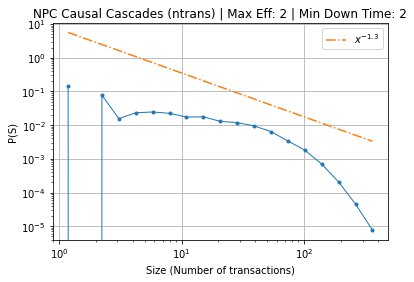

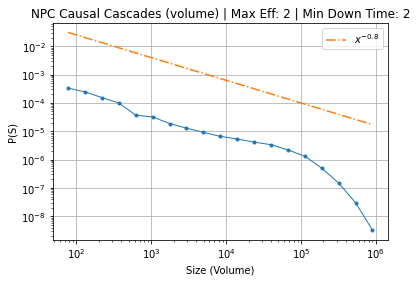

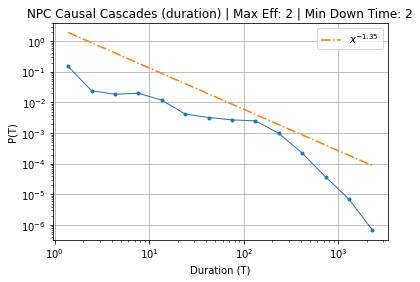

In [23]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

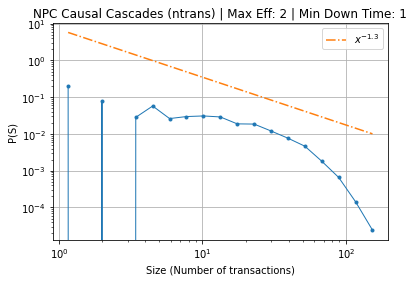

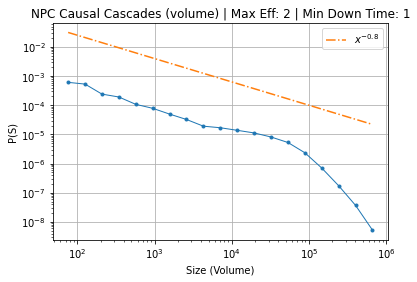

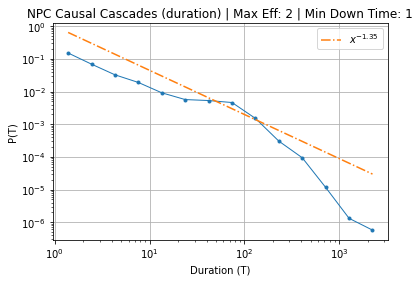

In [16]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35), '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

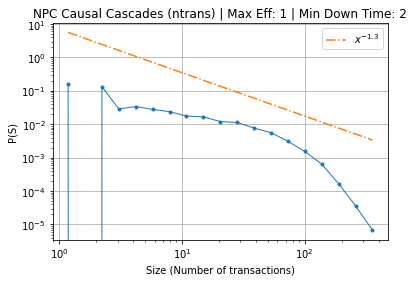

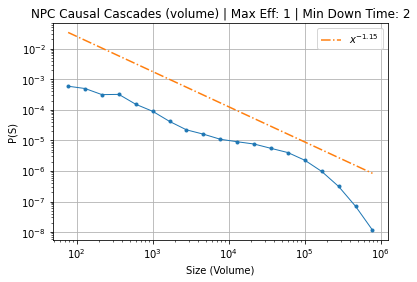

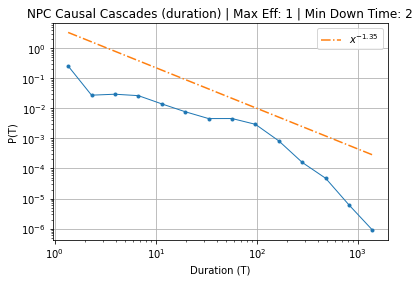

In [19]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.15)*5, '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

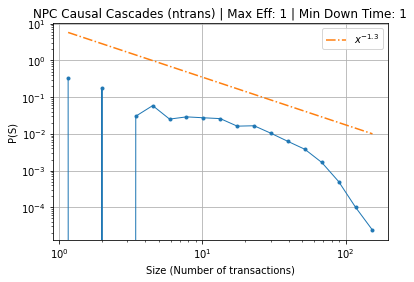

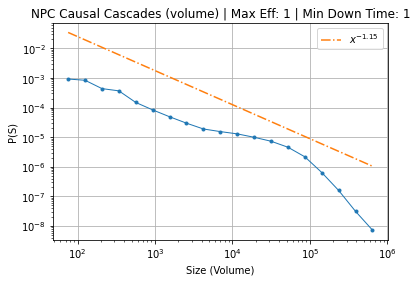

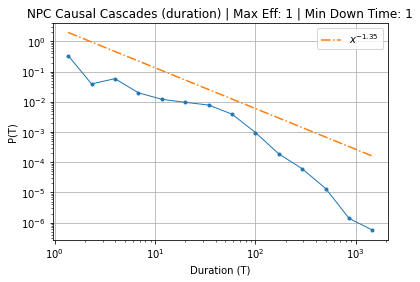

In [21]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.15)*5, '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

Unnamed: 0  time portfolio  stock  order
41                9   993     zjwdk     51   -2.0
69                2   993     ztnkc     15    1.0
70                4   993     ztnkc     60   -1.0
71                7   993     ztnkc     95   -1.0
262               3   993     zdmkf     98    9.0
...             ...   ...       ...    ...    ...
7088500           2  8192     gnqpm     56  -25.0
7088501           3  8192     gnqpm     55   10.0
7088502           5  8192     gnqpm     79    2.0
7088503           6  8192     gnqpm     85   19.0
7088504           7  8192     gnqpm     76   21.0

[7056036 rows x 5 columns]

In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

Unnamed: 0  time portfolio  stock  order
2              2   993     gozxi      6   -1.0
3              6   993     gozxi     10    2.0
4              7   993     gozxi     11    1.0
5              9   993     gozxi     13   -1.0
6             10   993     gozxi     14   -2.0
...          ...   ...       ...    ...    ...
1081           7   993     zwjtq     55   -2.0
1082           0   993     myduz     56   14.0
1083           1   993     myduz     55  -18.0
1084           4   993     myduz     85   38.0
1085           6   993     myduz     74  -14.0

[1040 rows x 5 columns]